In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Importing what we need
from fastai import *
from fastai.vision import *

In [10]:
URL_FOOD = 'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz'

In [12]:
!wget -O food-101.tar.gz http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2019-10-01 23:38:40--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2019-10-01 23:38:40--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  12.3MB/s    in 6m 32s  

2019-10-01 23:45:13 (12.1 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [21]:
!tar -xvzf food-101.tar.gz

food-101/
food-101/images/
food-101/images/beignets/
food-101/images/beignets/2885220.jpg
food-101/images/beignets/1814040.jpg
food-101/images/beignets/81202.jpg
food-101/images/beignets/1827892.jpg
food-101/images/beignets/2802124.jpg
food-101/images/beignets/2192983.jpg
food-101/images/beignets/250043.jpg
food-101/images/beignets/2786548.jpg
food-101/images/beignets/445116.jpg
food-101/images/beignets/3661460.jpg
food-101/images/beignets/1064858.jpg
food-101/images/beignets/2993714.jpg
food-101/images/beignets/2936669.jpg
food-101/images/beignets/1062952.jpg
food-101/images/beignets/2869806.jpg
food-101/images/beignets/178659.jpg
food-101/images/beignets/1261083.jpg
food-101/images/beignets/1296128.jpg
food-101/images/beignets/3157161.jpg
food-101/images/beignets/646871.jpg
food-101/images/beignets/3438314.jpg
food-101/images/beignets/3019700.jpg
food-101/images/beignets/1133765.jpg
food-101/images/beignets/1199143.jpg
food-101/images/beignets/287665.jpg
food-101/images/beignets/3452

food-101/images/beignets/72450.jpg
food-101/images/beignets/300502.jpg
food-101/images/beignets/39122.jpg
food-101/images/beignets/2253954.jpg
food-101/images/beignets/1151485.jpg
food-101/images/beignets/1520786.jpg
food-101/images/beignets/902679.jpg
food-101/images/beignets/299009.jpg
food-101/images/beignets/1240553.jpg
food-101/images/beignets/3399058.jpg
food-101/images/beignets/61751.jpg
food-101/images/beignets/1406930.jpg
food-101/images/beignets/2234408.jpg
food-101/images/beignets/366642.jpg
food-101/images/beignets/3784703.jpg
food-101/images/beignets/3295613.jpg
food-101/images/beignets/3453845.jpg
food-101/images/beignets/2930300.jpg
food-101/images/beignets/108745.jpg
food-101/images/beignets/659585.jpg
food-101/images/beignets/982274.jpg
food-101/images/beignets/2573558.jpg
food-101/images/beignets/3278862.jpg
food-101/images/beignets/547182.jpg
food-101/images/beignets/2478569.jpg
food-101/images/beignets/2664483.jpg
food-101/images/beignets/605544.jpg
food-101/images/

food-101/images/beignets/483224.jpg
food-101/images/beignets/2918170.jpg
food-101/images/beignets/2456929.jpg
food-101/images/beignets/3749819.jpg
food-101/images/beignets/3222985.jpg
food-101/images/beignets/3332506.jpg
food-101/images/beignets/1639285.jpg
food-101/images/beignets/45995.jpg
food-101/images/beignets/1040454.jpg
food-101/images/beignets/3291410.jpg
food-101/images/beignets/1384334.jpg
food-101/images/beignets/1121153.jpg
food-101/images/beignets/1822080.jpg
food-101/images/beignets/2622699.jpg
food-101/images/beignets/2985078.jpg
food-101/images/beignets/2672036.jpg
food-101/images/beignets/2350619.jpg
food-101/images/beignets/325135.jpg
food-101/images/beignets/283136.jpg
food-101/images/beignets/806354.jpg
food-101/images/beignets/634889.jpg
food-101/images/beignets/1019643.jpg
food-101/images/beignets/2399174.jpg
food-101/images/beignets/675684.jpg
food-101/images/beignets/88253.jpg
food-101/images/beignets/1594661.jpg
food-101/images/beignets/106001.jpg
food-101/ima

food-101/images/beignets/364276.jpg
food-101/images/beignets/294671.jpg
food-101/images/beignets/1563425.jpg
food-101/images/beignets/1175154.jpg
food-101/images/beignets/3707433.jpg
food-101/images/beignets/1114182.jpg
food-101/images/beignets/1393769.jpg
food-101/images/beignets/1275052.jpg
food-101/images/beignets/1367474.jpg
food-101/images/beignets/767287.jpg
food-101/images/beignets/259832.jpg
food-101/images/beignets/230470.jpg
food-101/images/beignets/3677108.jpg
food-101/images/beignets/1533290.jpg
food-101/images/beignets/1420783.jpg
food-101/images/beignets/3316799.jpg
food-101/images/beignets/3034743.jpg
food-101/images/beignets/2813954.jpg
food-101/images/beignets/3873758.jpg
food-101/images/beignets/3644839.jpg
food-101/images/beignets/1356309.jpg
food-101/images/beignets/3260404.jpg
food-101/images/beignets/2919138.jpg
food-101/images/beignets/867536.jpg
food-101/images/beignets/3718035.jpg
food-101/images/beignets/86065.jpg
food-101/images/beignets/2551206.jpg
food-101/

food-101/images/prime_rib/582564.jpg
food-101/images/prime_rib/1283817.jpg
food-101/images/prime_rib/3326240.jpg
food-101/images/prime_rib/14142.jpg
food-101/images/prime_rib/42954.jpg
food-101/images/prime_rib/2358641.jpg
food-101/images/prime_rib/3130562.jpg
food-101/images/prime_rib/2663871.jpg
food-101/images/prime_rib/1562786.jpg
food-101/images/prime_rib/109428.jpg
food-101/images/prime_rib/1352315.jpg
food-101/images/prime_rib/747744.jpg
food-101/images/prime_rib/1852556.jpg
food-101/images/prime_rib/1484501.jpg
food-101/images/prime_rib/746716.jpg
food-101/images/prime_rib/396254.jpg
food-101/images/prime_rib/1493425.jpg
food-101/images/prime_rib/1866825.jpg
food-101/images/prime_rib/1083463.jpg
food-101/images/prime_rib/2910802.jpg
food-101/images/prime_rib/1477206.jpg
food-101/images/prime_rib/2946227.jpg
food-101/images/prime_rib/1242902.jpg
food-101/images/prime_rib/2174072.jpg
food-101/images/prime_rib/1757065.jpg
food-101/images/prime_rib/638420.jpg
food-101/images/prime_

food-101/images/prime_rib/3416071.jpg
food-101/images/prime_rib/1575548.jpg
food-101/images/prime_rib/2356761.jpg
food-101/images/prime_rib/2521829.jpg
food-101/images/prime_rib/705331.jpg
food-101/images/prime_rib/1201811.jpg
food-101/images/prime_rib/1105382.jpg
food-101/images/prime_rib/62084.jpg
food-101/images/prime_rib/3276779.jpg
food-101/images/prime_rib/1430676.jpg
food-101/images/prime_rib/695918.jpg
food-101/images/prime_rib/117138.jpg
food-101/images/prime_rib/2766437.jpg
food-101/images/prime_rib/1502177.jpg
food-101/images/prime_rib/3371644.jpg
food-101/images/prime_rib/522944.jpg
food-101/images/prime_rib/3089889.jpg
food-101/images/prime_rib/19143.jpg
food-101/images/prime_rib/3819263.jpg
food-101/images/prime_rib/339646.jpg
food-101/images/prime_rib/70456.jpg
food-101/images/prime_rib/1622936.jpg
food-101/images/prime_rib/2095869.jpg
food-101/images/prime_rib/1706939.jpg
food-101/images/prime_rib/321030.jpg
food-101/images/prime_rib/2842691.jpg
food-101/images/prime_ri

food-101/images/prime_rib/1343657.jpg
food-101/images/prime_rib/376191.jpg
food-101/images/prime_rib/3526979.jpg
food-101/images/prime_rib/904821.jpg
food-101/images/prime_rib/2442506.jpg
food-101/images/prime_rib/1093043.jpg
food-101/images/prime_rib/271797.jpg
food-101/images/prime_rib/2925808.jpg
food-101/images/prime_rib/1244777.jpg
food-101/images/prime_rib/2331448.jpg
food-101/images/prime_rib/2674414.jpg
food-101/images/prime_rib/1714816.jpg
food-101/images/prime_rib/3374507.jpg
food-101/images/prime_rib/3025684.jpg
food-101/images/prime_rib/676905.jpg
food-101/images/prime_rib/801491.jpg
food-101/images/prime_rib/10120.jpg
food-101/images/prime_rib/2592430.jpg
food-101/images/prime_rib/1165803.jpg
food-101/images/prime_rib/2349139.jpg
food-101/images/prime_rib/1924161.jpg
food-101/images/prime_rib/2707821.jpg
food-101/images/prime_rib/2803119.jpg
food-101/images/prime_rib/3181355.jpg
food-101/images/prime_rib/2907135.jpg
food-101/images/prime_rib/2554784.jpg
food-101/images/pri

food-101/images/prime_rib/11656.jpg
food-101/images/prime_rib/1839781.jpg
food-101/images/prime_rib/941938.jpg
food-101/images/prime_rib/1138237.jpg
food-101/images/prime_rib/415132.jpg
food-101/images/prime_rib/755225.jpg
food-101/images/prime_rib/45896.jpg
food-101/images/prime_rib/583189.jpg
food-101/images/prime_rib/453875.jpg
food-101/images/prime_rib/1841752.jpg
food-101/images/prime_rib/3012205.jpg
food-101/images/prime_rib/3674202.jpg
food-101/images/prime_rib/506472.jpg
food-101/images/prime_rib/2007611.jpg
food-101/images/prime_rib/1933441.jpg
food-101/images/prime_rib/1149941.jpg
food-101/images/prime_rib/92128.jpg
food-101/images/prime_rib/2069712.jpg
food-101/images/prime_rib/1244255.jpg
food-101/images/prime_rib/2280219.jpg
food-101/images/prime_rib/3919855.jpg
food-101/images/prime_rib/3540527.jpg
food-101/images/prime_rib/419357.jpg
food-101/images/prime_rib/598875.jpg
food-101/images/prime_rib/3230657.jpg
food-101/images/prime_rib/2655716.jpg
food-101/images/prime_rib/

food-101/images/ramen/1440387.jpg
food-101/images/ramen/465321.jpg
food-101/images/ramen/3826653.jpg
food-101/images/ramen/932802.jpg
food-101/images/ramen/3180843.jpg
food-101/images/ramen/715381.jpg
food-101/images/ramen/316204.jpg
food-101/images/ramen/8764.jpg
food-101/images/ramen/101297.jpg
food-101/images/ramen/927930.jpg
food-101/images/ramen/2425618.jpg
food-101/images/ramen/23747.jpg
food-101/images/ramen/3597132.jpg
food-101/images/ramen/145226.jpg
food-101/images/ramen/212138.jpg
food-101/images/ramen/282053.jpg
food-101/images/ramen/307604.jpg
food-101/images/ramen/34444.jpg
food-101/images/ramen/1844129.jpg
food-101/images/ramen/959525.jpg
food-101/images/ramen/2269317.jpg
food-101/images/ramen/3183899.jpg
food-101/images/ramen/3197931.jpg
food-101/images/ramen/1283857.jpg
food-101/images/ramen/1862369.jpg
food-101/images/ramen/756517.jpg
food-101/images/ramen/2550535.jpg
food-101/images/ramen/1032031.jpg
food-101/images/ramen/1260008.jpg
food-101/images/ramen/798009.jpg


food-101/images/ramen/1286513.jpg
food-101/images/ramen/2977201.jpg
food-101/images/ramen/266977.jpg
food-101/images/ramen/303827.jpg
food-101/images/ramen/1315273.jpg
food-101/images/ramen/3704912.jpg
food-101/images/ramen/3183909.jpg
food-101/images/ramen/1202038.jpg
food-101/images/ramen/610508.jpg
food-101/images/ramen/766702.jpg
food-101/images/ramen/950271.jpg
food-101/images/ramen/1458108.jpg
food-101/images/ramen/3895301.jpg
food-101/images/ramen/920014.jpg
food-101/images/ramen/2727091.jpg
food-101/images/ramen/281142.jpg
food-101/images/ramen/217449.jpg
food-101/images/ramen/653775.jpg
food-101/images/ramen/1570023.jpg
food-101/images/ramen/3242614.jpg
food-101/images/ramen/589724.jpg
food-101/images/ramen/1162542.jpg
food-101/images/ramen/582487.jpg
food-101/images/ramen/483520.jpg
food-101/images/ramen/766615.jpg
food-101/images/ramen/2909947.jpg
food-101/images/ramen/1924565.jpg
food-101/images/ramen/2859011.jpg
food-101/images/ramen/3559428.jpg
food-101/images/ramen/34692

food-101/images/ramen/333940.jpg
food-101/images/ramen/748075.jpg
food-101/images/ramen/3065945.jpg
food-101/images/ramen/3403597.jpg
food-101/images/ramen/5606.jpg
food-101/images/ramen/2220785.jpg
food-101/images/ramen/1269572.jpg
food-101/images/ramen/268012.jpg
food-101/images/ramen/2080213.jpg
food-101/images/ramen/2344087.jpg
food-101/images/ramen/1209768.jpg
food-101/images/ramen/3744767.jpg
food-101/images/ramen/1189579.jpg
food-101/images/ramen/293952.jpg
food-101/images/ramen/640531.jpg
food-101/images/ramen/2222274.jpg
food-101/images/ramen/1772386.jpg
food-101/images/ramen/563362.jpg
food-101/images/ramen/3357303.jpg
food-101/images/ramen/2744436.jpg
food-101/images/ramen/3553271.jpg
food-101/images/ramen/1908588.jpg
food-101/images/ramen/2077387.jpg
food-101/images/ramen/3488768.jpg
food-101/images/ramen/338784.jpg
food-101/images/ramen/3898155.jpg
food-101/images/ramen/259720.jpg
food-101/images/ramen/1476274.jpg
food-101/images/ramen/1954604.jpg
food-101/images/ramen/773

food-101/images/hamburger/1890101.jpg
food-101/images/hamburger/1510284.jpg
food-101/images/hamburger/72266.jpg
food-101/images/hamburger/3594693.jpg
food-101/images/hamburger/298239.jpg
food-101/images/hamburger/2063044.jpg
food-101/images/hamburger/2566738.jpg
food-101/images/hamburger/582274.jpg
food-101/images/hamburger/100930.jpg
food-101/images/hamburger/73783.jpg
food-101/images/hamburger/552647.jpg
food-101/images/hamburger/2390722.jpg
food-101/images/hamburger/2405850.jpg
food-101/images/hamburger/1007277.jpg
food-101/images/hamburger/1591393.jpg
food-101/images/hamburger/3871341.jpg
food-101/images/hamburger/204552.jpg
food-101/images/hamburger/1385479.jpg
food-101/images/hamburger/745392.jpg
food-101/images/hamburger/91789.jpg
food-101/images/hamburger/286323.jpg
food-101/images/hamburger/1567823.jpg
food-101/images/hamburger/6432.jpg
food-101/images/hamburger/1105370.jpg
food-101/images/hamburger/1922963.jpg
food-101/images/hamburger/3643079.jpg
food-101/images/hamburger/11

food-101/images/hamburger/47595.jpg
food-101/images/hamburger/2754513.jpg
food-101/images/hamburger/960781.jpg
food-101/images/hamburger/1234438.jpg
food-101/images/hamburger/1969928.jpg
food-101/images/hamburger/629010.jpg
food-101/images/hamburger/3919964.jpg
food-101/images/hamburger/1041751.jpg
food-101/images/hamburger/2148281.jpg
food-101/images/hamburger/2961000.jpg
food-101/images/hamburger/3088660.jpg
food-101/images/hamburger/579852.jpg
food-101/images/hamburger/415105.jpg
food-101/images/hamburger/1084567.jpg
food-101/images/hamburger/2278946.jpg
food-101/images/hamburger/1351742.jpg
food-101/images/hamburger/2882999.jpg
food-101/images/hamburger/2372320.jpg
food-101/images/hamburger/1357604.jpg
food-101/images/hamburger/3640020.jpg
food-101/images/hamburger/526683.jpg
food-101/images/hamburger/1583543.jpg
food-101/images/hamburger/178840.jpg
food-101/images/hamburger/2982689.jpg
food-101/images/hamburger/992429.jpg
food-101/images/hamburger/1036215.jpg
food-101/images/hambu

food-101/images/hamburger/476337.jpg
food-101/images/hamburger/3019166.jpg
food-101/images/hamburger/985020.jpg
food-101/images/hamburger/1964319.jpg
food-101/images/hamburger/1983496.jpg
food-101/images/hamburger/166566.jpg
food-101/images/hamburger/629268.jpg
food-101/images/hamburger/1447695.jpg
food-101/images/hamburger/1404731.jpg
food-101/images/hamburger/243204.jpg
food-101/images/hamburger/2103408.jpg
food-101/images/hamburger/3570133.jpg
food-101/images/hamburger/1974530.jpg
food-101/images/hamburger/2777938.jpg
food-101/images/hamburger/868903.jpg
food-101/images/hamburger/473236.jpg
food-101/images/hamburger/342538.jpg
food-101/images/hamburger/1488723.jpg
food-101/images/hamburger/1909271.jpg
food-101/images/hamburger/2574916.jpg
food-101/images/hamburger/1245594.jpg
food-101/images/hamburger/3160193.jpg
food-101/images/hamburger/351506.jpg
food-101/images/hamburger/242083.jpg
food-101/images/hamburger/492903.jpg
food-101/images/hamburger/2182615.jpg
food-101/images/hamburg

food-101/images/hamburger/1768219.jpg
food-101/images/hamburger/1447114.jpg
food-101/images/hamburger/3771888.jpg
food-101/images/hamburger/3101158.jpg
food-101/images/hamburger/568518.jpg
food-101/images/hamburger/2877643.jpg
food-101/images/hamburger/2838015.jpg
food-101/images/hamburger/782170.jpg
food-101/images/hamburger/724367.jpg
food-101/images/hamburger/1679008.jpg
food-101/images/hamburger/2009324.jpg
food-101/images/hamburger/3530266.jpg
food-101/images/hamburger/2718447.jpg
food-101/images/hamburger/392846.jpg
food-101/images/hamburger/656458.jpg
food-101/images/hamburger/442330.jpg
food-101/images/hamburger/3655355.jpg
food-101/images/hamburger/1071442.jpg
food-101/images/hamburger/2214528.jpg
food-101/images/hamburger/1237509.jpg
food-101/images/hamburger/2962236.jpg
food-101/images/hamburger/315876.jpg
food-101/images/hamburger/3816451.jpg
food-101/images/hamburger/2257914.jpg
food-101/images/hamburger/3878886.jpg
food-101/images/hamburger/72111.jpg
food-101/images/hambu

food-101/images/bruschetta/127147.jpg
food-101/images/bruschetta/319689.jpg
food-101/images/bruschetta/912428.jpg
food-101/images/bruschetta/3244297.jpg
food-101/images/bruschetta/1674942.jpg
food-101/images/bruschetta/2886671.jpg
food-101/images/bruschetta/889257.jpg
food-101/images/bruschetta/1169212.jpg
food-101/images/bruschetta/3911221.jpg
food-101/images/bruschetta/3048136.jpg
food-101/images/bruschetta/2708535.jpg
food-101/images/bruschetta/2650846.jpg
food-101/images/bruschetta/1044293.jpg
food-101/images/bruschetta/3136910.jpg
food-101/images/bruschetta/3816226.jpg
food-101/images/bruschetta/2465455.jpg
food-101/images/bruschetta/386632.jpg
food-101/images/bruschetta/3220175.jpg
food-101/images/bruschetta/1075531.jpg
food-101/images/bruschetta/1880903.jpg
food-101/images/bruschetta/3909496.jpg
food-101/images/bruschetta/1572090.jpg
food-101/images/bruschetta/2415344.jpg
food-101/images/bruschetta/210237.jpg
food-101/images/bruschetta/2651429.jpg
food-101/images/bruschetta/3559

food-101/images/bruschetta/3909318.jpg
food-101/images/bruschetta/3295830.jpg
food-101/images/bruschetta/3909270.jpg
food-101/images/bruschetta/3418743.jpg
food-101/images/bruschetta/1938501.jpg
food-101/images/bruschetta/931178.jpg
food-101/images/bruschetta/2083477.jpg
food-101/images/bruschetta/775044.jpg
food-101/images/bruschetta/1720347.jpg
food-101/images/bruschetta/788102.jpg
food-101/images/bruschetta/97867.jpg
food-101/images/bruschetta/3792377.jpg
food-101/images/bruschetta/745164.jpg
food-101/images/bruschetta/2942349.jpg
food-101/images/bruschetta/1140422.jpg
food-101/images/bruschetta/958215.jpg
food-101/images/bruschetta/1380332.jpg
food-101/images/bruschetta/579052.jpg
food-101/images/bruschetta/1232934.jpg
food-101/images/bruschetta/750055.jpg
food-101/images/bruschetta/1414004.jpg
food-101/images/bruschetta/1013211.jpg
food-101/images/bruschetta/3539418.jpg
food-101/images/bruschetta/2719848.jpg
food-101/images/bruschetta/3453564.jpg
food-101/images/bruschetta/2952225

food-101/images/bruschetta/2411864.jpg
food-101/images/bruschetta/2381015.jpg
food-101/images/bruschetta/2547123.jpg
food-101/images/bruschetta/1238147.jpg
food-101/images/bruschetta/1270421.jpg
food-101/images/bruschetta/3407704.jpg
food-101/images/bruschetta/1277003.jpg
food-101/images/bruschetta/3223.jpg
food-101/images/bruschetta/2941107.jpg
food-101/images/bruschetta/733228.jpg
food-101/images/bruschetta/1562651.jpg
food-101/images/bruschetta/254639.jpg
food-101/images/bruschetta/1345668.jpg
food-101/images/bruschetta/2523680.jpg
food-101/images/bruschetta/3513776.jpg
food-101/images/bruschetta/829232.jpg
food-101/images/bruschetta/2017264.jpg
food-101/images/bruschetta/335086.jpg
food-101/images/bruschetta/938199.jpg
food-101/images/bruschetta/80102.jpg
food-101/images/bruschetta/679949.jpg
food-101/images/bruschetta/2098793.jpg
food-101/images/bruschetta/1813000.jpg
food-101/images/bruschetta/3332314.jpg
food-101/images/bruschetta/3435835.jpg
food-101/images/bruschetta/2328474.j

food-101/images/bruschetta/1236895.jpg
food-101/images/bruschetta/2264135.jpg
food-101/images/bruschetta/2107336.jpg
food-101/images/bruschetta/340723.jpg
food-101/images/bruschetta/3225954.jpg
food-101/images/bruschetta/980384.jpg
food-101/images/bruschetta/1820249.jpg
food-101/images/bruschetta/187050.jpg
food-101/images/bruschetta/4505.jpg
food-101/images/bruschetta/3507042.jpg
food-101/images/bruschetta/3005235.jpg
food-101/images/bruschetta/1398416.jpg
food-101/images/bruschetta/3567017.jpg
food-101/images/bruschetta/997981.jpg
food-101/images/bruschetta/3474663.jpg
food-101/images/bruschetta/1373778.jpg
food-101/images/bruschetta/2031594.jpg
food-101/images/bruschetta/9969.jpg
food-101/images/bruschetta/1219281.jpg
food-101/images/bruschetta/1333827.jpg
food-101/images/bruschetta/553065.jpg
food-101/images/bruschetta/485242.jpg
food-101/images/bruschetta/957347.jpg
food-101/images/bruschetta/2053216.jpg
food-101/images/bruschetta/2386525.jpg
food-101/images/bruschetta/60262.jpg
f

food-101/images/bruschetta/1526591.jpg
food-101/images/bruschetta/2179573.jpg
food-101/images/bruschetta/1562000.jpg
food-101/images/bruschetta/194223.jpg
food-101/images/bruschetta/3665558.jpg
food-101/images/bruschetta/2056749.jpg
food-101/images/bruschetta/1668680.jpg
food-101/images/bruschetta/370034.jpg
food-101/images/bruschetta/2450629.jpg
food-101/images/bruschetta/1514232.jpg
food-101/images/bruschetta/1710827.jpg
food-101/images/bruschetta/570846.jpg
food-101/images/bruschetta/3370902.jpg
food-101/images/bruschetta/3711344.jpg
food-101/images/bruschetta/2712019.jpg
food-101/images/bruschetta/635706.jpg
food-101/images/bruschetta/3878041.jpg
food-101/images/bruschetta/961669.jpg
food-101/images/bruschetta/713493.jpg
food-101/images/bruschetta/134026.jpg
food-101/images/bruschetta/3462434.jpg
food-101/images/bruschetta/541720.jpg
food-101/images/bruschetta/3646425.jpg
food-101/images/bruschetta/3647820.jpg
food-101/images/bruschetta/3387732.jpg
food-101/images/bruschetta/259192

food-101/images/chicken_wings/2638576.jpg
food-101/images/chicken_wings/2075225.jpg
food-101/images/chicken_wings/161080.jpg
food-101/images/chicken_wings/2834233.jpg
food-101/images/chicken_wings/539748.jpg
food-101/images/chicken_wings/1437465.jpg
food-101/images/chicken_wings/938476.jpg
food-101/images/chicken_wings/1770809.jpg
food-101/images/chicken_wings/2320446.jpg
food-101/images/chicken_wings/78311.jpg
food-101/images/chicken_wings/278501.jpg
food-101/images/chicken_wings/1750077.jpg
food-101/images/chicken_wings/834669.jpg
food-101/images/chicken_wings/44776.jpg
food-101/images/chicken_wings/386863.jpg
food-101/images/chicken_wings/1357060.jpg
food-101/images/chicken_wings/2814529.jpg
food-101/images/chicken_wings/2878128.jpg
food-101/images/chicken_wings/53485.jpg
food-101/images/chicken_wings/1933773.jpg
food-101/images/chicken_wings/2754846.jpg
food-101/images/chicken_wings/1884178.jpg
food-101/images/chicken_wings/521837.jpg
food-101/images/chicken_wings/166148.jpg
food-1

food-101/images/chicken_wings/2968061.jpg
food-101/images/chicken_wings/30171.jpg
food-101/images/chicken_wings/2726284.jpg
food-101/images/chicken_wings/3857972.jpg
food-101/images/chicken_wings/1516097.jpg
food-101/images/chicken_wings/1547841.jpg
food-101/images/chicken_wings/881531.jpg
food-101/images/chicken_wings/311554.jpg
food-101/images/chicken_wings/2726650.jpg
food-101/images/chicken_wings/1136330.jpg
food-101/images/chicken_wings/1750263.jpg
food-101/images/chicken_wings/2805973.jpg
food-101/images/chicken_wings/104370.jpg
food-101/images/chicken_wings/324036.jpg
food-101/images/chicken_wings/1981669.jpg
food-101/images/chicken_wings/2614109.jpg
food-101/images/chicken_wings/3473903.jpg
food-101/images/chicken_wings/1850356.jpg
food-101/images/chicken_wings/1509959.jpg
food-101/images/chicken_wings/1716831.jpg
food-101/images/chicken_wings/909998.jpg
food-101/images/chicken_wings/2909557.jpg
food-101/images/chicken_wings/1561812.jpg
food-101/images/chicken_wings/1518315.jpg

food-101/images/chicken_wings/2935271.jpg
food-101/images/chicken_wings/820377.jpg
food-101/images/chicken_wings/3807875.jpg
food-101/images/chicken_wings/3211671.jpg
food-101/images/chicken_wings/673143.jpg
food-101/images/chicken_wings/1487184.jpg
food-101/images/chicken_wings/3584473.jpg
food-101/images/chicken_wings/73866.jpg
food-101/images/chicken_wings/3220565.jpg
food-101/images/chicken_wings/3765260.jpg
food-101/images/chicken_wings/1537867.jpg
food-101/images/chicken_wings/259112.jpg
food-101/images/chicken_wings/1768732.jpg
food-101/images/chicken_wings/757672.jpg
food-101/images/chicken_wings/1827800.jpg
food-101/images/chicken_wings/2042136.jpg
food-101/images/chicken_wings/3514511.jpg
food-101/images/chicken_wings/50409.jpg
food-101/images/chicken_wings/2541262.jpg
food-101/images/chicken_wings/2372173.jpg
food-101/images/chicken_wings/3483441.jpg
food-101/images/chicken_wings/3920786.jpg
food-101/images/chicken_wings/2888281.jpg
food-101/images/chicken_wings/3184537.jpg


food-101/images/chicken_wings/1070639.jpg
food-101/images/chicken_wings/1758979.jpg
food-101/images/chicken_wings/147449.jpg
food-101/images/chicken_wings/383246.jpg
food-101/images/chicken_wings/1260379.jpg
food-101/images/chicken_wings/1531732.jpg
food-101/images/chicken_wings/557753.jpg
food-101/images/chicken_wings/3000835.jpg
food-101/images/chicken_wings/3299354.jpg
food-101/images/chicken_wings/230375.jpg
food-101/images/chicken_wings/3291540.jpg
food-101/images/chicken_wings/538611.jpg
food-101/images/chicken_wings/1868095.jpg
food-101/images/chicken_wings/3849303.jpg
food-101/images/chicken_wings/671194.jpg
food-101/images/chicken_wings/1491184.jpg
food-101/images/chicken_wings/1493300.jpg
food-101/images/chicken_wings/590440.jpg
food-101/images/chicken_wings/1615060.jpg
food-101/images/chicken_wings/2684894.jpg
food-101/images/chicken_wings/2456474.jpg
food-101/images/chicken_wings/2369532.jpg
food-101/images/chicken_wings/2621465.jpg
food-101/images/chicken_wings/202958.jpg


food-101/images/pork_chop/2802282.jpg
food-101/images/pork_chop/297909.jpg
food-101/images/pork_chop/1701586.jpg
food-101/images/pork_chop/126281.jpg
food-101/images/pork_chop/3197248.jpg
food-101/images/pork_chop/2451645.jpg
food-101/images/pork_chop/2457356.jpg
food-101/images/pork_chop/3510477.jpg
food-101/images/pork_chop/3731878.jpg
food-101/images/pork_chop/605251.jpg
food-101/images/pork_chop/1442402.jpg
food-101/images/pork_chop/3826361.jpg
food-101/images/pork_chop/15579.jpg
food-101/images/pork_chop/3480291.jpg
food-101/images/pork_chop/2660295.jpg
food-101/images/pork_chop/1306525.jpg
food-101/images/pork_chop/1132166.jpg
food-101/images/pork_chop/1490214.jpg
food-101/images/pork_chop/2694388.jpg
food-101/images/pork_chop/137031.jpg
food-101/images/pork_chop/1835240.jpg
food-101/images/pork_chop/2793919.jpg
food-101/images/pork_chop/728629.jpg
food-101/images/pork_chop/24833.jpg
food-101/images/pork_chop/126971.jpg
food-101/images/pork_chop/790956.jpg
food-101/images/pork_ch

food-101/images/pork_chop/3360824.jpg
food-101/images/pork_chop/3234242.jpg
food-101/images/pork_chop/1518594.jpg
food-101/images/pork_chop/3644644.jpg
food-101/images/pork_chop/620776.jpg
food-101/images/pork_chop/2600155.jpg
food-101/images/pork_chop/2974745.jpg
food-101/images/pork_chop/3066383.jpg
food-101/images/pork_chop/99168.jpg
food-101/images/pork_chop/3124439.jpg
food-101/images/pork_chop/1648630.jpg
food-101/images/pork_chop/3812427.jpg
food-101/images/pork_chop/309380.jpg
food-101/images/pork_chop/2179648.jpg
food-101/images/pork_chop/3782387.jpg
food-101/images/pork_chop/2752111.jpg
food-101/images/pork_chop/2259215.jpg
food-101/images/pork_chop/3226324.jpg
food-101/images/pork_chop/1586313.jpg
food-101/images/pork_chop/246686.jpg
food-101/images/pork_chop/2560929.jpg
food-101/images/pork_chop/3715275.jpg
food-101/images/pork_chop/2086274.jpg
food-101/images/pork_chop/2337935.jpg
food-101/images/pork_chop/1767532.jpg
food-101/images/pork_chop/452746.jpg
food-101/images/po

food-101/images/pork_chop/296545.jpg
food-101/images/pork_chop/225831.jpg
food-101/images/pork_chop/3583770.jpg
food-101/images/pork_chop/2918618.jpg
food-101/images/pork_chop/2454854.jpg
food-101/images/pork_chop/3888445.jpg
food-101/images/pork_chop/1128628.jpg
food-101/images/pork_chop/1573971.jpg
food-101/images/pork_chop/1928764.jpg
food-101/images/pork_chop/2350249.jpg
food-101/images/pork_chop/1854811.jpg
food-101/images/pork_chop/3470637.jpg
food-101/images/pork_chop/3724692.jpg
food-101/images/pork_chop/3592525.jpg
food-101/images/pork_chop/2122776.jpg
food-101/images/pork_chop/1757536.jpg
food-101/images/pork_chop/3218459.jpg
food-101/images/pork_chop/213526.jpg
food-101/images/pork_chop/802123.jpg
food-101/images/pork_chop/1041355.jpg
food-101/images/pork_chop/420925.jpg
food-101/images/pork_chop/1207006.jpg
food-101/images/pork_chop/2801687.jpg
food-101/images/pork_chop/3431117.jpg
food-101/images/pork_chop/2066860.jpg
food-101/images/pork_chop/249107.jpg
food-101/images/po

food-101/images/pork_chop/2907294.jpg
food-101/images/pork_chop/3644523.jpg
food-101/images/pork_chop/3379310.jpg
food-101/images/pork_chop/3253647.jpg
food-101/images/pork_chop/3558217.jpg
food-101/images/pork_chop/1516602.jpg
food-101/images/pork_chop/3106425.jpg
food-101/images/pork_chop/3759263.jpg
food-101/images/pork_chop/2728417.jpg
food-101/images/pork_chop/3739986.jpg
food-101/images/pork_chop/817078.jpg
food-101/images/pork_chop/3030653.jpg
food-101/images/pork_chop/1900880.jpg
food-101/images/pork_chop/2498979.jpg
food-101/images/pork_chop/76465.jpg
food-101/images/pork_chop/968836.jpg
food-101/images/pork_chop/2674702.jpg
food-101/images/pork_chop/2292845.jpg
food-101/images/pork_chop/3287100.jpg
food-101/images/pork_chop/1241012.jpg
food-101/images/pork_chop/3442605.jpg
food-101/images/pork_chop/3866984.jpg
food-101/images/pork_chop/2711720.jpg
food-101/images/pork_chop/554322.jpg
food-101/images/pork_chop/3661948.jpg
food-101/images/pork_chop/3600518.jpg
food-101/images/p

food-101/images/greek_salad/94603.jpg
food-101/images/greek_salad/3769552.jpg
food-101/images/greek_salad/1549017.jpg
food-101/images/greek_salad/2633154.jpg
food-101/images/greek_salad/994568.jpg
food-101/images/greek_salad/703237.jpg
food-101/images/greek_salad/383930.jpg
food-101/images/greek_salad/1486418.jpg
food-101/images/greek_salad/214557.jpg
food-101/images/greek_salad/3767870.jpg
food-101/images/greek_salad/3802379.jpg
food-101/images/greek_salad/1237218.jpg
food-101/images/greek_salad/3731616.jpg
food-101/images/greek_salad/3375974.jpg
food-101/images/greek_salad/2498667.jpg
food-101/images/greek_salad/1861381.jpg
food-101/images/greek_salad/1402516.jpg
food-101/images/greek_salad/2497364.jpg
food-101/images/greek_salad/2367932.jpg
food-101/images/greek_salad/102789.jpg
food-101/images/greek_salad/23530.jpg
food-101/images/greek_salad/1915558.jpg
food-101/images/greek_salad/722959.jpg
food-101/images/greek_salad/365829.jpg
food-101/images/greek_salad/3375207.jpg
food-101/im

food-101/images/greek_salad/3484174.jpg
food-101/images/greek_salad/1854484.jpg
food-101/images/greek_salad/422459.jpg
food-101/images/greek_salad/1801594.jpg
food-101/images/greek_salad/628714.jpg
food-101/images/greek_salad/874155.jpg
food-101/images/greek_salad/1964243.jpg
food-101/images/greek_salad/763102.jpg
food-101/images/greek_salad/2781696.jpg
food-101/images/greek_salad/508781.jpg
food-101/images/greek_salad/625650.jpg
food-101/images/greek_salad/153583.jpg
food-101/images/greek_salad/595321.jpg
food-101/images/greek_salad/3346427.jpg
food-101/images/greek_salad/3733994.jpg
food-101/images/greek_salad/1782552.jpg
food-101/images/greek_salad/3812895.jpg
food-101/images/greek_salad/3438952.jpg
food-101/images/greek_salad/3617524.jpg
food-101/images/greek_salad/2367542.jpg
food-101/images/greek_salad/2518965.jpg
food-101/images/greek_salad/1378088.jpg
food-101/images/greek_salad/3495151.jpg
food-101/images/greek_salad/3349441.jpg
food-101/images/greek_salad/2141820.jpg
food-101

food-101/images/greek_salad/2058747.jpg
food-101/images/greek_salad/1317173.jpg
food-101/images/greek_salad/3642785.jpg
food-101/images/greek_salad/2272897.jpg
food-101/images/greek_salad/3603124.jpg
food-101/images/greek_salad/1877970.jpg
food-101/images/greek_salad/3799546.jpg
food-101/images/greek_salad/2870781.jpg
food-101/images/greek_salad/39406.jpg
food-101/images/greek_salad/1925245.jpg
food-101/images/greek_salad/1180590.jpg
food-101/images/greek_salad/228372.jpg
food-101/images/greek_salad/780114.jpg
food-101/images/greek_salad/2706114.jpg
food-101/images/greek_salad/2264398.jpg
food-101/images/greek_salad/538068.jpg
food-101/images/greek_salad/2007004.jpg
food-101/images/greek_salad/672399.jpg
food-101/images/greek_salad/2814188.jpg
food-101/images/greek_salad/2882640.jpg
food-101/images/greek_salad/3693427.jpg
food-101/images/greek_salad/146896.jpg
food-101/images/greek_salad/1077711.jpg
food-101/images/greek_salad/1275263.jpg
food-101/images/greek_salad/3036431.jpg
food-10

food-101/images/greek_salad/1203701.jpg
food-101/images/greek_salad/2174246.jpg
food-101/images/greek_salad/1452915.jpg
food-101/images/greek_salad/2498876.jpg
food-101/images/greek_salad/3363365.jpg
food-101/images/greek_salad/1885777.jpg
food-101/images/greek_salad/708940.jpg
food-101/images/greek_salad/1296494.jpg
food-101/images/greek_salad/349016.jpg
food-101/images/greek_salad/2758128.jpg
food-101/images/greek_salad/391471.jpg
food-101/images/greek_salad/213326.jpg
food-101/images/greek_salad/1910521.jpg
food-101/images/greek_salad/3707184.jpg
food-101/images/greek_salad/1646423.jpg
food-101/images/greek_salad/83665.jpg
food-101/images/greek_salad/3066977.jpg
food-101/images/greek_salad/1907359.jpg
food-101/images/greek_salad/3526710.jpg
food-101/images/greek_salad/1799017.jpg
food-101/images/greek_salad/1815817.jpg
food-101/images/greek_salad/2033166.jpg
food-101/images/greek_salad/2044285.jpg
food-101/images/greek_salad/1911531.jpg
food-101/images/greek_salad/803256.jpg
food-10

food-101/images/greek_salad/1201455.jpg
food-101/images/greek_salad/2643709.jpg
food-101/images/greek_salad/2413947.jpg
food-101/images/greek_salad/785212.jpg
food-101/images/greek_salad/1698182.jpg
food-101/images/greek_salad/3433392.jpg
food-101/images/greek_salad/671268.jpg
food-101/images/greek_salad/3644115.jpg
food-101/images/greek_salad/1943264.jpg
food-101/images/greek_salad/3106453.jpg
food-101/images/greek_salad/3173938.jpg
food-101/images/greek_salad/2107235.jpg
food-101/images/greek_salad/2573880.jpg
food-101/images/greek_salad/369473.jpg
food-101/images/greek_salad/961722.jpg
food-101/images/sashimi/
food-101/images/sashimi/923994.jpg
food-101/images/sashimi/3822472.jpg
food-101/images/sashimi/3535789.jpg
food-101/images/sashimi/3132026.jpg
food-101/images/sashimi/3781073.jpg
food-101/images/sashimi/988502.jpg
food-101/images/sashimi/1833921.jpg
food-101/images/sashimi/3565531.jpg
food-101/images/sashimi/2282807.jpg
food-101/images/sashimi/3643177.jpg
food-101/images/sashi

food-101/images/sashimi/3917202.jpg
food-101/images/sashimi/635080.jpg
food-101/images/sashimi/1821100.jpg
food-101/images/sashimi/1665881.jpg
food-101/images/sashimi/166063.jpg
food-101/images/sashimi/1245538.jpg
food-101/images/sashimi/3271.jpg
food-101/images/sashimi/889209.jpg
food-101/images/sashimi/1186629.jpg
food-101/images/sashimi/3331936.jpg
food-101/images/sashimi/861444.jpg
food-101/images/sashimi/3457501.jpg
food-101/images/sashimi/2830725.jpg
food-101/images/sashimi/1401361.jpg
food-101/images/sashimi/3728978.jpg
food-101/images/sashimi/1778080.jpg
food-101/images/sashimi/2164652.jpg
food-101/images/sashimi/171560.jpg
food-101/images/sashimi/2989772.jpg
food-101/images/sashimi/3191511.jpg
food-101/images/sashimi/1648770.jpg
food-101/images/sashimi/2160399.jpg
food-101/images/sashimi/3659809.jpg
food-101/images/sashimi/1552670.jpg
food-101/images/sashimi/3517101.jpg
food-101/images/sashimi/1091137.jpg
food-101/images/sashimi/902580.jpg
food-101/images/sashimi/2529218.jpg
f

food-101/images/sashimi/1559287.jpg
food-101/images/sashimi/1504812.jpg
food-101/images/sashimi/2750563.jpg
food-101/images/sashimi/2938287.jpg
food-101/images/sashimi/3548488.jpg
food-101/images/sashimi/1388777.jpg
food-101/images/sashimi/1214576.jpg
food-101/images/sashimi/3687952.jpg
food-101/images/sashimi/2078107.jpg
food-101/images/sashimi/687481.jpg
food-101/images/sashimi/3374624.jpg
food-101/images/sashimi/1917972.jpg
food-101/images/sashimi/2177420.jpg
food-101/images/sashimi/328706.jpg
food-101/images/sashimi/139500.jpg
food-101/images/sashimi/2702847.jpg
food-101/images/sashimi/3881610.jpg
food-101/images/sashimi/353448.jpg
food-101/images/sashimi/2795541.jpg
food-101/images/sashimi/2868283.jpg
food-101/images/sashimi/1221678.jpg
food-101/images/sashimi/1948285.jpg
food-101/images/sashimi/1039599.jpg
food-101/images/sashimi/895320.jpg
food-101/images/sashimi/2193578.jpg
food-101/images/sashimi/1619374.jpg
food-101/images/sashimi/3141297.jpg
food-101/images/sashimi/2137510.j

food-101/images/sashimi/683651.jpg
food-101/images/sashimi/578475.jpg
food-101/images/sashimi/2393661.jpg
food-101/images/sashimi/3425662.jpg
food-101/images/sashimi/2460963.jpg
food-101/images/sashimi/6194.jpg
food-101/images/sashimi/2449636.jpg
food-101/images/sashimi/1179352.jpg
food-101/images/sashimi/2147686.jpg
food-101/images/sashimi/3009150.jpg
food-101/images/sashimi/3884191.jpg
food-101/images/sashimi/2176272.jpg
food-101/images/sashimi/2580337.jpg
food-101/images/sashimi/3774880.jpg
food-101/images/sashimi/2024419.jpg
food-101/images/sashimi/2554883.jpg
food-101/images/sashimi/1150966.jpg
food-101/images/sashimi/281450.jpg
food-101/images/sashimi/2760537.jpg
food-101/images/sashimi/150865.jpg
food-101/images/sashimi/1042995.jpg
food-101/images/sashimi/881017.jpg
food-101/images/sashimi/2410161.jpg
food-101/images/sashimi/1532602.jpg
food-101/images/sashimi/1731865.jpg
food-101/images/sashimi/3235203.jpg
food-101/images/sashimi/3067978.jpg
food-101/images/sashimi/1507802.jpg


food-101/images/sashimi/2812559.jpg
food-101/images/sashimi/2113598.jpg
food-101/images/sashimi/3067566.jpg
food-101/images/sashimi/1844637.jpg
food-101/images/sashimi/3340545.jpg
food-101/images/sashimi/3411137.jpg
food-101/images/sashimi/2994404.jpg
food-101/images/sashimi/1163278.jpg
food-101/images/sashimi/1783303.jpg
food-101/images/sashimi/1186015.jpg
food-101/images/sashimi/3157757.jpg
food-101/images/sashimi/445197.jpg
food-101/images/sashimi/795596.jpg
food-101/images/sashimi/215614.jpg
food-101/images/sashimi/1420986.jpg
food-101/images/sashimi/3186196.jpg
food-101/images/sashimi/2465384.jpg
food-101/images/risotto/
food-101/images/risotto/1484053.jpg
food-101/images/risotto/1097356.jpg
food-101/images/risotto/1034236.jpg
food-101/images/risotto/795514.jpg
food-101/images/risotto/2272666.jpg
food-101/images/risotto/3444763.jpg
food-101/images/risotto/1215185.jpg
food-101/images/risotto/2989361.jpg
food-101/images/risotto/3077009.jpg
food-101/images/risotto/649598.jpg
food-101

food-101/images/risotto/2264487.jpg
food-101/images/risotto/2744744.jpg
food-101/images/risotto/1778846.jpg
food-101/images/risotto/1553138.jpg
food-101/images/risotto/3786320.jpg
food-101/images/risotto/1322651.jpg
food-101/images/risotto/486888.jpg
food-101/images/risotto/867518.jpg
food-101/images/risotto/1956999.jpg
food-101/images/risotto/406634.jpg
food-101/images/risotto/2010110.jpg
food-101/images/risotto/2077251.jpg
food-101/images/risotto/1654323.jpg
food-101/images/risotto/1725264.jpg
food-101/images/risotto/3618175.jpg
food-101/images/risotto/1320064.jpg
food-101/images/risotto/333843.jpg
food-101/images/risotto/1140944.jpg
food-101/images/risotto/2026821.jpg
food-101/images/risotto/2837473.jpg
food-101/images/risotto/303964.jpg
food-101/images/risotto/810013.jpg
food-101/images/risotto/2623573.jpg
food-101/images/risotto/2324951.jpg
food-101/images/risotto/3919980.jpg
food-101/images/risotto/457739.jpg
food-101/images/risotto/1677568.jpg
food-101/images/risotto/2384818.jpg

food-101/images/risotto/691818.jpg
food-101/images/risotto/2012166.jpg
food-101/images/risotto/3698991.jpg
food-101/images/risotto/3453908.jpg
food-101/images/risotto/200954.jpg
food-101/images/risotto/3181774.jpg
food-101/images/risotto/265683.jpg
food-101/images/risotto/1383652.jpg
food-101/images/risotto/1162050.jpg
food-101/images/risotto/2976547.jpg
food-101/images/risotto/215531.jpg
food-101/images/risotto/3442937.jpg
food-101/images/risotto/282518.jpg
food-101/images/risotto/1558163.jpg
food-101/images/risotto/94799.jpg
food-101/images/risotto/2816718.jpg
food-101/images/risotto/2669077.jpg
food-101/images/risotto/828225.jpg
food-101/images/risotto/695270.jpg
food-101/images/risotto/1924919.jpg
food-101/images/risotto/206665.jpg
food-101/images/risotto/127157.jpg
food-101/images/risotto/2824696.jpg
food-101/images/risotto/2036111.jpg
food-101/images/risotto/2782879.jpg
food-101/images/risotto/1736217.jpg
food-101/images/risotto/729177.jpg
food-101/images/risotto/3668243.jpg
food

food-101/images/risotto/557090.jpg
food-101/images/risotto/777341.jpg
food-101/images/risotto/2157560.jpg
food-101/images/risotto/872724.jpg
food-101/images/risotto/3306158.jpg
food-101/images/risotto/610475.jpg
food-101/images/risotto/2026978.jpg
food-101/images/risotto/2186536.jpg
food-101/images/risotto/2057778.jpg
food-101/images/risotto/3666736.jpg
food-101/images/risotto/3109694.jpg
food-101/images/risotto/1136303.jpg
food-101/images/risotto/716450.jpg
food-101/images/risotto/445875.jpg
food-101/images/risotto/1147059.jpg
food-101/images/risotto/3015118.jpg
food-101/images/risotto/3099008.jpg
food-101/images/risotto/1378625.jpg
food-101/images/risotto/2195012.jpg
food-101/images/risotto/3129657.jpg
food-101/images/risotto/38443.jpg
food-101/images/risotto/2005414.jpg
food-101/images/risotto/2746521.jpg
food-101/images/risotto/252458.jpg
food-101/images/risotto/3031293.jpg
food-101/images/risotto/2726524.jpg
food-101/images/risotto/1628820.jpg
food-101/images/risotto/2888600.jpg
f

food-101/images/risotto/2482975.jpg
food-101/images/pizza/
food-101/images/pizza/2467990.jpg
food-101/images/pizza/721383.jpg
food-101/images/pizza/1248346.jpg
food-101/images/pizza/2574896.jpg
food-101/images/pizza/1138936.jpg
food-101/images/pizza/899818.jpg
food-101/images/pizza/2693334.jpg
food-101/images/pizza/2711828.jpg
food-101/images/pizza/430118.jpg
food-101/images/pizza/3269634.jpg
food-101/images/pizza/910419.jpg
food-101/images/pizza/729262.jpg
food-101/images/pizza/3297714.jpg
food-101/images/pizza/2952219.jpg
food-101/images/pizza/2871261.jpg
food-101/images/pizza/3392671.jpg
food-101/images/pizza/1380247.jpg
food-101/images/pizza/489347.jpg
food-101/images/pizza/2110257.jpg
food-101/images/pizza/898119.jpg
food-101/images/pizza/1983369.jpg
food-101/images/pizza/1327402.jpg
food-101/images/pizza/1633289.jpg
food-101/images/pizza/2577373.jpg
food-101/images/pizza/3486640.jpg
food-101/images/pizza/3173779.jpg
food-101/images/pizza/1143057.jpg
food-101/images/pizza/3913912.

food-101/images/pizza/1555015.jpg
food-101/images/pizza/2997525.jpg
food-101/images/pizza/214728.jpg
food-101/images/pizza/482858.jpg
food-101/images/pizza/3917951.jpg
food-101/images/pizza/2855844.jpg
food-101/images/pizza/2739039.jpg
food-101/images/pizza/3772054.jpg
food-101/images/pizza/2491110.jpg
food-101/images/pizza/896448.jpg
food-101/images/pizza/1761451.jpg
food-101/images/pizza/2247711.jpg
food-101/images/pizza/3822139.jpg
food-101/images/pizza/2157510.jpg
food-101/images/pizza/3385460.jpg
food-101/images/pizza/216720.jpg
food-101/images/pizza/1836888.jpg
food-101/images/pizza/3128495.jpg
food-101/images/pizza/2274117.jpg
food-101/images/pizza/2760984.jpg
food-101/images/pizza/662526.jpg
food-101/images/pizza/2569760.jpg
food-101/images/pizza/3216107.jpg
food-101/images/pizza/317861.jpg
food-101/images/pizza/2844278.jpg
food-101/images/pizza/3401720.jpg
food-101/images/pizza/1107714.jpg
food-101/images/pizza/1890444.jpg
food-101/images/pizza/2104569.jpg
food-101/images/pizz

food-101/images/pizza/765799.jpg
food-101/images/pizza/1763205.jpg
food-101/images/pizza/668944.jpg
food-101/images/pizza/886505.jpg
food-101/images/pizza/3589437.jpg
food-101/images/pizza/375401.jpg
food-101/images/pizza/2091857.jpg
food-101/images/pizza/2097315.jpg
food-101/images/pizza/3256974.jpg
food-101/images/pizza/98617.jpg
food-101/images/pizza/608085.jpg
food-101/images/pizza/1571074.jpg
food-101/images/pizza/537575.jpg
food-101/images/pizza/300869.jpg
food-101/images/pizza/1503858.jpg
food-101/images/pizza/61656.jpg
food-101/images/pizza/724445.jpg
food-101/images/pizza/2501961.jpg
food-101/images/pizza/2671508.jpg
food-101/images/pizza/2253670.jpg
food-101/images/pizza/2827938.jpg
food-101/images/pizza/874288.jpg
food-101/images/pizza/2640502.jpg
food-101/images/pizza/2215531.jpg
food-101/images/pizza/2700543.jpg
food-101/images/pizza/1336882.jpg
food-101/images/pizza/140031.jpg
food-101/images/pizza/1964051.jpg
food-101/images/pizza/928670.jpg
food-101/images/pizza/1234172

food-101/images/pizza/3296507.jpg
food-101/images/pizza/1795316.jpg
food-101/images/pizza/2775763.jpg
food-101/images/pizza/1900585.jpg
food-101/images/eggs_benedict/
food-101/images/eggs_benedict/809357.jpg
food-101/images/eggs_benedict/3414570.jpg
food-101/images/eggs_benedict/1676632.jpg
food-101/images/eggs_benedict/1519620.jpg
food-101/images/eggs_benedict/782736.jpg
food-101/images/eggs_benedict/1612072.jpg
food-101/images/eggs_benedict/3222188.jpg
food-101/images/eggs_benedict/2646312.jpg
food-101/images/eggs_benedict/1839724.jpg
food-101/images/eggs_benedict/859309.jpg
food-101/images/eggs_benedict/3126447.jpg
food-101/images/eggs_benedict/973435.jpg
food-101/images/eggs_benedict/694114.jpg
food-101/images/eggs_benedict/1493569.jpg
food-101/images/eggs_benedict/1568452.jpg
food-101/images/eggs_benedict/2802985.jpg
food-101/images/eggs_benedict/3482469.jpg
food-101/images/eggs_benedict/1944985.jpg
food-101/images/eggs_benedict/721876.jpg
food-101/images/eggs_benedict/864264.jpg


food-101/images/eggs_benedict/1726050.jpg
food-101/images/eggs_benedict/2001272.jpg
food-101/images/eggs_benedict/3443213.jpg
food-101/images/eggs_benedict/2835535.jpg
food-101/images/eggs_benedict/1524825.jpg
food-101/images/eggs_benedict/3690043.jpg
food-101/images/eggs_benedict/562044.jpg
food-101/images/eggs_benedict/771285.jpg
food-101/images/eggs_benedict/276913.jpg
food-101/images/eggs_benedict/1632758.jpg
food-101/images/eggs_benedict/438554.jpg
food-101/images/eggs_benedict/208534.jpg
food-101/images/eggs_benedict/2455412.jpg
food-101/images/eggs_benedict/1971492.jpg
food-101/images/eggs_benedict/1259966.jpg
food-101/images/eggs_benedict/37930.jpg
food-101/images/eggs_benedict/2535000.jpg
food-101/images/eggs_benedict/2458781.jpg
food-101/images/eggs_benedict/1061588.jpg
food-101/images/eggs_benedict/362334.jpg
food-101/images/eggs_benedict/3444902.jpg
food-101/images/eggs_benedict/1820721.jpg
food-101/images/eggs_benedict/2273236.jpg
food-101/images/eggs_benedict/111198.jpg
f

food-101/images/eggs_benedict/2782783.jpg
food-101/images/eggs_benedict/1018581.jpg
food-101/images/eggs_benedict/3203640.jpg
food-101/images/eggs_benedict/391165.jpg
food-101/images/eggs_benedict/1749895.jpg
food-101/images/eggs_benedict/1892674.jpg
food-101/images/eggs_benedict/3007234.jpg
food-101/images/eggs_benedict/3528548.jpg
food-101/images/eggs_benedict/3664562.jpg
food-101/images/eggs_benedict/1378596.jpg
food-101/images/eggs_benedict/1000104.jpg
food-101/images/eggs_benedict/1329248.jpg
food-101/images/eggs_benedict/1922607.jpg
food-101/images/eggs_benedict/3443672.jpg
food-101/images/eggs_benedict/2048503.jpg
food-101/images/eggs_benedict/3237496.jpg
food-101/images/eggs_benedict/1266773.jpg
food-101/images/eggs_benedict/1175534.jpg
food-101/images/eggs_benedict/3768018.jpg
food-101/images/eggs_benedict/975493.jpg
food-101/images/eggs_benedict/1660012.jpg
food-101/images/eggs_benedict/3845826.jpg
food-101/images/eggs_benedict/1923087.jpg
food-101/images/eggs_benedict/295753

food-101/images/eggs_benedict/3489362.jpg
food-101/images/eggs_benedict/2484190.jpg
food-101/images/eggs_benedict/3570362.jpg
food-101/images/eggs_benedict/1875405.jpg
food-101/images/eggs_benedict/1020567.jpg
food-101/images/eggs_benedict/358022.jpg
food-101/images/eggs_benedict/21700.jpg
food-101/images/eggs_benedict/1028918.jpg
food-101/images/eggs_benedict/3629602.jpg
food-101/images/eggs_benedict/388858.jpg
food-101/images/eggs_benedict/3635304.jpg
food-101/images/eggs_benedict/505300.jpg
food-101/images/eggs_benedict/3022368.jpg
food-101/images/eggs_benedict/3279456.jpg
food-101/images/eggs_benedict/2993583.jpg
food-101/images/eggs_benedict/1595846.jpg
food-101/images/eggs_benedict/490722.jpg
food-101/images/eggs_benedict/649076.jpg
food-101/images/eggs_benedict/3128554.jpg
food-101/images/eggs_benedict/116205.jpg
food-101/images/eggs_benedict/2840758.jpg
food-101/images/eggs_benedict/1443382.jpg
food-101/images/eggs_benedict/1417473.jpg
food-101/images/eggs_benedict/817956.jpg
f

food-101/images/guacamole/3471870.jpg
food-101/images/guacamole/18985.jpg
food-101/images/guacamole/1646358.jpg
food-101/images/guacamole/3301448.jpg
food-101/images/guacamole/1210817.jpg
food-101/images/guacamole/300528.jpg
food-101/images/guacamole/1716371.jpg
food-101/images/guacamole/715426.jpg
food-101/images/guacamole/2458952.jpg
food-101/images/guacamole/13916.jpg
food-101/images/guacamole/724371.jpg
food-101/images/guacamole/3090691.jpg
food-101/images/guacamole/3600148.jpg
food-101/images/guacamole/2889238.jpg
food-101/images/guacamole/3842170.jpg
food-101/images/guacamole/1551408.jpg
food-101/images/guacamole/479369.jpg
food-101/images/guacamole/3666724.jpg
food-101/images/guacamole/337478.jpg
food-101/images/guacamole/3038555.jpg
food-101/images/guacamole/86180.jpg
food-101/images/guacamole/1795450.jpg
food-101/images/guacamole/1369422.jpg
food-101/images/guacamole/514084.jpg
food-101/images/guacamole/1694494.jpg
food-101/images/guacamole/3141873.jpg
food-101/images/guacamol

food-101/images/guacamole/2997187.jpg
food-101/images/guacamole/3249673.jpg
food-101/images/guacamole/3514255.jpg
food-101/images/guacamole/3189631.jpg
food-101/images/guacamole/3607333.jpg
food-101/images/guacamole/1442945.jpg
food-101/images/guacamole/1211293.jpg
food-101/images/guacamole/506989.jpg
food-101/images/guacamole/1248568.jpg
food-101/images/guacamole/1429861.jpg
food-101/images/guacamole/810600.jpg
food-101/images/guacamole/356675.jpg
food-101/images/guacamole/1914456.jpg
food-101/images/guacamole/3510099.jpg
food-101/images/guacamole/1574927.jpg
food-101/images/guacamole/1511313.jpg
food-101/images/guacamole/3885584.jpg
food-101/images/guacamole/2393091.jpg
food-101/images/guacamole/1650828.jpg
food-101/images/guacamole/1632722.jpg
food-101/images/guacamole/418595.jpg
food-101/images/guacamole/1809059.jpg
food-101/images/guacamole/1235670.jpg
food-101/images/guacamole/1750672.jpg
food-101/images/guacamole/4541.jpg
food-101/images/guacamole/3029093.jpg
food-101/images/gua

food-101/images/guacamole/939993.jpg
food-101/images/guacamole/2760182.jpg
food-101/images/guacamole/1337510.jpg
food-101/images/guacamole/1540012.jpg
food-101/images/guacamole/2344531.jpg
food-101/images/guacamole/1417086.jpg
food-101/images/guacamole/2252986.jpg
food-101/images/guacamole/2592953.jpg
food-101/images/guacamole/1633864.jpg
food-101/images/guacamole/488882.jpg
food-101/images/guacamole/1633828.jpg
food-101/images/guacamole/3632324.jpg
food-101/images/guacamole/3118720.jpg
food-101/images/guacamole/629753.jpg
food-101/images/guacamole/3100568.jpg
food-101/images/guacamole/2434701.jpg
food-101/images/guacamole/420477.jpg
food-101/images/guacamole/1273421.jpg
food-101/images/guacamole/711581.jpg
food-101/images/guacamole/1219095.jpg
food-101/images/guacamole/466939.jpg
food-101/images/guacamole/3253357.jpg
food-101/images/guacamole/79489.jpg
food-101/images/guacamole/2568062.jpg
food-101/images/guacamole/3776554.jpg
food-101/images/guacamole/871818.jpg
food-101/images/guaca

food-101/images/guacamole/1476712.jpg
food-101/images/guacamole/3461057.jpg
food-101/images/guacamole/2717538.jpg
food-101/images/guacamole/73697.jpg
food-101/images/guacamole/3443676.jpg
food-101/images/guacamole/1901978.jpg
food-101/images/guacamole/3035930.jpg
food-101/images/guacamole/2068135.jpg
food-101/images/guacamole/1544373.jpg
food-101/images/guacamole/85398.jpg
food-101/images/guacamole/3349682.jpg
food-101/images/guacamole/1193707.jpg
food-101/images/guacamole/1530316.jpg
food-101/images/guacamole/3397308.jpg
food-101/images/guacamole/2769692.jpg
food-101/images/guacamole/862492.jpg
food-101/images/guacamole/1479375.jpg
food-101/images/guacamole/2019414.jpg
food-101/images/guacamole/1117968.jpg
food-101/images/guacamole/2036218.jpg
food-101/images/guacamole/3059773.jpg
food-101/images/guacamole/2333472.jpg
food-101/images/guacamole/551316.jpg
food-101/images/guacamole/72090.jpg
food-101/images/guacamole/1142607.jpg
food-101/images/guacamole/598769.jpg
food-101/images/guaca

food-101/images/chocolate_cake/194730.jpg
food-101/images/chocolate_cake/3442058.jpg
food-101/images/chocolate_cake/420700.jpg
food-101/images/chocolate_cake/55122.jpg
food-101/images/chocolate_cake/3575528.jpg
food-101/images/chocolate_cake/792835.jpg
food-101/images/chocolate_cake/2486690.jpg
food-101/images/chocolate_cake/2125707.jpg
food-101/images/chocolate_cake/2380230.jpg
food-101/images/chocolate_cake/3011418.jpg
food-101/images/chocolate_cake/3399644.jpg
food-101/images/chocolate_cake/1747450.jpg
food-101/images/chocolate_cake/2868636.jpg
food-101/images/chocolate_cake/3060270.jpg
food-101/images/chocolate_cake/1715324.jpg
food-101/images/chocolate_cake/2086196.jpg
food-101/images/chocolate_cake/2860680.jpg
food-101/images/chocolate_cake/2024121.jpg
food-101/images/chocolate_cake/259749.jpg
food-101/images/chocolate_cake/2041771.jpg
food-101/images/chocolate_cake/1735822.jpg
food-101/images/chocolate_cake/2860022.jpg
food-101/images/chocolate_cake/2972887.jpg
food-101/images/c

food-101/images/chocolate_cake/1669389.jpg
food-101/images/chocolate_cake/1145670.jpg
food-101/images/chocolate_cake/641212.jpg
food-101/images/chocolate_cake/76075.jpg
food-101/images/chocolate_cake/881878.jpg
food-101/images/chocolate_cake/3013035.jpg
food-101/images/chocolate_cake/2175590.jpg
food-101/images/chocolate_cake/3652851.jpg
food-101/images/chocolate_cake/391963.jpg
food-101/images/chocolate_cake/1632607.jpg
food-101/images/chocolate_cake/537929.jpg
food-101/images/chocolate_cake/1571592.jpg
food-101/images/chocolate_cake/3427783.jpg
food-101/images/chocolate_cake/2697806.jpg
food-101/images/chocolate_cake/1127328.jpg
food-101/images/chocolate_cake/2958075.jpg
food-101/images/chocolate_cake/2432478.jpg
food-101/images/chocolate_cake/571499.jpg
food-101/images/chocolate_cake/2547504.jpg
food-101/images/chocolate_cake/1001084.jpg
food-101/images/chocolate_cake/3396004.jpg
food-101/images/chocolate_cake/124347.jpg
food-101/images/chocolate_cake/989833.jpg
food-101/images/choc

food-101/images/chocolate_cake/3493807.jpg
food-101/images/chocolate_cake/2648775.jpg
food-101/images/chocolate_cake/3063900.jpg
food-101/images/chocolate_cake/1791222.jpg
food-101/images/chocolate_cake/3665218.jpg
food-101/images/chocolate_cake/3653264.jpg
food-101/images/chocolate_cake/2847822.jpg
food-101/images/chocolate_cake/2942827.jpg
food-101/images/chocolate_cake/3724636.jpg
food-101/images/chocolate_cake/547523.jpg
food-101/images/chocolate_cake/3102746.jpg
food-101/images/chocolate_cake/3376029.jpg
food-101/images/chocolate_cake/783243.jpg
food-101/images/chocolate_cake/3339044.jpg
food-101/images/chocolate_cake/86945.jpg
food-101/images/chocolate_cake/2248735.jpg
food-101/images/chocolate_cake/2267470.jpg
food-101/images/chocolate_cake/3791319.jpg
food-101/images/chocolate_cake/1429252.jpg
food-101/images/chocolate_cake/2442288.jpg
food-101/images/chocolate_cake/2501576.jpg
food-101/images/chocolate_cake/1122368.jpg
food-101/images/chocolate_cake/1419036.jpg
food-101/images

food-101/images/chocolate_cake/3514876.jpg
food-101/images/chocolate_cake/3096113.jpg
food-101/images/chocolate_cake/730069.jpg
food-101/images/chocolate_cake/848452.jpg
food-101/images/chocolate_cake/1447957.jpg
food-101/images/chocolate_cake/1342509.jpg
food-101/images/chocolate_cake/257261.jpg
food-101/images/chocolate_cake/2331356.jpg
food-101/images/chocolate_cake/3815047.jpg
food-101/images/chocolate_cake/164531.jpg
food-101/images/chocolate_cake/3632040.jpg
food-101/images/chocolate_cake/274940.jpg
food-101/images/chocolate_cake/482719.jpg
food-101/images/chocolate_cake/1007122.jpg
food-101/images/chocolate_cake/641108.jpg
food-101/images/chocolate_cake/2774050.jpg
food-101/images/chocolate_cake/2865488.jpg
food-101/images/chocolate_cake/821815.jpg
food-101/images/chocolate_cake/3722155.jpg
food-101/images/chocolate_cake/1623754.jpg
food-101/images/chocolate_cake/1933573.jpg
food-101/images/chocolate_cake/3524508.jpg
food-101/images/chocolate_cake/3364401.jpg
food-101/images/cho

food-101/images/miso_soup/1365299.jpg
food-101/images/miso_soup/3645279.jpg
food-101/images/miso_soup/117021.jpg
food-101/images/miso_soup/2104586.jpg
food-101/images/miso_soup/3726301.jpg
food-101/images/miso_soup/1769364.jpg
food-101/images/miso_soup/2193550.jpg
food-101/images/miso_soup/749280.jpg
food-101/images/miso_soup/938513.jpg
food-101/images/miso_soup/470688.jpg
food-101/images/miso_soup/3660903.jpg
food-101/images/miso_soup/2947472.jpg
food-101/images/miso_soup/2676848.jpg
food-101/images/miso_soup/673943.jpg
food-101/images/miso_soup/1443662.jpg
food-101/images/miso_soup/329972.jpg
food-101/images/miso_soup/1114551.jpg
food-101/images/miso_soup/2069699.jpg
food-101/images/miso_soup/3543426.jpg
food-101/images/miso_soup/3205536.jpg
food-101/images/miso_soup/3907172.jpg
food-101/images/miso_soup/874075.jpg
food-101/images/miso_soup/3353570.jpg
food-101/images/miso_soup/2296769.jpg
food-101/images/miso_soup/1307603.jpg
food-101/images/miso_soup/1305892.jpg
food-101/images/mis

food-101/images/miso_soup/2853274.jpg
food-101/images/miso_soup/1080183.jpg
food-101/images/miso_soup/1704847.jpg
food-101/images/miso_soup/3603933.jpg
food-101/images/miso_soup/2636225.jpg
food-101/images/miso_soup/2592576.jpg
food-101/images/miso_soup/2887111.jpg
food-101/images/miso_soup/868388.jpg
food-101/images/miso_soup/2371945.jpg
food-101/images/miso_soup/352706.jpg
food-101/images/miso_soup/79229.jpg
food-101/images/miso_soup/44486.jpg
food-101/images/miso_soup/3783702.jpg
food-101/images/miso_soup/2078106.jpg
food-101/images/miso_soup/2145063.jpg
food-101/images/miso_soup/2652403.jpg
food-101/images/miso_soup/2706299.jpg
food-101/images/miso_soup/2285659.jpg
food-101/images/miso_soup/1806779.jpg
food-101/images/miso_soup/675133.jpg
food-101/images/miso_soup/992661.jpg
food-101/images/miso_soup/3370164.jpg
food-101/images/miso_soup/2412822.jpg
food-101/images/miso_soup/3401940.jpg
food-101/images/miso_soup/2912907.jpg
food-101/images/miso_soup/2717056.jpg
food-101/images/miso

food-101/images/miso_soup/731017.jpg
food-101/images/miso_soup/2852784.jpg
food-101/images/miso_soup/3199033.jpg
food-101/images/miso_soup/3265706.jpg
food-101/images/miso_soup/2672074.jpg
food-101/images/miso_soup/2554477.jpg
food-101/images/miso_soup/578615.jpg
food-101/images/miso_soup/379307.jpg
food-101/images/miso_soup/3119338.jpg
food-101/images/miso_soup/2474422.jpg
food-101/images/miso_soup/2473534.jpg
food-101/images/miso_soup/1817471.jpg
food-101/images/miso_soup/374200.jpg
food-101/images/miso_soup/2783841.jpg
food-101/images/miso_soup/3568054.jpg
food-101/images/miso_soup/388366.jpg
food-101/images/miso_soup/1819519.jpg
food-101/images/miso_soup/1537213.jpg
food-101/images/miso_soup/993839.jpg
food-101/images/miso_soup/242809.jpg
food-101/images/miso_soup/2196784.jpg
food-101/images/miso_soup/2077375.jpg
food-101/images/miso_soup/2546648.jpg
food-101/images/miso_soup/3445111.jpg
food-101/images/miso_soup/2558812.jpg
food-101/images/miso_soup/2872094.jpg
food-101/images/mis

food-101/images/miso_soup/1504267.jpg
food-101/images/miso_soup/3642002.jpg
food-101/images/miso_soup/971534.jpg
food-101/images/miso_soup/56706.jpg
food-101/images/miso_soup/3064855.jpg
food-101/images/miso_soup/962805.jpg
food-101/images/miso_soup/2432334.jpg
food-101/images/miso_soup/1592597.jpg
food-101/images/miso_soup/2668300.jpg
food-101/images/miso_soup/312575.jpg
food-101/images/miso_soup/2863897.jpg
food-101/images/miso_soup/2888283.jpg
food-101/images/miso_soup/3120645.jpg
food-101/images/miso_soup/3177581.jpg
food-101/images/miso_soup/3086509.jpg
food-101/images/miso_soup/552420.jpg
food-101/images/miso_soup/3557538.jpg
food-101/images/miso_soup/1152115.jpg
food-101/images/miso_soup/741449.jpg
food-101/images/miso_soup/1618193.jpg
food-101/images/miso_soup/3732229.jpg
food-101/images/miso_soup/860267.jpg
food-101/images/miso_soup/1918547.jpg
food-101/images/miso_soup/2278436.jpg
food-101/images/miso_soup/993503.jpg
food-101/images/miso_soup/1569359.jpg
food-101/images/miso_

food-101/images/apple_pie/3819511.jpg
food-101/images/apple_pie/38795.jpg
food-101/images/apple_pie/1899134.jpg
food-101/images/apple_pie/2751755.jpg
food-101/images/apple_pie/296614.jpg
food-101/images/apple_pie/3687109.jpg
food-101/images/apple_pie/1447062.jpg
food-101/images/apple_pie/812047.jpg
food-101/images/apple_pie/3815797.jpg
food-101/images/apple_pie/2725375.jpg
food-101/images/apple_pie/1376013.jpg
food-101/images/apple_pie/817073.jpg
food-101/images/apple_pie/1235282.jpg
food-101/images/apple_pie/3723836.jpg
food-101/images/apple_pie/672263.jpg
food-101/images/apple_pie/3439550.jpg
food-101/images/apple_pie/317970.jpg
food-101/images/apple_pie/1166116.jpg
food-101/images/apple_pie/2929330.jpg
food-101/images/apple_pie/2745241.jpg
food-101/images/apple_pie/925525.jpg
food-101/images/apple_pie/807000.jpg
food-101/images/apple_pie/2582077.jpg
food-101/images/apple_pie/1097378.jpg
food-101/images/apple_pie/2606415.jpg
food-101/images/apple_pie/2581687.jpg
food-101/images/apple

food-101/images/apple_pie/2235729.jpg
food-101/images/apple_pie/89035.jpg
food-101/images/apple_pie/829949.jpg
food-101/images/apple_pie/871917.jpg
food-101/images/apple_pie/1633812.jpg
food-101/images/apple_pie/3243441.jpg
food-101/images/apple_pie/3831510.jpg
food-101/images/apple_pie/1528187.jpg
food-101/images/apple_pie/535444.jpg
food-101/images/apple_pie/2434963.jpg
food-101/images/apple_pie/1450514.jpg
food-101/images/apple_pie/2202694.jpg
food-101/images/apple_pie/2303859.jpg
food-101/images/apple_pie/3913827.jpg
food-101/images/apple_pie/2446500.jpg
food-101/images/apple_pie/1332030.jpg
food-101/images/apple_pie/3659123.jpg
food-101/images/apple_pie/2621542.jpg
food-101/images/apple_pie/21063.jpg
food-101/images/apple_pie/3267436.jpg
food-101/images/apple_pie/2989031.jpg
food-101/images/apple_pie/1753171.jpg
food-101/images/apple_pie/2869633.jpg
food-101/images/apple_pie/3113710.jpg
food-101/images/apple_pie/2825284.jpg
food-101/images/apple_pie/2777088.jpg
food-101/images/app

food-101/images/apple_pie/2570111.jpg
food-101/images/apple_pie/1670009.jpg
food-101/images/apple_pie/2298195.jpg
food-101/images/apple_pie/656340.jpg
food-101/images/apple_pie/1914188.jpg
food-101/images/apple_pie/360406.jpg
food-101/images/apple_pie/1272958.jpg
food-101/images/apple_pie/3242509.jpg
food-101/images/apple_pie/3023096.jpg
food-101/images/apple_pie/238868.jpg
food-101/images/apple_pie/1076891.jpg
food-101/images/apple_pie/3257241.jpg
food-101/images/apple_pie/3252424.jpg
food-101/images/apple_pie/2923139.jpg
food-101/images/apple_pie/118237.jpg
food-101/images/apple_pie/910333.jpg
food-101/images/apple_pie/185537.jpg
food-101/images/apple_pie/1818676.jpg
food-101/images/apple_pie/1771395.jpg
food-101/images/apple_pie/2447421.jpg
food-101/images/apple_pie/3728481.jpg
food-101/images/apple_pie/3059110.jpg
food-101/images/apple_pie/1939853.jpg
food-101/images/apple_pie/2523219.jpg
food-101/images/apple_pie/1488583.jpg
food-101/images/apple_pie/2569986.jpg
food-101/images/ap

food-101/images/apple_pie/481805.jpg
food-101/images/apple_pie/299931.jpg
food-101/images/apple_pie/2924795.jpg
food-101/images/apple_pie/1252879.jpg
food-101/images/apple_pie/2961496.jpg
food-101/images/apple_pie/455977.jpg
food-101/images/apple_pie/1786261.jpg
food-101/images/apple_pie/3517723.jpg
food-101/images/apple_pie/957090.jpg
food-101/images/apple_pie/2574026.jpg
food-101/images/apple_pie/3910026.jpg
food-101/images/apple_pie/909196.jpg
food-101/images/apple_pie/2724897.jpg
food-101/images/apple_pie/488508.jpg
food-101/images/apple_pie/1429866.jpg
food-101/images/apple_pie/3495444.jpg
food-101/images/apple_pie/3280622.jpg
food-101/images/apple_pie/2969119.jpg
food-101/images/apple_pie/817552.jpg
food-101/images/apple_pie/2348133.jpg
food-101/images/apple_pie/532974.jpg
food-101/images/apple_pie/2627767.jpg
food-101/images/apple_pie/2075376.jpg
food-101/images/apple_pie/1159801.jpg
food-101/images/apple_pie/1698156.jpg
food-101/images/apple_pie/2068700.jpg
food-101/images/appl

food-101/images/apple_pie/3466310.jpg
food-101/images/fried_calamari/
food-101/images/fried_calamari/2889919.jpg
food-101/images/fried_calamari/1650785.jpg
food-101/images/fried_calamari/60742.jpg
food-101/images/fried_calamari/482878.jpg
food-101/images/fried_calamari/1903874.jpg
food-101/images/fried_calamari/1845137.jpg
food-101/images/fried_calamari/1174646.jpg
food-101/images/fried_calamari/2156362.jpg
food-101/images/fried_calamari/108039.jpg
food-101/images/fried_calamari/456127.jpg
food-101/images/fried_calamari/3085986.jpg
food-101/images/fried_calamari/3629645.jpg
food-101/images/fried_calamari/1812768.jpg
food-101/images/fried_calamari/187882.jpg
food-101/images/fried_calamari/1227049.jpg
food-101/images/fried_calamari/1772646.jpg
food-101/images/fried_calamari/602559.jpg
food-101/images/fried_calamari/1092217.jpg
food-101/images/fried_calamari/673423.jpg
food-101/images/fried_calamari/1819680.jpg
food-101/images/fried_calamari/1197690.jpg
food-101/images/fried_calamari/1335

food-101/images/fried_calamari/2367295.jpg
food-101/images/fried_calamari/1315391.jpg
food-101/images/fried_calamari/3319672.jpg
food-101/images/fried_calamari/2376569.jpg
food-101/images/fried_calamari/2409016.jpg
food-101/images/fried_calamari/2755271.jpg
food-101/images/fried_calamari/682705.jpg
food-101/images/fried_calamari/1741565.jpg
food-101/images/fried_calamari/1180932.jpg
food-101/images/fried_calamari/2212943.jpg
food-101/images/fried_calamari/1360966.jpg
food-101/images/fried_calamari/238726.jpg
food-101/images/fried_calamari/1549831.jpg
food-101/images/fried_calamari/3647458.jpg
food-101/images/fried_calamari/2267101.jpg
food-101/images/fried_calamari/2284936.jpg
food-101/images/fried_calamari/317180.jpg
food-101/images/fried_calamari/200909.jpg
food-101/images/fried_calamari/2056505.jpg
food-101/images/fried_calamari/295768.jpg
food-101/images/fried_calamari/1787607.jpg
food-101/images/fried_calamari/3718393.jpg
food-101/images/fried_calamari/1952068.jpg
food-101/images/

food-101/images/fried_calamari/2199599.jpg
food-101/images/fried_calamari/765446.jpg
food-101/images/fried_calamari/1287084.jpg
food-101/images/fried_calamari/627814.jpg
food-101/images/fried_calamari/3636619.jpg
food-101/images/fried_calamari/3689462.jpg
food-101/images/fried_calamari/3780622.jpg
food-101/images/fried_calamari/1621728.jpg
food-101/images/fried_calamari/1261879.jpg
food-101/images/fried_calamari/424116.jpg
food-101/images/fried_calamari/982730.jpg
food-101/images/fried_calamari/3789563.jpg
food-101/images/fried_calamari/3018142.jpg
food-101/images/fried_calamari/1355497.jpg
food-101/images/fried_calamari/1153709.jpg
food-101/images/fried_calamari/2031382.jpg
food-101/images/fried_calamari/550445.jpg
food-101/images/fried_calamari/497958.jpg
food-101/images/fried_calamari/1585460.jpg
food-101/images/fried_calamari/2838090.jpg
food-101/images/fried_calamari/2370489.jpg
food-101/images/fried_calamari/997103.jpg
food-101/images/fried_calamari/523456.jpg
food-101/images/fri

food-101/images/fried_calamari/617126.jpg
food-101/images/fried_calamari/212393.jpg
food-101/images/fried_calamari/819434.jpg
food-101/images/fried_calamari/1720200.jpg
food-101/images/fried_calamari/597733.jpg
food-101/images/fried_calamari/110475.jpg
food-101/images/fried_calamari/1201809.jpg
food-101/images/fried_calamari/1389368.jpg
food-101/images/fried_calamari/1544220.jpg
food-101/images/fried_calamari/3221965.jpg
food-101/images/fried_calamari/2426563.jpg
food-101/images/fried_calamari/3888518.jpg
food-101/images/fried_calamari/3141290.jpg
food-101/images/fried_calamari/709562.jpg
food-101/images/fried_calamari/1570728.jpg
food-101/images/fried_calamari/936686.jpg
food-101/images/fried_calamari/3137867.jpg
food-101/images/fried_calamari/2796459.jpg
food-101/images/fried_calamari/2133216.jpg
food-101/images/fried_calamari/472188.jpg
food-101/images/fried_calamari/660379.jpg
food-101/images/fried_calamari/2094696.jpg
food-101/images/fried_calamari/2242909.jpg
food-101/images/frie

food-101/images/fried_calamari/1156322.jpg
food-101/images/fried_calamari/2935671.jpg
food-101/images/fried_calamari/1224967.jpg
food-101/images/fried_calamari/1954795.jpg
food-101/images/fried_calamari/471730.jpg
food-101/images/fried_calamari/520732.jpg
food-101/images/fried_calamari/1787819.jpg
food-101/images/fried_calamari/1925606.jpg
food-101/images/fried_calamari/1851132.jpg
food-101/images/fried_calamari/3071484.jpg
food-101/images/fried_calamari/1235338.jpg
food-101/images/fried_calamari/3331892.jpg
food-101/images/fried_calamari/2715126.jpg
food-101/images/fried_calamari/2126854.jpg
food-101/images/fried_calamari/1234461.jpg
food-101/images/fried_calamari/2583643.jpg
food-101/images/fried_calamari/2244961.jpg
food-101/images/fried_calamari/2532049.jpg
food-101/images/fried_calamari/3134017.jpg
food-101/images/fried_calamari/1964442.jpg
food-101/images/fried_calamari/702358.jpg
food-101/images/fried_calamari/115634.jpg
food-101/images/fried_calamari/2405403.jpg
food-101/images

food-101/images/fried_rice/596794.jpg
food-101/images/fried_rice/1175222.jpg
food-101/images/fried_rice/3715018.jpg
food-101/images/fried_rice/3167676.jpg
food-101/images/fried_rice/1441821.jpg
food-101/images/fried_rice/2993049.jpg
food-101/images/fried_rice/650486.jpg
food-101/images/fried_rice/2436671.jpg
food-101/images/fried_rice/907155.jpg
food-101/images/fried_rice/92753.jpg
food-101/images/fried_rice/463930.jpg
food-101/images/fried_rice/760195.jpg
food-101/images/fried_rice/3866820.jpg
food-101/images/fried_rice/3619973.jpg
food-101/images/fried_rice/3464606.jpg
food-101/images/fried_rice/15501.jpg
food-101/images/fried_rice/3734919.jpg
food-101/images/fried_rice/761237.jpg
food-101/images/fried_rice/2608.jpg
food-101/images/fried_rice/1371144.jpg
food-101/images/fried_rice/1988551.jpg
food-101/images/fried_rice/128946.jpg
food-101/images/fried_rice/1223362.jpg
food-101/images/fried_rice/2031177.jpg
food-101/images/fried_rice/3826617.jpg
food-101/images/fried_rice/2583965.jpg


food-101/images/fried_rice/62436.jpg
food-101/images/fried_rice/3824406.jpg
food-101/images/fried_rice/368173.jpg
food-101/images/fried_rice/1252624.jpg
food-101/images/fried_rice/989703.jpg
food-101/images/fried_rice/3763278.jpg
food-101/images/fried_rice/49075.jpg
food-101/images/fried_rice/3281629.jpg
food-101/images/fried_rice/1172239.jpg
food-101/images/fried_rice/1053345.jpg
food-101/images/fried_rice/465747.jpg
food-101/images/fried_rice/3298068.jpg
food-101/images/fried_rice/1021229.jpg
food-101/images/fried_rice/1308693.jpg
food-101/images/fried_rice/67830.jpg
food-101/images/fried_rice/3213843.jpg
food-101/images/fried_rice/275223.jpg
food-101/images/fried_rice/2407861.jpg
food-101/images/fried_rice/335773.jpg
food-101/images/fried_rice/423531.jpg
food-101/images/fried_rice/1530515.jpg
food-101/images/fried_rice/1479896.jpg
food-101/images/fried_rice/568773.jpg
food-101/images/fried_rice/2311478.jpg
food-101/images/fried_rice/1972338.jpg
food-101/images/fried_rice/299653.jpg


food-101/images/fried_rice/158328.jpg
food-101/images/fried_rice/3396256.jpg
food-101/images/fried_rice/582019.jpg
food-101/images/fried_rice/3052175.jpg
food-101/images/fried_rice/1418429.jpg
food-101/images/fried_rice/2934149.jpg
food-101/images/fried_rice/894741.jpg
food-101/images/fried_rice/2333820.jpg
food-101/images/fried_rice/1086742.jpg
food-101/images/fried_rice/2664070.jpg
food-101/images/fried_rice/2816340.jpg
food-101/images/fried_rice/414486.jpg
food-101/images/fried_rice/2413693.jpg
food-101/images/fried_rice/1865222.jpg
food-101/images/fried_rice/1028159.jpg
food-101/images/fried_rice/3232892.jpg
food-101/images/fried_rice/2834370.jpg
food-101/images/fried_rice/3113202.jpg
food-101/images/fried_rice/883930.jpg
food-101/images/fried_rice/2908039.jpg
food-101/images/fried_rice/3471388.jpg
food-101/images/fried_rice/720602.jpg
food-101/images/fried_rice/41102.jpg
food-101/images/fried_rice/1047951.jpg
food-101/images/fried_rice/131995.jpg
food-101/images/fried_rice/125464.

food-101/images/fried_rice/3603260.jpg
food-101/images/fried_rice/2517599.jpg
food-101/images/fried_rice/2378749.jpg
food-101/images/fried_rice/1055787.jpg
food-101/images/fried_rice/2043314.jpg
food-101/images/fried_rice/1140757.jpg
food-101/images/fried_rice/254025.jpg
food-101/images/fried_rice/1221967.jpg
food-101/images/fried_rice/3786737.jpg
food-101/images/fried_rice/777861.jpg
food-101/images/fried_rice/217612.jpg
food-101/images/fried_rice/2915617.jpg
food-101/images/fried_rice/1121756.jpg
food-101/images/fried_rice/2382104.jpg
food-101/images/fried_rice/2888901.jpg
food-101/images/fried_rice/89644.jpg
food-101/images/fried_rice/635830.jpg
food-101/images/fried_rice/1420205.jpg
food-101/images/fried_rice/400745.jpg
food-101/images/fried_rice/2543786.jpg
food-101/images/fried_rice/3921590.jpg
food-101/images/fried_rice/1185768.jpg
food-101/images/fried_rice/2507071.jpg
food-101/images/fried_rice/132813.jpg
food-101/images/fried_rice/870449.jpg
food-101/images/fried_rice/610542.

food-101/images/panna_cotta/1361884.jpg
food-101/images/panna_cotta/3532279.jpg
food-101/images/panna_cotta/1652664.jpg
food-101/images/panna_cotta/2836883.jpg
food-101/images/panna_cotta/2063007.jpg
food-101/images/panna_cotta/3797452.jpg
food-101/images/panna_cotta/2619321.jpg
food-101/images/panna_cotta/556520.jpg
food-101/images/panna_cotta/980326.jpg
food-101/images/panna_cotta/2531105.jpg
food-101/images/panna_cotta/1494161.jpg
food-101/images/panna_cotta/2119948.jpg
food-101/images/panna_cotta/590279.jpg
food-101/images/panna_cotta/3353754.jpg
food-101/images/panna_cotta/3648793.jpg
food-101/images/panna_cotta/1937206.jpg
food-101/images/panna_cotta/3669860.jpg
food-101/images/panna_cotta/2861005.jpg
food-101/images/panna_cotta/149538.jpg
food-101/images/panna_cotta/2211963.jpg
food-101/images/panna_cotta/2291713.jpg
food-101/images/panna_cotta/1186590.jpg
food-101/images/panna_cotta/1089584.jpg
food-101/images/panna_cotta/3504898.jpg
food-101/images/panna_cotta/973687.jpg
food-

food-101/images/panna_cotta/1710795.jpg
food-101/images/panna_cotta/3325022.jpg
food-101/images/panna_cotta/3710455.jpg
food-101/images/panna_cotta/1682692.jpg
food-101/images/panna_cotta/3510436.jpg
food-101/images/panna_cotta/2375502.jpg
food-101/images/panna_cotta/3582409.jpg
food-101/images/panna_cotta/346904.jpg
food-101/images/panna_cotta/2736493.jpg
food-101/images/panna_cotta/2682679.jpg
food-101/images/panna_cotta/3313469.jpg
food-101/images/panna_cotta/3439691.jpg
food-101/images/panna_cotta/1353747.jpg
food-101/images/panna_cotta/2071276.jpg
food-101/images/panna_cotta/3297611.jpg
food-101/images/panna_cotta/19436.jpg
food-101/images/panna_cotta/721744.jpg
food-101/images/panna_cotta/2817354.jpg
food-101/images/panna_cotta/2612157.jpg
food-101/images/panna_cotta/1730991.jpg
food-101/images/panna_cotta/642724.jpg
food-101/images/panna_cotta/3628734.jpg
food-101/images/panna_cotta/1420285.jpg
food-101/images/panna_cotta/2794574.jpg
food-101/images/panna_cotta/2221888.jpg
food-

food-101/images/panna_cotta/3270368.jpg
food-101/images/panna_cotta/1978609.jpg
food-101/images/panna_cotta/3878568.jpg
food-101/images/panna_cotta/1171939.jpg
food-101/images/panna_cotta/1324659.jpg
food-101/images/panna_cotta/3854194.jpg
food-101/images/panna_cotta/960812.jpg
food-101/images/panna_cotta/2094221.jpg
food-101/images/panna_cotta/2982388.jpg
food-101/images/panna_cotta/98261.jpg
food-101/images/panna_cotta/3446179.jpg
food-101/images/panna_cotta/1742937.jpg
food-101/images/panna_cotta/1146948.jpg
food-101/images/panna_cotta/1576852.jpg
food-101/images/panna_cotta/2067046.jpg
food-101/images/panna_cotta/467863.jpg
food-101/images/panna_cotta/1487961.jpg
food-101/images/panna_cotta/3854593.jpg
food-101/images/panna_cotta/1227098.jpg
food-101/images/panna_cotta/463986.jpg
food-101/images/panna_cotta/3100875.jpg
food-101/images/panna_cotta/3564134.jpg
food-101/images/panna_cotta/1200035.jpg
food-101/images/panna_cotta/2889078.jpg
food-101/images/panna_cotta/90472.jpg
food-10

food-101/images/panna_cotta/3897918.jpg
food-101/images/panna_cotta/1128023.jpg
food-101/images/panna_cotta/1340590.jpg
food-101/images/panna_cotta/3360920.jpg
food-101/images/panna_cotta/3067767.jpg
food-101/images/panna_cotta/2477997.jpg
food-101/images/panna_cotta/3414023.jpg
food-101/images/panna_cotta/1505939.jpg
food-101/images/panna_cotta/506414.jpg
food-101/images/panna_cotta/2822121.jpg
food-101/images/panna_cotta/1767768.jpg
food-101/images/panna_cotta/3797513.jpg
food-101/images/panna_cotta/1354401.jpg
food-101/images/panna_cotta/2444756.jpg
food-101/images/panna_cotta/17124.jpg
food-101/images/panna_cotta/3089682.jpg
food-101/images/panna_cotta/477914.jpg
food-101/images/panna_cotta/2096301.jpg
food-101/images/panna_cotta/1108366.jpg
food-101/images/panna_cotta/1233250.jpg
food-101/images/panna_cotta/1208021.jpg
food-101/images/panna_cotta/489590.jpg
food-101/images/panna_cotta/2521043.jpg
food-101/images/panna_cotta/545435.jpg
food-101/images/panna_cotta/162325.jpg
food-10

food-101/images/hummus/3689875.jpg
food-101/images/hummus/1527813.jpg
food-101/images/hummus/2382122.jpg
food-101/images/hummus/917579.jpg
food-101/images/hummus/1994436.jpg
food-101/images/hummus/578548.jpg
food-101/images/hummus/1626518.jpg
food-101/images/hummus/789092.jpg
food-101/images/hummus/872615.jpg
food-101/images/hummus/1771000.jpg
food-101/images/hummus/2530592.jpg
food-101/images/hummus/42594.jpg
food-101/images/hummus/2078523.jpg
food-101/images/hummus/318517.jpg
food-101/images/hummus/110102.jpg
food-101/images/hummus/564993.jpg
food-101/images/hummus/840514.jpg
food-101/images/hummus/1415909.jpg
food-101/images/hummus/500641.jpg
food-101/images/hummus/2955069.jpg
food-101/images/hummus/505885.jpg
food-101/images/hummus/156681.jpg
food-101/images/hummus/710468.jpg
food-101/images/hummus/3845588.jpg
food-101/images/hummus/3864242.jpg
food-101/images/hummus/3485491.jpg
food-101/images/hummus/2257592.jpg
food-101/images/hummus/651475.jpg
food-101/images/hummus/3631542.jpg


food-101/images/hummus/843212.jpg
food-101/images/hummus/2511113.jpg
food-101/images/hummus/2525676.jpg
food-101/images/hummus/2622711.jpg
food-101/images/hummus/3524699.jpg
food-101/images/hummus/3002240.jpg
food-101/images/hummus/1631336.jpg
food-101/images/hummus/3703517.jpg
food-101/images/hummus/3153815.jpg
food-101/images/hummus/447805.jpg
food-101/images/hummus/1440768.jpg
food-101/images/hummus/3086599.jpg
food-101/images/hummus/3582761.jpg
food-101/images/hummus/2308169.jpg
food-101/images/hummus/3591842.jpg
food-101/images/hummus/758580.jpg
food-101/images/hummus/2820964.jpg
food-101/images/hummus/3286671.jpg
food-101/images/hummus/1063551.jpg
food-101/images/hummus/1346698.jpg
food-101/images/hummus/2231392.jpg
food-101/images/hummus/704957.jpg
food-101/images/hummus/2145782.jpg
food-101/images/hummus/124895.jpg
food-101/images/hummus/689948.jpg
food-101/images/hummus/2665703.jpg
food-101/images/hummus/1466561.jpg
food-101/images/hummus/2042428.jpg
food-101/images/hummus/467

food-101/images/hummus/2756592.jpg
food-101/images/hummus/3473450.jpg
food-101/images/hummus/285046.jpg
food-101/images/hummus/2926745.jpg
food-101/images/hummus/3034325.jpg
food-101/images/hummus/1559689.jpg
food-101/images/hummus/3919986.jpg
food-101/images/hummus/2723920.jpg
food-101/images/hummus/3761270.jpg
food-101/images/hummus/50874.jpg
food-101/images/hummus/452287.jpg
food-101/images/hummus/2099061.jpg
food-101/images/hummus/259921.jpg
food-101/images/hummus/3669883.jpg
food-101/images/hummus/3395167.jpg
food-101/images/hummus/2894409.jpg
food-101/images/hummus/3268265.jpg
food-101/images/hummus/1071114.jpg
food-101/images/hummus/755497.jpg
food-101/images/hummus/163354.jpg
food-101/images/hummus/716266.jpg
food-101/images/hummus/1679345.jpg
food-101/images/hummus/3333657.jpg
food-101/images/hummus/2229075.jpg
food-101/images/hummus/3317374.jpg
food-101/images/hummus/2370200.jpg
food-101/images/hummus/3032472.jpg
food-101/images/hummus/3030393.jpg
food-101/images/hummus/39043

food-101/images/hummus/323747.jpg
food-101/images/hummus/916324.jpg
food-101/images/hummus/698783.jpg
food-101/images/hummus/3067973.jpg
food-101/images/hummus/438071.jpg
food-101/images/hummus/1685173.jpg
food-101/images/hummus/1488689.jpg
food-101/images/hummus/2010212.jpg
food-101/images/hummus/3259153.jpg
food-101/images/hummus/3264357.jpg
food-101/images/hummus/2810460.jpg
food-101/images/hummus/289162.jpg
food-101/images/hummus/2941549.jpg
food-101/images/hummus/586849.jpg
food-101/images/hummus/1514572.jpg
food-101/images/hummus/1796891.jpg
food-101/images/hummus/779819.jpg
food-101/images/hummus/3226133.jpg
food-101/images/hummus/3720366.jpg
food-101/images/hummus/900997.jpg
food-101/images/hummus/2477682.jpg
food-101/images/hummus/1849926.jpg
food-101/images/hummus/3751556.jpg
food-101/images/hummus/1505659.jpg
food-101/images/hummus/2044875.jpg
food-101/images/hummus/1153211.jpg
food-101/images/hummus/1062814.jpg
food-101/images/hummus/1052804.jpg
food-101/images/hummus/77133

food-101/images/carrot_cake/3551361.jpg
food-101/images/carrot_cake/2462844.jpg
food-101/images/carrot_cake/251205.jpg
food-101/images/carrot_cake/489139.jpg
food-101/images/carrot_cake/1419335.jpg
food-101/images/carrot_cake/1837176.jpg
food-101/images/carrot_cake/3441243.jpg
food-101/images/carrot_cake/3081204.jpg
food-101/images/carrot_cake/2135547.jpg
food-101/images/carrot_cake/1065930.jpg
food-101/images/carrot_cake/898202.jpg
food-101/images/carrot_cake/3075147.jpg
food-101/images/carrot_cake/3270456.jpg
food-101/images/carrot_cake/2292901.jpg
food-101/images/carrot_cake/603696.jpg
food-101/images/carrot_cake/1425928.jpg
food-101/images/carrot_cake/3890054.jpg
food-101/images/carrot_cake/2238258.jpg
food-101/images/carrot_cake/2758670.jpg
food-101/images/carrot_cake/1995237.jpg
food-101/images/carrot_cake/590875.jpg
food-101/images/carrot_cake/58606.jpg
food-101/images/carrot_cake/3638269.jpg
food-101/images/carrot_cake/1071668.jpg
food-101/images/carrot_cake/3508534.jpg
food-10

food-101/images/carrot_cake/3549852.jpg
food-101/images/carrot_cake/2025895.jpg
food-101/images/carrot_cake/2210505.jpg
food-101/images/carrot_cake/236314.jpg
food-101/images/carrot_cake/2635821.jpg
food-101/images/carrot_cake/2998111.jpg
food-101/images/carrot_cake/1354040.jpg
food-101/images/carrot_cake/675578.jpg
food-101/images/carrot_cake/1743623.jpg
food-101/images/carrot_cake/3000921.jpg
food-101/images/carrot_cake/182175.jpg
food-101/images/carrot_cake/917665.jpg
food-101/images/carrot_cake/468083.jpg
food-101/images/carrot_cake/2509268.jpg
food-101/images/carrot_cake/2571350.jpg
food-101/images/carrot_cake/976027.jpg
food-101/images/carrot_cake/2557466.jpg
food-101/images/carrot_cake/2293001.jpg
food-101/images/carrot_cake/2293127.jpg
food-101/images/carrot_cake/158787.jpg
food-101/images/carrot_cake/1327481.jpg
food-101/images/carrot_cake/569667.jpg
food-101/images/carrot_cake/3429108.jpg
food-101/images/carrot_cake/3918631.jpg
food-101/images/carrot_cake/731847.jpg
food-101/

food-101/images/carrot_cake/3186916.jpg
food-101/images/carrot_cake/51311.jpg
food-101/images/carrot_cake/218491.jpg
food-101/images/carrot_cake/3711989.jpg
food-101/images/carrot_cake/2674388.jpg
food-101/images/carrot_cake/1965292.jpg
food-101/images/carrot_cake/2083604.jpg
food-101/images/carrot_cake/527666.jpg
food-101/images/carrot_cake/3515965.jpg
food-101/images/carrot_cake/748272.jpg
food-101/images/carrot_cake/3421341.jpg
food-101/images/carrot_cake/3013050.jpg
food-101/images/carrot_cake/2301273.jpg
food-101/images/carrot_cake/688689.jpg
food-101/images/carrot_cake/2659617.jpg
food-101/images/carrot_cake/559564.jpg
food-101/images/carrot_cake/1994279.jpg
food-101/images/carrot_cake/887830.jpg
food-101/images/carrot_cake/3365774.jpg
food-101/images/carrot_cake/313705.jpg
food-101/images/carrot_cake/107734.jpg
food-101/images/carrot_cake/64929.jpg
food-101/images/carrot_cake/3020620.jpg
food-101/images/carrot_cake/3824453.jpg
food-101/images/carrot_cake/3067134.jpg
food-101/ima

food-101/images/carrot_cake/732435.jpg
food-101/images/carrot_cake/1762984.jpg
food-101/images/carrot_cake/3215771.jpg
food-101/images/carrot_cake/558712.jpg
food-101/images/carrot_cake/3133448.jpg
food-101/images/carrot_cake/1548558.jpg
food-101/images/carrot_cake/3325802.jpg
food-101/images/carrot_cake/2274125.jpg
food-101/images/carrot_cake/613351.jpg
food-101/images/carrot_cake/3576299.jpg
food-101/images/carrot_cake/1432252.jpg
food-101/images/carrot_cake/2062380.jpg
food-101/images/carrot_cake/1438044.jpg
food-101/images/carrot_cake/3749913.jpg
food-101/images/carrot_cake/3360180.jpg
food-101/images/carrot_cake/1463382.jpg
food-101/images/carrot_cake/2243686.jpg
food-101/images/carrot_cake/3463740.jpg
food-101/images/carrot_cake/140669.jpg
food-101/images/carrot_cake/2265402.jpg
food-101/images/carrot_cake/2241060.jpg
food-101/images/carrot_cake/3813121.jpg
food-101/images/carrot_cake/2293418.jpg
food-101/images/carrot_cake/2064872.jpg
food-101/images/carrot_cake/3076049.jpg
food

food-101/images/beet_salad/3243342.jpg
food-101/images/beet_salad/3317765.jpg
food-101/images/beet_salad/2820998.jpg
food-101/images/beet_salad/3552070.jpg
food-101/images/beet_salad/3842900.jpg
food-101/images/beet_salad/2674526.jpg
food-101/images/beet_salad/420297.jpg
food-101/images/beet_salad/2859267.jpg
food-101/images/beet_salad/2476067.jpg
food-101/images/beet_salad/3363469.jpg
food-101/images/beet_salad/781947.jpg
food-101/images/beet_salad/1247648.jpg
food-101/images/beet_salad/1401171.jpg
food-101/images/beet_salad/1171100.jpg
food-101/images/beet_salad/2568396.jpg
food-101/images/beet_salad/508389.jpg
food-101/images/beet_salad/1171818.jpg
food-101/images/beet_salad/1667125.jpg
food-101/images/beet_salad/37371.jpg
food-101/images/beet_salad/3644154.jpg
food-101/images/beet_salad/2930992.jpg
food-101/images/beet_salad/836455.jpg
food-101/images/beet_salad/821309.jpg
food-101/images/beet_salad/3039410.jpg
food-101/images/beet_salad/1197513.jpg
food-101/images/beet_salad/23031

food-101/images/beet_salad/3024728.jpg
food-101/images/beet_salad/166070.jpg
food-101/images/beet_salad/3876991.jpg
food-101/images/beet_salad/1303126.jpg
food-101/images/beet_salad/1510527.jpg
food-101/images/beet_salad/1512648.jpg
food-101/images/beet_salad/1656098.jpg
food-101/images/beet_salad/3142725.jpg
food-101/images/beet_salad/3172756.jpg
food-101/images/beet_salad/2439161.jpg
food-101/images/beet_salad/3377790.jpg
food-101/images/beet_salad/1979823.jpg
food-101/images/beet_salad/1478585.jpg
food-101/images/beet_salad/131435.jpg
food-101/images/beet_salad/177929.jpg
food-101/images/beet_salad/3113263.jpg
food-101/images/beet_salad/2993129.jpg
food-101/images/beet_salad/2265230.jpg
food-101/images/beet_salad/1818702.jpg
food-101/images/beet_salad/3622258.jpg
food-101/images/beet_salad/2126479.jpg
food-101/images/beet_salad/53.jpg
food-101/images/beet_salad/1384585.jpg
food-101/images/beet_salad/3275229.jpg
food-101/images/beet_salad/1018685.jpg
food-101/images/beet_salad/121088

food-101/images/beet_salad/940712.jpg
food-101/images/beet_salad/2612209.jpg
food-101/images/beet_salad/3664242.jpg
food-101/images/beet_salad/921679.jpg
food-101/images/beet_salad/2683736.jpg
food-101/images/beet_salad/3053839.jpg
food-101/images/beet_salad/1395142.jpg
food-101/images/beet_salad/3198431.jpg
food-101/images/beet_salad/561722.jpg
food-101/images/beet_salad/2503820.jpg
food-101/images/beet_salad/3391241.jpg
food-101/images/beet_salad/908686.jpg
food-101/images/beet_salad/1958336.jpg
food-101/images/beet_salad/2541182.jpg
food-101/images/beet_salad/3482983.jpg
food-101/images/beet_salad/3595847.jpg
food-101/images/beet_salad/374126.jpg
food-101/images/beet_salad/3694889.jpg
food-101/images/beet_salad/3277479.jpg
food-101/images/beet_salad/567171.jpg
food-101/images/beet_salad/1672518.jpg
food-101/images/beet_salad/1453845.jpg
food-101/images/beet_salad/2705890.jpg
food-101/images/beet_salad/3012251.jpg
food-101/images/beet_salad/3601719.jpg
food-101/images/beet_salad/5785

food-101/images/beet_salad/2201904.jpg
food-101/images/beet_salad/2140562.jpg
food-101/images/beet_salad/1617168.jpg
food-101/images/beet_salad/1291153.jpg
food-101/images/beet_salad/2444360.jpg
food-101/images/beet_salad/3738880.jpg
food-101/images/beet_salad/1720542.jpg
food-101/images/beet_salad/3856242.jpg
food-101/images/beet_salad/2482528.jpg
food-101/images/beet_salad/3553901.jpg
food-101/images/beet_salad/810538.jpg
food-101/images/beet_salad/1818901.jpg
food-101/images/beet_salad/1710534.jpg
food-101/images/beet_salad/3448153.jpg
food-101/images/beet_salad/381208.jpg
food-101/images/beet_salad/1485590.jpg
food-101/images/beet_salad/3488670.jpg
food-101/images/beet_salad/1148191.jpg
food-101/images/beet_salad/3144379.jpg
food-101/images/beet_salad/2502991.jpg
food-101/images/beet_salad/3626888.jpg
food-101/images/beet_salad/1342964.jpg
food-101/images/beet_salad/1654173.jpg
food-101/images/beet_salad/565113.jpg
food-101/images/beet_salad/937458.jpg
food-101/images/beet_salad/30

food-101/images/garlic_bread/2203698.jpg
food-101/images/garlic_bread/793782.jpg
food-101/images/garlic_bread/184106.jpg
food-101/images/garlic_bread/2181435.jpg
food-101/images/garlic_bread/343730.jpg
food-101/images/garlic_bread/3439772.jpg
food-101/images/garlic_bread/2213359.jpg
food-101/images/garlic_bread/34878.jpg
food-101/images/garlic_bread/2875869.jpg
food-101/images/garlic_bread/3039541.jpg
food-101/images/garlic_bread/2487211.jpg
food-101/images/garlic_bread/3447588.jpg
food-101/images/garlic_bread/3671004.jpg
food-101/images/garlic_bread/168786.jpg
food-101/images/garlic_bread/1002804.jpg
food-101/images/garlic_bread/3075912.jpg
food-101/images/garlic_bread/1031308.jpg
food-101/images/garlic_bread/2207281.jpg
food-101/images/garlic_bread/351565.jpg
food-101/images/garlic_bread/3358458.jpg
food-101/images/garlic_bread/710210.jpg
food-101/images/garlic_bread/1877014.jpg
food-101/images/garlic_bread/2850275.jpg
food-101/images/garlic_bread/2104902.jpg
food-101/images/garlic_b

food-101/images/garlic_bread/2871354.jpg
food-101/images/garlic_bread/1699580.jpg
food-101/images/garlic_bread/92932.jpg
food-101/images/garlic_bread/2054556.jpg
food-101/images/garlic_bread/2592784.jpg
food-101/images/garlic_bread/2592760.jpg
food-101/images/garlic_bread/1079117.jpg
food-101/images/garlic_bread/1519953.jpg
food-101/images/garlic_bread/275783.jpg
food-101/images/garlic_bread/598388.jpg
food-101/images/garlic_bread/1213373.jpg
food-101/images/garlic_bread/3500179.jpg
food-101/images/garlic_bread/2098437.jpg
food-101/images/garlic_bread/379840.jpg
food-101/images/garlic_bread/2185819.jpg
food-101/images/garlic_bread/1436327.jpg
food-101/images/garlic_bread/1962481.jpg
food-101/images/garlic_bread/338898.jpg
food-101/images/garlic_bread/2201177.jpg
food-101/images/garlic_bread/3134892.jpg
food-101/images/garlic_bread/1791661.jpg
food-101/images/garlic_bread/3388325.jpg
food-101/images/garlic_bread/3347915.jpg
food-101/images/garlic_bread/269664.jpg
food-101/images/garlic_

food-101/images/garlic_bread/2556701.jpg
food-101/images/garlic_bread/3041299.jpg
food-101/images/garlic_bread/3091626.jpg
food-101/images/garlic_bread/2099862.jpg
food-101/images/garlic_bread/1721146.jpg
food-101/images/garlic_bread/387844.jpg
food-101/images/garlic_bread/317906.jpg
food-101/images/garlic_bread/2532968.jpg
food-101/images/garlic_bread/3916929.jpg
food-101/images/garlic_bread/3261467.jpg
food-101/images/garlic_bread/1500446.jpg
food-101/images/garlic_bread/231627.jpg
food-101/images/garlic_bread/2500727.jpg
food-101/images/garlic_bread/3435663.jpg
food-101/images/garlic_bread/3599255.jpg
food-101/images/garlic_bread/777202.jpg
food-101/images/garlic_bread/526263.jpg
food-101/images/garlic_bread/2230663.jpg
food-101/images/garlic_bread/2982532.jpg
food-101/images/garlic_bread/2371522.jpg
food-101/images/garlic_bread/3059518.jpg
food-101/images/garlic_bread/183859.jpg
food-101/images/garlic_bread/1371412.jpg
food-101/images/garlic_bread/1713448.jpg
food-101/images/garlic

food-101/images/garlic_bread/710141.jpg
food-101/images/garlic_bread/2605520.jpg
food-101/images/garlic_bread/124105.jpg
food-101/images/garlic_bread/2936607.jpg
food-101/images/garlic_bread/3576869.jpg
food-101/images/garlic_bread/1095173.jpg
food-101/images/garlic_bread/3752694.jpg
food-101/images/garlic_bread/2918236.jpg
food-101/images/garlic_bread/2490251.jpg
food-101/images/garlic_bread/1725859.jpg
food-101/images/garlic_bread/1115042.jpg
food-101/images/garlic_bread/939037.jpg
food-101/images/garlic_bread/1503574.jpg
food-101/images/garlic_bread/129015.jpg
food-101/images/garlic_bread/1491000.jpg
food-101/images/garlic_bread/2458270.jpg
food-101/images/garlic_bread/2796640.jpg
food-101/images/garlic_bread/445858.jpg
food-101/images/garlic_bread/3921680.jpg
food-101/images/garlic_bread/209608.jpg
food-101/images/garlic_bread/2706670.jpg
food-101/images/garlic_bread/2262592.jpg
food-101/images/garlic_bread/2733138.jpg
food-101/images/garlic_bread/3600544.jpg
food-101/images/garlic

food-101/images/garlic_bread/913309.jpg
food-101/images/garlic_bread/3702917.jpg
food-101/images/garlic_bread/2996238.jpg
food-101/images/garlic_bread/3684331.jpg
food-101/images/garlic_bread/281649.jpg
food-101/images/garlic_bread/2619259.jpg
food-101/images/garlic_bread/2683704.jpg
food-101/images/garlic_bread/2784017.jpg
food-101/images/garlic_bread/3793220.jpg
food-101/images/garlic_bread/3270361.jpg
food-101/images/garlic_bread/1254199.jpg
food-101/images/garlic_bread/3440268.jpg
food-101/images/garlic_bread/3877202.jpg
food-101/images/garlic_bread/3860346.jpg
food-101/images/garlic_bread/2980764.jpg
food-101/images/garlic_bread/2123683.jpg
food-101/images/garlic_bread/3768413.jpg
food-101/images/garlic_bread/1300715.jpg
food-101/images/garlic_bread/2370293.jpg
food-101/images/garlic_bread/3652047.jpg
food-101/images/garlic_bread/1779685.jpg
food-101/images/garlic_bread/988653.jpg
food-101/images/garlic_bread/3511969.jpg
food-101/images/garlic_bread/1942215.jpg
food-101/images/gar

food-101/images/hot_dog/2460111.jpg
food-101/images/hot_dog/917699.jpg
food-101/images/hot_dog/93133.jpg
food-101/images/hot_dog/1123406.jpg
food-101/images/hot_dog/27044.jpg
food-101/images/hot_dog/1573212.jpg
food-101/images/hot_dog/259058.jpg
food-101/images/hot_dog/2081342.jpg
food-101/images/hot_dog/3846249.jpg
food-101/images/hot_dog/93944.jpg
food-101/images/hot_dog/3912870.jpg
food-101/images/hot_dog/1622329.jpg
food-101/images/hot_dog/413825.jpg
food-101/images/hot_dog/935952.jpg
food-101/images/hot_dog/3690925.jpg
food-101/images/hot_dog/3543293.jpg
food-101/images/hot_dog/1494050.jpg
food-101/images/hot_dog/224850.jpg
food-101/images/hot_dog/3778004.jpg
food-101/images/hot_dog/489624.jpg
food-101/images/hot_dog/1382372.jpg
food-101/images/hot_dog/1086677.jpg
food-101/images/hot_dog/197257.jpg
food-101/images/hot_dog/805852.jpg
food-101/images/hot_dog/2712968.jpg
food-101/images/hot_dog/471340.jpg
food-101/images/hot_dog/1756794.jpg
food-101/images/hot_dog/3345037.jpg
food-10

food-101/images/hot_dog/461937.jpg
food-101/images/hot_dog/1648524.jpg
food-101/images/hot_dog/324480.jpg
food-101/images/hot_dog/103364.jpg
food-101/images/hot_dog/2928424.jpg
food-101/images/hot_dog/2393205.jpg
food-101/images/hot_dog/115411.jpg
food-101/images/hot_dog/1361606.jpg
food-101/images/hot_dog/958900.jpg
food-101/images/hot_dog/3442176.jpg
food-101/images/hot_dog/373912.jpg
food-101/images/hot_dog/3620891.jpg
food-101/images/hot_dog/604245.jpg
food-101/images/hot_dog/219273.jpg
food-101/images/hot_dog/2698588.jpg
food-101/images/hot_dog/349375.jpg
food-101/images/hot_dog/3325409.jpg
food-101/images/hot_dog/2984693.jpg
food-101/images/hot_dog/397466.jpg
food-101/images/hot_dog/3552463.jpg
food-101/images/hot_dog/2181351.jpg
food-101/images/hot_dog/1236871.jpg
food-101/images/hot_dog/3915296.jpg
food-101/images/hot_dog/612440.jpg
food-101/images/hot_dog/593867.jpg
food-101/images/hot_dog/91869.jpg
food-101/images/hot_dog/731744.jpg
food-101/images/hot_dog/219922.jpg
food-101

food-101/images/hot_dog/445366.jpg
food-101/images/hot_dog/3655420.jpg
food-101/images/hot_dog/51643.jpg
food-101/images/hot_dog/718939.jpg
food-101/images/hot_dog/3335943.jpg
food-101/images/hot_dog/1436357.jpg
food-101/images/hot_dog/1438593.jpg
food-101/images/hot_dog/1988343.jpg
food-101/images/hot_dog/926070.jpg
food-101/images/hot_dog/1251173.jpg
food-101/images/hot_dog/1448842.jpg
food-101/images/hot_dog/248122.jpg
food-101/images/hot_dog/2929402.jpg
food-101/images/hot_dog/635715.jpg
food-101/images/hot_dog/3000439.jpg
food-101/images/hot_dog/2690901.jpg
food-101/images/hot_dog/3117732.jpg
food-101/images/hot_dog/2358405.jpg
food-101/images/hot_dog/2339412.jpg
food-101/images/hot_dog/287752.jpg
food-101/images/hot_dog/3636192.jpg
food-101/images/hot_dog/2063635.jpg
food-101/images/hot_dog/607287.jpg
food-101/images/hot_dog/371082.jpg
food-101/images/hot_dog/2849704.jpg
food-101/images/hot_dog/665987.jpg
food-101/images/hot_dog/707784.jpg
food-101/images/hot_dog/987144.jpg
food-

food-101/images/hot_dog/92535.jpg
food-101/images/hot_dog/1590033.jpg
food-101/images/hot_dog/1875348.jpg
food-101/images/hot_dog/3558578.jpg
food-101/images/hot_dog/453463.jpg
food-101/images/hot_dog/2101579.jpg
food-101/images/hot_dog/2742624.jpg
food-101/images/hot_dog/1917554.jpg
food-101/images/hot_dog/3105076.jpg
food-101/images/hot_dog/3225928.jpg
food-101/images/hot_dog/745739.jpg
food-101/images/hot_dog/64038.jpg
food-101/images/hot_dog/1765649.jpg
food-101/images/hot_dog/161911.jpg
food-101/images/hot_dog/1834249.jpg
food-101/images/hot_dog/2140244.jpg
food-101/images/hot_dog/2187259.jpg
food-101/images/hot_dog/1823010.jpg
food-101/images/hot_dog/144956.jpg
food-101/images/hot_dog/3867396.jpg
food-101/images/hot_dog/3352717.jpg
food-101/images/hot_dog/950384.jpg
food-101/images/hot_dog/1682532.jpg
food-101/images/steak/
food-101/images/steak/2056621.jpg
food-101/images/steak/4176.jpg
food-101/images/steak/295491.jpg
food-101/images/steak/184226.jpg
food-101/images/steak/31103

food-101/images/steak/3745515.jpg
food-101/images/steak/663014.jpg
food-101/images/steak/66183.jpg
food-101/images/steak/3664376.jpg
food-101/images/steak/3476564.jpg
food-101/images/steak/1382427.jpg
food-101/images/steak/2394465.jpg
food-101/images/steak/653303.jpg
food-101/images/steak/2499364.jpg
food-101/images/steak/813486.jpg
food-101/images/steak/3547166.jpg
food-101/images/steak/167069.jpg
food-101/images/steak/987732.jpg
food-101/images/steak/3867460.jpg
food-101/images/steak/482022.jpg
food-101/images/steak/2443168.jpg
food-101/images/steak/3766099.jpg
food-101/images/steak/1413972.jpg
food-101/images/steak/219196.jpg
food-101/images/steak/3663800.jpg
food-101/images/steak/1777107.jpg
food-101/images/steak/2088030.jpg
food-101/images/steak/3297938.jpg
food-101/images/steak/3743286.jpg
food-101/images/steak/1736968.jpg
food-101/images/steak/3048920.jpg
food-101/images/steak/703556.jpg
food-101/images/steak/2614189.jpg
food-101/images/steak/1839025.jpg
food-101/images/steak/28

food-101/images/steak/726083.jpg
food-101/images/steak/1208405.jpg
food-101/images/steak/1340977.jpg
food-101/images/steak/1107549.jpg
food-101/images/steak/3245533.jpg
food-101/images/steak/931356.jpg
food-101/images/steak/2619782.jpg
food-101/images/steak/2824517.jpg
food-101/images/steak/2661577.jpg
food-101/images/steak/1653815.jpg
food-101/images/steak/3306627.jpg
food-101/images/steak/1209120.jpg
food-101/images/steak/2855315.jpg
food-101/images/steak/2984679.jpg
food-101/images/steak/2495884.jpg
food-101/images/steak/804684.jpg
food-101/images/steak/2088195.jpg
food-101/images/steak/1650002.jpg
food-101/images/steak/326587.jpg
food-101/images/steak/1636831.jpg
food-101/images/steak/616809.jpg
food-101/images/steak/3253588.jpg
food-101/images/steak/3074367.jpg
food-101/images/steak/2965021.jpg
food-101/images/steak/1925230.jpg
food-101/images/steak/1147883.jpg
food-101/images/steak/368073.jpg
food-101/images/steak/2928643.jpg
food-101/images/steak/3425047.jpg
food-101/images/stea

food-101/images/tiramisu/2215763.jpg
food-101/images/tiramisu/272661.jpg
food-101/images/tiramisu/883770.jpg
food-101/images/tiramisu/2337259.jpg
food-101/images/tiramisu/801735.jpg
food-101/images/tiramisu/3261488.jpg
food-101/images/tiramisu/3552662.jpg
food-101/images/tiramisu/3648317.jpg
food-101/images/tiramisu/727624.jpg
food-101/images/tiramisu/374076.jpg
food-101/images/tiramisu/3648937.jpg
food-101/images/tiramisu/2020178.jpg
food-101/images/tiramisu/1038052.jpg
food-101/images/tiramisu/2964713.jpg
food-101/images/tiramisu/942951.jpg
food-101/images/tiramisu/3521611.jpg
food-101/images/tiramisu/220677.jpg
food-101/images/tiramisu/1545786.jpg
food-101/images/tiramisu/2414053.jpg
food-101/images/tiramisu/2431983.jpg
food-101/images/tiramisu/401614.jpg
food-101/images/tiramisu/3429047.jpg
food-101/images/tiramisu/2488755.jpg
food-101/images/tiramisu/619214.jpg
food-101/images/tiramisu/1498437.jpg
food-101/images/tiramisu/680254.jpg
food-101/images/tiramisu/3279519.jpg
food-101/im

food-101/images/tiramisu/2497301.jpg
food-101/images/tiramisu/3608439.jpg
food-101/images/tiramisu/3730884.jpg
food-101/images/tiramisu/912525.jpg
food-101/images/tiramisu/2731284.jpg
food-101/images/tiramisu/1556718.jpg
food-101/images/tiramisu/1434557.jpg
food-101/images/tiramisu/558505.jpg
food-101/images/tiramisu/963032.jpg
food-101/images/tiramisu/1083184.jpg
food-101/images/tiramisu/2333760.jpg
food-101/images/tiramisu/2194444.jpg
food-101/images/tiramisu/1519777.jpg
food-101/images/tiramisu/3848533.jpg
food-101/images/tiramisu/723789.jpg
food-101/images/tiramisu/1669750.jpg
food-101/images/tiramisu/2445783.jpg
food-101/images/tiramisu/3110811.jpg
food-101/images/tiramisu/3201156.jpg
food-101/images/tiramisu/2126846.jpg
food-101/images/tiramisu/3840092.jpg
food-101/images/tiramisu/3257595.jpg
food-101/images/tiramisu/2208425.jpg
food-101/images/tiramisu/2853872.jpg
food-101/images/tiramisu/577467.jpg
food-101/images/tiramisu/3504005.jpg
food-101/images/tiramisu/3354103.jpg
food-1

food-101/images/tiramisu/2026255.jpg
food-101/images/tiramisu/3064652.jpg
food-101/images/tiramisu/3400472.jpg
food-101/images/tiramisu/3128104.jpg
food-101/images/tiramisu/1692561.jpg
food-101/images/tiramisu/302620.jpg
food-101/images/tiramisu/3717091.jpg
food-101/images/tiramisu/3711095.jpg
food-101/images/tiramisu/2539121.jpg
food-101/images/tiramisu/1956699.jpg
food-101/images/tiramisu/1914210.jpg
food-101/images/tiramisu/1292137.jpg
food-101/images/tiramisu/2422213.jpg
food-101/images/tiramisu/2383362.jpg
food-101/images/tiramisu/3124601.jpg
food-101/images/tiramisu/1780792.jpg
food-101/images/tiramisu/977927.jpg
food-101/images/tiramisu/3521249.jpg
food-101/images/tiramisu/2554575.jpg
food-101/images/tiramisu/321885.jpg
food-101/images/tiramisu/913729.jpg
food-101/images/tiramisu/1321095.jpg
food-101/images/tiramisu/1143941.jpg
food-101/images/tiramisu/222658.jpg
food-101/images/tiramisu/489422.jpg
food-101/images/tiramisu/1320297.jpg
food-101/images/tiramisu/3164522.jpg
food-10

food-101/images/fish_and_chips/1874279.jpg
food-101/images/fish_and_chips/624091.jpg
food-101/images/fish_and_chips/89334.jpg
food-101/images/fish_and_chips/1859355.jpg
food-101/images/fish_and_chips/3385498.jpg
food-101/images/fish_and_chips/1265980.jpg
food-101/images/fish_and_chips/1015916.jpg
food-101/images/fish_and_chips/463240.jpg
food-101/images/fish_and_chips/1347837.jpg
food-101/images/fish_and_chips/1140370.jpg
food-101/images/fish_and_chips/2002863.jpg
food-101/images/fish_and_chips/559350.jpg
food-101/images/fish_and_chips/934084.jpg
food-101/images/fish_and_chips/2501164.jpg
food-101/images/fish_and_chips/2973836.jpg
food-101/images/fish_and_chips/1010511.jpg
food-101/images/fish_and_chips/3380239.jpg
food-101/images/fish_and_chips/3109561.jpg
food-101/images/fish_and_chips/288992.jpg
food-101/images/fish_and_chips/64422.jpg
food-101/images/fish_and_chips/1391505.jpg
food-101/images/fish_and_chips/576593.jpg
food-101/images/fish_and_chips/1517315.jpg
food-101/images/fish_

food-101/images/fish_and_chips/3418349.jpg
food-101/images/fish_and_chips/173256.jpg
food-101/images/fish_and_chips/2124072.jpg
food-101/images/fish_and_chips/3823053.jpg
food-101/images/fish_and_chips/751324.jpg
food-101/images/fish_and_chips/3655902.jpg
food-101/images/fish_and_chips/734780.jpg
food-101/images/fish_and_chips/622886.jpg
food-101/images/fish_and_chips/2349576.jpg
food-101/images/fish_and_chips/2508219.jpg
food-101/images/fish_and_chips/248457.jpg
food-101/images/fish_and_chips/573999.jpg
food-101/images/fish_and_chips/2089582.jpg
food-101/images/fish_and_chips/1821327.jpg
food-101/images/fish_and_chips/958644.jpg
food-101/images/fish_and_chips/2391837.jpg
food-101/images/fish_and_chips/388087.jpg
food-101/images/fish_and_chips/653598.jpg
food-101/images/fish_and_chips/1920990.jpg
food-101/images/fish_and_chips/748205.jpg
food-101/images/fish_and_chips/509677.jpg
food-101/images/fish_and_chips/1882045.jpg
food-101/images/fish_and_chips/2160768.jpg
food-101/images/fish_a

food-101/images/fish_and_chips/3582300.jpg
food-101/images/fish_and_chips/2072610.jpg
food-101/images/fish_and_chips/3219720.jpg
food-101/images/fish_and_chips/626758.jpg
food-101/images/fish_and_chips/2816095.jpg
food-101/images/fish_and_chips/2598407.jpg
food-101/images/fish_and_chips/1831857.jpg
food-101/images/fish_and_chips/2207374.jpg
food-101/images/fish_and_chips/335272.jpg
food-101/images/fish_and_chips/312158.jpg
food-101/images/fish_and_chips/2713291.jpg
food-101/images/fish_and_chips/3632964.jpg
food-101/images/fish_and_chips/2616536.jpg
food-101/images/fish_and_chips/2232596.jpg
food-101/images/fish_and_chips/2531288.jpg
food-101/images/fish_and_chips/822973.jpg
food-101/images/fish_and_chips/1291168.jpg
food-101/images/fish_and_chips/1489485.jpg
food-101/images/fish_and_chips/2864614.jpg
food-101/images/fish_and_chips/3721416.jpg
food-101/images/fish_and_chips/674163.jpg
food-101/images/fish_and_chips/762973.jpg
food-101/images/fish_and_chips/2673675.jpg
food-101/images/f

food-101/images/fish_and_chips/710495.jpg
food-101/images/fish_and_chips/981299.jpg
food-101/images/fish_and_chips/3756863.jpg
food-101/images/fish_and_chips/673231.jpg
food-101/images/fish_and_chips/3831484.jpg
food-101/images/fish_and_chips/26665.jpg
food-101/images/fish_and_chips/1868988.jpg
food-101/images/fish_and_chips/3121471.jpg
food-101/images/fish_and_chips/2750436.jpg
food-101/images/fish_and_chips/2339438.jpg
food-101/images/fish_and_chips/1585351.jpg
food-101/images/fish_and_chips/764727.jpg
food-101/images/fish_and_chips/3466493.jpg
food-101/images/fish_and_chips/286820.jpg
food-101/images/fish_and_chips/1775578.jpg
food-101/images/fish_and_chips/3562485.jpg
food-101/images/fish_and_chips/2294935.jpg
food-101/images/fish_and_chips/1701079.jpg
food-101/images/fish_and_chips/1426622.jpg
food-101/images/fish_and_chips/1782768.jpg
food-101/images/fish_and_chips/1799327.jpg
food-101/images/fish_and_chips/1018454.jpg
food-101/images/fish_and_chips/2838596.jpg
food-101/images/fi

food-101/images/fish_and_chips/2586437.jpg
food-101/images/fish_and_chips/2985503.jpg
food-101/images/fish_and_chips/1147880.jpg
food-101/images/fish_and_chips/400102.jpg
food-101/images/fish_and_chips/2260362.jpg
food-101/images/fish_and_chips/545313.jpg
food-101/images/fish_and_chips/3091415.jpg
food-101/images/fish_and_chips/189837.jpg
food-101/images/fish_and_chips/654716.jpg
food-101/images/fish_and_chips/1902449.jpg
food-101/images/fish_and_chips/807471.jpg
food-101/images/fish_and_chips/1906888.jpg
food-101/images/fish_and_chips/3909172.jpg
food-101/images/fish_and_chips/1422566.jpg
food-101/images/fish_and_chips/1265554.jpg
food-101/images/fish_and_chips/557883.jpg
food-101/images/fish_and_chips/3856147.jpg
food-101/images/fish_and_chips/1503402.jpg
food-101/images/fish_and_chips/2292774.jpg
food-101/images/fish_and_chips/2363485.jpg
food-101/images/fish_and_chips/1791001.jpg
food-101/images/fish_and_chips/1811496.jpg
food-101/images/fish_and_chips/2901529.jpg
food-101/images/f

food-101/images/caesar_salad/1186415.jpg
food-101/images/caesar_salad/3659545.jpg
food-101/images/caesar_salad/560093.jpg
food-101/images/caesar_salad/1505913.jpg
food-101/images/caesar_salad/2581326.jpg
food-101/images/caesar_salad/747482.jpg
food-101/images/caesar_salad/2425381.jpg
food-101/images/caesar_salad/1406418.jpg
food-101/images/caesar_salad/849754.jpg
food-101/images/caesar_salad/3190754.jpg
food-101/images/caesar_salad/727976.jpg
food-101/images/caesar_salad/3637443.jpg
food-101/images/caesar_salad/2667246.jpg
food-101/images/caesar_salad/1316473.jpg
food-101/images/caesar_salad/2109508.jpg
food-101/images/caesar_salad/3233214.jpg
food-101/images/caesar_salad/3592217.jpg
food-101/images/caesar_salad/498492.jpg
food-101/images/caesar_salad/1801898.jpg
food-101/images/caesar_salad/3824099.jpg
food-101/images/caesar_salad/3374324.jpg
food-101/images/caesar_salad/3845880.jpg
food-101/images/caesar_salad/2306710.jpg
food-101/images/caesar_salad/2506752.jpg
food-101/images/caesa

food-101/images/caesar_salad/3859202.jpg
food-101/images/caesar_salad/1485495.jpg
food-101/images/caesar_salad/216265.jpg
food-101/images/caesar_salad/3257917.jpg
food-101/images/caesar_salad/2176445.jpg
food-101/images/caesar_salad/1694973.jpg
food-101/images/caesar_salad/3882063.jpg
food-101/images/caesar_salad/3265110.jpg
food-101/images/caesar_salad/2799461.jpg
food-101/images/caesar_salad/3246252.jpg
food-101/images/caesar_salad/903843.jpg
food-101/images/caesar_salad/823016.jpg
food-101/images/caesar_salad/2935603.jpg
food-101/images/caesar_salad/2516526.jpg
food-101/images/caesar_salad/1997625.jpg
food-101/images/caesar_salad/3373492.jpg
food-101/images/caesar_salad/387912.jpg
food-101/images/caesar_salad/1182817.jpg
food-101/images/caesar_salad/2181670.jpg
food-101/images/caesar_salad/1176565.jpg
food-101/images/caesar_salad/2697660.jpg
food-101/images/caesar_salad/1781618.jpg
food-101/images/caesar_salad/2203741.jpg
food-101/images/caesar_salad/2062502.jpg
food-101/images/caes

food-101/images/caesar_salad/87058.jpg
food-101/images/caesar_salad/3038308.jpg
food-101/images/caesar_salad/2318780.jpg
food-101/images/caesar_salad/3636786.jpg
food-101/images/caesar_salad/1833559.jpg
food-101/images/caesar_salad/1754257.jpg
food-101/images/caesar_salad/1077573.jpg
food-101/images/caesar_salad/1813477.jpg
food-101/images/caesar_salad/1551107.jpg
food-101/images/caesar_salad/1372210.jpg
food-101/images/caesar_salad/3400570.jpg
food-101/images/caesar_salad/1770424.jpg
food-101/images/caesar_salad/3627235.jpg
food-101/images/caesar_salad/724578.jpg
food-101/images/caesar_salad/1529400.jpg
food-101/images/caesar_salad/3005935.jpg
food-101/images/caesar_salad/2180529.jpg
food-101/images/caesar_salad/1951325.jpg
food-101/images/caesar_salad/3656589.jpg
food-101/images/caesar_salad/2540421.jpg
food-101/images/caesar_salad/2588153.jpg
food-101/images/caesar_salad/3814311.jpg
food-101/images/caesar_salad/1151869.jpg
food-101/images/caesar_salad/1428799.jpg
food-101/images/cae

food-101/images/caesar_salad/1656483.jpg
food-101/images/caesar_salad/2043391.jpg
food-101/images/caesar_salad/137024.jpg
food-101/images/caesar_salad/1891838.jpg
food-101/images/caesar_salad/412468.jpg
food-101/images/caesar_salad/1050382.jpg
food-101/images/caesar_salad/3646481.jpg
food-101/images/caesar_salad/1069776.jpg
food-101/images/caesar_salad/3031472.jpg
food-101/images/caesar_salad/158169.jpg
food-101/images/caesar_salad/2961506.jpg
food-101/images/caesar_salad/3255675.jpg
food-101/images/caesar_salad/2421496.jpg
food-101/images/caesar_salad/3366887.jpg
food-101/images/caesar_salad/3727176.jpg
food-101/images/caesar_salad/2270905.jpg
food-101/images/caesar_salad/1803711.jpg
food-101/images/caesar_salad/2113788.jpg
food-101/images/caesar_salad/228897.jpg
food-101/images/caesar_salad/1463282.jpg
food-101/images/caesar_salad/2873846.jpg
food-101/images/caesar_salad/1844036.jpg
food-101/images/caesar_salad/1023839.jpg
food-101/images/caesar_salad/2601662.jpg
food-101/images/caes

food-101/images/tuna_tartare/1516298.jpg
food-101/images/tuna_tartare/3494477.jpg
food-101/images/tuna_tartare/3628022.jpg
food-101/images/tuna_tartare/3613085.jpg
food-101/images/tuna_tartare/1481065.jpg
food-101/images/tuna_tartare/1392794.jpg
food-101/images/tuna_tartare/699986.jpg
food-101/images/tuna_tartare/1407420.jpg
food-101/images/tuna_tartare/34487.jpg
food-101/images/tuna_tartare/2822637.jpg
food-101/images/tuna_tartare/206166.jpg
food-101/images/tuna_tartare/2171934.jpg
food-101/images/tuna_tartare/412081.jpg
food-101/images/tuna_tartare/3771542.jpg
food-101/images/tuna_tartare/142959.jpg
food-101/images/tuna_tartare/545053.jpg
food-101/images/tuna_tartare/159380.jpg
food-101/images/tuna_tartare/3017049.jpg
food-101/images/tuna_tartare/1658829.jpg
food-101/images/tuna_tartare/1822146.jpg
food-101/images/tuna_tartare/1350692.jpg
food-101/images/tuna_tartare/1472888.jpg
food-101/images/tuna_tartare/3198714.jpg
food-101/images/tuna_tartare/2991103.jpg
food-101/images/tuna_tar

food-101/images/tuna_tartare/73581.jpg
food-101/images/tuna_tartare/459436.jpg
food-101/images/tuna_tartare/401274.jpg
food-101/images/tuna_tartare/3139458.jpg
food-101/images/tuna_tartare/541535.jpg
food-101/images/tuna_tartare/2798572.jpg
food-101/images/tuna_tartare/2414022.jpg
food-101/images/tuna_tartare/2386376.jpg
food-101/images/tuna_tartare/147706.jpg
food-101/images/tuna_tartare/1414252.jpg
food-101/images/tuna_tartare/3895107.jpg
food-101/images/tuna_tartare/2814198.jpg
food-101/images/tuna_tartare/118399.jpg
food-101/images/tuna_tartare/3674298.jpg
food-101/images/tuna_tartare/1550342.jpg
food-101/images/tuna_tartare/674242.jpg
food-101/images/tuna_tartare/1558603.jpg
food-101/images/tuna_tartare/3750702.jpg
food-101/images/tuna_tartare/1959450.jpg
food-101/images/tuna_tartare/723721.jpg
food-101/images/tuna_tartare/1195192.jpg
food-101/images/tuna_tartare/381073.jpg
food-101/images/tuna_tartare/606902.jpg
food-101/images/tuna_tartare/2225486.jpg
food-101/images/tuna_tartar

food-101/images/tuna_tartare/1916357.jpg
food-101/images/tuna_tartare/502306.jpg
food-101/images/tuna_tartare/3896270.jpg
food-101/images/tuna_tartare/766548.jpg
food-101/images/tuna_tartare/1552003.jpg
food-101/images/tuna_tartare/365643.jpg
food-101/images/tuna_tartare/1157350.jpg
food-101/images/tuna_tartare/956941.jpg
food-101/images/tuna_tartare/2516702.jpg
food-101/images/tuna_tartare/2726337.jpg
food-101/images/tuna_tartare/2816024.jpg
food-101/images/tuna_tartare/3256523.jpg
food-101/images/tuna_tartare/3397062.jpg
food-101/images/tuna_tartare/533343.jpg
food-101/images/tuna_tartare/918851.jpg
food-101/images/tuna_tartare/3515773.jpg
food-101/images/tuna_tartare/2618027.jpg
food-101/images/tuna_tartare/655565.jpg
food-101/images/tuna_tartare/3161553.jpg
food-101/images/tuna_tartare/3437171.jpg
food-101/images/tuna_tartare/2080611.jpg
food-101/images/tuna_tartare/3582701.jpg
food-101/images/tuna_tartare/3236254.jpg
food-101/images/tuna_tartare/2743794.jpg
food-101/images/tuna_ta

food-101/images/tuna_tartare/3080426.jpg
food-101/images/tuna_tartare/38202.jpg
food-101/images/tuna_tartare/253787.jpg
food-101/images/tuna_tartare/3610345.jpg
food-101/images/tuna_tartare/2878354.jpg
food-101/images/tuna_tartare/3491856.jpg
food-101/images/tuna_tartare/1334129.jpg
food-101/images/tuna_tartare/1606678.jpg
food-101/images/tuna_tartare/3077953.jpg
food-101/images/tuna_tartare/1365432.jpg
food-101/images/tuna_tartare/1666584.jpg
food-101/images/tuna_tartare/3345519.jpg
food-101/images/tuna_tartare/3914495.jpg
food-101/images/tuna_tartare/3639504.jpg
food-101/images/tuna_tartare/2542517.jpg
food-101/images/tuna_tartare/3750729.jpg
food-101/images/tuna_tartare/1396812.jpg
food-101/images/tuna_tartare/2148186.jpg
food-101/images/tuna_tartare/2294682.jpg
food-101/images/tuna_tartare/417718.jpg
food-101/images/tuna_tartare/145214.jpg
food-101/images/tuna_tartare/2400430.jpg
food-101/images/tuna_tartare/24955.jpg
food-101/images/tuna_tartare/2738985.jpg
food-101/images/tuna_ta

food-101/images/pancakes/3665440.jpg
food-101/images/pancakes/974235.jpg
food-101/images/pancakes/1731068.jpg
food-101/images/pancakes/885845.jpg
food-101/images/pancakes/1770663.jpg
food-101/images/pancakes/2029792.jpg
food-101/images/pancakes/1963947.jpg
food-101/images/pancakes/56501.jpg
food-101/images/pancakes/1008491.jpg
food-101/images/pancakes/1416198.jpg
food-101/images/pancakes/2940220.jpg
food-101/images/pancakes/729861.jpg
food-101/images/pancakes/3116486.jpg
food-101/images/pancakes/1161337.jpg
food-101/images/pancakes/3388735.jpg
food-101/images/pancakes/3695613.jpg
food-101/images/pancakes/862020.jpg
food-101/images/pancakes/2605994.jpg
food-101/images/pancakes/3323365.jpg
food-101/images/pancakes/679046.jpg
food-101/images/pancakes/262613.jpg
food-101/images/pancakes/2993172.jpg
food-101/images/pancakes/2515465.jpg
food-101/images/pancakes/3351163.jpg
food-101/images/pancakes/3913542.jpg
food-101/images/pancakes/673495.jpg
food-101/images/pancakes/1348605.jpg
food-101/i

food-101/images/pancakes/1363626.jpg
food-101/images/pancakes/401097.jpg
food-101/images/pancakes/47437.jpg
food-101/images/pancakes/561769.jpg
food-101/images/pancakes/123506.jpg
food-101/images/pancakes/1838862.jpg
food-101/images/pancakes/494159.jpg
food-101/images/pancakes/2676535.jpg
food-101/images/pancakes/1709576.jpg
food-101/images/pancakes/2163581.jpg
food-101/images/pancakes/7498.jpg
food-101/images/pancakes/141132.jpg
food-101/images/pancakes/2780935.jpg
food-101/images/pancakes/1735837.jpg
food-101/images/pancakes/3461261.jpg
food-101/images/pancakes/1958665.jpg
food-101/images/pancakes/771043.jpg
food-101/images/pancakes/1325650.jpg
food-101/images/pancakes/3381170.jpg
food-101/images/pancakes/1724416.jpg
food-101/images/pancakes/2092418.jpg
food-101/images/pancakes/551551.jpg
food-101/images/pancakes/352063.jpg
food-101/images/pancakes/908701.jpg
food-101/images/pancakes/2169966.jpg
food-101/images/pancakes/990387.jpg
food-101/images/pancakes/523866.jpg
food-101/images/p

food-101/images/pancakes/63754.jpg
food-101/images/pancakes/1221265.jpg
food-101/images/pancakes/3405101.jpg
food-101/images/pancakes/3017693.jpg
food-101/images/pancakes/3378549.jpg
food-101/images/pancakes/1282925.jpg
food-101/images/pancakes/918179.jpg
food-101/images/pancakes/2326812.jpg
food-101/images/pancakes/1660360.jpg
food-101/images/pancakes/101644.jpg
food-101/images/pancakes/3357063.jpg
food-101/images/pancakes/152023.jpg
food-101/images/pancakes/2785500.jpg
food-101/images/pancakes/3006938.jpg
food-101/images/pancakes/1301515.jpg
food-101/images/pancakes/3382292.jpg
food-101/images/pancakes/863585.jpg
food-101/images/pancakes/1525551.jpg
food-101/images/pancakes/193048.jpg
food-101/images/pancakes/3135180.jpg
food-101/images/pancakes/2015455.jpg
food-101/images/pancakes/3562559.jpg
food-101/images/pancakes/1256218.jpg
food-101/images/pancakes/1808259.jpg
food-101/images/pancakes/378963.jpg
food-101/images/pancakes/2062884.jpg
food-101/images/pancakes/178878.jpg
food-101/i

food-101/images/pancakes/1324254.jpg
food-101/images/pancakes/2573990.jpg
food-101/images/pancakes/521402.jpg
food-101/images/pancakes/718173.jpg
food-101/images/pancakes/2402924.jpg
food-101/images/pancakes/2239580.jpg
food-101/images/pancakes/1385002.jpg
food-101/images/pancakes/1084392.jpg
food-101/images/pancakes/2113547.jpg
food-101/images/pancakes/597573.jpg
food-101/images/pancakes/1922426.jpg
food-101/images/pancakes/2820287.jpg
food-101/images/pancakes/3561436.jpg
food-101/images/pancakes/112642.jpg
food-101/images/pancakes/1118505.jpg
food-101/images/pancakes/1910561.jpg
food-101/images/pancakes/1326060.jpg
food-101/images/pancakes/1491190.jpg
food-101/images/pancakes/3427782.jpg
food-101/images/pancakes/237516.jpg
food-101/images/pancakes/712194.jpg
food-101/images/pancakes/228182.jpg
food-101/images/pancakes/277321.jpg
food-101/images/pancakes/3186338.jpg
food-101/images/pancakes/1010075.jpg
food-101/images/pancakes/819966.jpg
food-101/images/pancakes/487623.jpg
food-101/im

food-101/images/chocolate_mousse/1591700.jpg
food-101/images/chocolate_mousse/1280161.jpg
food-101/images/chocolate_mousse/1513104.jpg
food-101/images/chocolate_mousse/1685526.jpg
food-101/images/chocolate_mousse/3057776.jpg
food-101/images/chocolate_mousse/2648599.jpg
food-101/images/chocolate_mousse/3120021.jpg
food-101/images/chocolate_mousse/2037053.jpg
food-101/images/chocolate_mousse/752785.jpg
food-101/images/chocolate_mousse/3719131.jpg
food-101/images/chocolate_mousse/556767.jpg
food-101/images/chocolate_mousse/1144851.jpg
food-101/images/chocolate_mousse/605359.jpg
food-101/images/chocolate_mousse/2215315.jpg
food-101/images/chocolate_mousse/2326679.jpg
food-101/images/chocolate_mousse/2460083.jpg
food-101/images/chocolate_mousse/3413472.jpg
food-101/images/chocolate_mousse/3234757.jpg
food-101/images/chocolate_mousse/1763511.jpg
food-101/images/chocolate_mousse/732164.jpg
food-101/images/chocolate_mousse/2454716.jpg
food-101/images/chocolate_mousse/407268.jpg
food-101/images

food-101/images/chocolate_mousse/1478338.jpg
food-101/images/chocolate_mousse/3046077.jpg
food-101/images/chocolate_mousse/2082174.jpg
food-101/images/chocolate_mousse/60139.jpg
food-101/images/chocolate_mousse/477789.jpg
food-101/images/chocolate_mousse/3313120.jpg
food-101/images/chocolate_mousse/210542.jpg
food-101/images/chocolate_mousse/1725807.jpg
food-101/images/chocolate_mousse/1538301.jpg
food-101/images/chocolate_mousse/978246.jpg
food-101/images/chocolate_mousse/452188.jpg
food-101/images/chocolate_mousse/21720.jpg
food-101/images/chocolate_mousse/2334314.jpg
food-101/images/chocolate_mousse/1962183.jpg
food-101/images/chocolate_mousse/2375515.jpg
food-101/images/chocolate_mousse/2025223.jpg
food-101/images/chocolate_mousse/2823727.jpg
food-101/images/chocolate_mousse/2858450.jpg
food-101/images/chocolate_mousse/1908117.jpg
food-101/images/chocolate_mousse/953127.jpg
food-101/images/chocolate_mousse/2831314.jpg
food-101/images/chocolate_mousse/99366.jpg
food-101/images/choco

food-101/images/chocolate_mousse/2048018.jpg
food-101/images/chocolate_mousse/1487667.jpg
food-101/images/chocolate_mousse/288589.jpg
food-101/images/chocolate_mousse/3222142.jpg
food-101/images/chocolate_mousse/2115789.jpg
food-101/images/chocolate_mousse/1747042.jpg
food-101/images/chocolate_mousse/366049.jpg
food-101/images/chocolate_mousse/1253500.jpg
food-101/images/chocolate_mousse/663198.jpg
food-101/images/chocolate_mousse/24680.jpg
food-101/images/chocolate_mousse/2262980.jpg
food-101/images/chocolate_mousse/511762.jpg
food-101/images/chocolate_mousse/3020290.jpg
food-101/images/chocolate_mousse/3680995.jpg
food-101/images/chocolate_mousse/3323988.jpg
food-101/images/chocolate_mousse/1964146.jpg
food-101/images/chocolate_mousse/3398291.jpg
food-101/images/chocolate_mousse/1836568.jpg
food-101/images/chocolate_mousse/2317486.jpg
food-101/images/chocolate_mousse/1403991.jpg
food-101/images/chocolate_mousse/925530.jpg
food-101/images/chocolate_mousse/2673864.jpg
food-101/images/c

food-101/images/chocolate_mousse/1397175.jpg
food-101/images/chocolate_mousse/2898760.jpg
food-101/images/chocolate_mousse/809560.jpg
food-101/images/chocolate_mousse/2058172.jpg
food-101/images/chocolate_mousse/539814.jpg
food-101/images/chocolate_mousse/7724.jpg
food-101/images/chocolate_mousse/3544501.jpg
food-101/images/chocolate_mousse/802167.jpg
food-101/images/chocolate_mousse/1421991.jpg
food-101/images/chocolate_mousse/2699420.jpg
food-101/images/chocolate_mousse/1472549.jpg
food-101/images/chocolate_mousse/2620170.jpg
food-101/images/chocolate_mousse/2356191.jpg
food-101/images/chocolate_mousse/2363046.jpg
food-101/images/chocolate_mousse/2047996.jpg
food-101/images/chocolate_mousse/3310692.jpg
food-101/images/chocolate_mousse/1776223.jpg
food-101/images/chocolate_mousse/686970.jpg
food-101/images/chocolate_mousse/3265762.jpg
food-101/images/chocolate_mousse/1688182.jpg
food-101/images/chocolate_mousse/3312047.jpg
food-101/images/chocolate_mousse/1696411.jpg
food-101/images/c

food-101/images/lasagna/3027390.jpg
food-101/images/lasagna/2200176.jpg
food-101/images/lasagna/2972224.jpg
food-101/images/lasagna/357123.jpg
food-101/images/lasagna/198015.jpg
food-101/images/lasagna/1099431.jpg
food-101/images/lasagna/394593.jpg
food-101/images/lasagna/3261672.jpg
food-101/images/lasagna/3264809.jpg
food-101/images/lasagna/3274820.jpg
food-101/images/lasagna/3285210.jpg
food-101/images/lasagna/1481081.jpg
food-101/images/lasagna/1522717.jpg
food-101/images/lasagna/3086634.jpg
food-101/images/lasagna/2218092.jpg
food-101/images/lasagna/2481780.jpg
food-101/images/lasagna/3778453.jpg
food-101/images/lasagna/2552597.jpg
food-101/images/lasagna/2386254.jpg
food-101/images/lasagna/3504108.jpg
food-101/images/lasagna/3129612.jpg
food-101/images/lasagna/2067586.jpg
food-101/images/lasagna/3158812.jpg
food-101/images/lasagna/1829483.jpg
food-101/images/lasagna/1534964.jpg
food-101/images/lasagna/1709850.jpg
food-101/images/lasagna/1005119.jpg
food-101/images/lasagna/645073.

food-101/images/lasagna/3731765.jpg
food-101/images/lasagna/2290750.jpg
food-101/images/lasagna/2992362.jpg
food-101/images/lasagna/1337170.jpg
food-101/images/lasagna/3349954.jpg
food-101/images/lasagna/3123795.jpg
food-101/images/lasagna/2960596.jpg
food-101/images/lasagna/555189.jpg
food-101/images/lasagna/1423696.jpg
food-101/images/lasagna/2719864.jpg
food-101/images/lasagna/2165596.jpg
food-101/images/lasagna/2720033.jpg
food-101/images/lasagna/60388.jpg
food-101/images/lasagna/1218631.jpg
food-101/images/lasagna/2276503.jpg
food-101/images/lasagna/1086004.jpg
food-101/images/lasagna/577553.jpg
food-101/images/lasagna/2891199.jpg
food-101/images/lasagna/3588232.jpg
food-101/images/lasagna/252461.jpg
food-101/images/lasagna/586587.jpg
food-101/images/lasagna/3331701.jpg
food-101/images/lasagna/3824765.jpg
food-101/images/lasagna/3735359.jpg
food-101/images/lasagna/2314002.jpg
food-101/images/lasagna/2098891.jpg
food-101/images/lasagna/1178803.jpg
food-101/images/lasagna/2846468.jp

food-101/images/lasagna/3874062.jpg
food-101/images/lasagna/2677483.jpg
food-101/images/lasagna/375456.jpg
food-101/images/lasagna/1621015.jpg
food-101/images/lasagna/207456.jpg
food-101/images/lasagna/3201414.jpg
food-101/images/lasagna/1333817.jpg
food-101/images/lasagna/1790322.jpg
food-101/images/lasagna/2462302.jpg
food-101/images/lasagna/2649837.jpg
food-101/images/lasagna/1202534.jpg
food-101/images/lasagna/2564903.jpg
food-101/images/lasagna/1126170.jpg
food-101/images/lasagna/1943203.jpg
food-101/images/lasagna/1871094.jpg
food-101/images/lasagna/476030.jpg
food-101/images/lasagna/1786232.jpg
food-101/images/lasagna/2578694.jpg
food-101/images/lasagna/1618296.jpg
food-101/images/lasagna/965304.jpg
food-101/images/lasagna/1131130.jpg
food-101/images/lasagna/712335.jpg
food-101/images/lasagna/571591.jpg
food-101/images/lasagna/1184609.jpg
food-101/images/lasagna/2094988.jpg
food-101/images/lasagna/1590795.jpg
food-101/images/lasagna/3621987.jpg
food-101/images/lasagna/1335973.jp

food-101/images/pad_thai/156925.jpg
food-101/images/pad_thai/194285.jpg
food-101/images/pad_thai/136545.jpg
food-101/images/pad_thai/3897099.jpg
food-101/images/pad_thai/66939.jpg
food-101/images/pad_thai/2341929.jpg
food-101/images/pad_thai/2078475.jpg
food-101/images/pad_thai/2385684.jpg
food-101/images/pad_thai/1499590.jpg
food-101/images/pad_thai/2893033.jpg
food-101/images/pad_thai/783102.jpg
food-101/images/pad_thai/1454381.jpg
food-101/images/pad_thai/1931393.jpg
food-101/images/pad_thai/1888788.jpg
food-101/images/pad_thai/3029470.jpg
food-101/images/pad_thai/2358826.jpg
food-101/images/pad_thai/1887736.jpg
food-101/images/pad_thai/3497394.jpg
food-101/images/pad_thai/1840017.jpg
food-101/images/pad_thai/3465814.jpg
food-101/images/pad_thai/709516.jpg
food-101/images/pad_thai/224668.jpg
food-101/images/pad_thai/585971.jpg
food-101/images/pad_thai/387591.jpg
food-101/images/pad_thai/2560738.jpg
food-101/images/pad_thai/2990982.jpg
food-101/images/pad_thai/3815652.jpg
food-101/im

food-101/images/pad_thai/766885.jpg
food-101/images/pad_thai/2744798.jpg
food-101/images/pad_thai/673059.jpg
food-101/images/pad_thai/1948269.jpg
food-101/images/pad_thai/3509870.jpg
food-101/images/pad_thai/2663251.jpg
food-101/images/pad_thai/2185530.jpg
food-101/images/pad_thai/2030066.jpg
food-101/images/pad_thai/2217402.jpg
food-101/images/pad_thai/1556957.jpg
food-101/images/pad_thai/895865.jpg
food-101/images/pad_thai/1268288.jpg
food-101/images/pad_thai/656392.jpg
food-101/images/pad_thai/1099844.jpg
food-101/images/pad_thai/3274071.jpg
food-101/images/pad_thai/2488557.jpg
food-101/images/pad_thai/762358.jpg
food-101/images/pad_thai/699940.jpg
food-101/images/pad_thai/74547.jpg
food-101/images/pad_thai/1826666.jpg
food-101/images/pad_thai/661112.jpg
food-101/images/pad_thai/61986.jpg
food-101/images/pad_thai/1009595.jpg
food-101/images/pad_thai/2180568.jpg
food-101/images/pad_thai/2761285.jpg
food-101/images/pad_thai/2318012.jpg
food-101/images/pad_thai/3923534.jpg
food-101/ima

food-101/images/pad_thai/1510352.jpg
food-101/images/pad_thai/2708473.jpg
food-101/images/pad_thai/1398210.jpg
food-101/images/pad_thai/2202979.jpg
food-101/images/pad_thai/2667596.jpg
food-101/images/pad_thai/2304419.jpg
food-101/images/pad_thai/3651827.jpg
food-101/images/pad_thai/28783.jpg
food-101/images/pad_thai/1946646.jpg
food-101/images/pad_thai/952145.jpg
food-101/images/pad_thai/1636841.jpg
food-101/images/pad_thai/3195957.jpg
food-101/images/pad_thai/3757980.jpg
food-101/images/pad_thai/653871.jpg
food-101/images/pad_thai/882183.jpg
food-101/images/pad_thai/186960.jpg
food-101/images/pad_thai/2718751.jpg
food-101/images/pad_thai/192157.jpg
food-101/images/pad_thai/873694.jpg
food-101/images/pad_thai/3130064.jpg
food-101/images/pad_thai/493208.jpg
food-101/images/pad_thai/2263335.jpg
food-101/images/pad_thai/352996.jpg
food-101/images/pad_thai/2824088.jpg
food-101/images/pad_thai/1216807.jpg
food-101/images/pad_thai/2849317.jpg
food-101/images/pad_thai/280835.jpg
food-101/ima

food-101/images/pad_thai/454178.jpg
food-101/images/pad_thai/3862796.jpg
food-101/images/pad_thai/1670222.jpg
food-101/images/pad_thai/304416.jpg
food-101/images/pad_thai/1110311.jpg
food-101/images/pad_thai/868919.jpg
food-101/images/pad_thai/2872406.jpg
food-101/images/pad_thai/3812002.jpg
food-101/images/pad_thai/241578.jpg
food-101/images/pad_thai/207902.jpg
food-101/images/pad_thai/2657835.jpg
food-101/images/pad_thai/1842995.jpg
food-101/images/pad_thai/2730930.jpg
food-101/images/pad_thai/1172295.jpg
food-101/images/pad_thai/2871802.jpg
food-101/images/pad_thai/3301219.jpg
food-101/images/pad_thai/1056648.jpg
food-101/images/pad_thai/645422.jpg
food-101/images/pad_thai/870285.jpg
food-101/images/pad_thai/425022.jpg
food-101/images/pad_thai/1252200.jpg
food-101/images/pad_thai/1358765.jpg
food-101/images/pad_thai/2462216.jpg
food-101/images/pad_thai/2456481.jpg
food-101/images/pad_thai/682203.jpg
food-101/images/pad_thai/551989.jpg
food-101/images/pad_thai/1741738.jpg
food-101/im

food-101/images/cheesecake/511136.jpg
food-101/images/cheesecake/3614194.jpg
food-101/images/cheesecake/42503.jpg
food-101/images/cheesecake/3904520.jpg
food-101/images/cheesecake/309792.jpg
food-101/images/cheesecake/2555966.jpg
food-101/images/cheesecake/2850292.jpg
food-101/images/cheesecake/1319639.jpg
food-101/images/cheesecake/2811343.jpg
food-101/images/cheesecake/2313285.jpg
food-101/images/cheesecake/355367.jpg
food-101/images/cheesecake/3490045.jpg
food-101/images/cheesecake/768208.jpg
food-101/images/cheesecake/3476761.jpg
food-101/images/cheesecake/391930.jpg
food-101/images/cheesecake/2440929.jpg
food-101/images/cheesecake/568417.jpg
food-101/images/cheesecake/509947.jpg
food-101/images/cheesecake/3199531.jpg
food-101/images/cheesecake/1765499.jpg
food-101/images/cheesecake/2505611.jpg
food-101/images/cheesecake/1278827.jpg
food-101/images/cheesecake/2457475.jpg
food-101/images/cheesecake/1692172.jpg
food-101/images/cheesecake/1624884.jpg
food-101/images/cheesecake/918354.

food-101/images/cheesecake/1477628.jpg
food-101/images/cheesecake/496038.jpg
food-101/images/cheesecake/1950970.jpg
food-101/images/cheesecake/3032158.jpg
food-101/images/cheesecake/3399378.jpg
food-101/images/cheesecake/2265323.jpg
food-101/images/cheesecake/882135.jpg
food-101/images/cheesecake/461886.jpg
food-101/images/cheesecake/2227205.jpg
food-101/images/cheesecake/2403575.jpg
food-101/images/cheesecake/3606131.jpg
food-101/images/cheesecake/1752942.jpg
food-101/images/cheesecake/3476504.jpg
food-101/images/cheesecake/2390259.jpg
food-101/images/cheesecake/615088.jpg
food-101/images/cheesecake/1096029.jpg
food-101/images/cheesecake/1767182.jpg
food-101/images/cheesecake/1750456.jpg
food-101/images/cheesecake/3823810.jpg
food-101/images/cheesecake/1142319.jpg
food-101/images/cheesecake/619535.jpg
food-101/images/cheesecake/2794584.jpg
food-101/images/cheesecake/811556.jpg
food-101/images/cheesecake/91937.jpg
food-101/images/cheesecake/3763057.jpg
food-101/images/cheesecake/247775

food-101/images/cheesecake/3084020.jpg
food-101/images/cheesecake/1001446.jpg
food-101/images/cheesecake/1777271.jpg
food-101/images/cheesecake/447156.jpg
food-101/images/cheesecake/2590969.jpg
food-101/images/cheesecake/1462232.jpg
food-101/images/cheesecake/2869177.jpg
food-101/images/cheesecake/3416016.jpg
food-101/images/cheesecake/874228.jpg
food-101/images/cheesecake/305926.jpg
food-101/images/cheesecake/3772715.jpg
food-101/images/cheesecake/264328.jpg
food-101/images/cheesecake/1435986.jpg
food-101/images/cheesecake/375889.jpg
food-101/images/cheesecake/1954335.jpg
food-101/images/cheesecake/1800646.jpg
food-101/images/cheesecake/3817343.jpg
food-101/images/cheesecake/1383955.jpg
food-101/images/cheesecake/403610.jpg
food-101/images/cheesecake/2624175.jpg
food-101/images/cheesecake/1949233.jpg
food-101/images/cheesecake/2486815.jpg
food-101/images/cheesecake/1725960.jpg
food-101/images/cheesecake/1292391.jpg
food-101/images/cheesecake/1179302.jpg
food-101/images/cheesecake/3586

food-101/images/cheesecake/1416009.jpg
food-101/images/cheesecake/3001969.jpg
food-101/images/cheesecake/1266010.jpg
food-101/images/cheesecake/846388.jpg
food-101/images/cheesecake/2243942.jpg
food-101/images/cheesecake/3638819.jpg
food-101/images/cheesecake/2202394.jpg
food-101/images/cheesecake/425913.jpg
food-101/images/cheesecake/1288072.jpg
food-101/images/cheesecake/524587.jpg
food-101/images/cheesecake/522074.jpg
food-101/images/cheesecake/2029634.jpg
food-101/images/cheesecake/53831.jpg
food-101/images/cheesecake/3351068.jpg
food-101/images/cheesecake/2756768.jpg
food-101/images/cheesecake/2817310.jpg
food-101/images/cheesecake/1425342.jpg
food-101/images/cheesecake/3258992.jpg
food-101/images/cheesecake/2549078.jpg
food-101/images/cheesecake/3301137.jpg
food-101/images/cheesecake/2230316.jpg
food-101/images/cheesecake/1281082.jpg
food-101/images/cheesecake/3055648.jpg
food-101/images/cheesecake/193920.jpg
food-101/images/cheesecake/3399394.jpg
food-101/images/cheesecake/21758

food-101/images/baklava/3061534.jpg
food-101/images/baklava/3772448.jpg
food-101/images/baklava/65017.jpg
food-101/images/baklava/2492935.jpg
food-101/images/baklava/862044.jpg
food-101/images/baklava/206902.jpg
food-101/images/baklava/1394286.jpg
food-101/images/baklava/3354428.jpg
food-101/images/baklava/2840498.jpg
food-101/images/baklava/1683261.jpg
food-101/images/baklava/3006203.jpg
food-101/images/baklava/1778973.jpg
food-101/images/baklava/763258.jpg
food-101/images/baklava/1389963.jpg
food-101/images/baklava/2428471.jpg
food-101/images/baklava/209463.jpg
food-101/images/baklava/1794666.jpg
food-101/images/baklava/1488283.jpg
food-101/images/baklava/882207.jpg
food-101/images/baklava/2644083.jpg
food-101/images/baklava/1812831.jpg
food-101/images/baklava/1695565.jpg
food-101/images/baklava/3297183.jpg
food-101/images/baklava/823047.jpg
food-101/images/baklava/1193297.jpg
food-101/images/baklava/1503293.jpg
food-101/images/baklava/2427924.jpg
food-101/images/baklava/1946286.jpg


food-101/images/baklava/201831.jpg
food-101/images/baklava/2209150.jpg
food-101/images/baklava/1217926.jpg
food-101/images/baklava/1583047.jpg
food-101/images/baklava/1122284.jpg
food-101/images/baklava/2308035.jpg
food-101/images/baklava/2254091.jpg
food-101/images/baklava/2409341.jpg
food-101/images/baklava/3363412.jpg
food-101/images/baklava/1468646.jpg
food-101/images/baklava/3832465.jpg
food-101/images/baklava/2649603.jpg
food-101/images/baklava/3038844.jpg
food-101/images/baklava/3093742.jpg
food-101/images/baklava/3492633.jpg
food-101/images/baklava/566507.jpg
food-101/images/baklava/1749097.jpg
food-101/images/baklava/995703.jpg
food-101/images/baklava/3168912.jpg
food-101/images/baklava/1118310.jpg
food-101/images/baklava/2236588.jpg
food-101/images/baklava/2532310.jpg
food-101/images/baklava/787981.jpg
food-101/images/baklava/2575524.jpg
food-101/images/baklava/356890.jpg
food-101/images/baklava/618950.jpg
food-101/images/baklava/3570121.jpg
food-101/images/baklava/1061005.jp

food-101/images/baklava/2410206.jpg
food-101/images/baklava/1587896.jpg
food-101/images/baklava/1613058.jpg
food-101/images/baklava/1250625.jpg
food-101/images/baklava/2041299.jpg
food-101/images/baklava/1334403.jpg
food-101/images/baklava/1752133.jpg
food-101/images/baklava/1255759.jpg
food-101/images/baklava/1936599.jpg
food-101/images/baklava/3168171.jpg
food-101/images/baklava/2487865.jpg
food-101/images/baklava/1614515.jpg
food-101/images/baklava/2371178.jpg
food-101/images/baklava/3547203.jpg
food-101/images/baklava/1781321.jpg
food-101/images/baklava/3671071.jpg
food-101/images/baklava/3646999.jpg
food-101/images/baklava/473493.jpg
food-101/images/baklava/21435.jpg
food-101/images/baklava/1414809.jpg
food-101/images/baklava/3125182.jpg
food-101/images/baklava/2555429.jpg
food-101/images/baklava/3212849.jpg
food-101/images/baklava/704086.jpg
food-101/images/baklava/453550.jpg
food-101/images/baklava/2028859.jpg
food-101/images/baklava/1610364.jpg
food-101/images/baklava/29744.jpg

food-101/images/baklava/2078719.jpg
food-101/images/baklava/1938755.jpg
food-101/images/baklava/2812401.jpg
food-101/images/baklava/1451510.jpg
food-101/images/baklava/1762550.jpg
food-101/images/baklava/1823708.jpg
food-101/images/baklava/2683612.jpg
food-101/images/baklava/2447796.jpg
food-101/images/baklava/2171434.jpg
food-101/images/baklava/3822113.jpg
food-101/images/baklava/1330371.jpg
food-101/images/ice_cream/
food-101/images/ice_cream/1456899.jpg
food-101/images/ice_cream/3576091.jpg
food-101/images/ice_cream/2535342.jpg
food-101/images/ice_cream/1355296.jpg
food-101/images/ice_cream/1856539.jpg
food-101/images/ice_cream/15420.jpg
food-101/images/ice_cream/2286883.jpg
food-101/images/ice_cream/2366071.jpg
food-101/images/ice_cream/3059792.jpg
food-101/images/ice_cream/2128139.jpg
food-101/images/ice_cream/2195388.jpg
food-101/images/ice_cream/1436130.jpg
food-101/images/ice_cream/2135176.jpg
food-101/images/ice_cream/2960932.jpg
food-101/images/ice_cream/3655102.jpg
food-101/

food-101/images/ice_cream/1797194.jpg
food-101/images/ice_cream/1839769.jpg
food-101/images/ice_cream/2245232.jpg
food-101/images/ice_cream/118126.jpg
food-101/images/ice_cream/2752957.jpg
food-101/images/ice_cream/3642492.jpg
food-101/images/ice_cream/1614872.jpg
food-101/images/ice_cream/1841610.jpg
food-101/images/ice_cream/2023467.jpg
food-101/images/ice_cream/234799.jpg
food-101/images/ice_cream/1967445.jpg
food-101/images/ice_cream/1918103.jpg
food-101/images/ice_cream/1259334.jpg
food-101/images/ice_cream/1550486.jpg
food-101/images/ice_cream/2005850.jpg
food-101/images/ice_cream/2804821.jpg
food-101/images/ice_cream/2725046.jpg
food-101/images/ice_cream/2564122.jpg
food-101/images/ice_cream/598638.jpg
food-101/images/ice_cream/3422634.jpg
food-101/images/ice_cream/1777856.jpg
food-101/images/ice_cream/1905911.jpg
food-101/images/ice_cream/3294525.jpg
food-101/images/ice_cream/137146.jpg
food-101/images/ice_cream/1657506.jpg
food-101/images/ice_cream/128941.jpg
food-101/images/i

food-101/images/ice_cream/1559298.jpg
food-101/images/ice_cream/3819800.jpg
food-101/images/ice_cream/97166.jpg
food-101/images/ice_cream/3336313.jpg
food-101/images/ice_cream/3500741.jpg
food-101/images/ice_cream/3835521.jpg
food-101/images/ice_cream/1096437.jpg
food-101/images/ice_cream/2827100.jpg
food-101/images/ice_cream/1574421.jpg
food-101/images/ice_cream/747453.jpg
food-101/images/ice_cream/2473149.jpg
food-101/images/ice_cream/558696.jpg
food-101/images/ice_cream/833264.jpg
food-101/images/ice_cream/2757240.jpg
food-101/images/ice_cream/844744.jpg
food-101/images/ice_cream/1488989.jpg
food-101/images/ice_cream/1404936.jpg
food-101/images/ice_cream/806395.jpg
food-101/images/ice_cream/1996318.jpg
food-101/images/ice_cream/483761.jpg
food-101/images/ice_cream/120472.jpg
food-101/images/ice_cream/2405927.jpg
food-101/images/ice_cream/293489.jpg
food-101/images/ice_cream/642219.jpg
food-101/images/ice_cream/3523582.jpg
food-101/images/ice_cream/575321.jpg
food-101/images/ice_crea

food-101/images/ice_cream/2660046.jpg
food-101/images/ice_cream/3918403.jpg
food-101/images/ice_cream/587022.jpg
food-101/images/ice_cream/1163225.jpg
food-101/images/ice_cream/3808393.jpg
food-101/images/ice_cream/2709659.jpg
food-101/images/ice_cream/3177785.jpg
food-101/images/ice_cream/3098492.jpg
food-101/images/ice_cream/583540.jpg
food-101/images/ice_cream/589762.jpg
food-101/images/ice_cream/1732918.jpg
food-101/images/ice_cream/1935959.jpg
food-101/images/ice_cream/2862530.jpg
food-101/images/ice_cream/3892705.jpg
food-101/images/ice_cream/3754230.jpg
food-101/images/ice_cream/383439.jpg
food-101/images/ice_cream/2196244.jpg
food-101/images/ice_cream/423168.jpg
food-101/images/ice_cream/3892674.jpg
food-101/images/ice_cream/1203008.jpg
food-101/images/ice_cream/3899164.jpg
food-101/images/ice_cream/2368648.jpg
food-101/images/ice_cream/2415695.jpg
food-101/images/ice_cream/2311283.jpg
food-101/images/ice_cream/565344.jpg
food-101/images/ice_cream/1371104.jpg
food-101/images/ic

food-101/images/ice_cream/1161204.jpg
food-101/images/ice_cream/1567762.jpg
food-101/images/ice_cream/1756584.jpg
food-101/images/ice_cream/3792885.jpg
food-101/images/ice_cream/2237397.jpg
food-101/images/ice_cream/919447.jpg
food-101/images/ice_cream/242794.jpg
food-101/images/ice_cream/2738886.jpg
food-101/images/ice_cream/2323930.jpg
food-101/images/ice_cream/383940.jpg
food-101/images/ice_cream/2249869.jpg
food-101/images/ice_cream/684667.jpg
food-101/images/ice_cream/128556.jpg
food-101/images/ice_cream/297480.jpg
food-101/images/ice_cream/3829433.jpg
food-101/images/red_velvet_cake/
food-101/images/red_velvet_cake/2500176.jpg
food-101/images/red_velvet_cake/205107.jpg
food-101/images/red_velvet_cake/1078478.jpg
food-101/images/red_velvet_cake/731569.jpg
food-101/images/red_velvet_cake/3679474.jpg
food-101/images/red_velvet_cake/2160438.jpg
food-101/images/red_velvet_cake/2353308.jpg
food-101/images/red_velvet_cake/2207799.jpg
food-101/images/red_velvet_cake/1337378.jpg
food-101/

food-101/images/red_velvet_cake/1980029.jpg
food-101/images/red_velvet_cake/1815201.jpg
food-101/images/red_velvet_cake/1100371.jpg
food-101/images/red_velvet_cake/25552.jpg
food-101/images/red_velvet_cake/1679606.jpg
food-101/images/red_velvet_cake/2181680.jpg
food-101/images/red_velvet_cake/2725207.jpg
food-101/images/red_velvet_cake/2409693.jpg
food-101/images/red_velvet_cake/2999768.jpg
food-101/images/red_velvet_cake/2653398.jpg
food-101/images/red_velvet_cake/1049590.jpg
food-101/images/red_velvet_cake/1503101.jpg
food-101/images/red_velvet_cake/2483777.jpg
food-101/images/red_velvet_cake/2767566.jpg
food-101/images/red_velvet_cake/1083158.jpg
food-101/images/red_velvet_cake/2507063.jpg
food-101/images/red_velvet_cake/2400954.jpg
food-101/images/red_velvet_cake/3861860.jpg
food-101/images/red_velvet_cake/2418438.jpg
food-101/images/red_velvet_cake/2378895.jpg
food-101/images/red_velvet_cake/737821.jpg
food-101/images/red_velvet_cake/2740631.jpg
food-101/images/red_velvet_cake/966

food-101/images/red_velvet_cake/1785850.jpg
food-101/images/red_velvet_cake/783322.jpg
food-101/images/red_velvet_cake/368906.jpg
food-101/images/red_velvet_cake/2973527.jpg
food-101/images/red_velvet_cake/1856939.jpg
food-101/images/red_velvet_cake/3093897.jpg
food-101/images/red_velvet_cake/3278534.jpg
food-101/images/red_velvet_cake/1410566.jpg
food-101/images/red_velvet_cake/1609866.jpg
food-101/images/red_velvet_cake/393033.jpg
food-101/images/red_velvet_cake/3398229.jpg
food-101/images/red_velvet_cake/1153998.jpg
food-101/images/red_velvet_cake/3160950.jpg
food-101/images/red_velvet_cake/3321370.jpg
food-101/images/red_velvet_cake/3066866.jpg
food-101/images/red_velvet_cake/1009744.jpg
food-101/images/red_velvet_cake/2733772.jpg
food-101/images/red_velvet_cake/1914790.jpg
food-101/images/red_velvet_cake/1842247.jpg
food-101/images/red_velvet_cake/94192.jpg
food-101/images/red_velvet_cake/2365284.jpg
food-101/images/red_velvet_cake/1509529.jpg
food-101/images/red_velvet_cake/20924

food-101/images/red_velvet_cake/808005.jpg
food-101/images/red_velvet_cake/356297.jpg
food-101/images/red_velvet_cake/383728.jpg
food-101/images/red_velvet_cake/2143239.jpg
food-101/images/red_velvet_cake/3686479.jpg
food-101/images/red_velvet_cake/2834913.jpg
food-101/images/red_velvet_cake/1091370.jpg
food-101/images/red_velvet_cake/3584326.jpg
food-101/images/red_velvet_cake/3033543.jpg
food-101/images/red_velvet_cake/1457117.jpg
food-101/images/red_velvet_cake/2411016.jpg
food-101/images/red_velvet_cake/2286184.jpg
food-101/images/red_velvet_cake/2427544.jpg
food-101/images/red_velvet_cake/2984060.jpg
food-101/images/red_velvet_cake/2230972.jpg
food-101/images/red_velvet_cake/1142294.jpg
food-101/images/red_velvet_cake/2151301.jpg
food-101/images/red_velvet_cake/2594045.jpg
food-101/images/red_velvet_cake/1243404.jpg
food-101/images/red_velvet_cake/1598868.jpg
food-101/images/red_velvet_cake/3317730.jpg
food-101/images/red_velvet_cake/190330.jpg
food-101/images/red_velvet_cake/4115

food-101/images/red_velvet_cake/3375774.jpg
food-101/images/red_velvet_cake/1980270.jpg
food-101/images/red_velvet_cake/1105176.jpg
food-101/images/red_velvet_cake/130879.jpg
food-101/images/red_velvet_cake/3800625.jpg
food-101/images/red_velvet_cake/3441886.jpg
food-101/images/red_velvet_cake/3714850.jpg
food-101/images/red_velvet_cake/1335693.jpg
food-101/images/red_velvet_cake/3891320.jpg
food-101/images/red_velvet_cake/2794719.jpg
food-101/images/red_velvet_cake/1220198.jpg
food-101/images/red_velvet_cake/2653679.jpg
food-101/images/red_velvet_cake/1611950.jpg
food-101/images/red_velvet_cake/1802478.jpg
food-101/images/red_velvet_cake/2097878.jpg
food-101/images/red_velvet_cake/1584116.jpg
food-101/images/tacos/
food-101/images/tacos/904583.jpg
food-101/images/tacos/2623603.jpg
food-101/images/tacos/2009226.jpg
food-101/images/tacos/1497247.jpg
food-101/images/tacos/3384498.jpg
food-101/images/tacos/505247.jpg
food-101/images/tacos/596139.jpg
food-101/images/tacos/3567370.jpg
food-

food-101/images/tacos/1834755.jpg
food-101/images/tacos/910144.jpg
food-101/images/tacos/784510.jpg
food-101/images/tacos/1288391.jpg
food-101/images/tacos/2368411.jpg
food-101/images/tacos/1937403.jpg
food-101/images/tacos/2140211.jpg
food-101/images/tacos/1130893.jpg
food-101/images/tacos/2217693.jpg
food-101/images/tacos/339846.jpg
food-101/images/tacos/975798.jpg
food-101/images/tacos/2138849.jpg
food-101/images/tacos/3592332.jpg
food-101/images/tacos/2602786.jpg
food-101/images/tacos/212330.jpg
food-101/images/tacos/1521733.jpg
food-101/images/tacos/1030289.jpg
food-101/images/tacos/1773728.jpg
food-101/images/tacos/551627.jpg
food-101/images/tacos/3745526.jpg
food-101/images/tacos/581276.jpg
food-101/images/tacos/75990.jpg
food-101/images/tacos/2044334.jpg
food-101/images/tacos/3378114.jpg
food-101/images/tacos/3917000.jpg
food-101/images/tacos/2691884.jpg
food-101/images/tacos/243366.jpg
food-101/images/tacos/647505.jpg
food-101/images/tacos/2597085.jpg
food-101/images/tacos/853

food-101/images/tacos/3531481.jpg
food-101/images/tacos/3905539.jpg
food-101/images/tacos/1448465.jpg
food-101/images/tacos/3563182.jpg
food-101/images/tacos/3258746.jpg
food-101/images/tacos/3105961.jpg
food-101/images/tacos/3177404.jpg
food-101/images/tacos/1530506.jpg
food-101/images/tacos/952885.jpg
food-101/images/tacos/3313600.jpg
food-101/images/tacos/3650822.jpg
food-101/images/tacos/807258.jpg
food-101/images/tacos/300556.jpg
food-101/images/tacos/2746697.jpg
food-101/images/tacos/525466.jpg
food-101/images/tacos/448340.jpg
food-101/images/tacos/2813830.jpg
food-101/images/tacos/1089575.jpg
food-101/images/tacos/2721137.jpg
food-101/images/tacos/673520.jpg
food-101/images/tacos/3826695.jpg
food-101/images/tacos/2489515.jpg
food-101/images/tacos/3316331.jpg
food-101/images/tacos/1894812.jpg
food-101/images/tacos/716719.jpg
food-101/images/tacos/2343263.jpg
food-101/images/tacos/2260240.jpg
food-101/images/tacos/2144788.jpg
food-101/images/tacos/2375378.jpg
food-101/images/tacos

food-101/images/foie_gras/1146263.jpg
food-101/images/foie_gras/636162.jpg
food-101/images/foie_gras/961263.jpg
food-101/images/foie_gras/3101230.jpg
food-101/images/foie_gras/3085663.jpg
food-101/images/foie_gras/33258.jpg
food-101/images/foie_gras/1783144.jpg
food-101/images/foie_gras/1727779.jpg
food-101/images/foie_gras/2905305.jpg
food-101/images/foie_gras/3062174.jpg
food-101/images/foie_gras/3846904.jpg
food-101/images/foie_gras/1891930.jpg
food-101/images/foie_gras/603354.jpg
food-101/images/foie_gras/2883477.jpg
food-101/images/foie_gras/397432.jpg
food-101/images/foie_gras/39489.jpg
food-101/images/foie_gras/1217089.jpg
food-101/images/foie_gras/2868209.jpg
food-101/images/foie_gras/3280335.jpg
food-101/images/foie_gras/3429154.jpg
food-101/images/foie_gras/1979453.jpg
food-101/images/foie_gras/1928646.jpg
food-101/images/foie_gras/3854220.jpg
food-101/images/foie_gras/1539146.jpg
food-101/images/foie_gras/861803.jpg
food-101/images/foie_gras/1723955.jpg
food-101/images/foie_

food-101/images/foie_gras/235773.jpg
food-101/images/foie_gras/1032049.jpg
food-101/images/foie_gras/1981577.jpg
food-101/images/foie_gras/3153628.jpg
food-101/images/foie_gras/2664802.jpg
food-101/images/foie_gras/1422158.jpg
food-101/images/foie_gras/3781094.jpg
food-101/images/foie_gras/576688.jpg
food-101/images/foie_gras/3193633.jpg
food-101/images/foie_gras/98353.jpg
food-101/images/foie_gras/617607.jpg
food-101/images/foie_gras/3459906.jpg
food-101/images/foie_gras/2253854.jpg
food-101/images/foie_gras/1374901.jpg
food-101/images/foie_gras/2006215.jpg
food-101/images/foie_gras/197588.jpg
food-101/images/foie_gras/3014565.jpg
food-101/images/foie_gras/1621553.jpg
food-101/images/foie_gras/3412603.jpg
food-101/images/foie_gras/2437531.jpg
food-101/images/foie_gras/180893.jpg
food-101/images/foie_gras/1159229.jpg
food-101/images/foie_gras/1198866.jpg
food-101/images/foie_gras/3417881.jpg
food-101/images/foie_gras/1855923.jpg
food-101/images/foie_gras/484050.jpg
food-101/images/foie

food-101/images/foie_gras/613621.jpg
food-101/images/foie_gras/3111055.jpg
food-101/images/foie_gras/1747973.jpg
food-101/images/foie_gras/2793641.jpg
food-101/images/foie_gras/3007181.jpg
food-101/images/foie_gras/3898166.jpg
food-101/images/foie_gras/3582414.jpg
food-101/images/foie_gras/1592863.jpg
food-101/images/foie_gras/1752178.jpg
food-101/images/foie_gras/3473853.jpg
food-101/images/foie_gras/566380.jpg
food-101/images/foie_gras/2196747.jpg
food-101/images/foie_gras/15207.jpg
food-101/images/foie_gras/1558542.jpg
food-101/images/foie_gras/625743.jpg
food-101/images/foie_gras/1471309.jpg
food-101/images/foie_gras/1832834.jpg
food-101/images/foie_gras/304159.jpg
food-101/images/foie_gras/3840378.jpg
food-101/images/foie_gras/1850969.jpg
food-101/images/foie_gras/2235919.jpg
food-101/images/foie_gras/1729368.jpg
food-101/images/foie_gras/288864.jpg
food-101/images/foie_gras/2693615.jpg
food-101/images/foie_gras/271392.jpg
food-101/images/foie_gras/2833855.jpg
food-101/images/foie

food-101/images/foie_gras/144285.jpg
food-101/images/foie_gras/1677223.jpg
food-101/images/foie_gras/2857159.jpg
food-101/images/foie_gras/546651.jpg
food-101/images/foie_gras/989151.jpg
food-101/images/foie_gras/1114450.jpg
food-101/images/foie_gras/859453.jpg
food-101/images/foie_gras/193542.jpg
food-101/images/foie_gras/890536.jpg
food-101/images/foie_gras/1380484.jpg
food-101/images/foie_gras/582494.jpg
food-101/images/foie_gras/940386.jpg
food-101/images/foie_gras/1170882.jpg
food-101/images/foie_gras/3843001.jpg
food-101/images/foie_gras/70665.jpg
food-101/images/foie_gras/9160.jpg
food-101/images/foie_gras/1337912.jpg
food-101/images/foie_gras/1044237.jpg
food-101/images/foie_gras/3397611.jpg
food-101/images/foie_gras/2355725.jpg
food-101/images/foie_gras/1684902.jpg
food-101/images/foie_gras/2949484.jpg
food-101/images/foie_gras/3335504.jpg
food-101/images/foie_gras/2158037.jpg
food-101/images/foie_gras/856910.jpg
food-101/images/foie_gras/2401393.jpg
food-101/images/foie_gras/

food-101/images/grilled_cheese_sandwich/2149898.jpg
food-101/images/grilled_cheese_sandwich/579043.jpg
food-101/images/grilled_cheese_sandwich/1851349.jpg
food-101/images/grilled_cheese_sandwich/2099944.jpg
food-101/images/grilled_cheese_sandwich/595308.jpg
food-101/images/grilled_cheese_sandwich/529596.jpg
food-101/images/grilled_cheese_sandwich/682881.jpg
food-101/images/grilled_cheese_sandwich/2655887.jpg
food-101/images/grilled_cheese_sandwich/319161.jpg
food-101/images/grilled_cheese_sandwich/3657156.jpg
food-101/images/grilled_cheese_sandwich/96260.jpg
food-101/images/grilled_cheese_sandwich/1305276.jpg
food-101/images/grilled_cheese_sandwich/1493800.jpg
food-101/images/grilled_cheese_sandwich/75145.jpg
food-101/images/grilled_cheese_sandwich/230459.jpg
food-101/images/grilled_cheese_sandwich/346475.jpg
food-101/images/grilled_cheese_sandwich/1936637.jpg
food-101/images/grilled_cheese_sandwich/2457336.jpg
food-101/images/grilled_cheese_sandwich/289512.jpg
food-101/images/grilled_

food-101/images/grilled_cheese_sandwich/497745.jpg
food-101/images/grilled_cheese_sandwich/15205.jpg
food-101/images/grilled_cheese_sandwich/185843.jpg
food-101/images/grilled_cheese_sandwich/1973903.jpg
food-101/images/grilled_cheese_sandwich/3448663.jpg
food-101/images/grilled_cheese_sandwich/1337642.jpg
food-101/images/grilled_cheese_sandwich/225080.jpg
food-101/images/grilled_cheese_sandwich/325014.jpg
food-101/images/grilled_cheese_sandwich/2263964.jpg
food-101/images/grilled_cheese_sandwich/915194.jpg
food-101/images/grilled_cheese_sandwich/1752496.jpg
food-101/images/grilled_cheese_sandwich/917322.jpg
food-101/images/grilled_cheese_sandwich/1484401.jpg
food-101/images/grilled_cheese_sandwich/773259.jpg
food-101/images/grilled_cheese_sandwich/615199.jpg
food-101/images/grilled_cheese_sandwich/136636.jpg
food-101/images/grilled_cheese_sandwich/2071723.jpg
food-101/images/grilled_cheese_sandwich/1925096.jpg
food-101/images/grilled_cheese_sandwich/1123368.jpg
food-101/images/grilled

food-101/images/grilled_cheese_sandwich/34387.jpg
food-101/images/grilled_cheese_sandwich/2092197.jpg
food-101/images/grilled_cheese_sandwich/3367021.jpg
food-101/images/grilled_cheese_sandwich/1213427.jpg
food-101/images/grilled_cheese_sandwich/3811209.jpg
food-101/images/grilled_cheese_sandwich/295075.jpg
food-101/images/grilled_cheese_sandwich/1497932.jpg
food-101/images/grilled_cheese_sandwich/1007544.jpg
food-101/images/grilled_cheese_sandwich/62346.jpg
food-101/images/grilled_cheese_sandwich/874529.jpg
food-101/images/grilled_cheese_sandwich/3080098.jpg
food-101/images/grilled_cheese_sandwich/2408772.jpg
food-101/images/grilled_cheese_sandwich/591444.jpg
food-101/images/grilled_cheese_sandwich/866030.jpg
food-101/images/grilled_cheese_sandwich/1844181.jpg
food-101/images/grilled_cheese_sandwich/703555.jpg
food-101/images/grilled_cheese_sandwich/917928.jpg
food-101/images/grilled_cheese_sandwich/1952966.jpg
food-101/images/grilled_cheese_sandwich/235659.jpg
food-101/images/grilled

food-101/images/grilled_cheese_sandwich/198462.jpg
food-101/images/grilled_cheese_sandwich/1198057.jpg
food-101/images/grilled_cheese_sandwich/614804.jpg
food-101/images/grilled_cheese_sandwich/1783335.jpg
food-101/images/grilled_cheese_sandwich/1828474.jpg
food-101/images/grilled_cheese_sandwich/1960743.jpg
food-101/images/grilled_cheese_sandwich/1003153.jpg
food-101/images/grilled_cheese_sandwich/2768916.jpg
food-101/images/grilled_cheese_sandwich/667677.jpg
food-101/images/grilled_cheese_sandwich/614794.jpg
food-101/images/grilled_cheese_sandwich/403730.jpg
food-101/images/grilled_cheese_sandwich/534387.jpg
food-101/images/grilled_cheese_sandwich/1526153.jpg
food-101/images/grilled_cheese_sandwich/1016030.jpg
food-101/images/grilled_cheese_sandwich/886769.jpg
food-101/images/grilled_cheese_sandwich/2783288.jpg
food-101/images/grilled_cheese_sandwich/420274.jpg
food-101/images/grilled_cheese_sandwich/1749190.jpg
food-101/images/grilled_cheese_sandwich/806496.jpg
food-101/images/grill

food-101/images/frozen_yogurt/1419709.jpg
food-101/images/frozen_yogurt/1680169.jpg
food-101/images/frozen_yogurt/2040405.jpg
food-101/images/frozen_yogurt/2025303.jpg
food-101/images/frozen_yogurt/54222.jpg
food-101/images/frozen_yogurt/2505155.jpg
food-101/images/frozen_yogurt/3896265.jpg
food-101/images/frozen_yogurt/110576.jpg
food-101/images/frozen_yogurt/962599.jpg
food-101/images/frozen_yogurt/642239.jpg
food-101/images/frozen_yogurt/349525.jpg
food-101/images/frozen_yogurt/1682271.jpg
food-101/images/frozen_yogurt/2750969.jpg
food-101/images/frozen_yogurt/1763316.jpg
food-101/images/frozen_yogurt/2205281.jpg
food-101/images/frozen_yogurt/1620424.jpg
food-101/images/frozen_yogurt/553557.jpg
food-101/images/frozen_yogurt/2393317.jpg
food-101/images/frozen_yogurt/3296419.jpg
food-101/images/frozen_yogurt/955505.jpg
food-101/images/frozen_yogurt/2306715.jpg
food-101/images/frozen_yogurt/483053.jpg
food-101/images/frozen_yogurt/3188908.jpg
food-101/images/frozen_yogurt/2347596.jpg
f

food-101/images/frozen_yogurt/135387.jpg
food-101/images/frozen_yogurt/142920.jpg
food-101/images/frozen_yogurt/566342.jpg
food-101/images/frozen_yogurt/1531377.jpg
food-101/images/frozen_yogurt/2177517.jpg
food-101/images/frozen_yogurt/855240.jpg
food-101/images/frozen_yogurt/1414984.jpg
food-101/images/frozen_yogurt/2274106.jpg
food-101/images/frozen_yogurt/1905542.jpg
food-101/images/frozen_yogurt/1891166.jpg
food-101/images/frozen_yogurt/157283.jpg
food-101/images/frozen_yogurt/923417.jpg
food-101/images/frozen_yogurt/3312273.jpg
food-101/images/frozen_yogurt/1130553.jpg
food-101/images/frozen_yogurt/632210.jpg
food-101/images/frozen_yogurt/3285065.jpg
food-101/images/frozen_yogurt/664760.jpg
food-101/images/frozen_yogurt/1722036.jpg
food-101/images/frozen_yogurt/249504.jpg
food-101/images/frozen_yogurt/2936170.jpg
food-101/images/frozen_yogurt/614990.jpg
food-101/images/frozen_yogurt/561829.jpg
food-101/images/frozen_yogurt/3906848.jpg
food-101/images/frozen_yogurt/2148867.jpg
foo

food-101/images/frozen_yogurt/1973425.jpg
food-101/images/frozen_yogurt/3422510.jpg
food-101/images/frozen_yogurt/2146553.jpg
food-101/images/frozen_yogurt/1110298.jpg
food-101/images/frozen_yogurt/2291565.jpg
food-101/images/frozen_yogurt/2106966.jpg
food-101/images/frozen_yogurt/2534350.jpg
food-101/images/frozen_yogurt/642801.jpg
food-101/images/frozen_yogurt/108312.jpg
food-101/images/frozen_yogurt/2313943.jpg
food-101/images/frozen_yogurt/2856033.jpg
food-101/images/frozen_yogurt/741638.jpg
food-101/images/frozen_yogurt/72830.jpg
food-101/images/frozen_yogurt/2026366.jpg
food-101/images/frozen_yogurt/1371091.jpg
food-101/images/frozen_yogurt/2089799.jpg
food-101/images/frozen_yogurt/2251991.jpg
food-101/images/frozen_yogurt/1351217.jpg
food-101/images/frozen_yogurt/1094283.jpg
food-101/images/frozen_yogurt/2197728.jpg
food-101/images/frozen_yogurt/651278.jpg
food-101/images/frozen_yogurt/2019759.jpg
food-101/images/frozen_yogurt/1653814.jpg
food-101/images/frozen_yogurt/2968385.jp

food-101/images/frozen_yogurt/592295.jpg
food-101/images/frozen_yogurt/3584201.jpg
food-101/images/frozen_yogurt/275878.jpg
food-101/images/frozen_yogurt/1164583.jpg
food-101/images/frozen_yogurt/146954.jpg
food-101/images/frozen_yogurt/513133.jpg
food-101/images/frozen_yogurt/737685.jpg
food-101/images/frozen_yogurt/775710.jpg
food-101/images/frozen_yogurt/665279.jpg
food-101/images/frozen_yogurt/1362105.jpg
food-101/images/frozen_yogurt/327171.jpg
food-101/images/frozen_yogurt/2785729.jpg
food-101/images/frozen_yogurt/97182.jpg
food-101/images/frozen_yogurt/326357.jpg
food-101/images/frozen_yogurt/3612778.jpg
food-101/images/frozen_yogurt/2236420.jpg
food-101/images/frozen_yogurt/1747027.jpg
food-101/images/frozen_yogurt/100093.jpg
food-101/images/frozen_yogurt/1000735.jpg
food-101/images/frozen_yogurt/2427179.jpg
food-101/images/frozen_yogurt/630576.jpg
food-101/images/frozen_yogurt/2724467.jpg
food-101/images/frozen_yogurt/2696166.jpg
food-101/images/frozen_yogurt/1404786.jpg
food-

food-101/images/seaweed_salad/1498677.jpg
food-101/images/seaweed_salad/3043241.jpg
food-101/images/seaweed_salad/759579.jpg
food-101/images/seaweed_salad/2171797.jpg
food-101/images/seaweed_salad/1594016.jpg
food-101/images/seaweed_salad/330885.jpg
food-101/images/seaweed_salad/1865384.jpg
food-101/images/seaweed_salad/1263074.jpg
food-101/images/seaweed_salad/977839.jpg
food-101/images/seaweed_salad/1540725.jpg
food-101/images/seaweed_salad/2978247.jpg
food-101/images/seaweed_salad/206389.jpg
food-101/images/seaweed_salad/2296086.jpg
food-101/images/seaweed_salad/3541371.jpg
food-101/images/seaweed_salad/3884533.jpg
food-101/images/seaweed_salad/634056.jpg
food-101/images/seaweed_salad/715001.jpg
food-101/images/seaweed_salad/2318114.jpg
food-101/images/seaweed_salad/2318845.jpg
food-101/images/seaweed_salad/1725174.jpg
food-101/images/seaweed_salad/834282.jpg
food-101/images/seaweed_salad/3314028.jpg
food-101/images/seaweed_salad/2647185.jpg
food-101/images/seaweed_salad/2386880.jpg

food-101/images/seaweed_salad/78084.jpg
food-101/images/seaweed_salad/1728910.jpg
food-101/images/seaweed_salad/738283.jpg
food-101/images/seaweed_salad/3406514.jpg
food-101/images/seaweed_salad/1954996.jpg
food-101/images/seaweed_salad/2896479.jpg
food-101/images/seaweed_salad/952780.jpg
food-101/images/seaweed_salad/2324687.jpg
food-101/images/seaweed_salad/2933241.jpg
food-101/images/seaweed_salad/1551077.jpg
food-101/images/seaweed_salad/1685441.jpg
food-101/images/seaweed_salad/2681189.jpg
food-101/images/seaweed_salad/101671.jpg
food-101/images/seaweed_salad/3611209.jpg
food-101/images/seaweed_salad/1878317.jpg
food-101/images/seaweed_salad/44179.jpg
food-101/images/seaweed_salad/701184.jpg
food-101/images/seaweed_salad/485988.jpg
food-101/images/seaweed_salad/2101543.jpg
food-101/images/seaweed_salad/1356723.jpg
food-101/images/seaweed_salad/313255.jpg
food-101/images/seaweed_salad/2394364.jpg
food-101/images/seaweed_salad/3585608.jpg
food-101/images/seaweed_salad/3130388.jpg
fo

food-101/images/seaweed_salad/3310780.jpg
food-101/images/seaweed_salad/3842575.jpg
food-101/images/seaweed_salad/1506864.jpg
food-101/images/seaweed_salad/1283848.jpg
food-101/images/seaweed_salad/1970093.jpg
food-101/images/seaweed_salad/3416591.jpg
food-101/images/seaweed_salad/2679013.jpg
food-101/images/seaweed_salad/3754199.jpg
food-101/images/seaweed_salad/1663383.jpg
food-101/images/seaweed_salad/1480174.jpg
food-101/images/seaweed_salad/269652.jpg
food-101/images/seaweed_salad/3899215.jpg
food-101/images/seaweed_salad/1336878.jpg
food-101/images/seaweed_salad/3422917.jpg
food-101/images/seaweed_salad/279085.jpg
food-101/images/seaweed_salad/2735971.jpg
food-101/images/seaweed_salad/345386.jpg
food-101/images/seaweed_salad/889857.jpg
food-101/images/seaweed_salad/3271811.jpg
food-101/images/seaweed_salad/497400.jpg
food-101/images/seaweed_salad/1185416.jpg
food-101/images/seaweed_salad/1337813.jpg
food-101/images/seaweed_salad/1437456.jpg
food-101/images/seaweed_salad/1387272.j

food-101/images/seaweed_salad/3592768.jpg
food-101/images/seaweed_salad/544487.jpg
food-101/images/seaweed_salad/648317.jpg
food-101/images/seaweed_salad/3556772.jpg
food-101/images/seaweed_salad/1294953.jpg
food-101/images/seaweed_salad/1449041.jpg
food-101/images/seaweed_salad/742133.jpg
food-101/images/seaweed_salad/2124442.jpg
food-101/images/seaweed_salad/2756004.jpg
food-101/images/seaweed_salad/1377242.jpg
food-101/images/seaweed_salad/496565.jpg
food-101/images/seaweed_salad/3129644.jpg
food-101/images/seaweed_salad/3789993.jpg
food-101/images/seaweed_salad/3605808.jpg
food-101/images/seaweed_salad/1433088.jpg
food-101/images/seaweed_salad/365579.jpg
food-101/images/seaweed_salad/3270222.jpg
food-101/images/seaweed_salad/3360114.jpg
food-101/images/seaweed_salad/287523.jpg
food-101/images/seaweed_salad/1870092.jpg
food-101/images/seaweed_salad/2700521.jpg
food-101/images/seaweed_salad/1014295.jpg
food-101/images/seaweed_salad/1900520.jpg
food-101/images/seaweed_salad/1689385.jp

food-101/images/breakfast_burrito/2905502.jpg
food-101/images/breakfast_burrito/2761405.jpg
food-101/images/breakfast_burrito/2753242.jpg
food-101/images/breakfast_burrito/2516491.jpg
food-101/images/breakfast_burrito/2840993.jpg
food-101/images/breakfast_burrito/2630711.jpg
food-101/images/breakfast_burrito/3111217.jpg
food-101/images/breakfast_burrito/172944.jpg
food-101/images/breakfast_burrito/1189423.jpg
food-101/images/breakfast_burrito/3509013.jpg
food-101/images/breakfast_burrito/2038211.jpg
food-101/images/breakfast_burrito/628902.jpg
food-101/images/breakfast_burrito/3463728.jpg
food-101/images/breakfast_burrito/1950120.jpg
food-101/images/breakfast_burrito/3635179.jpg
food-101/images/breakfast_burrito/1554078.jpg
food-101/images/breakfast_burrito/2771420.jpg
food-101/images/breakfast_burrito/722334.jpg
food-101/images/breakfast_burrito/974647.jpg
food-101/images/breakfast_burrito/654437.jpg
food-101/images/breakfast_burrito/3883861.jpg
food-101/images/breakfast_burrito/25792

food-101/images/breakfast_burrito/1886280.jpg
food-101/images/breakfast_burrito/27080.jpg
food-101/images/breakfast_burrito/2055172.jpg
food-101/images/breakfast_burrito/1788615.jpg
food-101/images/breakfast_burrito/1135194.jpg
food-101/images/breakfast_burrito/901482.jpg
food-101/images/breakfast_burrito/2329045.jpg
food-101/images/breakfast_burrito/805523.jpg
food-101/images/breakfast_burrito/2379435.jpg
food-101/images/breakfast_burrito/3828209.jpg
food-101/images/breakfast_burrito/2565331.jpg
food-101/images/breakfast_burrito/2456221.jpg
food-101/images/breakfast_burrito/69038.jpg
food-101/images/breakfast_burrito/2601355.jpg
food-101/images/breakfast_burrito/1450400.jpg
food-101/images/breakfast_burrito/3694077.jpg
food-101/images/breakfast_burrito/17869.jpg
food-101/images/breakfast_burrito/1567386.jpg
food-101/images/breakfast_burrito/1756648.jpg
food-101/images/breakfast_burrito/764670.jpg
food-101/images/breakfast_burrito/2665014.jpg
food-101/images/breakfast_burrito/1484908.j

food-101/images/breakfast_burrito/86765.jpg
food-101/images/breakfast_burrito/2257645.jpg
food-101/images/breakfast_burrito/189490.jpg
food-101/images/breakfast_burrito/849058.jpg
food-101/images/breakfast_burrito/470774.jpg
food-101/images/breakfast_burrito/913801.jpg
food-101/images/breakfast_burrito/3095385.jpg
food-101/images/breakfast_burrito/2565040.jpg
food-101/images/breakfast_burrito/688007.jpg
food-101/images/breakfast_burrito/3219931.jpg
food-101/images/breakfast_burrito/2143643.jpg
food-101/images/breakfast_burrito/639856.jpg
food-101/images/breakfast_burrito/3838356.jpg
food-101/images/breakfast_burrito/339059.jpg
food-101/images/breakfast_burrito/3706712.jpg
food-101/images/breakfast_burrito/1636726.jpg
food-101/images/breakfast_burrito/3231498.jpg
food-101/images/breakfast_burrito/235418.jpg
food-101/images/breakfast_burrito/3367939.jpg
food-101/images/breakfast_burrito/509324.jpg
food-101/images/breakfast_burrito/1676523.jpg
food-101/images/breakfast_burrito/1097455.jpg

food-101/images/breakfast_burrito/734581.jpg
food-101/images/breakfast_burrito/745271.jpg
food-101/images/breakfast_burrito/82810.jpg
food-101/images/breakfast_burrito/646034.jpg
food-101/images/breakfast_burrito/3502378.jpg
food-101/images/breakfast_burrito/3567787.jpg
food-101/images/breakfast_burrito/1979202.jpg
food-101/images/breakfast_burrito/3705881.jpg
food-101/images/breakfast_burrito/1841646.jpg
food-101/images/breakfast_burrito/1305644.jpg
food-101/images/breakfast_burrito/2138285.jpg
food-101/images/breakfast_burrito/3720436.jpg
food-101/images/breakfast_burrito/1178319.jpg
food-101/images/breakfast_burrito/2540328.jpg
food-101/images/breakfast_burrito/1381264.jpg
food-101/images/breakfast_burrito/475467.jpg
food-101/images/breakfast_burrito/289839.jpg
food-101/images/breakfast_burrito/2254727.jpg
food-101/images/breakfast_burrito/2413881.jpg
food-101/images/breakfast_burrito/2747584.jpg
food-101/images/breakfast_burrito/794983.jpg
food-101/images/breakfast_burrito/3100854.

food-101/images/crab_cakes/3174774.jpg
food-101/images/crab_cakes/2780621.jpg
food-101/images/crab_cakes/13263.jpg
food-101/images/crab_cakes/2128295.jpg
food-101/images/crab_cakes/3806284.jpg
food-101/images/crab_cakes/2893743.jpg
food-101/images/crab_cakes/1722425.jpg
food-101/images/crab_cakes/2497121.jpg
food-101/images/crab_cakes/3865544.jpg
food-101/images/crab_cakes/694178.jpg
food-101/images/crab_cakes/355389.jpg
food-101/images/crab_cakes/465326.jpg
food-101/images/crab_cakes/1999652.jpg
food-101/images/crab_cakes/1947232.jpg
food-101/images/crab_cakes/362785.jpg
food-101/images/crab_cakes/1489516.jpg
food-101/images/crab_cakes/2013975.jpg
food-101/images/crab_cakes/1430239.jpg
food-101/images/crab_cakes/1133097.jpg
food-101/images/crab_cakes/801586.jpg
food-101/images/crab_cakes/1143248.jpg
food-101/images/crab_cakes/382817.jpg
food-101/images/crab_cakes/3145448.jpg
food-101/images/crab_cakes/2545406.jpg
food-101/images/crab_cakes/2890332.jpg
food-101/images/crab_cakes/179572

food-101/images/crab_cakes/2370395.jpg
food-101/images/crab_cakes/918052.jpg
food-101/images/crab_cakes/2311044.jpg
food-101/images/crab_cakes/1571871.jpg
food-101/images/crab_cakes/690223.jpg
food-101/images/crab_cakes/1397290.jpg
food-101/images/crab_cakes/2456731.jpg
food-101/images/crab_cakes/3707229.jpg
food-101/images/crab_cakes/912450.jpg
food-101/images/crab_cakes/278053.jpg
food-101/images/crab_cakes/3342086.jpg
food-101/images/crab_cakes/3655481.jpg
food-101/images/crab_cakes/1464220.jpg
food-101/images/crab_cakes/2440997.jpg
food-101/images/crab_cakes/1973993.jpg
food-101/images/crab_cakes/2178650.jpg
food-101/images/crab_cakes/3212392.jpg
food-101/images/crab_cakes/1890191.jpg
food-101/images/crab_cakes/1680892.jpg
food-101/images/crab_cakes/515364.jpg
food-101/images/crab_cakes/2010999.jpg
food-101/images/crab_cakes/1831869.jpg
food-101/images/crab_cakes/2044253.jpg
food-101/images/crab_cakes/1724771.jpg
food-101/images/crab_cakes/3507097.jpg
food-101/images/crab_cakes/125

food-101/images/crab_cakes/1662860.jpg
food-101/images/crab_cakes/1571930.jpg
food-101/images/crab_cakes/458374.jpg
food-101/images/crab_cakes/719655.jpg
food-101/images/crab_cakes/2117988.jpg
food-101/images/crab_cakes/2221803.jpg
food-101/images/crab_cakes/1981055.jpg
food-101/images/crab_cakes/1460400.jpg
food-101/images/crab_cakes/2762552.jpg
food-101/images/crab_cakes/1262425.jpg
food-101/images/crab_cakes/3124257.jpg
food-101/images/crab_cakes/2045030.jpg
food-101/images/crab_cakes/227582.jpg
food-101/images/crab_cakes/64227.jpg
food-101/images/crab_cakes/327268.jpg
food-101/images/crab_cakes/1952422.jpg
food-101/images/crab_cakes/2348499.jpg
food-101/images/crab_cakes/1218072.jpg
food-101/images/crab_cakes/1761137.jpg
food-101/images/crab_cakes/957543.jpg
food-101/images/crab_cakes/3736768.jpg
food-101/images/crab_cakes/1866080.jpg
food-101/images/crab_cakes/1572614.jpg
food-101/images/crab_cakes/934015.jpg
food-101/images/crab_cakes/1634708.jpg
food-101/images/crab_cakes/226434

food-101/images/crab_cakes/1707000.jpg
food-101/images/crab_cakes/1930922.jpg
food-101/images/crab_cakes/3856810.jpg
food-101/images/crab_cakes/3456828.jpg
food-101/images/crab_cakes/2545683.jpg
food-101/images/crab_cakes/2097465.jpg
food-101/images/crab_cakes/1543361.jpg
food-101/images/crab_cakes/1337339.jpg
food-101/images/crab_cakes/3371536.jpg
food-101/images/crab_cakes/2318576.jpg
food-101/images/crab_cakes/702430.jpg
food-101/images/crab_cakes/3656588.jpg
food-101/images/crab_cakes/2484014.jpg
food-101/images/crab_cakes/454514.jpg
food-101/images/crab_cakes/3353357.jpg
food-101/images/crab_cakes/582214.jpg
food-101/images/crab_cakes/2932679.jpg
food-101/images/crab_cakes/1881215.jpg
food-101/images/crab_cakes/112548.jpg
food-101/images/crab_cakes/3828293.jpg
food-101/images/crab_cakes/33540.jpg
food-101/images/crab_cakes/351197.jpg
food-101/images/crab_cakes/3547417.jpg
food-101/images/crab_cakes/1506618.jpg
food-101/images/crab_cakes/2083017.jpg
food-101/images/crab_cakes/13199

food-101/images/strawberry_shortcake/3879328.jpg
food-101/images/strawberry_shortcake/1217427.jpg
food-101/images/strawberry_shortcake/502787.jpg
food-101/images/strawberry_shortcake/1079419.jpg
food-101/images/strawberry_shortcake/1640574.jpg
food-101/images/strawberry_shortcake/1131141.jpg
food-101/images/strawberry_shortcake/2721597.jpg
food-101/images/strawberry_shortcake/2992431.jpg
food-101/images/strawberry_shortcake/220270.jpg
food-101/images/strawberry_shortcake/846916.jpg
food-101/images/strawberry_shortcake/3566373.jpg
food-101/images/strawberry_shortcake/1738626.jpg
food-101/images/strawberry_shortcake/2051747.jpg
food-101/images/strawberry_shortcake/829679.jpg
food-101/images/strawberry_shortcake/1766783.jpg
food-101/images/strawberry_shortcake/1476058.jpg
food-101/images/strawberry_shortcake/1781668.jpg
food-101/images/strawberry_shortcake/242553.jpg
food-101/images/strawberry_shortcake/3848976.jpg
food-101/images/strawberry_shortcake/2095382.jpg
food-101/images/strawberr

food-101/images/strawberry_shortcake/3377453.jpg
food-101/images/strawberry_shortcake/3116468.jpg
food-101/images/strawberry_shortcake/2434214.jpg
food-101/images/strawberry_shortcake/192715.jpg
food-101/images/strawberry_shortcake/3223067.jpg
food-101/images/strawberry_shortcake/293159.jpg
food-101/images/strawberry_shortcake/681859.jpg
food-101/images/strawberry_shortcake/1310438.jpg
food-101/images/strawberry_shortcake/1548858.jpg
food-101/images/strawberry_shortcake/1956580.jpg
food-101/images/strawberry_shortcake/289490.jpg
food-101/images/strawberry_shortcake/3003858.jpg
food-101/images/strawberry_shortcake/3632935.jpg
food-101/images/strawberry_shortcake/1291055.jpg
food-101/images/strawberry_shortcake/1879501.jpg
food-101/images/strawberry_shortcake/1871523.jpg
food-101/images/strawberry_shortcake/341929.jpg
food-101/images/strawberry_shortcake/3518010.jpg
food-101/images/strawberry_shortcake/3660689.jpg
food-101/images/strawberry_shortcake/1866018.jpg
food-101/images/strawberr

food-101/images/strawberry_shortcake/2493635.jpg
food-101/images/strawberry_shortcake/2487287.jpg
food-101/images/strawberry_shortcake/1499123.jpg
food-101/images/strawberry_shortcake/3482129.jpg
food-101/images/strawberry_shortcake/762652.jpg
food-101/images/strawberry_shortcake/2324797.jpg
food-101/images/strawberry_shortcake/352762.jpg
food-101/images/strawberry_shortcake/3099063.jpg
food-101/images/strawberry_shortcake/763315.jpg
food-101/images/strawberry_shortcake/1731489.jpg
food-101/images/strawberry_shortcake/1913950.jpg
food-101/images/strawberry_shortcake/2634272.jpg
food-101/images/strawberry_shortcake/1457559.jpg
food-101/images/strawberry_shortcake/2725161.jpg
food-101/images/strawberry_shortcake/1847515.jpg
food-101/images/strawberry_shortcake/1169822.jpg
food-101/images/strawberry_shortcake/2943964.jpg
food-101/images/strawberry_shortcake/1568443.jpg
food-101/images/strawberry_shortcake/3083958.jpg
food-101/images/strawberry_shortcake/3171595.jpg
food-101/images/strawbe

food-101/images/strawberry_shortcake/2341351.jpg
food-101/images/strawberry_shortcake/369862.jpg
food-101/images/strawberry_shortcake/3376702.jpg
food-101/images/strawberry_shortcake/2825779.jpg
food-101/images/strawberry_shortcake/3440635.jpg
food-101/images/strawberry_shortcake/98608.jpg
food-101/images/strawberry_shortcake/3635458.jpg
food-101/images/strawberry_shortcake/1817750.jpg
food-101/images/strawberry_shortcake/395227.jpg
food-101/images/strawberry_shortcake/2791720.jpg
food-101/images/strawberry_shortcake/3187388.jpg
food-101/images/strawberry_shortcake/3756160.jpg
food-101/images/strawberry_shortcake/2282398.jpg
food-101/images/strawberry_shortcake/2407451.jpg
food-101/images/strawberry_shortcake/219189.jpg
food-101/images/strawberry_shortcake/3779221.jpg
food-101/images/strawberry_shortcake/3879324.jpg
food-101/images/strawberry_shortcake/1799587.jpg
food-101/images/strawberry_shortcake/2643939.jpg
food-101/images/strawberry_shortcake/1408119.jpg
food-101/images/strawberr

food-101/images/strawberry_shortcake/1895259.jpg
food-101/images/strawberry_shortcake/1039355.jpg
food-101/images/strawberry_shortcake/2233253.jpg
food-101/images/strawberry_shortcake/3079434.jpg
food-101/images/strawberry_shortcake/655910.jpg
food-101/images/strawberry_shortcake/2637692.jpg
food-101/images/strawberry_shortcake/3390379.jpg
food-101/images/strawberry_shortcake/648194.jpg
food-101/images/strawberry_shortcake/2557761.jpg
food-101/images/strawberry_shortcake/2058529.jpg
food-101/images/beef_tartare/
food-101/images/beef_tartare/3012887.jpg
food-101/images/beef_tartare/609036.jpg
food-101/images/beef_tartare/215517.jpg
food-101/images/beef_tartare/1201761.jpg
food-101/images/beef_tartare/2848060.jpg
food-101/images/beef_tartare/2625226.jpg
food-101/images/beef_tartare/3189544.jpg
food-101/images/beef_tartare/3541354.jpg
food-101/images/beef_tartare/1187228.jpg
food-101/images/beef_tartare/2982983.jpg
food-101/images/beef_tartare/3732243.jpg
food-101/images/beef_tartare/9015

food-101/images/beef_tartare/3683890.jpg
food-101/images/beef_tartare/2817385.jpg
food-101/images/beef_tartare/3058697.jpg
food-101/images/beef_tartare/3231220.jpg
food-101/images/beef_tartare/3328034.jpg
food-101/images/beef_tartare/2843429.jpg
food-101/images/beef_tartare/3118786.jpg
food-101/images/beef_tartare/3307111.jpg
food-101/images/beef_tartare/1383065.jpg
food-101/images/beef_tartare/3224887.jpg
food-101/images/beef_tartare/210420.jpg
food-101/images/beef_tartare/584778.jpg
food-101/images/beef_tartare/2811131.jpg
food-101/images/beef_tartare/1452672.jpg
food-101/images/beef_tartare/3271501.jpg
food-101/images/beef_tartare/801646.jpg
food-101/images/beef_tartare/1162673.jpg
food-101/images/beef_tartare/97478.jpg
food-101/images/beef_tartare/2561155.jpg
food-101/images/beef_tartare/3591063.jpg
food-101/images/beef_tartare/3680819.jpg
food-101/images/beef_tartare/1659245.jpg
food-101/images/beef_tartare/3168312.jpg
food-101/images/beef_tartare/3072015.jpg
food-101/images/beef_

food-101/images/beef_tartare/380159.jpg
food-101/images/beef_tartare/3292127.jpg
food-101/images/beef_tartare/2852693.jpg
food-101/images/beef_tartare/2559298.jpg
food-101/images/beef_tartare/2430073.jpg
food-101/images/beef_tartare/3492636.jpg
food-101/images/beef_tartare/2591879.jpg
food-101/images/beef_tartare/1583369.jpg
food-101/images/beef_tartare/2769001.jpg
food-101/images/beef_tartare/2146169.jpg
food-101/images/beef_tartare/2072145.jpg
food-101/images/beef_tartare/476059.jpg
food-101/images/beef_tartare/3481587.jpg
food-101/images/beef_tartare/2944705.jpg
food-101/images/beef_tartare/3121750.jpg
food-101/images/beef_tartare/1160201.jpg
food-101/images/beef_tartare/3733512.jpg
food-101/images/beef_tartare/470251.jpg
food-101/images/beef_tartare/1779195.jpg
food-101/images/beef_tartare/315595.jpg
food-101/images/beef_tartare/3768351.jpg
food-101/images/beef_tartare/3524235.jpg
food-101/images/beef_tartare/3201583.jpg
food-101/images/beef_tartare/3678012.jpg
food-101/images/beef

food-101/images/beef_tartare/1065958.jpg
food-101/images/beef_tartare/570886.jpg
food-101/images/beef_tartare/1951318.jpg
food-101/images/beef_tartare/2589656.jpg
food-101/images/beef_tartare/2851200.jpg
food-101/images/beef_tartare/3686131.jpg
food-101/images/beef_tartare/2774675.jpg
food-101/images/beef_tartare/3592886.jpg
food-101/images/beef_tartare/2732531.jpg
food-101/images/beef_tartare/2378221.jpg
food-101/images/beef_tartare/298033.jpg
food-101/images/beef_tartare/1784464.jpg
food-101/images/beef_tartare/257201.jpg
food-101/images/beef_tartare/1457137.jpg
food-101/images/beef_tartare/589099.jpg
food-101/images/beef_tartare/3170846.jpg
food-101/images/beef_tartare/3690157.jpg
food-101/images/beef_tartare/2686048.jpg
food-101/images/beef_tartare/1661671.jpg
food-101/images/beef_tartare/1283057.jpg
food-101/images/beef_tartare/3722435.jpg
food-101/images/beef_tartare/3726620.jpg
food-101/images/beef_tartare/3549868.jpg
food-101/images/beef_tartare/700519.jpg
food-101/images/beef_

food-101/images/beef_tartare/948352.jpg
food-101/images/beef_tartare/1445987.jpg
food-101/images/beef_tartare/1208771.jpg
food-101/images/beef_tartare/485055.jpg
food-101/images/beef_tartare/2894008.jpg
food-101/images/beef_tartare/2580153.jpg
food-101/images/beef_tartare/3680675.jpg
food-101/images/beef_tartare/1169675.jpg
food-101/images/beef_tartare/217279.jpg
food-101/images/beef_tartare/1316665.jpg
food-101/images/beef_tartare/1654109.jpg
food-101/images/beef_tartare/3646367.jpg
food-101/images/beef_tartare/1959584.jpg
food-101/images/beef_tartare/3811348.jpg
food-101/images/beef_tartare/1728821.jpg
food-101/images/beef_tartare/2425516.jpg
food-101/images/beef_tartare/2352688.jpg
food-101/images/beef_tartare/1569491.jpg
food-101/images/mussels/
food-101/images/mussels/3554923.jpg
food-101/images/mussels/1606362.jpg
food-101/images/mussels/1302396.jpg
food-101/images/mussels/481261.jpg
food-101/images/mussels/2921445.jpg
food-101/images/mussels/2040371.jpg
food-101/images/mussels/2

food-101/images/mussels/2762354.jpg
food-101/images/mussels/2016801.jpg
food-101/images/mussels/3625977.jpg
food-101/images/mussels/2124017.jpg
food-101/images/mussels/520070.jpg
food-101/images/mussels/461482.jpg
food-101/images/mussels/133990.jpg
food-101/images/mussels/1811391.jpg
food-101/images/mussels/1584031.jpg
food-101/images/mussels/3779900.jpg
food-101/images/mussels/2467761.jpg
food-101/images/mussels/3660586.jpg
food-101/images/mussels/2215743.jpg
food-101/images/mussels/818533.jpg
food-101/images/mussels/2140519.jpg
food-101/images/mussels/1134535.jpg
food-101/images/mussels/3217243.jpg
food-101/images/mussels/1928901.jpg
food-101/images/mussels/2847819.jpg
food-101/images/mussels/424403.jpg
food-101/images/mussels/2039320.jpg
food-101/images/mussels/1710811.jpg
food-101/images/mussels/2699658.jpg
food-101/images/mussels/773759.jpg
food-101/images/mussels/1344204.jpg
food-101/images/mussels/695069.jpg
food-101/images/mussels/3656522.jpg
food-101/images/mussels/651174.jpg


food-101/images/mussels/995697.jpg
food-101/images/mussels/869800.jpg
food-101/images/mussels/1483091.jpg
food-101/images/mussels/3319868.jpg
food-101/images/mussels/611818.jpg
food-101/images/mussels/3393800.jpg
food-101/images/mussels/2897441.jpg
food-101/images/mussels/1770372.jpg
food-101/images/mussels/2582402.jpg
food-101/images/mussels/396413.jpg
food-101/images/mussels/2981719.jpg
food-101/images/mussels/3411618.jpg
food-101/images/mussels/306558.jpg
food-101/images/mussels/295892.jpg
food-101/images/mussels/3826452.jpg
food-101/images/mussels/2782910.jpg
food-101/images/mussels/1435558.jpg
food-101/images/mussels/3475388.jpg
food-101/images/mussels/3389504.jpg
food-101/images/mussels/2644656.jpg
food-101/images/mussels/3839545.jpg
food-101/images/mussels/521991.jpg
food-101/images/mussels/3795847.jpg
food-101/images/mussels/765643.jpg
food-101/images/mussels/3049077.jpg
food-101/images/mussels/3761556.jpg
food-101/images/mussels/2087869.jpg
food-101/images/mussels/3350285.jpg


food-101/images/mussels/3666450.jpg
food-101/images/mussels/532699.jpg
food-101/images/mussels/2468009.jpg
food-101/images/mussels/1618579.jpg
food-101/images/mussels/1831892.jpg
food-101/images/mussels/3591009.jpg
food-101/images/mussels/510830.jpg
food-101/images/mussels/278360.jpg
food-101/images/mussels/1445945.jpg
food-101/images/mussels/212164.jpg
food-101/images/mussels/3749672.jpg
food-101/images/mussels/2795865.jpg
food-101/images/mussels/1303015.jpg
food-101/images/mussels/3046716.jpg
food-101/images/mussels/3649596.jpg
food-101/images/mussels/2271421.jpg
food-101/images/mussels/48114.jpg
food-101/images/mussels/1846517.jpg
food-101/images/mussels/1981441.jpg
food-101/images/mussels/1525518.jpg
food-101/images/mussels/2336006.jpg
food-101/images/mussels/597888.jpg
food-101/images/mussels/115916.jpg
food-101/images/mussels/563236.jpg
food-101/images/mussels/116210.jpg
food-101/images/mussels/1887675.jpg
food-101/images/mussels/689214.jpg
food-101/images/mussels/182996.jpg
food

food-101/images/dumplings/3890813.jpg
food-101/images/dumplings/1441813.jpg
food-101/images/dumplings/1552205.jpg
food-101/images/dumplings/144140.jpg
food-101/images/dumplings/3042784.jpg
food-101/images/dumplings/3212216.jpg
food-101/images/dumplings/1727493.jpg
food-101/images/dumplings/3668180.jpg
food-101/images/dumplings/2289622.jpg
food-101/images/dumplings/23015.jpg
food-101/images/dumplings/1280046.jpg
food-101/images/dumplings/1764767.jpg
food-101/images/dumplings/3407831.jpg
food-101/images/dumplings/1586609.jpg
food-101/images/dumplings/16319.jpg
food-101/images/dumplings/2636909.jpg
food-101/images/dumplings/1023981.jpg
food-101/images/dumplings/2492331.jpg
food-101/images/dumplings/3573504.jpg
food-101/images/dumplings/2188289.jpg
food-101/images/dumplings/1848359.jpg
food-101/images/dumplings/1881421.jpg
food-101/images/dumplings/509706.jpg
food-101/images/dumplings/2474944.jpg
food-101/images/dumplings/3025491.jpg
food-101/images/dumplings/3068432.jpg
food-101/images/du

food-101/images/dumplings/99207.jpg
food-101/images/dumplings/975011.jpg
food-101/images/dumplings/3910781.jpg
food-101/images/dumplings/1545451.jpg
food-101/images/dumplings/1524787.jpg
food-101/images/dumplings/1997582.jpg
food-101/images/dumplings/1943032.jpg
food-101/images/dumplings/819476.jpg
food-101/images/dumplings/170882.jpg
food-101/images/dumplings/2500721.jpg
food-101/images/dumplings/9847.jpg
food-101/images/dumplings/987669.jpg
food-101/images/dumplings/1190136.jpg
food-101/images/dumplings/22350.jpg
food-101/images/dumplings/1906501.jpg
food-101/images/dumplings/856176.jpg
food-101/images/dumplings/111564.jpg
food-101/images/dumplings/2154990.jpg
food-101/images/dumplings/3627268.jpg
food-101/images/dumplings/332502.jpg
food-101/images/dumplings/3143703.jpg
food-101/images/dumplings/2537158.jpg
food-101/images/dumplings/224995.jpg
food-101/images/dumplings/2524385.jpg
food-101/images/dumplings/2951551.jpg
food-101/images/dumplings/11823.jpg
food-101/images/dumplings/201

food-101/images/dumplings/725125.jpg
food-101/images/dumplings/495990.jpg
food-101/images/dumplings/1847171.jpg
food-101/images/dumplings/83315.jpg
food-101/images/dumplings/3153246.jpg
food-101/images/dumplings/747037.jpg
food-101/images/dumplings/3337142.jpg
food-101/images/dumplings/2123107.jpg
food-101/images/dumplings/1117352.jpg
food-101/images/dumplings/1213959.jpg
food-101/images/dumplings/1045500.jpg
food-101/images/dumplings/1532596.jpg
food-101/images/dumplings/1254489.jpg
food-101/images/dumplings/1690805.jpg
food-101/images/dumplings/1869790.jpg
food-101/images/dumplings/1464345.jpg
food-101/images/dumplings/1312302.jpg
food-101/images/dumplings/1134560.jpg
food-101/images/dumplings/1925731.jpg
food-101/images/dumplings/53463.jpg
food-101/images/dumplings/512988.jpg
food-101/images/dumplings/2173015.jpg
food-101/images/dumplings/3191012.jpg
food-101/images/dumplings/233293.jpg
food-101/images/dumplings/74668.jpg
food-101/images/dumplings/1220040.jpg
food-101/images/dumplin

food-101/images/dumplings/3466028.jpg
food-101/images/dumplings/310707.jpg
food-101/images/dumplings/2535082.jpg
food-101/images/dumplings/1733048.jpg
food-101/images/dumplings/7421.jpg
food-101/images/dumplings/30139.jpg
food-101/images/dumplings/3000490.jpg
food-101/images/dumplings/2229749.jpg
food-101/images/dumplings/138090.jpg
food-101/images/dumplings/1722447.jpg
food-101/images/dumplings/3346468.jpg
food-101/images/dumplings/129257.jpg
food-101/images/dumplings/1566484.jpg
food-101/images/dumplings/2303226.jpg
food-101/images/dumplings/1104171.jpg
food-101/images/dumplings/587831.jpg
food-101/images/dumplings/1873009.jpg
food-101/images/dumplings/2265477.jpg
food-101/images/dumplings/1249994.jpg
food-101/images/dumplings/1976761.jpg
food-101/images/dumplings/1948609.jpg
food-101/images/creme_brulee/
food-101/images/creme_brulee/494434.jpg
food-101/images/creme_brulee/3694538.jpg
food-101/images/creme_brulee/2961181.jpg
food-101/images/creme_brulee/333710.jpg
food-101/images/cre

food-101/images/creme_brulee/375148.jpg
food-101/images/creme_brulee/896028.jpg
food-101/images/creme_brulee/1772875.jpg
food-101/images/creme_brulee/3211632.jpg
food-101/images/creme_brulee/1850110.jpg
food-101/images/creme_brulee/3011055.jpg
food-101/images/creme_brulee/2882098.jpg
food-101/images/creme_brulee/822926.jpg
food-101/images/creme_brulee/1629090.jpg
food-101/images/creme_brulee/2258580.jpg
food-101/images/creme_brulee/1214542.jpg
food-101/images/creme_brulee/1616196.jpg
food-101/images/creme_brulee/956554.jpg
food-101/images/creme_brulee/1059558.jpg
food-101/images/creme_brulee/762799.jpg
food-101/images/creme_brulee/3828409.jpg
food-101/images/creme_brulee/1480707.jpg
food-101/images/creme_brulee/3381567.jpg
food-101/images/creme_brulee/3245776.jpg
food-101/images/creme_brulee/1441291.jpg
food-101/images/creme_brulee/2984030.jpg
food-101/images/creme_brulee/77069.jpg
food-101/images/creme_brulee/596459.jpg
food-101/images/creme_brulee/383361.jpg
food-101/images/creme_bru

food-101/images/creme_brulee/1292153.jpg
food-101/images/creme_brulee/2381144.jpg
food-101/images/creme_brulee/18583.jpg
food-101/images/creme_brulee/1154947.jpg
food-101/images/creme_brulee/283503.jpg
food-101/images/creme_brulee/3252107.jpg
food-101/images/creme_brulee/117794.jpg
food-101/images/creme_brulee/342866.jpg
food-101/images/creme_brulee/1378646.jpg
food-101/images/creme_brulee/31264.jpg
food-101/images/creme_brulee/1040392.jpg
food-101/images/creme_brulee/929976.jpg
food-101/images/creme_brulee/2881238.jpg
food-101/images/creme_brulee/2192218.jpg
food-101/images/creme_brulee/1032202.jpg
food-101/images/creme_brulee/332369.jpg
food-101/images/creme_brulee/305431.jpg
food-101/images/creme_brulee/2642725.jpg
food-101/images/creme_brulee/2483715.jpg
food-101/images/creme_brulee/2422456.jpg
food-101/images/creme_brulee/1241405.jpg
food-101/images/creme_brulee/2011619.jpg
food-101/images/creme_brulee/827841.jpg
food-101/images/creme_brulee/1996517.jpg
food-101/images/creme_brule

food-101/images/creme_brulee/3835253.jpg
food-101/images/creme_brulee/2925449.jpg
food-101/images/creme_brulee/3207872.jpg
food-101/images/creme_brulee/283548.jpg
food-101/images/creme_brulee/1554565.jpg
food-101/images/creme_brulee/702229.jpg
food-101/images/creme_brulee/421252.jpg
food-101/images/creme_brulee/1704129.jpg
food-101/images/creme_brulee/765304.jpg
food-101/images/creme_brulee/2369615.jpg
food-101/images/creme_brulee/730512.jpg
food-101/images/creme_brulee/677108.jpg
food-101/images/creme_brulee/99276.jpg
food-101/images/creme_brulee/157134.jpg
food-101/images/creme_brulee/138478.jpg
food-101/images/creme_brulee/869101.jpg
food-101/images/creme_brulee/294194.jpg
food-101/images/creme_brulee/306533.jpg
food-101/images/creme_brulee/1226137.jpg
food-101/images/creme_brulee/1526497.jpg
food-101/images/creme_brulee/2351661.jpg
food-101/images/creme_brulee/3922389.jpg
food-101/images/creme_brulee/1247131.jpg
food-101/images/creme_brulee/1560140.jpg
food-101/images/creme_brulee/

food-101/images/creme_brulee/1945784.jpg
food-101/images/creme_brulee/677377.jpg
food-101/images/creme_brulee/2606202.jpg
food-101/images/creme_brulee/105870.jpg
food-101/images/creme_brulee/611368.jpg
food-101/images/creme_brulee/2481440.jpg
food-101/images/creme_brulee/1274088.jpg
food-101/images/creme_brulee/645974.jpg
food-101/images/creme_brulee/2339568.jpg
food-101/images/creme_brulee/793066.jpg
food-101/images/creme_brulee/3155690.jpg
food-101/images/creme_brulee/1949447.jpg
food-101/images/creme_brulee/311682.jpg
food-101/images/creme_brulee/763092.jpg
food-101/images/creme_brulee/986485.jpg
food-101/images/creme_brulee/3340349.jpg
food-101/images/creme_brulee/3430334.jpg
food-101/images/creme_brulee/2935716.jpg
food-101/images/creme_brulee/2125938.jpg
food-101/images/creme_brulee/2352946.jpg
food-101/images/creme_brulee/2268716.jpg
food-101/images/creme_brulee/2094201.jpg
food-101/images/falafel/
food-101/images/falafel/2122107.jpg
food-101/images/falafel/752354.jpg
food-101/i

food-101/images/falafel/2056166.jpg
food-101/images/falafel/3734730.jpg
food-101/images/falafel/3145827.jpg
food-101/images/falafel/1190281.jpg
food-101/images/falafel/3221697.jpg
food-101/images/falafel/2991209.jpg
food-101/images/falafel/2689818.jpg
food-101/images/falafel/229771.jpg
food-101/images/falafel/1885526.jpg
food-101/images/falafel/3789344.jpg
food-101/images/falafel/2912956.jpg
food-101/images/falafel/87255.jpg
food-101/images/falafel/102463.jpg
food-101/images/falafel/1657900.jpg
food-101/images/falafel/3599034.jpg
food-101/images/falafel/1247066.jpg
food-101/images/falafel/3432149.jpg
food-101/images/falafel/3082864.jpg
food-101/images/falafel/2054738.jpg
food-101/images/falafel/1189019.jpg
food-101/images/falafel/1717216.jpg
food-101/images/falafel/691558.jpg
food-101/images/falafel/689321.jpg
food-101/images/falafel/270203.jpg
food-101/images/falafel/146351.jpg
food-101/images/falafel/2723877.jpg
food-101/images/falafel/3522742.jpg
food-101/images/falafel/1104779.jpg


food-101/images/falafel/3892672.jpg
food-101/images/falafel/2863127.jpg
food-101/images/falafel/2111668.jpg
food-101/images/falafel/1290690.jpg
food-101/images/falafel/89814.jpg
food-101/images/falafel/1785678.jpg
food-101/images/falafel/3416806.jpg
food-101/images/falafel/3886287.jpg
food-101/images/falafel/3544390.jpg
food-101/images/falafel/1003181.jpg
food-101/images/falafel/1773571.jpg
food-101/images/falafel/1208919.jpg
food-101/images/falafel/17986.jpg
food-101/images/falafel/3151636.jpg
food-101/images/falafel/2018817.jpg
food-101/images/falafel/1907718.jpg
food-101/images/falafel/1600976.jpg
food-101/images/falafel/1942792.jpg
food-101/images/falafel/1771002.jpg
food-101/images/falafel/514238.jpg
food-101/images/falafel/1961999.jpg
food-101/images/falafel/3760321.jpg
food-101/images/falafel/1979709.jpg
food-101/images/falafel/2266066.jpg
food-101/images/falafel/1914755.jpg
food-101/images/falafel/3487328.jpg
food-101/images/falafel/2545291.jpg
food-101/images/falafel/2040478.j

food-101/images/falafel/843221.jpg
food-101/images/falafel/289656.jpg
food-101/images/falafel/950261.jpg
food-101/images/falafel/335488.jpg
food-101/images/falafel/985813.jpg
food-101/images/falafel/2777569.jpg
food-101/images/falafel/1616534.jpg
food-101/images/falafel/1764244.jpg
food-101/images/falafel/1592839.jpg
food-101/images/falafel/3745250.jpg
food-101/images/falafel/2292049.jpg
food-101/images/falafel/1381861.jpg
food-101/images/falafel/3280087.jpg
food-101/images/falafel/1917888.jpg
food-101/images/falafel/2370245.jpg
food-101/images/falafel/1471207.jpg
food-101/images/falafel/1611924.jpg
food-101/images/falafel/1088673.jpg
food-101/images/falafel/478888.jpg
food-101/images/falafel/1207823.jpg
food-101/images/falafel/3659940.jpg
food-101/images/falafel/71637.jpg
food-101/images/falafel/2385846.jpg
food-101/images/falafel/3825730.jpg
food-101/images/falafel/909478.jpg
food-101/images/falafel/2510553.jpg
food-101/images/falafel/3110595.jpg
food-101/images/falafel/2853851.jpg
f

food-101/images/scallops/1682493.jpg
food-101/images/scallops/1599822.jpg
food-101/images/scallops/2829837.jpg
food-101/images/scallops/1926181.jpg
food-101/images/scallops/3288859.jpg
food-101/images/scallops/1054747.jpg
food-101/images/scallops/629938.jpg
food-101/images/scallops/1301811.jpg
food-101/images/scallops/3831018.jpg
food-101/images/scallops/2927457.jpg
food-101/images/scallops/375323.jpg
food-101/images/scallops/1076321.jpg
food-101/images/scallops/2159275.jpg
food-101/images/scallops/3822499.jpg
food-101/images/scallops/1756293.jpg
food-101/images/scallops/2159886.jpg
food-101/images/scallops/3846082.jpg
food-101/images/scallops/122109.jpg
food-101/images/scallops/3482920.jpg
food-101/images/scallops/3868713.jpg
food-101/images/scallops/2013564.jpg
food-101/images/scallops/2140932.jpg
food-101/images/scallops/3256075.jpg
food-101/images/scallops/1796394.jpg
food-101/images/scallops/168511.jpg
food-101/images/scallops/2982186.jpg
food-101/images/scallops/2358985.jpg
food-

food-101/images/scallops/3916068.jpg
food-101/images/scallops/3063053.jpg
food-101/images/scallops/1730996.jpg
food-101/images/scallops/3846681.jpg
food-101/images/scallops/568607.jpg
food-101/images/scallops/3011829.jpg
food-101/images/scallops/3579829.jpg
food-101/images/scallops/2424716.jpg
food-101/images/scallops/1386319.jpg
food-101/images/scallops/2693247.jpg
food-101/images/scallops/3671241.jpg
food-101/images/scallops/2277361.jpg
food-101/images/scallops/1923908.jpg
food-101/images/scallops/1961556.jpg
food-101/images/scallops/2003200.jpg
food-101/images/scallops/2310418.jpg
food-101/images/scallops/1369059.jpg
food-101/images/scallops/41712.jpg
food-101/images/scallops/1289302.jpg
food-101/images/scallops/2562895.jpg
food-101/images/scallops/3165102.jpg
food-101/images/scallops/3382098.jpg
food-101/images/scallops/168619.jpg
food-101/images/scallops/2893477.jpg
food-101/images/scallops/1575704.jpg
food-101/images/scallops/2581547.jpg
food-101/images/scallops/1889684.jpg
food-

food-101/images/scallops/1036780.jpg
food-101/images/scallops/3706699.jpg
food-101/images/scallops/18979.jpg
food-101/images/scallops/3160516.jpg
food-101/images/scallops/2828690.jpg
food-101/images/scallops/425100.jpg
food-101/images/scallops/2978537.jpg
food-101/images/scallops/54595.jpg
food-101/images/scallops/52334.jpg
food-101/images/scallops/2171018.jpg
food-101/images/scallops/393591.jpg
food-101/images/scallops/376520.jpg
food-101/images/scallops/1912427.jpg
food-101/images/scallops/748490.jpg
food-101/images/scallops/639649.jpg
food-101/images/scallops/1097134.jpg
food-101/images/scallops/1316673.jpg
food-101/images/scallops/3589083.jpg
food-101/images/scallops/1169375.jpg
food-101/images/scallops/2443970.jpg
food-101/images/scallops/1824561.jpg
food-101/images/scallops/826236.jpg
food-101/images/scallops/1977328.jpg
food-101/images/scallops/862090.jpg
food-101/images/scallops/489462.jpg
food-101/images/scallops/2233704.jpg
food-101/images/scallops/3796689.jpg
food-101/images

food-101/images/scallops/3226603.jpg
food-101/images/scallops/2158610.jpg
food-101/images/scallops/1424125.jpg
food-101/images/scallops/3578543.jpg
food-101/images/scallops/2400496.jpg
food-101/images/scallops/1037884.jpg
food-101/images/scallops/1353659.jpg
food-101/images/scallops/3417815.jpg
food-101/images/scallops/2620611.jpg
food-101/images/scallops/184958.jpg
food-101/images/scallops/3078496.jpg
food-101/images/scallops/3557461.jpg
food-101/images/scallops/1672144.jpg
food-101/images/scallops/3459469.jpg
food-101/images/scallops/2931763.jpg
food-101/images/scallops/1685011.jpg
food-101/images/scallops/3443252.jpg
food-101/images/scallops/1468323.jpg
food-101/images/scallops/3314913.jpg
food-101/images/scallops/2567971.jpg
food-101/images/scallops/3410997.jpg
food-101/images/scallops/782219.jpg
food-101/images/scallops/837837.jpg
food-101/images/scallops/3384733.jpg
food-101/images/scallops/3106258.jpg
food-101/images/scallops/709978.jpg
food-101/images/scallops/3871382.jpg
food-

food-101/images/oysters/2236997.jpg
food-101/images/oysters/3345401.jpg
food-101/images/oysters/816424.jpg
food-101/images/oysters/212829.jpg
food-101/images/oysters/969929.jpg
food-101/images/oysters/608162.jpg
food-101/images/oysters/766255.jpg
food-101/images/oysters/280510.jpg
food-101/images/oysters/3237294.jpg
food-101/images/oysters/1809849.jpg
food-101/images/oysters/38153.jpg
food-101/images/oysters/3678535.jpg
food-101/images/oysters/2301410.jpg
food-101/images/oysters/3361558.jpg
food-101/images/oysters/841535.jpg
food-101/images/oysters/199462.jpg
food-101/images/oysters/3423428.jpg
food-101/images/oysters/1410315.jpg
food-101/images/oysters/1738232.jpg
food-101/images/oysters/3166101.jpg
food-101/images/oysters/1734919.jpg
food-101/images/oysters/708826.jpg
food-101/images/oysters/2946111.jpg
food-101/images/oysters/3174341.jpg
food-101/images/oysters/3002286.jpg
food-101/images/oysters/3814235.jpg
food-101/images/oysters/2736379.jpg
food-101/images/oysters/1959016.jpg
foo

food-101/images/oysters/1232580.jpg
food-101/images/oysters/3873447.jpg
food-101/images/oysters/3358963.jpg
food-101/images/oysters/522105.jpg
food-101/images/oysters/3143669.jpg
food-101/images/oysters/1877388.jpg
food-101/images/oysters/1748592.jpg
food-101/images/oysters/2661291.jpg
food-101/images/oysters/1617494.jpg
food-101/images/oysters/336305.jpg
food-101/images/oysters/2215369.jpg
food-101/images/oysters/39467.jpg
food-101/images/oysters/2414567.jpg
food-101/images/oysters/689806.jpg
food-101/images/oysters/657206.jpg
food-101/images/oysters/2172051.jpg
food-101/images/oysters/1296284.jpg
food-101/images/oysters/814877.jpg
food-101/images/oysters/1526239.jpg
food-101/images/oysters/2930013.jpg
food-101/images/oysters/1109333.jpg
food-101/images/oysters/1637338.jpg
food-101/images/oysters/1829432.jpg
food-101/images/oysters/1768812.jpg
food-101/images/oysters/3255538.jpg
food-101/images/oysters/172190.jpg
food-101/images/oysters/1902939.jpg
food-101/images/oysters/3209750.jpg


food-101/images/oysters/907982.jpg
food-101/images/oysters/3317117.jpg
food-101/images/oysters/1658772.jpg
food-101/images/oysters/247932.jpg
food-101/images/oysters/2575675.jpg
food-101/images/oysters/2839511.jpg
food-101/images/oysters/3145026.jpg
food-101/images/oysters/3219186.jpg
food-101/images/oysters/186400.jpg
food-101/images/oysters/3008208.jpg
food-101/images/oysters/2280830.jpg
food-101/images/oysters/3110396.jpg
food-101/images/oysters/3368102.jpg
food-101/images/oysters/3180327.jpg
food-101/images/oysters/3611242.jpg
food-101/images/oysters/2807753.jpg
food-101/images/oysters/852384.jpg
food-101/images/oysters/2483492.jpg
food-101/images/oysters/1748910.jpg
food-101/images/oysters/2555738.jpg
food-101/images/oysters/6450.jpg
food-101/images/oysters/521668.jpg
food-101/images/oysters/2705975.jpg
food-101/images/oysters/775294.jpg
food-101/images/oysters/225329.jpg
food-101/images/oysters/3001023.jpg
food-101/images/oysters/56155.jpg
food-101/images/oysters/3275499.jpg
food

food-101/images/oysters/1816429.jpg
food-101/images/oysters/3806870.jpg
food-101/images/oysters/1365102.jpg
food-101/images/oysters/3245460.jpg
food-101/images/oysters/3771760.jpg
food-101/images/oysters/1915380.jpg
food-101/images/oysters/3670387.jpg
food-101/images/oysters/3469027.jpg
food-101/images/oysters/369815.jpg
food-101/images/oysters/1491333.jpg
food-101/images/oysters/1023832.jpg
food-101/images/oysters/163846.jpg
food-101/images/oysters/2025747.jpg
food-101/images/oysters/3896021.jpg
food-101/images/oysters/2243694.jpg
food-101/images/oysters/3466385.jpg
food-101/images/oysters/3457625.jpg
food-101/images/oysters/299523.jpg
food-101/images/oysters/889151.jpg
food-101/images/oysters/1883136.jpg
food-101/images/oysters/3095061.jpg
food-101/images/oysters/982030.jpg
food-101/images/oysters/3566585.jpg
food-101/images/oysters/2649783.jpg
food-101/images/oysters/2324463.jpg
food-101/images/oysters/2148249.jpg
food-101/images/oysters/1987413.jpg
food-101/images/oysters/2759585.j

food-101/images/samosa/3729671.jpg
food-101/images/samosa/1778271.jpg
food-101/images/samosa/500889.jpg
food-101/images/samosa/1714256.jpg
food-101/images/samosa/395816.jpg
food-101/images/samosa/228937.jpg
food-101/images/samosa/1939527.jpg
food-101/images/samosa/373680.jpg
food-101/images/samosa/3626360.jpg
food-101/images/samosa/2314270.jpg
food-101/images/samosa/2382282.jpg
food-101/images/samosa/1008131.jpg
food-101/images/samosa/1395753.jpg
food-101/images/samosa/490081.jpg
food-101/images/samosa/2825428.jpg
food-101/images/samosa/2452055.jpg
food-101/images/samosa/516660.jpg
food-101/images/samosa/3181200.jpg
food-101/images/samosa/1499692.jpg
food-101/images/samosa/3239482.jpg
food-101/images/samosa/3770041.jpg
food-101/images/samosa/3247817.jpg
food-101/images/samosa/239548.jpg
food-101/images/samosa/3224773.jpg
food-101/images/samosa/895827.jpg
food-101/images/samosa/382015.jpg
food-101/images/samosa/734796.jpg
food-101/images/samosa/1052427.jpg
food-101/images/samosa/2179388

food-101/images/samosa/349996.jpg
food-101/images/samosa/737235.jpg
food-101/images/samosa/50168.jpg
food-101/images/samosa/68939.jpg
food-101/images/samosa/2846458.jpg
food-101/images/samosa/2027583.jpg
food-101/images/samosa/3331408.jpg
food-101/images/samosa/303708.jpg
food-101/images/samosa/3807805.jpg
food-101/images/samosa/1450223.jpg
food-101/images/samosa/144404.jpg
food-101/images/samosa/2188874.jpg
food-101/images/samosa/1191468.jpg
food-101/images/samosa/272132.jpg
food-101/images/samosa/1946460.jpg
food-101/images/samosa/2987690.jpg
food-101/images/samosa/3889022.jpg
food-101/images/samosa/730084.jpg
food-101/images/samosa/1708885.jpg
food-101/images/samosa/658315.jpg
food-101/images/samosa/484717.jpg
food-101/images/samosa/2549025.jpg
food-101/images/samosa/534386.jpg
food-101/images/samosa/3473781.jpg
food-101/images/samosa/892303.jpg
food-101/images/samosa/1526042.jpg
food-101/images/samosa/3051247.jpg
food-101/images/samosa/3911453.jpg
food-101/images/samosa/1016500.jpg

food-101/images/samosa/1529499.jpg
food-101/images/samosa/2420955.jpg
food-101/images/samosa/1170489.jpg
food-101/images/samosa/2882587.jpg
food-101/images/samosa/805428.jpg
food-101/images/samosa/2579466.jpg
food-101/images/samosa/2158870.jpg
food-101/images/samosa/1868792.jpg
food-101/images/samosa/1391895.jpg
food-101/images/samosa/3130639.jpg
food-101/images/samosa/3604106.jpg
food-101/images/samosa/575740.jpg
food-101/images/samosa/717090.jpg
food-101/images/samosa/1763695.jpg
food-101/images/samosa/2636065.jpg
food-101/images/samosa/920230.jpg
food-101/images/samosa/1574265.jpg
food-101/images/samosa/3077019.jpg
food-101/images/samosa/331119.jpg
food-101/images/samosa/3660374.jpg
food-101/images/samosa/890213.jpg
food-101/images/samosa/261040.jpg
food-101/images/samosa/2634281.jpg
food-101/images/samosa/3589473.jpg
food-101/images/samosa/2754845.jpg
food-101/images/samosa/2114781.jpg
food-101/images/samosa/327105.jpg
food-101/images/samosa/2268066.jpg
food-101/images/samosa/24844

food-101/images/samosa/2591759.jpg
food-101/images/samosa/1027543.jpg
food-101/images/samosa/2754555.jpg
food-101/images/samosa/2715806.jpg
food-101/images/samosa/842184.jpg
food-101/images/samosa/2814678.jpg
food-101/images/samosa/800516.jpg
food-101/images/samosa/812951.jpg
food-101/images/samosa/2483310.jpg
food-101/images/samosa/748793.jpg
food-101/images/samosa/2745331.jpg
food-101/images/samosa/3201718.jpg
food-101/images/samosa/2987691.jpg
food-101/images/samosa/2544699.jpg
food-101/images/samosa/2394310.jpg
food-101/images/samosa/2603940.jpg
food-101/images/samosa/280444.jpg
food-101/images/samosa/1719005.jpg
food-101/images/samosa/2323779.jpg
food-101/images/samosa/3731931.jpg
food-101/images/samosa/1834423.jpg
food-101/images/samosa/1333959.jpg
food-101/images/samosa/2168816.jpg
food-101/images/samosa/195766.jpg
food-101/images/samosa/1592143.jpg
food-101/images/samosa/3137854.jpg
food-101/images/samosa/1358403.jpg
food-101/images/samosa/700090.jpg
food-101/images/samosa/9042

food-101/images/club_sandwich/2931821.jpg
food-101/images/club_sandwich/692012.jpg
food-101/images/club_sandwich/548219.jpg
food-101/images/club_sandwich/1712497.jpg
food-101/images/club_sandwich/3786432.jpg
food-101/images/club_sandwich/869999.jpg
food-101/images/club_sandwich/105705.jpg
food-101/images/club_sandwich/1471420.jpg
food-101/images/club_sandwich/1947385.jpg
food-101/images/club_sandwich/3251612.jpg
food-101/images/club_sandwich/340243.jpg
food-101/images/club_sandwich/1380229.jpg
food-101/images/club_sandwich/2081412.jpg
food-101/images/club_sandwich/1387281.jpg
food-101/images/club_sandwich/2457023.jpg
food-101/images/club_sandwich/821112.jpg
food-101/images/club_sandwich/3454113.jpg
food-101/images/club_sandwich/3512010.jpg
food-101/images/club_sandwich/3743236.jpg
food-101/images/club_sandwich/165945.jpg
food-101/images/club_sandwich/220535.jpg
food-101/images/club_sandwich/3620300.jpg
food-101/images/club_sandwich/168547.jpg
food-101/images/club_sandwich/2850633.jpg
f

food-101/images/club_sandwich/2297513.jpg
food-101/images/club_sandwich/1097049.jpg
food-101/images/club_sandwich/465055.jpg
food-101/images/club_sandwich/1367538.jpg
food-101/images/club_sandwich/2272423.jpg
food-101/images/club_sandwich/886180.jpg
food-101/images/club_sandwich/3810026.jpg
food-101/images/club_sandwich/2282629.jpg
food-101/images/club_sandwich/1454347.jpg
food-101/images/club_sandwich/2092938.jpg
food-101/images/club_sandwich/1943535.jpg
food-101/images/club_sandwich/3673332.jpg
food-101/images/club_sandwich/588414.jpg
food-101/images/club_sandwich/1370086.jpg
food-101/images/club_sandwich/3511034.jpg
food-101/images/club_sandwich/1470580.jpg
food-101/images/club_sandwich/447542.jpg
food-101/images/club_sandwich/2788705.jpg
food-101/images/club_sandwich/293702.jpg
food-101/images/club_sandwich/3310632.jpg
food-101/images/club_sandwich/2254921.jpg
food-101/images/club_sandwich/2153589.jpg
food-101/images/club_sandwich/3764656.jpg
food-101/images/club_sandwich/3507210.j

food-101/images/club_sandwich/2004845.jpg
food-101/images/club_sandwich/592658.jpg
food-101/images/club_sandwich/3793018.jpg
food-101/images/club_sandwich/783467.jpg
food-101/images/club_sandwich/1298003.jpg
food-101/images/club_sandwich/3602664.jpg
food-101/images/club_sandwich/122236.jpg
food-101/images/club_sandwich/3289127.jpg
food-101/images/club_sandwich/2163393.jpg
food-101/images/club_sandwich/3311402.jpg
food-101/images/club_sandwich/3263238.jpg
food-101/images/club_sandwich/856659.jpg
food-101/images/club_sandwich/2033998.jpg
food-101/images/club_sandwich/1104022.jpg
food-101/images/club_sandwich/1114354.jpg
food-101/images/club_sandwich/787279.jpg
food-101/images/club_sandwich/2561314.jpg
food-101/images/club_sandwich/632708.jpg
food-101/images/club_sandwich/2540400.jpg
food-101/images/club_sandwich/1050512.jpg
food-101/images/club_sandwich/1565886.jpg
food-101/images/club_sandwich/2481130.jpg
food-101/images/club_sandwich/2631395.jpg
food-101/images/club_sandwich/1290943.jp

food-101/images/club_sandwich/1468963.jpg
food-101/images/club_sandwich/314570.jpg
food-101/images/club_sandwich/859861.jpg
food-101/images/club_sandwich/3829995.jpg
food-101/images/club_sandwich/600962.jpg
food-101/images/club_sandwich/1411472.jpg
food-101/images/club_sandwich/3033892.jpg
food-101/images/club_sandwich/781605.jpg
food-101/images/club_sandwich/3161627.jpg
food-101/images/club_sandwich/1658564.jpg
food-101/images/club_sandwich/2162203.jpg
food-101/images/club_sandwich/454382.jpg
food-101/images/club_sandwich/885166.jpg
food-101/images/club_sandwich/1490388.jpg
food-101/images/club_sandwich/2026469.jpg
food-101/images/club_sandwich/1418469.jpg
food-101/images/club_sandwich/615648.jpg
food-101/images/club_sandwich/3085352.jpg
food-101/images/club_sandwich/1483123.jpg
food-101/images/club_sandwich/560501.jpg
food-101/images/club_sandwich/3243003.jpg
food-101/images/club_sandwich/165036.jpg
food-101/images/club_sandwich/3184714.jpg
food-101/images/club_sandwich/3710508.jpg
f

food-101/images/french_fries/3342829.jpg
food-101/images/french_fries/3794090.jpg
food-101/images/french_fries/3499831.jpg
food-101/images/french_fries/3654244.jpg
food-101/images/french_fries/145012.jpg
food-101/images/french_fries/1987068.jpg
food-101/images/french_fries/778600.jpg
food-101/images/french_fries/487354.jpg
food-101/images/french_fries/461181.jpg
food-101/images/french_fries/1080215.jpg
food-101/images/french_fries/2493036.jpg
food-101/images/french_fries/2127530.jpg
food-101/images/french_fries/3393664.jpg
food-101/images/french_fries/2497428.jpg
food-101/images/french_fries/3579283.jpg
food-101/images/french_fries/2956993.jpg
food-101/images/french_fries/2213664.jpg
food-101/images/french_fries/3153806.jpg
food-101/images/french_fries/2644820.jpg
food-101/images/french_fries/3221561.jpg
food-101/images/french_fries/580652.jpg
food-101/images/french_fries/1767923.jpg
food-101/images/french_fries/409314.jpg
food-101/images/french_fries/2853342.jpg
food-101/images/french

food-101/images/french_fries/1099260.jpg
food-101/images/french_fries/2502370.jpg
food-101/images/french_fries/2250693.jpg
food-101/images/french_fries/1190903.jpg
food-101/images/french_fries/2601877.jpg
food-101/images/french_fries/2941901.jpg
food-101/images/french_fries/1593676.jpg
food-101/images/french_fries/43636.jpg
food-101/images/french_fries/223944.jpg
food-101/images/french_fries/293052.jpg
food-101/images/french_fries/251128.jpg
food-101/images/french_fries/2309622.jpg
food-101/images/french_fries/3116766.jpg
food-101/images/french_fries/274368.jpg
food-101/images/french_fries/2849981.jpg
food-101/images/french_fries/771459.jpg
food-101/images/french_fries/3343500.jpg
food-101/images/french_fries/3061304.jpg
food-101/images/french_fries/3663095.jpg
food-101/images/french_fries/1816442.jpg
food-101/images/french_fries/1708934.jpg
food-101/images/french_fries/320734.jpg
food-101/images/french_fries/1060646.jpg
food-101/images/french_fries/3285020.jpg
food-101/images/french_f

food-101/images/french_fries/2224231.jpg
food-101/images/french_fries/2661893.jpg
food-101/images/french_fries/114269.jpg
food-101/images/french_fries/3854016.jpg
food-101/images/french_fries/657873.jpg
food-101/images/french_fries/3635674.jpg
food-101/images/french_fries/1926251.jpg
food-101/images/french_fries/3194910.jpg
food-101/images/french_fries/1426779.jpg
food-101/images/french_fries/557390.jpg
food-101/images/french_fries/411113.jpg
food-101/images/french_fries/999957.jpg
food-101/images/french_fries/2200585.jpg
food-101/images/french_fries/1020588.jpg
food-101/images/french_fries/3030315.jpg
food-101/images/french_fries/2315325.jpg
food-101/images/french_fries/3447353.jpg
food-101/images/french_fries/296611.jpg
food-101/images/french_fries/1969264.jpg
food-101/images/french_fries/1692353.jpg
food-101/images/french_fries/2371507.jpg
food-101/images/french_fries/2700217.jpg
food-101/images/french_fries/591139.jpg
food-101/images/french_fries/2641001.jpg
food-101/images/french_

food-101/images/french_fries/1745333.jpg
food-101/images/french_fries/303809.jpg
food-101/images/french_fries/3053028.jpg
food-101/images/french_fries/2773035.jpg
food-101/images/french_fries/2836915.jpg
food-101/images/french_fries/455862.jpg
food-101/images/french_fries/3370703.jpg
food-101/images/french_fries/3516519.jpg
food-101/images/french_fries/2814658.jpg
food-101/images/french_fries/319830.jpg
food-101/images/french_fries/1845621.jpg
food-101/images/french_fries/1509620.jpg
food-101/images/french_fries/2077845.jpg
food-101/images/french_fries/2208648.jpg
food-101/images/french_fries/203924.jpg
food-101/images/french_fries/1116093.jpg
food-101/images/french_fries/2714782.jpg
food-101/images/french_fries/3037407.jpg
food-101/images/french_fries/184954.jpg
food-101/images/french_fries/565296.jpg
food-101/images/french_fries/1243254.jpg
food-101/images/french_fries/93653.jpg
food-101/images/french_fries/108743.jpg
food-101/images/french_fries/1521274.jpg
food-101/images/french_fr

food-101/images/chicken_quesadilla/1009225.jpg
food-101/images/chicken_quesadilla/297306.jpg
food-101/images/chicken_quesadilla/741780.jpg
food-101/images/chicken_quesadilla/22075.jpg
food-101/images/chicken_quesadilla/1244649.jpg
food-101/images/chicken_quesadilla/1432116.jpg
food-101/images/chicken_quesadilla/2663832.jpg
food-101/images/chicken_quesadilla/3179222.jpg
food-101/images/chicken_quesadilla/693569.jpg
food-101/images/chicken_quesadilla/2957858.jpg
food-101/images/chicken_quesadilla/712855.jpg
food-101/images/chicken_quesadilla/2892173.jpg
food-101/images/chicken_quesadilla/1254041.jpg
food-101/images/chicken_quesadilla/1280274.jpg
food-101/images/chicken_quesadilla/1669855.jpg
food-101/images/chicken_quesadilla/2367283.jpg
food-101/images/chicken_quesadilla/2159467.jpg
food-101/images/chicken_quesadilla/79147.jpg
food-101/images/chicken_quesadilla/392060.jpg
food-101/images/chicken_quesadilla/1326837.jpg
food-101/images/chicken_quesadilla/2919345.jpg
food-101/images/chicke

food-101/images/chicken_quesadilla/3126329.jpg
food-101/images/chicken_quesadilla/2995834.jpg
food-101/images/chicken_quesadilla/2576097.jpg
food-101/images/chicken_quesadilla/1704711.jpg
food-101/images/chicken_quesadilla/1676655.jpg
food-101/images/chicken_quesadilla/125687.jpg
food-101/images/chicken_quesadilla/917059.jpg
food-101/images/chicken_quesadilla/2009134.jpg
food-101/images/chicken_quesadilla/3520243.jpg
food-101/images/chicken_quesadilla/2707187.jpg
food-101/images/chicken_quesadilla/3172661.jpg
food-101/images/chicken_quesadilla/3418102.jpg
food-101/images/chicken_quesadilla/2217304.jpg
food-101/images/chicken_quesadilla/3685128.jpg
food-101/images/chicken_quesadilla/1362306.jpg
food-101/images/chicken_quesadilla/2273186.jpg
food-101/images/chicken_quesadilla/1184630.jpg
food-101/images/chicken_quesadilla/9290.jpg
food-101/images/chicken_quesadilla/171970.jpg
food-101/images/chicken_quesadilla/27729.jpg
food-101/images/chicken_quesadilla/1238510.jpg
food-101/images/chick

food-101/images/chicken_quesadilla/1139431.jpg
food-101/images/chicken_quesadilla/173399.jpg
food-101/images/chicken_quesadilla/1717867.jpg
food-101/images/chicken_quesadilla/2045745.jpg
food-101/images/chicken_quesadilla/1759340.jpg
food-101/images/chicken_quesadilla/3626598.jpg
food-101/images/chicken_quesadilla/873901.jpg
food-101/images/chicken_quesadilla/1367589.jpg
food-101/images/chicken_quesadilla/2223295.jpg
food-101/images/chicken_quesadilla/1222178.jpg
food-101/images/chicken_quesadilla/3335217.jpg
food-101/images/chicken_quesadilla/1872009.jpg
food-101/images/chicken_quesadilla/2786630.jpg
food-101/images/chicken_quesadilla/1500151.jpg
food-101/images/chicken_quesadilla/1580204.jpg
food-101/images/chicken_quesadilla/1994327.jpg
food-101/images/chicken_quesadilla/1094271.jpg
food-101/images/chicken_quesadilla/3344860.jpg
food-101/images/chicken_quesadilla/3639965.jpg
food-101/images/chicken_quesadilla/2209167.jpg
food-101/images/chicken_quesadilla/3527375.jpg
food-101/images

food-101/images/chicken_quesadilla/972182.jpg
food-101/images/chicken_quesadilla/3009173.jpg
food-101/images/chicken_quesadilla/1200304.jpg
food-101/images/chicken_quesadilla/760311.jpg
food-101/images/chicken_quesadilla/168468.jpg
food-101/images/chicken_quesadilla/3450535.jpg
food-101/images/chicken_quesadilla/33038.jpg
food-101/images/chicken_quesadilla/1062324.jpg
food-101/images/chicken_quesadilla/3142028.jpg
food-101/images/chicken_quesadilla/438546.jpg
food-101/images/chicken_quesadilla/3063272.jpg
food-101/images/chicken_quesadilla/3213523.jpg
food-101/images/chicken_quesadilla/3856227.jpg
food-101/images/chicken_quesadilla/3281265.jpg
food-101/images/chicken_quesadilla/1665494.jpg
food-101/images/chicken_quesadilla/2803751.jpg
food-101/images/chicken_quesadilla/926000.jpg
food-101/images/chicken_quesadilla/305851.jpg
food-101/images/chicken_quesadilla/3108421.jpg
food-101/images/chicken_quesadilla/3745211.jpg
food-101/images/chicken_quesadilla/986548.jpg
food-101/images/chicke

food-101/images/chicken_quesadilla/1378430.jpg
food-101/images/chicken_quesadilla/2491258.jpg
food-101/images/chicken_quesadilla/3088501.jpg
food-101/images/chicken_quesadilla/1595181.jpg
food-101/images/chicken_quesadilla/1872008.jpg
food-101/images/chicken_quesadilla/3140258.jpg
food-101/images/chicken_quesadilla/2324741.jpg
food-101/images/chicken_quesadilla/2828048.jpg
food-101/images/chicken_quesadilla/184813.jpg
food-101/images/chicken_quesadilla/2224056.jpg
food-101/images/chicken_quesadilla/3362240.jpg
food-101/images/chicken_quesadilla/2418039.jpg
food-101/images/chicken_quesadilla/1227801.jpg
food-101/images/chicken_quesadilla/1999637.jpg
food-101/images/chicken_quesadilla/2354586.jpg
food-101/images/chicken_quesadilla/2679204.jpg
food-101/images/chicken_quesadilla/555939.jpg
food-101/images/chicken_quesadilla/2494700.jpg
food-101/images/chicken_quesadilla/2057797.jpg
food-101/images/chicken_quesadilla/3779974.jpg
food-101/images/chicken_quesadilla/505014.jpg
food-101/images/

food-101/images/escargots/2484230.jpg
food-101/images/escargots/742056.jpg
food-101/images/escargots/574829.jpg
food-101/images/escargots/322782.jpg
food-101/images/escargots/3124962.jpg
food-101/images/escargots/2309869.jpg
food-101/images/escargots/2961294.jpg
food-101/images/escargots/3898019.jpg
food-101/images/escargots/1470318.jpg
food-101/images/escargots/496293.jpg
food-101/images/escargots/801688.jpg
food-101/images/escargots/700148.jpg
food-101/images/escargots/701655.jpg
food-101/images/escargots/754055.jpg
food-101/images/escargots/3168418.jpg
food-101/images/escargots/3874359.jpg
food-101/images/escargots/1480904.jpg
food-101/images/escargots/3591930.jpg
food-101/images/escargots/643252.jpg
food-101/images/escargots/3434848.jpg
food-101/images/escargots/1803363.jpg
food-101/images/escargots/3407299.jpg
food-101/images/escargots/3803687.jpg
food-101/images/escargots/394399.jpg
food-101/images/escargots/1178973.jpg
food-101/images/escargots/1107023.jpg
food-101/images/escarg

food-101/images/escargots/1385312.jpg
food-101/images/escargots/2685692.jpg
food-101/images/escargots/1537587.jpg
food-101/images/escargots/3286650.jpg
food-101/images/escargots/3552222.jpg
food-101/images/escargots/203251.jpg
food-101/images/escargots/2882326.jpg
food-101/images/escargots/3105393.jpg
food-101/images/escargots/118515.jpg
food-101/images/escargots/525348.jpg
food-101/images/escargots/3904725.jpg
food-101/images/escargots/2077282.jpg
food-101/images/escargots/2429063.jpg
food-101/images/escargots/3065726.jpg
food-101/images/escargots/689502.jpg
food-101/images/escargots/1891670.jpg
food-101/images/escargots/3227747.jpg
food-101/images/escargots/1645492.jpg
food-101/images/escargots/303427.jpg
food-101/images/escargots/2269919.jpg
food-101/images/escargots/2092459.jpg
food-101/images/escargots/15537.jpg
food-101/images/escargots/1286946.jpg
food-101/images/escargots/2679851.jpg
food-101/images/escargots/1522806.jpg
food-101/images/escargots/3295707.jpg
food-101/images/esc

food-101/images/escargots/2396135.jpg
food-101/images/escargots/3287353.jpg
food-101/images/escargots/3139376.jpg
food-101/images/escargots/1665482.jpg
food-101/images/escargots/447531.jpg
food-101/images/escargots/1650279.jpg
food-101/images/escargots/77308.jpg
food-101/images/escargots/725543.jpg
food-101/images/escargots/2728033.jpg
food-101/images/escargots/1446263.jpg
food-101/images/escargots/3384970.jpg
food-101/images/escargots/2270482.jpg
food-101/images/escargots/2132550.jpg
food-101/images/escargots/3804868.jpg
food-101/images/escargots/278240.jpg
food-101/images/escargots/585973.jpg
food-101/images/escargots/76610.jpg
food-101/images/escargots/3879956.jpg
food-101/images/escargots/948345.jpg
food-101/images/escargots/983819.jpg
food-101/images/escargots/3221300.jpg
food-101/images/escargots/3340369.jpg
food-101/images/escargots/765214.jpg
food-101/images/escargots/1511301.jpg
food-101/images/escargots/1910214.jpg
food-101/images/escargots/2021108.jpg
food-101/images/escargo

food-101/images/escargots/2646994.jpg
food-101/images/escargots/1042971.jpg
food-101/images/escargots/961267.jpg
food-101/images/escargots/1182023.jpg
food-101/images/escargots/1320792.jpg
food-101/images/escargots/3252097.jpg
food-101/images/escargots/2667969.jpg
food-101/images/escargots/3588398.jpg
food-101/images/escargots/560358.jpg
food-101/images/escargots/1239367.jpg
food-101/images/escargots/581336.jpg
food-101/images/escargots/2527455.jpg
food-101/images/escargots/3774684.jpg
food-101/images/escargots/2491281.jpg
food-101/images/escargots/2843287.jpg
food-101/images/escargots/421926.jpg
food-101/images/escargots/3295599.jpg
food-101/images/escargots/2655103.jpg
food-101/images/escargots/2891352.jpg
food-101/images/escargots/1328295.jpg
food-101/images/escargots/3430313.jpg
food-101/images/huevos_rancheros/
food-101/images/huevos_rancheros/1860178.jpg
food-101/images/huevos_rancheros/694461.jpg
food-101/images/huevos_rancheros/3122175.jpg
food-101/images/huevos_rancheros/15107

food-101/images/huevos_rancheros/1078244.jpg
food-101/images/huevos_rancheros/478499.jpg
food-101/images/huevos_rancheros/881857.jpg
food-101/images/huevos_rancheros/1473184.jpg
food-101/images/huevos_rancheros/2705400.jpg
food-101/images/huevos_rancheros/395831.jpg
food-101/images/huevos_rancheros/1017936.jpg
food-101/images/huevos_rancheros/632860.jpg
food-101/images/huevos_rancheros/2347526.jpg
food-101/images/huevos_rancheros/3567186.jpg
food-101/images/huevos_rancheros/37813.jpg
food-101/images/huevos_rancheros/808701.jpg
food-101/images/huevos_rancheros/2440240.jpg
food-101/images/huevos_rancheros/1980035.jpg
food-101/images/huevos_rancheros/2869167.jpg
food-101/images/huevos_rancheros/1379900.jpg
food-101/images/huevos_rancheros/1519437.jpg
food-101/images/huevos_rancheros/3508841.jpg
food-101/images/huevos_rancheros/3800632.jpg
food-101/images/huevos_rancheros/3924052.jpg
food-101/images/huevos_rancheros/3094583.jpg
food-101/images/huevos_rancheros/2255335.jpg
food-101/images/h

food-101/images/huevos_rancheros/1444404.jpg
food-101/images/huevos_rancheros/2297619.jpg
food-101/images/huevos_rancheros/164166.jpg
food-101/images/huevos_rancheros/250468.jpg
food-101/images/huevos_rancheros/2169864.jpg
food-101/images/huevos_rancheros/71240.jpg
food-101/images/huevos_rancheros/95293.jpg
food-101/images/huevos_rancheros/1578371.jpg
food-101/images/huevos_rancheros/1123865.jpg
food-101/images/huevos_rancheros/3479248.jpg
food-101/images/huevos_rancheros/719849.jpg
food-101/images/huevos_rancheros/2017486.jpg
food-101/images/huevos_rancheros/3596796.jpg
food-101/images/huevos_rancheros/891016.jpg
food-101/images/huevos_rancheros/1217147.jpg
food-101/images/huevos_rancheros/1501442.jpg
food-101/images/huevos_rancheros/2042930.jpg
food-101/images/huevos_rancheros/3212863.jpg
food-101/images/huevos_rancheros/537415.jpg
food-101/images/huevos_rancheros/1945247.jpg
food-101/images/huevos_rancheros/2025357.jpg
food-101/images/huevos_rancheros/3228449.jpg
food-101/images/hue

food-101/images/huevos_rancheros/1364238.jpg
food-101/images/huevos_rancheros/2648036.jpg
food-101/images/huevos_rancheros/3706671.jpg
food-101/images/huevos_rancheros/1100669.jpg
food-101/images/huevos_rancheros/920489.jpg
food-101/images/huevos_rancheros/304175.jpg
food-101/images/huevos_rancheros/476239.jpg
food-101/images/huevos_rancheros/3506586.jpg
food-101/images/huevos_rancheros/2669866.jpg
food-101/images/huevos_rancheros/344182.jpg
food-101/images/huevos_rancheros/188223.jpg
food-101/images/huevos_rancheros/3325427.jpg
food-101/images/huevos_rancheros/3258812.jpg
food-101/images/huevos_rancheros/2748523.jpg
food-101/images/huevos_rancheros/923385.jpg
food-101/images/huevos_rancheros/3477406.jpg
food-101/images/huevos_rancheros/2092011.jpg
food-101/images/huevos_rancheros/1010595.jpg
food-101/images/huevos_rancheros/48164.jpg
food-101/images/huevos_rancheros/1805435.jpg
food-101/images/huevos_rancheros/3728936.jpg
food-101/images/huevos_rancheros/25215.jpg
food-101/images/huev

food-101/images/huevos_rancheros/3344790.jpg
food-101/images/huevos_rancheros/301008.jpg
food-101/images/huevos_rancheros/3805869.jpg
food-101/images/huevos_rancheros/3075123.jpg
food-101/images/huevos_rancheros/211560.jpg
food-101/images/huevos_rancheros/1745075.jpg
food-101/images/huevos_rancheros/2820483.jpg
food-101/images/huevos_rancheros/898352.jpg
food-101/images/huevos_rancheros/3728925.jpg
food-101/images/huevos_rancheros/1959709.jpg
food-101/images/huevos_rancheros/35658.jpg
food-101/images/huevos_rancheros/553245.jpg
food-101/images/huevos_rancheros/2220441.jpg
food-101/images/huevos_rancheros/617158.jpg
food-101/images/huevos_rancheros/3514526.jpg
food-101/images/huevos_rancheros/864812.jpg
food-101/images/huevos_rancheros/3750171.jpg
food-101/images/huevos_rancheros/866584.jpg
food-101/images/huevos_rancheros/625909.jpg
food-101/images/huevos_rancheros/2317990.jpg
food-101/images/huevos_rancheros/3885164.jpg
food-101/images/huevos_rancheros/691566.jpg
food-101/images/huevo

food-101/images/french_toast/3299953.jpg
food-101/images/french_toast/445676.jpg
food-101/images/french_toast/458124.jpg
food-101/images/french_toast/2408410.jpg
food-101/images/french_toast/2684544.jpg
food-101/images/french_toast/1381831.jpg
food-101/images/french_toast/2896576.jpg
food-101/images/french_toast/428194.jpg
food-101/images/french_toast/1445238.jpg
food-101/images/french_toast/615964.jpg
food-101/images/french_toast/782712.jpg
food-101/images/french_toast/2475679.jpg
food-101/images/french_toast/2647826.jpg
food-101/images/french_toast/750901.jpg
food-101/images/french_toast/222821.jpg
food-101/images/french_toast/1626595.jpg
food-101/images/french_toast/2456462.jpg
food-101/images/french_toast/2281803.jpg
food-101/images/french_toast/1784419.jpg
food-101/images/french_toast/1696515.jpg
food-101/images/french_toast/1382289.jpg
food-101/images/french_toast/3538506.jpg
food-101/images/french_toast/1199157.jpg
food-101/images/french_toast/199729.jpg
food-101/images/french_t

food-101/images/french_toast/1388633.jpg
food-101/images/french_toast/2588929.jpg
food-101/images/french_toast/2186700.jpg
food-101/images/french_toast/3883401.jpg
food-101/images/french_toast/2087790.jpg
food-101/images/french_toast/2129433.jpg
food-101/images/french_toast/2055348.jpg
food-101/images/french_toast/1140864.jpg
food-101/images/french_toast/1427833.jpg
food-101/images/french_toast/234243.jpg
food-101/images/french_toast/2622418.jpg
food-101/images/french_toast/94694.jpg
food-101/images/french_toast/27809.jpg
food-101/images/french_toast/1971292.jpg
food-101/images/french_toast/3513889.jpg
food-101/images/french_toast/2806223.jpg
food-101/images/french_toast/1421605.jpg
food-101/images/french_toast/1355251.jpg
food-101/images/french_toast/1415282.jpg
food-101/images/french_toast/1857469.jpg
food-101/images/french_toast/3062182.jpg
food-101/images/french_toast/2304788.jpg
food-101/images/french_toast/1185963.jpg
food-101/images/french_toast/2867929.jpg
food-101/images/frenc

food-101/images/french_toast/821391.jpg
food-101/images/french_toast/1493047.jpg
food-101/images/french_toast/3890733.jpg
food-101/images/french_toast/2152397.jpg
food-101/images/french_toast/3275194.jpg
food-101/images/french_toast/3315523.jpg
food-101/images/french_toast/597827.jpg
food-101/images/french_toast/1427990.jpg
food-101/images/french_toast/2987268.jpg
food-101/images/french_toast/750428.jpg
food-101/images/french_toast/2011940.jpg
food-101/images/french_toast/3386616.jpg
food-101/images/french_toast/2168842.jpg
food-101/images/french_toast/2298383.jpg
food-101/images/french_toast/1557395.jpg
food-101/images/french_toast/2534490.jpg
food-101/images/french_toast/1439109.jpg
food-101/images/french_toast/1225621.jpg
food-101/images/french_toast/1319149.jpg
food-101/images/french_toast/2402851.jpg
food-101/images/french_toast/3709624.jpg
food-101/images/french_toast/3163021.jpg
food-101/images/french_toast/1380350.jpg
food-101/images/french_toast/42077.jpg
food-101/images/frenc

food-101/images/french_toast/2228274.jpg
food-101/images/french_toast/1324803.jpg
food-101/images/french_toast/3870468.jpg
food-101/images/french_toast/75223.jpg
food-101/images/french_toast/149565.jpg
food-101/images/french_toast/53291.jpg
food-101/images/french_toast/2137623.jpg
food-101/images/french_toast/660336.jpg
food-101/images/french_toast/2170004.jpg
food-101/images/french_toast/378371.jpg
food-101/images/french_toast/3477692.jpg
food-101/images/french_toast/2815665.jpg
food-101/images/french_toast/1383424.jpg
food-101/images/french_toast/2742130.jpg
food-101/images/french_toast/1358042.jpg
food-101/images/french_toast/3512590.jpg
food-101/images/french_toast/3175489.jpg
food-101/images/french_toast/114090.jpg
food-101/images/french_toast/288623.jpg
food-101/images/french_toast/3872943.jpg
food-101/images/french_toast/1777088.jpg
food-101/images/french_toast/615446.jpg
food-101/images/french_toast/753300.jpg
food-101/images/french_toast/2303812.jpg
food-101/images/french_toas

food-101/images/french_toast/493602.jpg
food-101/images/french_toast/1524887.jpg
food-101/images/french_toast/2400970.jpg
food-101/images/french_toast/3857655.jpg
food-101/images/french_toast/1625717.jpg
food-101/images/french_toast/330424.jpg
food-101/images/french_toast/2755202.jpg
food-101/images/french_toast/2503536.jpg
food-101/images/french_toast/503792.jpg
food-101/images/french_toast/177481.jpg
food-101/images/french_toast/856509.jpg
food-101/images/french_toast/1355453.jpg
food-101/images/french_toast/2941782.jpg
food-101/images/french_toast/2024636.jpg
food-101/images/french_toast/965210.jpg
food-101/images/french_toast/3010575.jpg
food-101/images/french_toast/1627344.jpg
food-101/images/french_toast/3396011.jpg
food-101/images/french_toast/35366.jpg
food-101/images/french_toast/1831695.jpg
food-101/images/french_toast/552278.jpg
food-101/images/french_toast/21169.jpg
food-101/images/french_toast/1432293.jpg
food-101/images/french_toast/359128.jpg
food-101/images/french_toast

food-101/images/lobster_bisque/2370192.jpg
food-101/images/lobster_bisque/3211457.jpg
food-101/images/lobster_bisque/295745.jpg
food-101/images/lobster_bisque/1780438.jpg
food-101/images/lobster_bisque/746296.jpg
food-101/images/lobster_bisque/1151368.jpg
food-101/images/lobster_bisque/239575.jpg
food-101/images/lobster_bisque/1349929.jpg
food-101/images/lobster_bisque/2121689.jpg
food-101/images/lobster_bisque/2826205.jpg
food-101/images/lobster_bisque/475609.jpg
food-101/images/lobster_bisque/3018293.jpg
food-101/images/lobster_bisque/3402151.jpg
food-101/images/lobster_bisque/321057.jpg
food-101/images/lobster_bisque/508817.jpg
food-101/images/lobster_bisque/2439516.jpg
food-101/images/lobster_bisque/2579971.jpg
food-101/images/lobster_bisque/3462407.jpg
food-101/images/lobster_bisque/3209074.jpg
food-101/images/lobster_bisque/2940997.jpg
food-101/images/lobster_bisque/2926810.jpg
food-101/images/lobster_bisque/202998.jpg
food-101/images/lobster_bisque/3384407.jpg
food-101/images/lo

food-101/images/lobster_bisque/3447310.jpg
food-101/images/lobster_bisque/1490192.jpg
food-101/images/lobster_bisque/3076308.jpg
food-101/images/lobster_bisque/1910199.jpg
food-101/images/lobster_bisque/2468162.jpg
food-101/images/lobster_bisque/2330988.jpg
food-101/images/lobster_bisque/3282795.jpg
food-101/images/lobster_bisque/3301541.jpg
food-101/images/lobster_bisque/1869168.jpg
food-101/images/lobster_bisque/1168951.jpg
food-101/images/lobster_bisque/32573.jpg
food-101/images/lobster_bisque/3384374.jpg
food-101/images/lobster_bisque/2310498.jpg
food-101/images/lobster_bisque/197410.jpg
food-101/images/lobster_bisque/2354279.jpg
food-101/images/lobster_bisque/2377165.jpg
food-101/images/lobster_bisque/3648758.jpg
food-101/images/lobster_bisque/3474175.jpg
food-101/images/lobster_bisque/1098518.jpg
food-101/images/lobster_bisque/2644365.jpg
food-101/images/lobster_bisque/2716217.jpg
food-101/images/lobster_bisque/3395594.jpg
food-101/images/lobster_bisque/1432926.jpg
food-101/image

food-101/images/lobster_bisque/1733314.jpg
food-101/images/lobster_bisque/782229.jpg
food-101/images/lobster_bisque/532587.jpg
food-101/images/lobster_bisque/196919.jpg
food-101/images/lobster_bisque/1178086.jpg
food-101/images/lobster_bisque/275000.jpg
food-101/images/lobster_bisque/1891576.jpg
food-101/images/lobster_bisque/2521561.jpg
food-101/images/lobster_bisque/2806342.jpg
food-101/images/lobster_bisque/1526427.jpg
food-101/images/lobster_bisque/3266002.jpg
food-101/images/lobster_bisque/245094.jpg
food-101/images/lobster_bisque/2043753.jpg
food-101/images/lobster_bisque/2486409.jpg
food-101/images/lobster_bisque/3374012.jpg
food-101/images/lobster_bisque/149337.jpg
food-101/images/lobster_bisque/2893537.jpg
food-101/images/lobster_bisque/731573.jpg
food-101/images/lobster_bisque/1888499.jpg
food-101/images/lobster_bisque/2673494.jpg
food-101/images/lobster_bisque/3900843.jpg
food-101/images/lobster_bisque/1356188.jpg
food-101/images/lobster_bisque/364381.jpg
food-101/images/lob

food-101/images/lobster_bisque/3055108.jpg
food-101/images/lobster_bisque/2510790.jpg
food-101/images/lobster_bisque/512239.jpg
food-101/images/lobster_bisque/2910794.jpg
food-101/images/lobster_bisque/425613.jpg
food-101/images/lobster_bisque/350399.jpg
food-101/images/lobster_bisque/588421.jpg
food-101/images/lobster_bisque/3769362.jpg
food-101/images/lobster_bisque/3046104.jpg
food-101/images/lobster_bisque/1176751.jpg
food-101/images/lobster_bisque/1935753.jpg
food-101/images/lobster_bisque/671230.jpg
food-101/images/lobster_bisque/198619.jpg
food-101/images/lobster_bisque/2223364.jpg
food-101/images/lobster_bisque/112271.jpg
food-101/images/lobster_bisque/3244122.jpg
food-101/images/lobster_bisque/3041886.jpg
food-101/images/lobster_bisque/2718910.jpg
food-101/images/lobster_bisque/3124612.jpg
food-101/images/lobster_bisque/170492.jpg
food-101/images/lobster_bisque/2714735.jpg
food-101/images/lobster_bisque/2846241.jpg
food-101/images/lobster_bisque/485730.jpg
food-101/images/lobs

food-101/images/onion_rings/2632322.jpg
food-101/images/onion_rings/3445577.jpg
food-101/images/onion_rings/3696446.jpg
food-101/images/onion_rings/1886568.jpg
food-101/images/onion_rings/2248683.jpg
food-101/images/onion_rings/1276465.jpg
food-101/images/onion_rings/2437936.jpg
food-101/images/onion_rings/3297427.jpg
food-101/images/onion_rings/1744392.jpg
food-101/images/onion_rings/333296.jpg
food-101/images/onion_rings/2772376.jpg
food-101/images/onion_rings/1980868.jpg
food-101/images/onion_rings/890030.jpg
food-101/images/onion_rings/2313506.jpg
food-101/images/onion_rings/2940479.jpg
food-101/images/onion_rings/2692111.jpg
food-101/images/onion_rings/2367528.jpg
food-101/images/onion_rings/1275407.jpg
food-101/images/onion_rings/1787117.jpg
food-101/images/onion_rings/117535.jpg
food-101/images/onion_rings/96707.jpg
food-101/images/onion_rings/1443552.jpg
food-101/images/onion_rings/376330.jpg
food-101/images/onion_rings/228842.jpg
food-101/images/onion_rings/1121509.jpg
food-10

food-101/images/onion_rings/3606719.jpg
food-101/images/onion_rings/1689113.jpg
food-101/images/onion_rings/2020560.jpg
food-101/images/onion_rings/3164108.jpg
food-101/images/onion_rings/2400906.jpg
food-101/images/onion_rings/2977546.jpg
food-101/images/onion_rings/169835.jpg
food-101/images/onion_rings/421289.jpg
food-101/images/onion_rings/2130484.jpg
food-101/images/onion_rings/1226309.jpg
food-101/images/onion_rings/2936009.jpg
food-101/images/onion_rings/2635848.jpg
food-101/images/onion_rings/1768612.jpg
food-101/images/onion_rings/1344808.jpg
food-101/images/onion_rings/461917.jpg
food-101/images/onion_rings/2212599.jpg
food-101/images/onion_rings/3312100.jpg
food-101/images/onion_rings/1045865.jpg
food-101/images/onion_rings/3291253.jpg
food-101/images/onion_rings/1037898.jpg
food-101/images/onion_rings/2731375.jpg
food-101/images/onion_rings/2495845.jpg
food-101/images/onion_rings/2915963.jpg
food-101/images/onion_rings/2342973.jpg
food-101/images/onion_rings/2247619.jpg
foo

food-101/images/onion_rings/3353022.jpg
food-101/images/onion_rings/2699655.jpg
food-101/images/onion_rings/1451463.jpg
food-101/images/onion_rings/2549073.jpg
food-101/images/onion_rings/634620.jpg
food-101/images/onion_rings/950719.jpg
food-101/images/onion_rings/3013152.jpg
food-101/images/onion_rings/487502.jpg
food-101/images/onion_rings/2538482.jpg
food-101/images/onion_rings/1306648.jpg
food-101/images/onion_rings/3156919.jpg
food-101/images/onion_rings/1239038.jpg
food-101/images/onion_rings/1830523.jpg
food-101/images/onion_rings/890921.jpg
food-101/images/onion_rings/3853848.jpg
food-101/images/onion_rings/480008.jpg
food-101/images/onion_rings/1731782.jpg
food-101/images/onion_rings/2969617.jpg
food-101/images/onion_rings/1767558.jpg
food-101/images/onion_rings/3760533.jpg
food-101/images/onion_rings/3783332.jpg
food-101/images/onion_rings/1287782.jpg
food-101/images/onion_rings/2728986.jpg
food-101/images/onion_rings/836506.jpg
food-101/images/onion_rings/2709887.jpg
food-1

food-101/images/onion_rings/722278.jpg
food-101/images/onion_rings/3670817.jpg
food-101/images/onion_rings/2171690.jpg
food-101/images/onion_rings/2405657.jpg
food-101/images/onion_rings/2926347.jpg
food-101/images/onion_rings/3868343.jpg
food-101/images/onion_rings/2444400.jpg
food-101/images/onion_rings/1195557.jpg
food-101/images/onion_rings/2243332.jpg
food-101/images/onion_rings/2020722.jpg
food-101/images/onion_rings/567424.jpg
food-101/images/onion_rings/1125512.jpg
food-101/images/onion_rings/1294775.jpg
food-101/images/onion_rings/3469890.jpg
food-101/images/onion_rings/2100570.jpg
food-101/images/onion_rings/466503.jpg
food-101/images/onion_rings/3112138.jpg
food-101/images/onion_rings/63624.jpg
food-101/images/onion_rings/1549094.jpg
food-101/images/onion_rings/1870600.jpg
food-101/images/onion_rings/1193278.jpg
food-101/images/onion_rings/607726.jpg
food-101/images/onion_rings/2423024.jpg
food-101/images/onion_rings/185748.jpg
food-101/images/onion_rings/1723112.jpg
food-10

food-101/images/waffles/1411508.jpg
food-101/images/waffles/2527419.jpg
food-101/images/waffles/1697358.jpg
food-101/images/waffles/2504288.jpg
food-101/images/waffles/1196037.jpg
food-101/images/waffles/3079563.jpg
food-101/images/waffles/204242.jpg
food-101/images/waffles/1761429.jpg
food-101/images/waffles/3694584.jpg
food-101/images/waffles/1192810.jpg
food-101/images/waffles/3539.jpg
food-101/images/waffles/248999.jpg
food-101/images/waffles/3299137.jpg
food-101/images/waffles/1236559.jpg
food-101/images/waffles/3662922.jpg
food-101/images/waffles/1351305.jpg
food-101/images/waffles/2180544.jpg
food-101/images/waffles/2279044.jpg
food-101/images/waffles/2810256.jpg
food-101/images/waffles/800242.jpg
food-101/images/waffles/2310681.jpg
food-101/images/waffles/734196.jpg
food-101/images/waffles/2145121.jpg
food-101/images/waffles/3111440.jpg
food-101/images/waffles/1544230.jpg
food-101/images/waffles/726245.jpg
food-101/images/waffles/2825680.jpg
food-101/images/waffles/452045.jpg
f

food-101/images/waffles/3622628.jpg
food-101/images/waffles/1571924.jpg
food-101/images/waffles/526783.jpg
food-101/images/waffles/351174.jpg
food-101/images/waffles/502002.jpg
food-101/images/waffles/2121986.jpg
food-101/images/waffles/923472.jpg
food-101/images/waffles/655334.jpg
food-101/images/waffles/1483193.jpg
food-101/images/waffles/2138642.jpg
food-101/images/waffles/1452225.jpg
food-101/images/waffles/913086.jpg
food-101/images/waffles/1395783.jpg
food-101/images/waffles/3081538.jpg
food-101/images/waffles/463896.jpg
food-101/images/waffles/339645.jpg
food-101/images/waffles/581193.jpg
food-101/images/waffles/867682.jpg
food-101/images/waffles/401476.jpg
food-101/images/waffles/395442.jpg
food-101/images/waffles/2993703.jpg
food-101/images/waffles/2868556.jpg
food-101/images/waffles/3110211.jpg
food-101/images/waffles/2191428.jpg
food-101/images/waffles/1427986.jpg
food-101/images/waffles/3391711.jpg
food-101/images/waffles/3014777.jpg
food-101/images/waffles/61894.jpg
food-1

food-101/images/waffles/2373598.jpg
food-101/images/waffles/1811994.jpg
food-101/images/waffles/1698064.jpg
food-101/images/waffles/2073891.jpg
food-101/images/waffles/905007.jpg
food-101/images/waffles/1845952.jpg
food-101/images/waffles/654779.jpg
food-101/images/waffles/1716839.jpg
food-101/images/waffles/2164357.jpg
food-101/images/waffles/2342115.jpg
food-101/images/waffles/723066.jpg
food-101/images/waffles/761505.jpg
food-101/images/waffles/1612477.jpg
food-101/images/waffles/1690981.jpg
food-101/images/waffles/1438397.jpg
food-101/images/waffles/3026523.jpg
food-101/images/waffles/1650410.jpg
food-101/images/waffles/2006225.jpg
food-101/images/waffles/2551121.jpg
food-101/images/waffles/498671.jpg
food-101/images/waffles/1700397.jpg
food-101/images/waffles/2321433.jpg
food-101/images/waffles/3753793.jpg
food-101/images/waffles/503640.jpg
food-101/images/waffles/2214590.jpg
food-101/images/waffles/1336006.jpg
food-101/images/waffles/1281065.jpg
food-101/images/waffles/2086263.jp

food-101/images/french_onion_soup/2381189.jpg
food-101/images/french_onion_soup/1012354.jpg
food-101/images/french_onion_soup/2832132.jpg
food-101/images/french_onion_soup/3390706.jpg
food-101/images/french_onion_soup/1186412.jpg
food-101/images/french_onion_soup/3085078.jpg
food-101/images/french_onion_soup/2036113.jpg
food-101/images/french_onion_soup/991445.jpg
food-101/images/french_onion_soup/1617170.jpg
food-101/images/french_onion_soup/2884297.jpg
food-101/images/french_onion_soup/727080.jpg
food-101/images/french_onion_soup/485612.jpg
food-101/images/french_onion_soup/1234351.jpg
food-101/images/french_onion_soup/622062.jpg
food-101/images/french_onion_soup/1196384.jpg
food-101/images/french_onion_soup/3014032.jpg
food-101/images/french_onion_soup/3610231.jpg
food-101/images/french_onion_soup/1214049.jpg
food-101/images/french_onion_soup/2967688.jpg
food-101/images/french_onion_soup/294862.jpg
food-101/images/french_onion_soup/356633.jpg
food-101/images/french_onion_soup/249071

food-101/images/french_onion_soup/1375563.jpg
food-101/images/french_onion_soup/3881956.jpg
food-101/images/french_onion_soup/755592.jpg
food-101/images/french_onion_soup/934616.jpg
food-101/images/french_onion_soup/237810.jpg
food-101/images/french_onion_soup/1979216.jpg
food-101/images/french_onion_soup/1329045.jpg
food-101/images/french_onion_soup/2651651.jpg
food-101/images/french_onion_soup/3300887.jpg
food-101/images/french_onion_soup/2910777.jpg
food-101/images/french_onion_soup/2516160.jpg
food-101/images/french_onion_soup/2837955.jpg
food-101/images/french_onion_soup/423487.jpg
food-101/images/french_onion_soup/3465028.jpg
food-101/images/french_onion_soup/2798986.jpg
food-101/images/french_onion_soup/1261167.jpg
food-101/images/french_onion_soup/2375360.jpg
food-101/images/french_onion_soup/151367.jpg
food-101/images/french_onion_soup/155928.jpg
food-101/images/french_onion_soup/1107925.jpg
food-101/images/french_onion_soup/3808030.jpg
food-101/images/french_onion_soup/280318

food-101/images/french_onion_soup/695034.jpg
food-101/images/french_onion_soup/3704789.jpg
food-101/images/french_onion_soup/962989.jpg
food-101/images/french_onion_soup/1653514.jpg
food-101/images/french_onion_soup/1644280.jpg
food-101/images/french_onion_soup/1505015.jpg
food-101/images/french_onion_soup/1780787.jpg
food-101/images/french_onion_soup/3696636.jpg
food-101/images/french_onion_soup/1082355.jpg
food-101/images/french_onion_soup/2849788.jpg
food-101/images/french_onion_soup/735325.jpg
food-101/images/french_onion_soup/1722067.jpg
food-101/images/french_onion_soup/1076642.jpg
food-101/images/french_onion_soup/3612195.jpg
food-101/images/french_onion_soup/1372090.jpg
food-101/images/french_onion_soup/1437319.jpg
food-101/images/french_onion_soup/3619630.jpg
food-101/images/french_onion_soup/975401.jpg
food-101/images/french_onion_soup/2632726.jpg
food-101/images/french_onion_soup/3646916.jpg
food-101/images/french_onion_soup/1678334.jpg
food-101/images/french_onion_soup/1890

food-101/images/french_onion_soup/368422.jpg
food-101/images/french_onion_soup/897750.jpg
food-101/images/french_onion_soup/398140.jpg
food-101/images/french_onion_soup/17835.jpg
food-101/images/french_onion_soup/85451.jpg
food-101/images/french_onion_soup/1702033.jpg
food-101/images/french_onion_soup/2528568.jpg
food-101/images/french_onion_soup/1915116.jpg
food-101/images/french_onion_soup/2523286.jpg
food-101/images/french_onion_soup/1924130.jpg
food-101/images/french_onion_soup/2137171.jpg
food-101/images/french_onion_soup/2699410.jpg
food-101/images/french_onion_soup/1105761.jpg
food-101/images/french_onion_soup/507731.jpg
food-101/images/french_onion_soup/3641570.jpg
food-101/images/french_onion_soup/1278364.jpg
food-101/images/french_onion_soup/2290564.jpg
food-101/images/french_onion_soup/274156.jpg
food-101/images/french_onion_soup/679383.jpg
food-101/images/french_onion_soup/658303.jpg
food-101/images/french_onion_soup/2877996.jpg
food-101/images/french_onion_soup/2905557.jpg

food-101/images/french_onion_soup/531285.jpg
food-101/images/french_onion_soup/2693189.jpg
food-101/images/french_onion_soup/950399.jpg
food-101/images/french_onion_soup/127190.jpg
food-101/images/french_onion_soup/612964.jpg
food-101/images/french_onion_soup/2935731.jpg
food-101/images/french_onion_soup/490545.jpg
food-101/images/french_onion_soup/3157868.jpg
food-101/images/french_onion_soup/3324875.jpg
food-101/images/french_onion_soup/502647.jpg
food-101/images/french_onion_soup/1211534.jpg
food-101/images/french_onion_soup/3037781.jpg
food-101/images/french_onion_soup/126289.jpg
food-101/images/french_onion_soup/3310917.jpg
food-101/images/french_onion_soup/3180699.jpg
food-101/images/french_onion_soup/3074658.jpg
food-101/images/french_onion_soup/2881962.jpg
food-101/images/french_onion_soup/1227779.jpg
food-101/images/french_onion_soup/3028666.jpg
food-101/images/french_onion_soup/1335162.jpg
food-101/images/french_onion_soup/3415119.jpg
food-101/images/french_onion_soup/1817380

food-101/images/spring_rolls/963904.jpg
food-101/images/spring_rolls/2853250.jpg
food-101/images/spring_rolls/11193.jpg
food-101/images/spring_rolls/1848075.jpg
food-101/images/spring_rolls/2157546.jpg
food-101/images/spring_rolls/1831860.jpg
food-101/images/spring_rolls/700881.jpg
food-101/images/spring_rolls/1473275.jpg
food-101/images/spring_rolls/3501244.jpg
food-101/images/spring_rolls/3068228.jpg
food-101/images/spring_rolls/1290002.jpg
food-101/images/spring_rolls/3483017.jpg
food-101/images/spring_rolls/2152987.jpg
food-101/images/spring_rolls/781850.jpg
food-101/images/spring_rolls/160611.jpg
food-101/images/spring_rolls/1258505.jpg
food-101/images/spring_rolls/831079.jpg
food-101/images/spring_rolls/2741096.jpg
food-101/images/spring_rolls/336217.jpg
food-101/images/spring_rolls/2338964.jpg
food-101/images/spring_rolls/26078.jpg
food-101/images/spring_rolls/3325282.jpg
food-101/images/spring_rolls/2665894.jpg
food-101/images/spring_rolls/345833.jpg
food-101/images/spring_roll

food-101/images/spring_rolls/188505.jpg
food-101/images/spring_rolls/1160572.jpg
food-101/images/spring_rolls/226207.jpg
food-101/images/spring_rolls/3073337.jpg
food-101/images/spring_rolls/1872803.jpg
food-101/images/spring_rolls/2439594.jpg
food-101/images/spring_rolls/895402.jpg
food-101/images/spring_rolls/2420780.jpg
food-101/images/spring_rolls/1999405.jpg
food-101/images/spring_rolls/3819054.jpg
food-101/images/spring_rolls/976164.jpg
food-101/images/spring_rolls/3777476.jpg
food-101/images/spring_rolls/1202113.jpg
food-101/images/spring_rolls/3896256.jpg
food-101/images/spring_rolls/272595.jpg
food-101/images/spring_rolls/90116.jpg
food-101/images/spring_rolls/1003507.jpg
food-101/images/spring_rolls/3503812.jpg
food-101/images/spring_rolls/3070727.jpg
food-101/images/spring_rolls/1880504.jpg
food-101/images/spring_rolls/1411610.jpg
food-101/images/spring_rolls/3612563.jpg
food-101/images/spring_rolls/2782060.jpg
food-101/images/spring_rolls/166217.jpg
food-101/images/spring_r

food-101/images/spring_rolls/1680446.jpg
food-101/images/spring_rolls/3394005.jpg
food-101/images/spring_rolls/473471.jpg
food-101/images/spring_rolls/1065810.jpg
food-101/images/spring_rolls/1107101.jpg
food-101/images/spring_rolls/2797329.jpg
food-101/images/spring_rolls/3422887.jpg
food-101/images/spring_rolls/192132.jpg
food-101/images/spring_rolls/1690721.jpg
food-101/images/spring_rolls/2962770.jpg
food-101/images/spring_rolls/646984.jpg
food-101/images/spring_rolls/198445.jpg
food-101/images/spring_rolls/3120219.jpg
food-101/images/spring_rolls/3407587.jpg
food-101/images/spring_rolls/1720131.jpg
food-101/images/spring_rolls/2135019.jpg
food-101/images/spring_rolls/709306.jpg
food-101/images/spring_rolls/1364191.jpg
food-101/images/spring_rolls/2583172.jpg
food-101/images/spring_rolls/718199.jpg
food-101/images/spring_rolls/2979746.jpg
food-101/images/spring_rolls/1210909.jpg
food-101/images/spring_rolls/1581078.jpg
food-101/images/spring_rolls/3535265.jpg
food-101/images/spring

food-101/images/clam_chowder/2057293.jpg
food-101/images/clam_chowder/3164758.jpg
food-101/images/clam_chowder/3178823.jpg
food-101/images/clam_chowder/1933107.jpg
food-101/images/clam_chowder/2274237.jpg
food-101/images/clam_chowder/2687992.jpg
food-101/images/clam_chowder/1279250.jpg
food-101/images/clam_chowder/1978458.jpg
food-101/images/clam_chowder/1119227.jpg
food-101/images/clam_chowder/678193.jpg
food-101/images/clam_chowder/3754934.jpg
food-101/images/clam_chowder/3924668.jpg
food-101/images/clam_chowder/1744162.jpg
food-101/images/clam_chowder/2284282.jpg
food-101/images/clam_chowder/2145453.jpg
food-101/images/clam_chowder/765784.jpg
food-101/images/clam_chowder/522150.jpg
food-101/images/clam_chowder/294534.jpg
food-101/images/clam_chowder/815481.jpg
food-101/images/clam_chowder/3290541.jpg
food-101/images/clam_chowder/3665992.jpg
food-101/images/clam_chowder/221437.jpg
food-101/images/clam_chowder/2279705.jpg
food-101/images/clam_chowder/1966936.jpg
food-101/images/clam_c

food-101/images/clam_chowder/3196754.jpg
food-101/images/clam_chowder/65966.jpg
food-101/images/clam_chowder/2166531.jpg
food-101/images/clam_chowder/1266054.jpg
food-101/images/clam_chowder/3607781.jpg
food-101/images/clam_chowder/742836.jpg
food-101/images/clam_chowder/314188.jpg
food-101/images/clam_chowder/65879.jpg
food-101/images/clam_chowder/3307340.jpg
food-101/images/clam_chowder/2020320.jpg
food-101/images/clam_chowder/3118063.jpg
food-101/images/clam_chowder/878144.jpg
food-101/images/clam_chowder/24942.jpg
food-101/images/clam_chowder/2929408.jpg
food-101/images/clam_chowder/1999646.jpg
food-101/images/clam_chowder/3316401.jpg
food-101/images/clam_chowder/40408.jpg
food-101/images/clam_chowder/967946.jpg
food-101/images/clam_chowder/3277086.jpg
food-101/images/clam_chowder/37777.jpg
food-101/images/clam_chowder/2487668.jpg
food-101/images/clam_chowder/2837553.jpg
food-101/images/clam_chowder/1938445.jpg
food-101/images/clam_chowder/2789238.jpg
food-101/images/clam_chowder/2

food-101/images/clam_chowder/3045182.jpg
food-101/images/clam_chowder/2085048.jpg
food-101/images/clam_chowder/2404745.jpg
food-101/images/clam_chowder/298228.jpg
food-101/images/clam_chowder/854111.jpg
food-101/images/clam_chowder/771369.jpg
food-101/images/clam_chowder/108034.jpg
food-101/images/clam_chowder/275597.jpg
food-101/images/clam_chowder/1361959.jpg
food-101/images/clam_chowder/3112946.jpg
food-101/images/clam_chowder/1837599.jpg
food-101/images/clam_chowder/1720421.jpg
food-101/images/clam_chowder/3708984.jpg
food-101/images/clam_chowder/188165.jpg
food-101/images/clam_chowder/2140703.jpg
food-101/images/clam_chowder/3193103.jpg
food-101/images/clam_chowder/908590.jpg
food-101/images/clam_chowder/772778.jpg
food-101/images/clam_chowder/3078340.jpg
food-101/images/clam_chowder/1571067.jpg
food-101/images/clam_chowder/2702678.jpg
food-101/images/clam_chowder/3781509.jpg
food-101/images/clam_chowder/3109533.jpg
food-101/images/clam_chowder/2176685.jpg
food-101/images/clam_cho

food-101/images/clam_chowder/2095426.jpg
food-101/images/clam_chowder/3914094.jpg
food-101/images/clam_chowder/1961929.jpg
food-101/images/clam_chowder/3918964.jpg
food-101/images/clam_chowder/2991930.jpg
food-101/images/clam_chowder/3676871.jpg
food-101/images/clam_chowder/3575607.jpg
food-101/images/clam_chowder/2917205.jpg
food-101/images/clam_chowder/2258409.jpg
food-101/images/clam_chowder/390727.jpg
food-101/images/clam_chowder/2869301.jpg
food-101/images/clam_chowder/2926608.jpg
food-101/images/clam_chowder/3858516.jpg
food-101/images/clam_chowder/125254.jpg
food-101/images/clam_chowder/2238830.jpg
food-101/images/clam_chowder/2340686.jpg
food-101/images/clam_chowder/3406548.jpg
food-101/images/clam_chowder/2901938.jpg
food-101/images/clam_chowder/1910871.jpg
food-101/images/clam_chowder/1362252.jpg
food-101/images/clam_chowder/3195879.jpg
food-101/images/clam_chowder/3444283.jpg
food-101/images/clam_chowder/810963.jpg
food-101/images/clam_chowder/1126410.jpg
food-101/images/cla

food-101/images/beef_carpaccio/945594.jpg
food-101/images/beef_carpaccio/469348.jpg
food-101/images/beef_carpaccio/158624.jpg
food-101/images/beef_carpaccio/1155462.jpg
food-101/images/beef_carpaccio/1547238.jpg
food-101/images/beef_carpaccio/2434359.jpg
food-101/images/beef_carpaccio/165739.jpg
food-101/images/beef_carpaccio/2214648.jpg
food-101/images/beef_carpaccio/1961058.jpg
food-101/images/beef_carpaccio/2145969.jpg
food-101/images/beef_carpaccio/3046098.jpg
food-101/images/beef_carpaccio/3669360.jpg
food-101/images/beef_carpaccio/1676250.jpg
food-101/images/beef_carpaccio/78744.jpg
food-101/images/beef_carpaccio/1012548.jpg
food-101/images/beef_carpaccio/3654143.jpg
food-101/images/beef_carpaccio/1576860.jpg
food-101/images/beef_carpaccio/1585692.jpg
food-101/images/beef_carpaccio/3084884.jpg
food-101/images/beef_carpaccio/796554.jpg
food-101/images/beef_carpaccio/847775.jpg
food-101/images/beef_carpaccio/1150857.jpg
food-101/images/beef_carpaccio/1333371.jpg
food-101/images/bee

food-101/images/beef_carpaccio/268667.jpg
food-101/images/beef_carpaccio/60660.jpg
food-101/images/beef_carpaccio/633012.jpg
food-101/images/beef_carpaccio/215259.jpg
food-101/images/beef_carpaccio/3348442.jpg
food-101/images/beef_carpaccio/1834023.jpg
food-101/images/beef_carpaccio/3700336.jpg
food-101/images/beef_carpaccio/257386.jpg
food-101/images/beef_carpaccio/2072790.jpg
food-101/images/beef_carpaccio/3491746.jpg
food-101/images/beef_carpaccio/3106650.jpg
food-101/images/beef_carpaccio/1141900.jpg
food-101/images/beef_carpaccio/2999990.jpg
food-101/images/beef_carpaccio/2547400.jpg
food-101/images/beef_carpaccio/3601506.jpg
food-101/images/beef_carpaccio/2087899.jpg
food-101/images/beef_carpaccio/1937269.jpg
food-101/images/beef_carpaccio/720185.jpg
food-101/images/beef_carpaccio/1162327.jpg
food-101/images/beef_carpaccio/3049536.jpg
food-101/images/beef_carpaccio/731242.jpg
food-101/images/beef_carpaccio/815483.jpg
food-101/images/beef_carpaccio/3034703.jpg
food-101/images/beef

food-101/images/beef_carpaccio/2323716.jpg
food-101/images/beef_carpaccio/2838791.jpg
food-101/images/beef_carpaccio/2117436.jpg
food-101/images/beef_carpaccio/3397060.jpg
food-101/images/beef_carpaccio/2978074.jpg
food-101/images/beef_carpaccio/1440285.jpg
food-101/images/beef_carpaccio/1098879.jpg
food-101/images/beef_carpaccio/3217840.jpg
food-101/images/beef_carpaccio/356619.jpg
food-101/images/beef_carpaccio/2871818.jpg
food-101/images/beef_carpaccio/67641.jpg
food-101/images/beef_carpaccio/2590022.jpg
food-101/images/beef_carpaccio/2502843.jpg
food-101/images/beef_carpaccio/1205693.jpg
food-101/images/beef_carpaccio/3187459.jpg
food-101/images/beef_carpaccio/2076432.jpg
food-101/images/beef_carpaccio/2549446.jpg
food-101/images/beef_carpaccio/1497146.jpg
food-101/images/beef_carpaccio/40761.jpg
food-101/images/beef_carpaccio/484148.jpg
food-101/images/beef_carpaccio/1923975.jpg
food-101/images/beef_carpaccio/2684583.jpg
food-101/images/beef_carpaccio/670352.jpg
food-101/images/be

food-101/images/beef_carpaccio/1259206.jpg
food-101/images/beef_carpaccio/1573594.jpg
food-101/images/beef_carpaccio/3765774.jpg
food-101/images/beef_carpaccio/2070733.jpg
food-101/images/beef_carpaccio/728710.jpg
food-101/images/beef_carpaccio/3014981.jpg
food-101/images/beef_carpaccio/3022415.jpg
food-101/images/beef_carpaccio/631319.jpg
food-101/images/beef_carpaccio/1309896.jpg
food-101/images/beef_carpaccio/3725043.jpg
food-101/images/beef_carpaccio/560891.jpg
food-101/images/beef_carpaccio/531108.jpg
food-101/images/beef_carpaccio/3251998.jpg
food-101/images/beef_carpaccio/473794.jpg
food-101/images/beef_carpaccio/1344424.jpg
food-101/images/beef_carpaccio/2250170.jpg
food-101/images/beef_carpaccio/718333.jpg
food-101/images/beef_carpaccio/1744366.jpg
food-101/images/beef_carpaccio/2590469.jpg
food-101/images/beef_carpaccio/1598003.jpg
food-101/images/beef_carpaccio/2879476.jpg
food-101/images/beef_carpaccio/3660558.jpg
food-101/images/beef_carpaccio/118171.jpg
food-101/images/be

food-101/images/beef_carpaccio/3085154.jpg
food-101/images/beef_carpaccio/3344113.jpg
food-101/images/beef_carpaccio/1283655.jpg
food-101/images/beef_carpaccio/2017982.jpg
food-101/images/beef_carpaccio/249389.jpg
food-101/images/beef_carpaccio/372148.jpg
food-101/images/beef_carpaccio/2002122.jpg
food-101/images/beef_carpaccio/1523305.jpg
food-101/images/beef_carpaccio/544864.jpg
food-101/images/beef_carpaccio/2640676.jpg
food-101/images/beef_carpaccio/2652547.jpg
food-101/images/beef_carpaccio/359996.jpg
food-101/images/beef_carpaccio/3107347.jpg
food-101/images/beef_carpaccio/3307811.jpg
food-101/images/beef_carpaccio/2901949.jpg
food-101/images/beef_carpaccio/865887.jpg
food-101/images/beef_carpaccio/2011605.jpg
food-101/images/beef_carpaccio/2047053.jpg
food-101/images/beef_carpaccio/3509967.jpg
food-101/images/beef_carpaccio/625990.jpg
food-101/images/beef_carpaccio/1822863.jpg
food-101/images/beef_carpaccio/150760.jpg
food-101/images/beef_carpaccio/3057236.jpg
food-101/images/be

food-101/images/shrimp_and_grits/1901606.jpg
food-101/images/shrimp_and_grits/3356973.jpg
food-101/images/shrimp_and_grits/2959904.jpg
food-101/images/shrimp_and_grits/3118867.jpg
food-101/images/shrimp_and_grits/1932760.jpg
food-101/images/shrimp_and_grits/1093466.jpg
food-101/images/shrimp_and_grits/1429721.jpg
food-101/images/shrimp_and_grits/207637.jpg
food-101/images/shrimp_and_grits/1681600.jpg
food-101/images/shrimp_and_grits/2377594.jpg
food-101/images/shrimp_and_grits/2570845.jpg
food-101/images/shrimp_and_grits/2611502.jpg
food-101/images/shrimp_and_grits/150567.jpg
food-101/images/shrimp_and_grits/1631897.jpg
food-101/images/shrimp_and_grits/2299325.jpg
food-101/images/shrimp_and_grits/2923932.jpg
food-101/images/shrimp_and_grits/2406502.jpg
food-101/images/shrimp_and_grits/758282.jpg
food-101/images/shrimp_and_grits/1789338.jpg
food-101/images/shrimp_and_grits/1044540.jpg
food-101/images/shrimp_and_grits/2064517.jpg
food-101/images/shrimp_and_grits/2177088.jpg
food-101/imag

food-101/images/shrimp_and_grits/1506632.jpg
food-101/images/shrimp_and_grits/3422849.jpg
food-101/images/shrimp_and_grits/2929134.jpg
food-101/images/shrimp_and_grits/1375913.jpg
food-101/images/shrimp_and_grits/2297903.jpg
food-101/images/shrimp_and_grits/1781985.jpg
food-101/images/shrimp_and_grits/324167.jpg
food-101/images/shrimp_and_grits/1386922.jpg
food-101/images/shrimp_and_grits/1425067.jpg
food-101/images/shrimp_and_grits/1047420.jpg
food-101/images/shrimp_and_grits/771455.jpg
food-101/images/shrimp_and_grits/862682.jpg
food-101/images/shrimp_and_grits/2534841.jpg
food-101/images/shrimp_and_grits/3452101.jpg
food-101/images/shrimp_and_grits/1511920.jpg
food-101/images/shrimp_and_grits/1230125.jpg
food-101/images/shrimp_and_grits/3436376.jpg
food-101/images/shrimp_and_grits/30486.jpg
food-101/images/shrimp_and_grits/3233146.jpg
food-101/images/shrimp_and_grits/619761.jpg
food-101/images/shrimp_and_grits/3876369.jpg
food-101/images/shrimp_and_grits/1796400.jpg
food-101/images/

food-101/images/shrimp_and_grits/595790.jpg
food-101/images/shrimp_and_grits/435071.jpg
food-101/images/shrimp_and_grits/923212.jpg
food-101/images/shrimp_and_grits/1201107.jpg
food-101/images/shrimp_and_grits/3465310.jpg
food-101/images/shrimp_and_grits/2832090.jpg
food-101/images/shrimp_and_grits/3676580.jpg
food-101/images/shrimp_and_grits/2952412.jpg
food-101/images/shrimp_and_grits/2248579.jpg
food-101/images/shrimp_and_grits/643493.jpg
food-101/images/shrimp_and_grits/2290312.jpg
food-101/images/shrimp_and_grits/2572262.jpg
food-101/images/shrimp_and_grits/3644527.jpg
food-101/images/shrimp_and_grits/1217802.jpg
food-101/images/shrimp_and_grits/249517.jpg
food-101/images/shrimp_and_grits/124787.jpg
food-101/images/shrimp_and_grits/3767872.jpg
food-101/images/shrimp_and_grits/822471.jpg
food-101/images/shrimp_and_grits/649808.jpg
food-101/images/shrimp_and_grits/3752187.jpg
food-101/images/shrimp_and_grits/3180588.jpg
food-101/images/shrimp_and_grits/3256076.jpg
food-101/images/sh

food-101/images/shrimp_and_grits/2748321.jpg
food-101/images/shrimp_and_grits/2558343.jpg
food-101/images/shrimp_and_grits/1696486.jpg
food-101/images/shrimp_and_grits/38604.jpg
food-101/images/shrimp_and_grits/2546780.jpg
food-101/images/shrimp_and_grits/1231596.jpg
food-101/images/shrimp_and_grits/1572084.jpg
food-101/images/shrimp_and_grits/776542.jpg
food-101/images/shrimp_and_grits/90008.jpg
food-101/images/shrimp_and_grits/2856507.jpg
food-101/images/shrimp_and_grits/3847929.jpg
food-101/images/shrimp_and_grits/294622.jpg
food-101/images/shrimp_and_grits/3601698.jpg
food-101/images/shrimp_and_grits/133319.jpg
food-101/images/shrimp_and_grits/1729356.jpg
food-101/images/shrimp_and_grits/1468605.jpg
food-101/images/shrimp_and_grits/2294570.jpg
food-101/images/shrimp_and_grits/1116552.jpg
food-101/images/shrimp_and_grits/582117.jpg
food-101/images/shrimp_and_grits/3731780.jpg
food-101/images/shrimp_and_grits/3164691.jpg
food-101/images/shrimp_and_grits/863758.jpg
food-101/images/shr

food-101/images/pho/1754457.jpg
food-101/images/pho/366278.jpg
food-101/images/pho/1738472.jpg
food-101/images/pho/1029709.jpg
food-101/images/pho/286649.jpg
food-101/images/pho/3384556.jpg
food-101/images/pho/1779554.jpg
food-101/images/pho/998863.jpg
food-101/images/pho/1183711.jpg
food-101/images/pho/344153.jpg
food-101/images/pho/31027.jpg
food-101/images/pho/351355.jpg
food-101/images/pho/2286575.jpg
food-101/images/pho/3679225.jpg
food-101/images/pho/2578797.jpg
food-101/images/pho/2064964.jpg
food-101/images/pho/730353.jpg
food-101/images/pho/762252.jpg
food-101/images/pho/1139062.jpg
food-101/images/pho/1771813.jpg
food-101/images/pho/1005681.jpg
food-101/images/pho/354695.jpg
food-101/images/pho/271164.jpg
food-101/images/pho/3124403.jpg
food-101/images/pho/1840991.jpg
food-101/images/pho/2809291.jpg
food-101/images/pho/1337334.jpg
food-101/images/pho/2643231.jpg
food-101/images/pho/2263993.jpg
food-101/images/pho/163128.jpg
food-101/images/pho/2574372.jpg
food-101/images/pho/

food-101/images/pho/682546.jpg
food-101/images/pho/220278.jpg
food-101/images/pho/40626.jpg
food-101/images/pho/999247.jpg
food-101/images/pho/214679.jpg
food-101/images/pho/3457544.jpg
food-101/images/pho/4937.jpg
food-101/images/pho/210009.jpg
food-101/images/pho/1416862.jpg
food-101/images/pho/149799.jpg
food-101/images/pho/551705.jpg
food-101/images/pho/3901767.jpg
food-101/images/pho/1245884.jpg
food-101/images/pho/3840244.jpg
food-101/images/pho/126316.jpg
food-101/images/pho/2305942.jpg
food-101/images/pho/1065927.jpg
food-101/images/pho/1399540.jpg
food-101/images/pho/1626546.jpg
food-101/images/pho/2850542.jpg
food-101/images/pho/146542.jpg
food-101/images/pho/3805789.jpg
food-101/images/pho/256709.jpg
food-101/images/pho/285432.jpg
food-101/images/pho/1904441.jpg
food-101/images/pho/1012513.jpg
food-101/images/pho/3063848.jpg
food-101/images/pho/3759052.jpg
food-101/images/pho/1833761.jpg
food-101/images/pho/1756031.jpg
food-101/images/pho/1455635.jpg
food-101/images/pho/1439

food-101/images/pho/463907.jpg
food-101/images/pho/3041217.jpg
food-101/images/pho/2040078.jpg
food-101/images/pho/364807.jpg
food-101/images/pho/2186238.jpg
food-101/images/pho/3727895.jpg
food-101/images/pho/1146478.jpg
food-101/images/pho/811690.jpg
food-101/images/pho/2809351.jpg
food-101/images/pho/1399995.jpg
food-101/images/pho/51138.jpg
food-101/images/pho/2799996.jpg
food-101/images/pho/3522344.jpg
food-101/images/pho/3199515.jpg
food-101/images/pho/2695692.jpg
food-101/images/pho/2094215.jpg
food-101/images/pho/278857.jpg
food-101/images/pho/3416655.jpg
food-101/images/pho/2037578.jpg
food-101/images/pho/146108.jpg
food-101/images/pho/1052498.jpg
food-101/images/pho/850136.jpg
food-101/images/pho/990037.jpg
food-101/images/pho/2063686.jpg
food-101/images/pho/1531874.jpg
food-101/images/pho/3580020.jpg
food-101/images/pho/3220401.jpg
food-101/images/pho/10348.jpg
food-101/images/pho/3296101.jpg
food-101/images/pho/798034.jpg
food-101/images/pho/309994.jpg
food-101/images/pho/5

food-101/images/cheese_plate/2817300.jpg
food-101/images/cheese_plate/83860.jpg
food-101/images/cheese_plate/3053511.jpg
food-101/images/cheese_plate/203071.jpg
food-101/images/cheese_plate/2224078.jpg
food-101/images/cheese_plate/303261.jpg
food-101/images/cheese_plate/557682.jpg
food-101/images/cheese_plate/1993646.jpg
food-101/images/cheese_plate/1073426.jpg
food-101/images/cheese_plate/867303.jpg
food-101/images/cheese_plate/2645020.jpg
food-101/images/cheese_plate/3730111.jpg
food-101/images/cheese_plate/1346370.jpg
food-101/images/cheese_plate/3819306.jpg
food-101/images/cheese_plate/1344184.jpg
food-101/images/cheese_plate/32541.jpg
food-101/images/cheese_plate/788176.jpg
food-101/images/cheese_plate/2237473.jpg
food-101/images/cheese_plate/3734213.jpg
food-101/images/cheese_plate/3849851.jpg
food-101/images/cheese_plate/488896.jpg
food-101/images/cheese_plate/1403875.jpg
food-101/images/cheese_plate/2041402.jpg
food-101/images/cheese_plate/2987024.jpg
food-101/images/cheese_pla

food-101/images/cheese_plate/999818.jpg
food-101/images/cheese_plate/1332128.jpg
food-101/images/cheese_plate/2035643.jpg
food-101/images/cheese_plate/3063777.jpg
food-101/images/cheese_plate/20251.jpg
food-101/images/cheese_plate/1075611.jpg
food-101/images/cheese_plate/3456848.jpg
food-101/images/cheese_plate/2069965.jpg
food-101/images/cheese_plate/3462623.jpg
food-101/images/cheese_plate/779144.jpg
food-101/images/cheese_plate/1316667.jpg
food-101/images/cheese_plate/1030905.jpg
food-101/images/cheese_plate/2415573.jpg
food-101/images/cheese_plate/1828944.jpg
food-101/images/cheese_plate/2436812.jpg
food-101/images/cheese_plate/3194435.jpg
food-101/images/cheese_plate/2530417.jpg
food-101/images/cheese_plate/1455917.jpg
food-101/images/cheese_plate/1976426.jpg
food-101/images/cheese_plate/83264.jpg
food-101/images/cheese_plate/2906703.jpg
food-101/images/cheese_plate/3064120.jpg
food-101/images/cheese_plate/2622292.jpg
food-101/images/cheese_plate/842305.jpg
food-101/images/cheese_

food-101/images/cheese_plate/1721054.jpg
food-101/images/cheese_plate/3695092.jpg
food-101/images/cheese_plate/312447.jpg
food-101/images/cheese_plate/3652121.jpg
food-101/images/cheese_plate/1576289.jpg
food-101/images/cheese_plate/193964.jpg
food-101/images/cheese_plate/259215.jpg
food-101/images/cheese_plate/702277.jpg
food-101/images/cheese_plate/136339.jpg
food-101/images/cheese_plate/1053953.jpg
food-101/images/cheese_plate/2114064.jpg
food-101/images/cheese_plate/936430.jpg
food-101/images/cheese_plate/858092.jpg
food-101/images/cheese_plate/3745692.jpg
food-101/images/cheese_plate/3616017.jpg
food-101/images/cheese_plate/1502200.jpg
food-101/images/cheese_plate/677573.jpg
food-101/images/cheese_plate/3595179.jpg
food-101/images/cheese_plate/1474541.jpg
food-101/images/cheese_plate/2938798.jpg
food-101/images/cheese_plate/1469328.jpg
food-101/images/cheese_plate/2313768.jpg
food-101/images/cheese_plate/2736897.jpg
food-101/images/cheese_plate/2314254.jpg
food-101/images/cheese_p

food-101/images/cheese_plate/128927.jpg
food-101/images/cheese_plate/1288069.jpg
food-101/images/cheese_plate/1961793.jpg
food-101/images/cheese_plate/2494543.jpg
food-101/images/cheese_plate/2362848.jpg
food-101/images/cheese_plate/498962.jpg
food-101/images/cheese_plate/3370993.jpg
food-101/images/cheese_plate/785278.jpg
food-101/images/cheese_plate/3515827.jpg
food-101/images/cheese_plate/454078.jpg
food-101/images/cheese_plate/64533.jpg
food-101/images/cheese_plate/1097462.jpg
food-101/images/cheese_plate/456505.jpg
food-101/images/cheese_plate/1629404.jpg
food-101/images/cheese_plate/895772.jpg
food-101/images/cheese_plate/704852.jpg
food-101/images/cheese_plate/3583514.jpg
food-101/images/cheese_plate/699408.jpg
food-101/images/cheese_plate/2529584.jpg
food-101/images/cheese_plate/1488353.jpg
food-101/images/cheese_plate/1160663.jpg
food-101/images/cheese_plate/3522140.jpg
food-101/images/cheese_plate/88850.jpg
food-101/images/cheese_plate/355482.jpg
food-101/images/cheese_plate/

food-101/images/takoyaki/2942411.jpg
food-101/images/takoyaki/1826795.jpg
food-101/images/takoyaki/842228.jpg
food-101/images/takoyaki/1570074.jpg
food-101/images/takoyaki/749153.jpg
food-101/images/takoyaki/2436539.jpg
food-101/images/takoyaki/3046557.jpg
food-101/images/takoyaki/953469.jpg
food-101/images/takoyaki/3205035.jpg
food-101/images/takoyaki/2046335.jpg
food-101/images/takoyaki/1327965.jpg
food-101/images/takoyaki/3628506.jpg
food-101/images/takoyaki/1343306.jpg
food-101/images/takoyaki/137609.jpg
food-101/images/takoyaki/326781.jpg
food-101/images/takoyaki/3728041.jpg
food-101/images/takoyaki/834288.jpg
food-101/images/takoyaki/1477569.jpg
food-101/images/takoyaki/534015.jpg
food-101/images/takoyaki/3554242.jpg
food-101/images/takoyaki/2029820.jpg
food-101/images/takoyaki/3021728.jpg
food-101/images/takoyaki/3695942.jpg
food-101/images/takoyaki/1696444.jpg
food-101/images/takoyaki/1622216.jpg
food-101/images/takoyaki/1527019.jpg
food-101/images/takoyaki/1630260.jpg
food-101

food-101/images/takoyaki/841876.jpg
food-101/images/takoyaki/211195.jpg
food-101/images/takoyaki/1012802.jpg
food-101/images/takoyaki/1741307.jpg
food-101/images/takoyaki/660600.jpg
food-101/images/takoyaki/611669.jpg
food-101/images/takoyaki/3141472.jpg
food-101/images/takoyaki/1326001.jpg
food-101/images/takoyaki/45185.jpg
food-101/images/takoyaki/659393.jpg
food-101/images/takoyaki/1765914.jpg
food-101/images/takoyaki/685493.jpg
food-101/images/takoyaki/3443066.jpg
food-101/images/takoyaki/3642161.jpg
food-101/images/takoyaki/3731876.jpg
food-101/images/takoyaki/573094.jpg
food-101/images/takoyaki/2334543.jpg
food-101/images/takoyaki/3534363.jpg
food-101/images/takoyaki/3086572.jpg
food-101/images/takoyaki/2243696.jpg
food-101/images/takoyaki/398037.jpg
food-101/images/takoyaki/2402674.jpg
food-101/images/takoyaki/889607.jpg
food-101/images/takoyaki/2522688.jpg
food-101/images/takoyaki/536604.jpg
food-101/images/takoyaki/2014521.jpg
food-101/images/takoyaki/752755.jpg
food-101/image

food-101/images/takoyaki/3837557.jpg
food-101/images/takoyaki/125755.jpg
food-101/images/takoyaki/929396.jpg
food-101/images/takoyaki/3417389.jpg
food-101/images/takoyaki/2603874.jpg
food-101/images/takoyaki/1875184.jpg
food-101/images/takoyaki/3812678.jpg
food-101/images/takoyaki/1652857.jpg
food-101/images/takoyaki/914304.jpg
food-101/images/takoyaki/2135033.jpg
food-101/images/takoyaki/404028.jpg
food-101/images/takoyaki/284998.jpg
food-101/images/takoyaki/748901.jpg
food-101/images/takoyaki/1328176.jpg
food-101/images/takoyaki/830370.jpg
food-101/images/takoyaki/451304.jpg
food-101/images/takoyaki/2381597.jpg
food-101/images/takoyaki/1039457.jpg
food-101/images/takoyaki/309046.jpg
food-101/images/takoyaki/1726046.jpg
food-101/images/takoyaki/1526680.jpg
food-101/images/takoyaki/3551471.jpg
food-101/images/takoyaki/2877332.jpg
food-101/images/takoyaki/3253346.jpg
food-101/images/takoyaki/2328385.jpg
food-101/images/takoyaki/2958220.jpg
food-101/images/takoyaki/1428179.jpg
food-101/i

food-101/images/lobster_roll_sandwich/2573471.jpg
food-101/images/lobster_roll_sandwich/404003.jpg
food-101/images/lobster_roll_sandwich/2594927.jpg
food-101/images/lobster_roll_sandwich/584832.jpg
food-101/images/lobster_roll_sandwich/2140373.jpg
food-101/images/lobster_roll_sandwich/76442.jpg
food-101/images/lobster_roll_sandwich/1585668.jpg
food-101/images/lobster_roll_sandwich/3483763.jpg
food-101/images/lobster_roll_sandwich/605288.jpg
food-101/images/lobster_roll_sandwich/2102749.jpg
food-101/images/lobster_roll_sandwich/810327.jpg
food-101/images/lobster_roll_sandwich/3788249.jpg
food-101/images/lobster_roll_sandwich/1449694.jpg
food-101/images/lobster_roll_sandwich/1069886.jpg
food-101/images/lobster_roll_sandwich/2338171.jpg
food-101/images/lobster_roll_sandwich/77267.jpg
food-101/images/lobster_roll_sandwich/2674002.jpg
food-101/images/lobster_roll_sandwich/282048.jpg
food-101/images/lobster_roll_sandwich/1492522.jpg
food-101/images/lobster_roll_sandwich/1826748.jpg
food-101/

food-101/images/lobster_roll_sandwich/452637.jpg
food-101/images/lobster_roll_sandwich/1159652.jpg
food-101/images/lobster_roll_sandwich/1821441.jpg
food-101/images/lobster_roll_sandwich/308070.jpg
food-101/images/lobster_roll_sandwich/146047.jpg
food-101/images/lobster_roll_sandwich/2713406.jpg
food-101/images/lobster_roll_sandwich/2627236.jpg
food-101/images/lobster_roll_sandwich/1970644.jpg
food-101/images/lobster_roll_sandwich/3019020.jpg
food-101/images/lobster_roll_sandwich/62758.jpg
food-101/images/lobster_roll_sandwich/27890.jpg
food-101/images/lobster_roll_sandwich/2835000.jpg
food-101/images/lobster_roll_sandwich/2215206.jpg
food-101/images/lobster_roll_sandwich/629297.jpg
food-101/images/lobster_roll_sandwich/499893.jpg
food-101/images/lobster_roll_sandwich/1364363.jpg
food-101/images/lobster_roll_sandwich/3777683.jpg
food-101/images/lobster_roll_sandwich/719146.jpg
food-101/images/lobster_roll_sandwich/857103.jpg
food-101/images/lobster_roll_sandwich/2236143.jpg
food-101/im

food-101/images/lobster_roll_sandwich/45768.jpg
food-101/images/lobster_roll_sandwich/918685.jpg
food-101/images/lobster_roll_sandwich/691778.jpg
food-101/images/lobster_roll_sandwich/80256.jpg
food-101/images/lobster_roll_sandwich/380145.jpg
food-101/images/lobster_roll_sandwich/2459769.jpg
food-101/images/lobster_roll_sandwich/667218.jpg
food-101/images/lobster_roll_sandwich/2724313.jpg
food-101/images/lobster_roll_sandwich/3452264.jpg
food-101/images/lobster_roll_sandwich/688376.jpg
food-101/images/lobster_roll_sandwich/28623.jpg
food-101/images/lobster_roll_sandwich/658188.jpg
food-101/images/lobster_roll_sandwich/697001.jpg
food-101/images/lobster_roll_sandwich/95466.jpg
food-101/images/lobster_roll_sandwich/2043517.jpg
food-101/images/lobster_roll_sandwich/2761768.jpg
food-101/images/lobster_roll_sandwich/1475389.jpg
food-101/images/lobster_roll_sandwich/178624.jpg
food-101/images/lobster_roll_sandwich/1724365.jpg
food-101/images/lobster_roll_sandwich/2610626.jpg
food-101/images/

food-101/images/lobster_roll_sandwich/3039171.jpg
food-101/images/lobster_roll_sandwich/13290.jpg
food-101/images/lobster_roll_sandwich/775896.jpg
food-101/images/lobster_roll_sandwich/55490.jpg
food-101/images/lobster_roll_sandwich/1674300.jpg
food-101/images/lobster_roll_sandwich/2753381.jpg
food-101/images/lobster_roll_sandwich/2188586.jpg
food-101/images/lobster_roll_sandwich/1964542.jpg
food-101/images/lobster_roll_sandwich/1857777.jpg
food-101/images/lobster_roll_sandwich/347190.jpg
food-101/images/lobster_roll_sandwich/2398162.jpg
food-101/images/lobster_roll_sandwich/106301.jpg
food-101/images/lobster_roll_sandwich/714779.jpg
food-101/images/lobster_roll_sandwich/758718.jpg
food-101/images/lobster_roll_sandwich/2012511.jpg
food-101/images/lobster_roll_sandwich/2204508.jpg
food-101/images/lobster_roll_sandwich/2021251.jpg
food-101/images/lobster_roll_sandwich/1508792.jpg
food-101/images/lobster_roll_sandwich/1375092.jpg
food-101/images/lobster_roll_sandwich/1226994.jpg
food-101/

food-101/images/lobster_roll_sandwich/114364.jpg
food-101/images/lobster_roll_sandwich/768255.jpg
food-101/images/lobster_roll_sandwich/2262968.jpg
food-101/images/lobster_roll_sandwich/778665.jpg
food-101/images/lobster_roll_sandwich/580110.jpg
food-101/images/lobster_roll_sandwich/124649.jpg
food-101/images/lobster_roll_sandwich/612652.jpg
food-101/images/lobster_roll_sandwich/3573742.jpg
food-101/images/lobster_roll_sandwich/871614.jpg
food-101/images/lobster_roll_sandwich/805592.jpg
food-101/images/lobster_roll_sandwich/600710.jpg
food-101/images/lobster_roll_sandwich/2575053.jpg
food-101/images/lobster_roll_sandwich/389049.jpg
food-101/images/lobster_roll_sandwich/670381.jpg
food-101/images/lobster_roll_sandwich/608658.jpg
food-101/images/lobster_roll_sandwich/867624.jpg
food-101/images/lobster_roll_sandwich/1361258.jpg
food-101/images/lobster_roll_sandwich/2074737.jpg
food-101/images/lobster_roll_sandwich/1952421.jpg
food-101/images/lobster_roll_sandwich/111258.jpg
food-101/image

food-101/images/edamame/1361274.jpg
food-101/images/edamame/987071.jpg
food-101/images/edamame/2311951.jpg
food-101/images/edamame/168493.jpg
food-101/images/edamame/2759479.jpg
food-101/images/edamame/3041151.jpg
food-101/images/edamame/2122374.jpg
food-101/images/edamame/2695044.jpg
food-101/images/edamame/499783.jpg
food-101/images/edamame/667469.jpg
food-101/images/edamame/970952.jpg
food-101/images/edamame/237144.jpg
food-101/images/edamame/1809335.jpg
food-101/images/edamame/451693.jpg
food-101/images/edamame/1118048.jpg
food-101/images/edamame/814753.jpg
food-101/images/edamame/1476152.jpg
food-101/images/edamame/1812993.jpg
food-101/images/edamame/247852.jpg
food-101/images/edamame/3868219.jpg
food-101/images/edamame/2701285.jpg
food-101/images/edamame/3572779.jpg
food-101/images/edamame/1345370.jpg
food-101/images/edamame/538857.jpg
food-101/images/edamame/2432993.jpg
food-101/images/edamame/3466826.jpg
food-101/images/edamame/3877076.jpg
food-101/images/edamame/2329940.jpg
fo

food-101/images/edamame/409298.jpg
food-101/images/edamame/715312.jpg
food-101/images/edamame/906477.jpg
food-101/images/edamame/553826.jpg
food-101/images/edamame/2025345.jpg
food-101/images/edamame/3112981.jpg
food-101/images/edamame/1275762.jpg
food-101/images/edamame/1254197.jpg
food-101/images/edamame/2335508.jpg
food-101/images/edamame/1912158.jpg
food-101/images/edamame/447964.jpg
food-101/images/edamame/1557266.jpg
food-101/images/edamame/95354.jpg
food-101/images/edamame/1403958.jpg
food-101/images/edamame/1047955.jpg
food-101/images/edamame/2557084.jpg
food-101/images/edamame/2063722.jpg
food-101/images/edamame/2223036.jpg
food-101/images/edamame/2473555.jpg
food-101/images/edamame/1356440.jpg
food-101/images/edamame/2953798.jpg
food-101/images/edamame/1667263.jpg
food-101/images/edamame/3826343.jpg
food-101/images/edamame/20934.jpg
food-101/images/edamame/2544908.jpg
food-101/images/edamame/1891913.jpg
food-101/images/edamame/2402676.jpg
food-101/images/edamame/76528.jpg
foo

food-101/images/edamame/873826.jpg
food-101/images/edamame/2331036.jpg
food-101/images/edamame/2287317.jpg
food-101/images/edamame/2568515.jpg
food-101/images/edamame/312665.jpg
food-101/images/edamame/804283.jpg
food-101/images/edamame/3228776.jpg
food-101/images/edamame/1600704.jpg
food-101/images/edamame/3632196.jpg
food-101/images/edamame/3901294.jpg
food-101/images/edamame/1041400.jpg
food-101/images/edamame/2187995.jpg
food-101/images/edamame/3426299.jpg
food-101/images/edamame/1172728.jpg
food-101/images/edamame/376940.jpg
food-101/images/edamame/614712.jpg
food-101/images/edamame/3799039.jpg
food-101/images/edamame/3301986.jpg
food-101/images/edamame/627386.jpg
food-101/images/edamame/3291409.jpg
food-101/images/edamame/1377282.jpg
food-101/images/edamame/262406.jpg
food-101/images/edamame/138679.jpg
food-101/images/edamame/2847124.jpg
food-101/images/edamame/2977323.jpg
food-101/images/edamame/429625.jpg
food-101/images/edamame/105879.jpg
food-101/images/edamame/2975349.jpg
fo

food-101/images/pulled_pork_sandwich/3223670.jpg
food-101/images/pulled_pork_sandwich/3923177.jpg
food-101/images/pulled_pork_sandwich/1027491.jpg
food-101/images/pulled_pork_sandwich/2610957.jpg
food-101/images/pulled_pork_sandwich/1298486.jpg
food-101/images/pulled_pork_sandwich/2073682.jpg
food-101/images/pulled_pork_sandwich/1941749.jpg
food-101/images/pulled_pork_sandwich/3511876.jpg
food-101/images/pulled_pork_sandwich/3542417.jpg
food-101/images/pulled_pork_sandwich/33756.jpg
food-101/images/pulled_pork_sandwich/221952.jpg
food-101/images/pulled_pork_sandwich/514567.jpg
food-101/images/pulled_pork_sandwich/811299.jpg
food-101/images/pulled_pork_sandwich/1439486.jpg
food-101/images/pulled_pork_sandwich/3637266.jpg
food-101/images/pulled_pork_sandwich/1717489.jpg
food-101/images/pulled_pork_sandwich/3222093.jpg
food-101/images/pulled_pork_sandwich/925504.jpg
food-101/images/pulled_pork_sandwich/787743.jpg
food-101/images/pulled_pork_sandwich/498668.jpg
food-101/images/pulled_pork_

food-101/images/pulled_pork_sandwich/2681612.jpg
food-101/images/pulled_pork_sandwich/3760542.jpg
food-101/images/pulled_pork_sandwich/1564198.jpg
food-101/images/pulled_pork_sandwich/1232299.jpg
food-101/images/pulled_pork_sandwich/2966218.jpg
food-101/images/pulled_pork_sandwich/1412879.jpg
food-101/images/pulled_pork_sandwich/2973194.jpg
food-101/images/pulled_pork_sandwich/1395688.jpg
food-101/images/pulled_pork_sandwich/1349416.jpg
food-101/images/pulled_pork_sandwich/1189856.jpg
food-101/images/pulled_pork_sandwich/1919462.jpg
food-101/images/pulled_pork_sandwich/19598.jpg
food-101/images/pulled_pork_sandwich/207027.jpg
food-101/images/pulled_pork_sandwich/1969349.jpg
food-101/images/pulled_pork_sandwich/211948.jpg
food-101/images/pulled_pork_sandwich/3470096.jpg
food-101/images/pulled_pork_sandwich/691641.jpg
food-101/images/pulled_pork_sandwich/2450742.jpg
food-101/images/pulled_pork_sandwich/2347105.jpg
food-101/images/pulled_pork_sandwich/1977267.jpg
food-101/images/pulled_po

food-101/images/pulled_pork_sandwich/1261753.jpg
food-101/images/pulled_pork_sandwich/1138645.jpg
food-101/images/pulled_pork_sandwich/2314658.jpg
food-101/images/pulled_pork_sandwich/1940384.jpg
food-101/images/pulled_pork_sandwich/3896222.jpg
food-101/images/pulled_pork_sandwich/1853883.jpg
food-101/images/pulled_pork_sandwich/3708847.jpg
food-101/images/pulled_pork_sandwich/395585.jpg
food-101/images/pulled_pork_sandwich/662155.jpg
food-101/images/pulled_pork_sandwich/1198180.jpg
food-101/images/pulled_pork_sandwich/1207762.jpg
food-101/images/pulled_pork_sandwich/2757438.jpg
food-101/images/pulled_pork_sandwich/3836329.jpg
food-101/images/pulled_pork_sandwich/3200204.jpg
food-101/images/pulled_pork_sandwich/3757265.jpg
food-101/images/pulled_pork_sandwich/640160.jpg
food-101/images/pulled_pork_sandwich/3375332.jpg
food-101/images/pulled_pork_sandwich/1273155.jpg
food-101/images/pulled_pork_sandwich/1693463.jpg
food-101/images/pulled_pork_sandwich/1117788.jpg
food-101/images/pulled_

food-101/images/pulled_pork_sandwich/1259232.jpg
food-101/images/pulled_pork_sandwich/657302.jpg
food-101/images/pulled_pork_sandwich/2116541.jpg
food-101/images/pulled_pork_sandwich/729842.jpg
food-101/images/pulled_pork_sandwich/1660230.jpg
food-101/images/pulled_pork_sandwich/1853023.jpg
food-101/images/pulled_pork_sandwich/3239441.jpg
food-101/images/pulled_pork_sandwich/1996675.jpg
food-101/images/pulled_pork_sandwich/2001532.jpg
food-101/images/pulled_pork_sandwich/1094593.jpg
food-101/images/pulled_pork_sandwich/2477601.jpg
food-101/images/pulled_pork_sandwich/651047.jpg
food-101/images/pulled_pork_sandwich/745780.jpg
food-101/images/pulled_pork_sandwich/1715557.jpg
food-101/images/pulled_pork_sandwich/673167.jpg
food-101/images/pulled_pork_sandwich/2527837.jpg
food-101/images/pulled_pork_sandwich/2035546.jpg
food-101/images/pulled_pork_sandwich/3727898.jpg
food-101/images/pulled_pork_sandwich/3819415.jpg
food-101/images/pulled_pork_sandwich/2924247.jpg
food-101/images/pulled_po

food-101/images/pulled_pork_sandwich/1283799.jpg
food-101/images/pulled_pork_sandwich/2199344.jpg
food-101/images/pulled_pork_sandwich/2977773.jpg
food-101/images/pulled_pork_sandwich/3453071.jpg
food-101/images/pulled_pork_sandwich/1149660.jpg
food-101/images/pulled_pork_sandwich/2260394.jpg
food-101/images/pulled_pork_sandwich/16666.jpg
food-101/images/pulled_pork_sandwich/146994.jpg
food-101/images/pulled_pork_sandwich/3378505.jpg
food-101/images/pulled_pork_sandwich/333996.jpg
food-101/images/pulled_pork_sandwich/1395290.jpg
food-101/images/pulled_pork_sandwich/1216304.jpg
food-101/images/pulled_pork_sandwich/1072799.jpg
food-101/images/pulled_pork_sandwich/2761533.jpg
food-101/images/pulled_pork_sandwich/3660326.jpg
food-101/images/pulled_pork_sandwich/467953.jpg
food-101/images/pulled_pork_sandwich/956818.jpg
food-101/images/pulled_pork_sandwich/2813677.jpg
food-101/images/pulled_pork_sandwich/1234993.jpg
food-101/images/pulled_pork_sandwich/2360127.jpg
food-101/images/pulled_por

food-101/images/deviled_eggs/3477028.jpg
food-101/images/deviled_eggs/2122079.jpg
food-101/images/deviled_eggs/754802.jpg
food-101/images/deviled_eggs/1683378.jpg
food-101/images/deviled_eggs/601035.jpg
food-101/images/deviled_eggs/208105.jpg
food-101/images/deviled_eggs/553474.jpg
food-101/images/deviled_eggs/1474069.jpg
food-101/images/deviled_eggs/836977.jpg
food-101/images/deviled_eggs/1146960.jpg
food-101/images/deviled_eggs/2748713.jpg
food-101/images/deviled_eggs/289166.jpg
food-101/images/deviled_eggs/114160.jpg
food-101/images/deviled_eggs/104773.jpg
food-101/images/deviled_eggs/2722686.jpg
food-101/images/deviled_eggs/2134598.jpg
food-101/images/deviled_eggs/1160232.jpg
food-101/images/deviled_eggs/1700609.jpg
food-101/images/deviled_eggs/172858.jpg
food-101/images/deviled_eggs/1642423.jpg
food-101/images/deviled_eggs/1382950.jpg
food-101/images/deviled_eggs/682268.jpg
food-101/images/deviled_eggs/407022.jpg
food-101/images/deviled_eggs/58654.jpg
food-101/images/deviled_eggs/

food-101/images/deviled_eggs/3921689.jpg
food-101/images/deviled_eggs/982237.jpg
food-101/images/deviled_eggs/3035273.jpg
food-101/images/deviled_eggs/1943910.jpg
food-101/images/deviled_eggs/1655266.jpg
food-101/images/deviled_eggs/3096354.jpg
food-101/images/deviled_eggs/2050186.jpg
food-101/images/deviled_eggs/3152555.jpg
food-101/images/deviled_eggs/1405807.jpg
food-101/images/deviled_eggs/1441897.jpg
food-101/images/deviled_eggs/2269341.jpg
food-101/images/deviled_eggs/2082817.jpg
food-101/images/deviled_eggs/16223.jpg
food-101/images/deviled_eggs/1342957.jpg
food-101/images/deviled_eggs/1975947.jpg
food-101/images/deviled_eggs/1306858.jpg
food-101/images/deviled_eggs/1151287.jpg
food-101/images/deviled_eggs/800464.jpg
food-101/images/deviled_eggs/1508629.jpg
food-101/images/deviled_eggs/1855287.jpg
food-101/images/deviled_eggs/1612186.jpg
food-101/images/deviled_eggs/2774619.jpg
food-101/images/deviled_eggs/83675.jpg
food-101/images/deviled_eggs/3842548.jpg
food-101/images/devile

food-101/images/deviled_eggs/1141812.jpg
food-101/images/deviled_eggs/3476502.jpg
food-101/images/deviled_eggs/941330.jpg
food-101/images/deviled_eggs/529567.jpg
food-101/images/deviled_eggs/3919611.jpg
food-101/images/deviled_eggs/1358167.jpg
food-101/images/deviled_eggs/2561576.jpg
food-101/images/deviled_eggs/735643.jpg
food-101/images/deviled_eggs/391944.jpg
food-101/images/deviled_eggs/2178531.jpg
food-101/images/deviled_eggs/2719396.jpg
food-101/images/deviled_eggs/2218705.jpg
food-101/images/deviled_eggs/2881380.jpg
food-101/images/deviled_eggs/2018454.jpg
food-101/images/deviled_eggs/2039893.jpg
food-101/images/deviled_eggs/174913.jpg
food-101/images/deviled_eggs/546418.jpg
food-101/images/deviled_eggs/1284518.jpg
food-101/images/deviled_eggs/1211228.jpg
food-101/images/deviled_eggs/3861353.jpg
food-101/images/deviled_eggs/1297371.jpg
food-101/images/deviled_eggs/1034528.jpg
food-101/images/deviled_eggs/483081.jpg
food-101/images/deviled_eggs/1263028.jpg
food-101/images/deviled

food-101/images/deviled_eggs/1975338.jpg
food-101/images/deviled_eggs/1235408.jpg
food-101/images/deviled_eggs/1531056.jpg
food-101/images/deviled_eggs/3550170.jpg
food-101/images/deviled_eggs/1965854.jpg
food-101/images/deviled_eggs/2352274.jpg
food-101/images/deviled_eggs/2018429.jpg
food-101/images/deviled_eggs/3565229.jpg
food-101/images/deviled_eggs/3176713.jpg
food-101/images/deviled_eggs/2660627.jpg
food-101/images/deviled_eggs/2039618.jpg
food-101/images/deviled_eggs/2729324.jpg
food-101/images/deviled_eggs/2011962.jpg
food-101/images/deviled_eggs/261343.jpg
food-101/images/deviled_eggs/2448321.jpg
food-101/images/deviled_eggs/1667416.jpg
food-101/images/deviled_eggs/3901021.jpg
food-101/images/deviled_eggs/2299719.jpg
food-101/images/deviled_eggs/2006698.jpg
food-101/images/deviled_eggs/3296716.jpg
food-101/images/deviled_eggs/2458017.jpg
food-101/images/deviled_eggs/583627.jpg
food-101/images/deviled_eggs/1231284.jpg
food-101/images/deviled_eggs/1876551.jpg
food-101/images/de

food-101/images/bread_pudding/274976.jpg
food-101/images/bread_pudding/3142616.jpg
food-101/images/bread_pudding/2113272.jpg
food-101/images/bread_pudding/1150295.jpg
food-101/images/bread_pudding/3110001.jpg
food-101/images/bread_pudding/979157.jpg
food-101/images/bread_pudding/3170471.jpg
food-101/images/bread_pudding/1370001.jpg
food-101/images/bread_pudding/3364546.jpg
food-101/images/bread_pudding/3134310.jpg
food-101/images/bread_pudding/1800321.jpg
food-101/images/bread_pudding/3839766.jpg
food-101/images/bread_pudding/3291962.jpg
food-101/images/bread_pudding/3162433.jpg
food-101/images/bread_pudding/3529761.jpg
food-101/images/bread_pudding/595191.jpg
food-101/images/bread_pudding/3194562.jpg
food-101/images/bread_pudding/1793754.jpg
food-101/images/bread_pudding/1338331.jpg
food-101/images/bread_pudding/3313060.jpg
food-101/images/bread_pudding/3565143.jpg
food-101/images/bread_pudding/2284677.jpg
food-101/images/bread_pudding/2997611.jpg
food-101/images/bread_pudding/2176121

food-101/images/bread_pudding/3042663.jpg
food-101/images/bread_pudding/2772231.jpg
food-101/images/bread_pudding/1173854.jpg
food-101/images/bread_pudding/1508694.jpg
food-101/images/bread_pudding/656698.jpg
food-101/images/bread_pudding/3134276.jpg
food-101/images/bread_pudding/299645.jpg
food-101/images/bread_pudding/93550.jpg
food-101/images/bread_pudding/520277.jpg
food-101/images/bread_pudding/3068109.jpg
food-101/images/bread_pudding/1372292.jpg
food-101/images/bread_pudding/1313495.jpg
food-101/images/bread_pudding/3841146.jpg
food-101/images/bread_pudding/3309397.jpg
food-101/images/bread_pudding/2608229.jpg
food-101/images/bread_pudding/3407019.jpg
food-101/images/bread_pudding/1392341.jpg
food-101/images/bread_pudding/762134.jpg
food-101/images/bread_pudding/1409155.jpg
food-101/images/bread_pudding/626980.jpg
food-101/images/bread_pudding/869469.jpg
food-101/images/bread_pudding/1944934.jpg
food-101/images/bread_pudding/1255716.jpg
food-101/images/bread_pudding/676933.jpg
f

food-101/images/bread_pudding/3434001.jpg
food-101/images/bread_pudding/844544.jpg
food-101/images/bread_pudding/3192236.jpg
food-101/images/bread_pudding/1916541.jpg
food-101/images/bread_pudding/2020333.jpg
food-101/images/bread_pudding/3331015.jpg
food-101/images/bread_pudding/1790029.jpg
food-101/images/bread_pudding/1502838.jpg
food-101/images/bread_pudding/1919914.jpg
food-101/images/bread_pudding/1209456.jpg
food-101/images/bread_pudding/255220.jpg
food-101/images/bread_pudding/956101.jpg
food-101/images/bread_pudding/777238.jpg
food-101/images/bread_pudding/3623227.jpg
food-101/images/bread_pudding/852257.jpg
food-101/images/bread_pudding/2559495.jpg
food-101/images/bread_pudding/2585974.jpg
food-101/images/bread_pudding/2226891.jpg
food-101/images/bread_pudding/442017.jpg
food-101/images/bread_pudding/1901894.jpg
food-101/images/bread_pudding/139322.jpg
food-101/images/bread_pudding/819432.jpg
food-101/images/bread_pudding/3893184.jpg
food-101/images/bread_pudding/3732223.jpg


food-101/images/bread_pudding/2945251.jpg
food-101/images/bread_pudding/3468531.jpg
food-101/images/bread_pudding/180444.jpg
food-101/images/bread_pudding/1719701.jpg
food-101/images/bread_pudding/760894.jpg
food-101/images/bread_pudding/228811.jpg
food-101/images/bread_pudding/3436100.jpg
food-101/images/bread_pudding/3434169.jpg
food-101/images/bread_pudding/1436493.jpg
food-101/images/bread_pudding/3138456.jpg
food-101/images/bread_pudding/1240276.jpg
food-101/images/bread_pudding/2854374.jpg
food-101/images/bread_pudding/100939.jpg
food-101/images/bread_pudding/1341217.jpg
food-101/images/bread_pudding/3266306.jpg
food-101/images/bread_pudding/92320.jpg
food-101/images/bread_pudding/1006034.jpg
food-101/images/bread_pudding/394165.jpg
food-101/images/bread_pudding/1464271.jpg
food-101/images/bread_pudding/140166.jpg
food-101/images/bread_pudding/612326.jpg
food-101/images/bread_pudding/884723.jpg
food-101/images/bread_pudding/1795287.jpg
food-101/images/bread_pudding/2516757.jpg
fo

food-101/images/peking_duck/2004257.jpg
food-101/images/peking_duck/824081.jpg
food-101/images/peking_duck/101235.jpg
food-101/images/peking_duck/3541519.jpg
food-101/images/peking_duck/2938486.jpg
food-101/images/peking_duck/255375.jpg
food-101/images/peking_duck/2100217.jpg
food-101/images/peking_duck/561948.jpg
food-101/images/peking_duck/70566.jpg
food-101/images/peking_duck/2415319.jpg
food-101/images/peking_duck/1022850.jpg
food-101/images/peking_duck/1442151.jpg
food-101/images/peking_duck/589496.jpg
food-101/images/peking_duck/939019.jpg
food-101/images/peking_duck/2552866.jpg
food-101/images/peking_duck/3020706.jpg
food-101/images/peking_duck/1893881.jpg
food-101/images/peking_duck/1990097.jpg
food-101/images/peking_duck/1012816.jpg
food-101/images/peking_duck/911607.jpg
food-101/images/peking_duck/1016282.jpg
food-101/images/peking_duck/2837948.jpg
food-101/images/peking_duck/785075.jpg
food-101/images/peking_duck/995961.jpg
food-101/images/peking_duck/1909731.jpg
food-101/im

food-101/images/peking_duck/2657643.jpg
food-101/images/peking_duck/383677.jpg
food-101/images/peking_duck/39998.jpg
food-101/images/peking_duck/2905170.jpg
food-101/images/peking_duck/1358815.jpg
food-101/images/peking_duck/1273234.jpg
food-101/images/peking_duck/3076304.jpg
food-101/images/peking_duck/162258.jpg
food-101/images/peking_duck/726569.jpg
food-101/images/peking_duck/715530.jpg
food-101/images/peking_duck/15500.jpg
food-101/images/peking_duck/3882850.jpg
food-101/images/peking_duck/18458.jpg
food-101/images/peking_duck/3576376.jpg
food-101/images/peking_duck/297185.jpg
food-101/images/peking_duck/2951717.jpg
food-101/images/peking_duck/3257715.jpg
food-101/images/peking_duck/259227.jpg
food-101/images/peking_duck/1136551.jpg
food-101/images/peking_duck/1843229.jpg
food-101/images/peking_duck/2492878.jpg
food-101/images/peking_duck/2060481.jpg
food-101/images/peking_duck/3520639.jpg
food-101/images/peking_duck/1128704.jpg
food-101/images/peking_duck/3309231.jpg
food-101/ima

food-101/images/peking_duck/1294266.jpg
food-101/images/peking_duck/79718.jpg
food-101/images/peking_duck/1068073.jpg
food-101/images/peking_duck/993072.jpg
food-101/images/peking_duck/2608512.jpg
food-101/images/peking_duck/524708.jpg
food-101/images/peking_duck/264738.jpg
food-101/images/peking_duck/1589600.jpg
food-101/images/peking_duck/1804846.jpg
food-101/images/peking_duck/3562227.jpg
food-101/images/peking_duck/2460046.jpg
food-101/images/peking_duck/71526.jpg
food-101/images/peking_duck/1926137.jpg
food-101/images/peking_duck/1717243.jpg
food-101/images/peking_duck/2555404.jpg
food-101/images/peking_duck/2092686.jpg
food-101/images/peking_duck/134838.jpg
food-101/images/peking_duck/501668.jpg
food-101/images/peking_duck/1413354.jpg
food-101/images/peking_duck/1270388.jpg
food-101/images/peking_duck/3777568.jpg
food-101/images/peking_duck/3130570.jpg
food-101/images/peking_duck/3989.jpg
food-101/images/peking_duck/3866853.jpg
food-101/images/peking_duck/2793760.jpg
food-101/ima

food-101/images/peking_duck/1518513.jpg
food-101/images/peking_duck/157551.jpg
food-101/images/peking_duck/3370651.jpg
food-101/images/peking_duck/354369.jpg
food-101/images/peking_duck/138608.jpg
food-101/images/peking_duck/1731217.jpg
food-101/images/peking_duck/2751208.jpg
food-101/images/peking_duck/3265797.jpg
food-101/images/peking_duck/1782416.jpg
food-101/images/peking_duck/626218.jpg
food-101/images/peking_duck/357506.jpg
food-101/images/peking_duck/2013761.jpg
food-101/images/peking_duck/254023.jpg
food-101/images/peking_duck/2224448.jpg
food-101/images/peking_duck/3919373.jpg
food-101/images/peking_duck/337767.jpg
food-101/images/peking_duck/1968078.jpg
food-101/images/peking_duck/492564.jpg
food-101/images/peking_duck/187088.jpg
food-101/images/peking_duck/2903881.jpg
food-101/images/peking_duck/3196375.jpg
food-101/images/peking_duck/3492317.jpg
food-101/images/peking_duck/1586207.jpg
food-101/images/peking_duck/769672.jpg
food-101/images/peking_duck/2048719.jpg
food-101/i

food-101/images/nachos/673651.jpg
food-101/images/nachos/3193323.jpg
food-101/images/nachos/103312.jpg
food-101/images/nachos/30238.jpg
food-101/images/nachos/3694675.jpg
food-101/images/nachos/1637745.jpg
food-101/images/nachos/2013663.jpg
food-101/images/nachos/2370834.jpg
food-101/images/nachos/3244326.jpg
food-101/images/nachos/498174.jpg
food-101/images/nachos/7194.jpg
food-101/images/nachos/2110172.jpg
food-101/images/nachos/1295618.jpg
food-101/images/nachos/2870823.jpg
food-101/images/nachos/1837987.jpg
food-101/images/nachos/860393.jpg
food-101/images/nachos/745214.jpg
food-101/images/nachos/992029.jpg
food-101/images/nachos/787394.jpg
food-101/images/nachos/814609.jpg
food-101/images/nachos/313978.jpg
food-101/images/nachos/115799.jpg
food-101/images/nachos/2837309.jpg
food-101/images/nachos/3440076.jpg
food-101/images/nachos/2341990.jpg
food-101/images/nachos/139355.jpg
food-101/images/nachos/472594.jpg
food-101/images/nachos/2602853.jpg
food-101/images/nachos/822573.jpg
foo

food-101/images/nachos/211972.jpg
food-101/images/nachos/3195804.jpg
food-101/images/nachos/239290.jpg
food-101/images/nachos/1716412.jpg
food-101/images/nachos/1409545.jpg
food-101/images/nachos/3117895.jpg
food-101/images/nachos/835919.jpg
food-101/images/nachos/2067231.jpg
food-101/images/nachos/863967.jpg
food-101/images/nachos/1226532.jpg
food-101/images/nachos/3416560.jpg
food-101/images/nachos/3828261.jpg
food-101/images/nachos/3275811.jpg
food-101/images/nachos/2886927.jpg
food-101/images/nachos/3234783.jpg
food-101/images/nachos/3414462.jpg
food-101/images/nachos/405294.jpg
food-101/images/nachos/2066267.jpg
food-101/images/nachos/164868.jpg
food-101/images/nachos/2414411.jpg
food-101/images/nachos/3714312.jpg
food-101/images/nachos/2712025.jpg
food-101/images/nachos/1974403.jpg
food-101/images/nachos/1928699.jpg
food-101/images/nachos/603160.jpg
food-101/images/nachos/1366570.jpg
food-101/images/nachos/2232364.jpg
food-101/images/nachos/1310225.jpg
food-101/images/nachos/3539

food-101/images/nachos/1099464.jpg
food-101/images/nachos/1079533.jpg
food-101/images/nachos/2671362.jpg
food-101/images/nachos/3378575.jpg
food-101/images/nachos/138753.jpg
food-101/images/nachos/3208292.jpg
food-101/images/nachos/1627410.jpg
food-101/images/nachos/51925.jpg
food-101/images/nachos/292052.jpg
food-101/images/nachos/92485.jpg
food-101/images/nachos/2662905.jpg
food-101/images/nachos/3461292.jpg
food-101/images/nachos/2583236.jpg
food-101/images/nachos/3750909.jpg
food-101/images/nachos/1634126.jpg
food-101/images/nachos/3399237.jpg
food-101/images/nachos/3103201.jpg
food-101/images/nachos/1757891.jpg
food-101/images/nachos/3886544.jpg
food-101/images/nachos/1612476.jpg
food-101/images/nachos/1117309.jpg
food-101/images/nachos/2325772.jpg
food-101/images/nachos/129600.jpg
food-101/images/nachos/1114939.jpg
food-101/images/nachos/42294.jpg
food-101/images/nachos/1464283.jpg
food-101/images/nachos/580395.jpg
food-101/images/nachos/207175.jpg
food-101/images/nachos/2267291.

food-101/images/nachos/288930.jpg
food-101/images/nachos/3268846.jpg
food-101/images/nachos/2844978.jpg
food-101/images/nachos/305858.jpg
food-101/images/nachos/1951921.jpg
food-101/images/nachos/1520730.jpg
food-101/images/nachos/450661.jpg
food-101/images/nachos/962352.jpg
food-101/images/nachos/1619079.jpg
food-101/images/nachos/2322307.jpg
food-101/images/nachos/416838.jpg
food-101/images/nachos/3832585.jpg
food-101/images/nachos/3854007.jpg
food-101/images/nachos/500252.jpg
food-101/images/nachos/3580704.jpg
food-101/images/nachos/1310692.jpg
food-101/images/nachos/1141241.jpg
food-101/images/nachos/2555365.jpg
food-101/images/nachos/2814984.jpg
food-101/images/nachos/2905662.jpg
food-101/images/nachos/227803.jpg
food-101/images/nachos/3264375.jpg
food-101/images/nachos/1228506.jpg
food-101/images/nachos/142160.jpg
food-101/images/nachos/3565635.jpg
food-101/images/nachos/1393507.jpg
food-101/images/nachos/3259984.jpg
food-101/images/nachos/512386.jpg
food-101/images/nachos/273517

food-101/images/donuts/606246.jpg
food-101/images/donuts/3220324.jpg
food-101/images/donuts/686277.jpg
food-101/images/donuts/2774483.jpg
food-101/images/donuts/1590095.jpg
food-101/images/donuts/2932014.jpg
food-101/images/donuts/2790684.jpg
food-101/images/donuts/2466115.jpg
food-101/images/donuts/1483863.jpg
food-101/images/donuts/1478125.jpg
food-101/images/donuts/1836327.jpg
food-101/images/donuts/185093.jpg
food-101/images/donuts/3069794.jpg
food-101/images/donuts/2330100.jpg
food-101/images/donuts/1518349.jpg
food-101/images/donuts/1727922.jpg
food-101/images/donuts/2276532.jpg
food-101/images/donuts/856065.jpg
food-101/images/donuts/1955330.jpg
food-101/images/donuts/2856724.jpg
food-101/images/donuts/2375258.jpg
food-101/images/donuts/2249919.jpg
food-101/images/donuts/191469.jpg
food-101/images/donuts/839126.jpg
food-101/images/donuts/3042707.jpg
food-101/images/donuts/3658523.jpg
food-101/images/donuts/3365614.jpg
food-101/images/donuts/2406601.jpg
food-101/images/donuts/162

food-101/images/donuts/58396.jpg
food-101/images/donuts/613632.jpg
food-101/images/donuts/2997149.jpg
food-101/images/donuts/2185299.jpg
food-101/images/donuts/1885408.jpg
food-101/images/donuts/812107.jpg
food-101/images/donuts/1954438.jpg
food-101/images/donuts/3578777.jpg
food-101/images/donuts/289791.jpg
food-101/images/donuts/3776531.jpg
food-101/images/donuts/1497340.jpg
food-101/images/donuts/201175.jpg
food-101/images/donuts/478375.jpg
food-101/images/donuts/2912306.jpg
food-101/images/donuts/2387992.jpg
food-101/images/donuts/3750821.jpg
food-101/images/donuts/2602953.jpg
food-101/images/donuts/139130.jpg
food-101/images/donuts/2796951.jpg
food-101/images/donuts/3131965.jpg
food-101/images/donuts/2317067.jpg
food-101/images/donuts/2498369.jpg
food-101/images/donuts/2650557.jpg
food-101/images/donuts/3008531.jpg
food-101/images/donuts/3898934.jpg
food-101/images/donuts/2036733.jpg
food-101/images/donuts/2388536.jpg
food-101/images/donuts/162583.jpg
food-101/images/donuts/276422

food-101/images/donuts/1837017.jpg
food-101/images/donuts/317068.jpg
food-101/images/donuts/759475.jpg
food-101/images/donuts/2385502.jpg
food-101/images/donuts/2564295.jpg
food-101/images/donuts/1170953.jpg
food-101/images/donuts/2179784.jpg
food-101/images/donuts/1409437.jpg
food-101/images/donuts/2209979.jpg
food-101/images/donuts/1878848.jpg
food-101/images/donuts/3120649.jpg
food-101/images/donuts/2392914.jpg
food-101/images/donuts/2241503.jpg
food-101/images/donuts/1550952.jpg
food-101/images/donuts/2801671.jpg
food-101/images/donuts/133593.jpg
food-101/images/donuts/1960596.jpg
food-101/images/donuts/1912405.jpg
food-101/images/donuts/778563.jpg
food-101/images/donuts/2185270.jpg
food-101/images/donuts/880505.jpg
food-101/images/donuts/2075898.jpg
food-101/images/donuts/1889902.jpg
food-101/images/donuts/917443.jpg
food-101/images/donuts/809146.jpg
food-101/images/donuts/2380041.jpg
food-101/images/donuts/2129773.jpg
food-101/images/donuts/1503725.jpg
food-101/images/donuts/2975

food-101/images/chicken_curry/3297709.jpg
food-101/images/chicken_curry/177212.jpg
food-101/images/chicken_curry/775362.jpg
food-101/images/chicken_curry/3051263.jpg
food-101/images/chicken_curry/3132208.jpg
food-101/images/chicken_curry/811255.jpg
food-101/images/chicken_curry/1342294.jpg
food-101/images/chicken_curry/1776072.jpg
food-101/images/chicken_curry/1523057.jpg
food-101/images/chicken_curry/1110023.jpg
food-101/images/chicken_curry/3680794.jpg
food-101/images/chicken_curry/2302100.jpg
food-101/images/chicken_curry/458109.jpg
food-101/images/chicken_curry/805402.jpg
food-101/images/chicken_curry/1498416.jpg
food-101/images/chicken_curry/3274130.jpg
food-101/images/chicken_curry/401602.jpg
food-101/images/chicken_curry/1357352.jpg
food-101/images/chicken_curry/115224.jpg
food-101/images/chicken_curry/528799.jpg
food-101/images/chicken_curry/2154940.jpg
food-101/images/chicken_curry/2478871.jpg
food-101/images/chicken_curry/2832448.jpg
food-101/images/chicken_curry/302482.jpg
f

food-101/images/chicken_curry/3182838.jpg
food-101/images/chicken_curry/476425.jpg
food-101/images/chicken_curry/1134602.jpg
food-101/images/chicken_curry/1651201.jpg
food-101/images/chicken_curry/1561903.jpg
food-101/images/chicken_curry/2541599.jpg
food-101/images/chicken_curry/3488944.jpg
food-101/images/chicken_curry/1331774.jpg
food-101/images/chicken_curry/3391056.jpg
food-101/images/chicken_curry/49399.jpg
food-101/images/chicken_curry/26605.jpg
food-101/images/chicken_curry/2467102.jpg
food-101/images/chicken_curry/234455.jpg
food-101/images/chicken_curry/807341.jpg
food-101/images/chicken_curry/3895340.jpg
food-101/images/chicken_curry/138001.jpg
food-101/images/chicken_curry/2051444.jpg
food-101/images/chicken_curry/1976013.jpg
food-101/images/chicken_curry/3481007.jpg
food-101/images/chicken_curry/1485898.jpg
food-101/images/chicken_curry/1067426.jpg
food-101/images/chicken_curry/1251235.jpg
food-101/images/chicken_curry/2529912.jpg
food-101/images/chicken_curry/43115.jpg
fo

food-101/images/chicken_curry/2560078.jpg
food-101/images/chicken_curry/915818.jpg
food-101/images/chicken_curry/145571.jpg
food-101/images/chicken_curry/2379649.jpg
food-101/images/chicken_curry/3066535.jpg
food-101/images/chicken_curry/3184252.jpg
food-101/images/chicken_curry/3880355.jpg
food-101/images/chicken_curry/1278457.jpg
food-101/images/chicken_curry/272188.jpg
food-101/images/chicken_curry/1918456.jpg
food-101/images/chicken_curry/3542597.jpg
food-101/images/chicken_curry/2872358.jpg
food-101/images/chicken_curry/3064522.jpg
food-101/images/chicken_curry/2459336.jpg
food-101/images/chicken_curry/1747438.jpg
food-101/images/chicken_curry/3047995.jpg
food-101/images/chicken_curry/2474978.jpg
food-101/images/chicken_curry/216499.jpg
food-101/images/chicken_curry/3260949.jpg
food-101/images/chicken_curry/533097.jpg
food-101/images/chicken_curry/316155.jpg
food-101/images/chicken_curry/161767.jpg
food-101/images/chicken_curry/3730437.jpg
food-101/images/chicken_curry/937459.jpg


food-101/images/chicken_curry/444123.jpg
food-101/images/chicken_curry/1480314.jpg
food-101/images/chicken_curry/1476754.jpg
food-101/images/chicken_curry/1418433.jpg
food-101/images/chicken_curry/480452.jpg
food-101/images/chicken_curry/3831847.jpg
food-101/images/chicken_curry/2682560.jpg
food-101/images/chicken_curry/728518.jpg
food-101/images/chicken_curry/3620273.jpg
food-101/images/chicken_curry/1303435.jpg
food-101/images/chicken_curry/1442449.jpg
food-101/images/chicken_curry/1133357.jpg
food-101/images/chicken_curry/2055366.jpg
food-101/images/chicken_curry/1905628.jpg
food-101/images/chicken_curry/124904.jpg
food-101/images/chicken_curry/3477328.jpg
food-101/images/chicken_curry/2144449.jpg
food-101/images/chicken_curry/2191925.jpg
food-101/images/chicken_curry/1515472.jpg
food-101/images/chicken_curry/2781370.jpg
food-101/images/chicken_curry/2407851.jpg
food-101/images/chicken_curry/2049524.jpg
food-101/images/chicken_curry/3919521.jpg
food-101/images/chicken_curry/2200462.

food-101/images/chicken_curry/3600369.jpg
food-101/images/chicken_curry/2683308.jpg
food-101/images/chicken_curry/799892.jpg
food-101/images/chicken_curry/230110.jpg
food-101/images/chicken_curry/1336513.jpg
food-101/images/chicken_curry/2322720.jpg
food-101/images/chicken_curry/2468780.jpg
food-101/images/chicken_curry/1726587.jpg
food-101/images/chicken_curry/846708.jpg
food-101/images/chicken_curry/825390.jpg
food-101/images/chicken_curry/2522094.jpg
food-101/images/chicken_curry/1333857.jpg
food-101/images/chicken_curry/84451.jpg
food-101/images/chicken_curry/337860.jpg
food-101/images/chicken_curry/677868.jpg
food-101/images/chicken_curry/478992.jpg
food-101/images/omelette/
food-101/images/omelette/551141.jpg
food-101/images/omelette/647372.jpg
food-101/images/omelette/2732016.jpg
food-101/images/omelette/326410.jpg
food-101/images/omelette/1356855.jpg
food-101/images/omelette/3605635.jpg
food-101/images/omelette/3724901.jpg
food-101/images/omelette/1524060.jpg
food-101/images/om

food-101/images/omelette/2713785.jpg
food-101/images/omelette/1747789.jpg
food-101/images/omelette/1340384.jpg
food-101/images/omelette/2563666.jpg
food-101/images/omelette/3911693.jpg
food-101/images/omelette/440211.jpg
food-101/images/omelette/79767.jpg
food-101/images/omelette/1483163.jpg
food-101/images/omelette/92386.jpg
food-101/images/omelette/1890538.jpg
food-101/images/omelette/7566.jpg
food-101/images/omelette/3171206.jpg
food-101/images/omelette/3162070.jpg
food-101/images/omelette/3874063.jpg
food-101/images/omelette/3218656.jpg
food-101/images/omelette/3844099.jpg
food-101/images/omelette/2097037.jpg
food-101/images/omelette/3623110.jpg
food-101/images/omelette/637460.jpg
food-101/images/omelette/562090.jpg
food-101/images/omelette/621235.jpg
food-101/images/omelette/582525.jpg
food-101/images/omelette/3623022.jpg
food-101/images/omelette/1116874.jpg
food-101/images/omelette/2965986.jpg
food-101/images/omelette/3789818.jpg
food-101/images/omelette/299730.jpg
food-101/image

food-101/images/omelette/895980.jpg
food-101/images/omelette/448488.jpg
food-101/images/omelette/196663.jpg
food-101/images/omelette/1919620.jpg
food-101/images/omelette/641657.jpg
food-101/images/omelette/1058816.jpg
food-101/images/omelette/2556618.jpg
food-101/images/omelette/2245283.jpg
food-101/images/omelette/2942591.jpg
food-101/images/omelette/558697.jpg
food-101/images/omelette/2838870.jpg
food-101/images/omelette/3127339.jpg
food-101/images/omelette/2274598.jpg
food-101/images/omelette/654308.jpg
food-101/images/omelette/366563.jpg
food-101/images/omelette/2023796.jpg
food-101/images/omelette/660189.jpg
food-101/images/omelette/3793781.jpg
food-101/images/omelette/1839945.jpg
food-101/images/omelette/1644626.jpg
food-101/images/omelette/275590.jpg
food-101/images/omelette/3040434.jpg
food-101/images/omelette/64946.jpg
food-101/images/omelette/1038109.jpg
food-101/images/omelette/2558218.jpg
food-101/images/omelette/2236262.jpg
food-101/images/omelette/3902995.jpg
food-101/ima

food-101/images/omelette/2092205.jpg
food-101/images/omelette/3786113.jpg
food-101/images/omelette/2341366.jpg
food-101/images/omelette/2223195.jpg
food-101/images/omelette/981323.jpg
food-101/images/omelette/3069303.jpg
food-101/images/omelette/1775792.jpg
food-101/images/omelette/396034.jpg
food-101/images/omelette/3641223.jpg
food-101/images/omelette/323966.jpg
food-101/images/omelette/2545807.jpg
food-101/images/omelette/1580883.jpg
food-101/images/omelette/3162893.jpg
food-101/images/omelette/705028.jpg
food-101/images/omelette/2508741.jpg
food-101/images/omelette/57295.jpg
food-101/images/omelette/2404313.jpg
food-101/images/omelette/1577303.jpg
food-101/images/omelette/3844844.jpg
food-101/images/omelette/2090829.jpg
food-101/images/omelette/3630283.jpg
food-101/images/omelette/3623911.jpg
food-101/images/omelette/3252297.jpg
food-101/images/omelette/176.jpg
food-101/images/omelette/2601249.jpg
food-101/images/omelette/2169831.jpg
food-101/images/omelette/531361.jpg
food-101/ima

food-101/images/filet_mignon/2845459.jpg
food-101/images/filet_mignon/355519.jpg
food-101/images/filet_mignon/170353.jpg
food-101/images/filet_mignon/1866204.jpg
food-101/images/filet_mignon/3339344.jpg
food-101/images/filet_mignon/2238329.jpg
food-101/images/filet_mignon/1090035.jpg
food-101/images/filet_mignon/3013166.jpg
food-101/images/filet_mignon/3833138.jpg
food-101/images/filet_mignon/2963120.jpg
food-101/images/filet_mignon/1655544.jpg
food-101/images/filet_mignon/566379.jpg
food-101/images/filet_mignon/2320910.jpg
food-101/images/filet_mignon/3440198.jpg
food-101/images/filet_mignon/3002150.jpg
food-101/images/filet_mignon/1386433.jpg
food-101/images/filet_mignon/2169257.jpg
food-101/images/filet_mignon/8303.jpg
food-101/images/filet_mignon/2483002.jpg
food-101/images/filet_mignon/1715147.jpg
food-101/images/filet_mignon/2744505.jpg
food-101/images/filet_mignon/3702380.jpg
food-101/images/filet_mignon/2826978.jpg
food-101/images/filet_mignon/97768.jpg
food-101/images/filet_mi

food-101/images/filet_mignon/1054543.jpg
food-101/images/filet_mignon/633005.jpg
food-101/images/filet_mignon/2073137.jpg
food-101/images/filet_mignon/662994.jpg
food-101/images/filet_mignon/528080.jpg
food-101/images/filet_mignon/2942549.jpg
food-101/images/filet_mignon/2581959.jpg
food-101/images/filet_mignon/1486568.jpg
food-101/images/filet_mignon/3205030.jpg
food-101/images/filet_mignon/2286742.jpg
food-101/images/filet_mignon/3506641.jpg
food-101/images/filet_mignon/3144085.jpg
food-101/images/filet_mignon/2401054.jpg
food-101/images/filet_mignon/235062.jpg
food-101/images/filet_mignon/138785.jpg
food-101/images/filet_mignon/3793241.jpg
food-101/images/filet_mignon/1738332.jpg
food-101/images/filet_mignon/3626067.jpg
food-101/images/filet_mignon/733959.jpg
food-101/images/filet_mignon/2688812.jpg
food-101/images/filet_mignon/934226.jpg
food-101/images/filet_mignon/3158249.jpg
food-101/images/filet_mignon/591762.jpg
food-101/images/filet_mignon/713053.jpg
food-101/images/filet_mig

food-101/images/filet_mignon/2502675.jpg
food-101/images/filet_mignon/2521615.jpg
food-101/images/filet_mignon/488076.jpg
food-101/images/filet_mignon/1980820.jpg
food-101/images/filet_mignon/1252000.jpg
food-101/images/filet_mignon/668893.jpg
food-101/images/filet_mignon/609851.jpg
food-101/images/filet_mignon/1585317.jpg
food-101/images/filet_mignon/1113836.jpg
food-101/images/filet_mignon/1179093.jpg
food-101/images/filet_mignon/1426231.jpg
food-101/images/filet_mignon/3644459.jpg
food-101/images/filet_mignon/1808465.jpg
food-101/images/filet_mignon/2021701.jpg
food-101/images/filet_mignon/446592.jpg
food-101/images/filet_mignon/1483175.jpg
food-101/images/filet_mignon/1035253.jpg
food-101/images/filet_mignon/2555018.jpg
food-101/images/filet_mignon/1165642.jpg
food-101/images/filet_mignon/2610458.jpg
food-101/images/filet_mignon/145736.jpg
food-101/images/filet_mignon/2634343.jpg
food-101/images/filet_mignon/3360702.jpg
food-101/images/filet_mignon/2362254.jpg
food-101/images/filet

food-101/images/filet_mignon/2269648.jpg
food-101/images/filet_mignon/1853245.jpg
food-101/images/filet_mignon/182241.jpg
food-101/images/filet_mignon/277875.jpg
food-101/images/filet_mignon/3385272.jpg
food-101/images/filet_mignon/3608344.jpg
food-101/images/filet_mignon/360600.jpg
food-101/images/filet_mignon/3594907.jpg
food-101/images/filet_mignon/193032.jpg
food-101/images/filet_mignon/2377766.jpg
food-101/images/filet_mignon/1381447.jpg
food-101/images/filet_mignon/2733116.jpg
food-101/images/filet_mignon/3184343.jpg
food-101/images/filet_mignon/3769925.jpg
food-101/images/filet_mignon/1314924.jpg
food-101/images/filet_mignon/480888.jpg
food-101/images/filet_mignon/2016750.jpg
food-101/images/filet_mignon/1812944.jpg
food-101/images/filet_mignon/2031698.jpg
food-101/images/filet_mignon/398121.jpg
food-101/images/filet_mignon/287168.jpg
food-101/images/filet_mignon/3757658.jpg
food-101/images/filet_mignon/2728565.jpg
food-101/images/filet_mignon/2714260.jpg
food-101/images/filet_m

food-101/images/caprese_salad/2265146.jpg
food-101/images/caprese_salad/1661089.jpg
food-101/images/caprese_salad/368123.jpg
food-101/images/caprese_salad/2893373.jpg
food-101/images/caprese_salad/883588.jpg
food-101/images/caprese_salad/3381869.jpg
food-101/images/caprese_salad/2745307.jpg
food-101/images/caprese_salad/697612.jpg
food-101/images/caprese_salad/353135.jpg
food-101/images/caprese_salad/3291288.jpg
food-101/images/caprese_salad/298717.jpg
food-101/images/caprese_salad/2488751.jpg
food-101/images/caprese_salad/2555944.jpg
food-101/images/caprese_salad/2278459.jpg
food-101/images/caprese_salad/796915.jpg
food-101/images/caprese_salad/2440660.jpg
food-101/images/caprese_salad/1012384.jpg
food-101/images/caprese_salad/3738498.jpg
food-101/images/caprese_salad/904840.jpg
food-101/images/caprese_salad/1827773.jpg
food-101/images/caprese_salad/2596921.jpg
food-101/images/caprese_salad/2959915.jpg
food-101/images/caprese_salad/712076.jpg
food-101/images/caprese_salad/1888308.jpg


food-101/images/caprese_salad/1740323.jpg
food-101/images/caprese_salad/1038929.jpg
food-101/images/caprese_salad/3479013.jpg
food-101/images/caprese_salad/3186599.jpg
food-101/images/caprese_salad/539166.jpg
food-101/images/caprese_salad/1621053.jpg
food-101/images/caprese_salad/1807742.jpg
food-101/images/caprese_salad/822695.jpg
food-101/images/caprese_salad/1818008.jpg
food-101/images/caprese_salad/3316221.jpg
food-101/images/caprese_salad/229005.jpg
food-101/images/caprese_salad/1762564.jpg
food-101/images/caprese_salad/3415954.jpg
food-101/images/caprese_salad/522915.jpg
food-101/images/caprese_salad/837898.jpg
food-101/images/caprese_salad/1342886.jpg
food-101/images/caprese_salad/2236937.jpg
food-101/images/caprese_salad/831647.jpg
food-101/images/caprese_salad/908740.jpg
food-101/images/caprese_salad/138655.jpg
food-101/images/caprese_salad/620047.jpg
food-101/images/caprese_salad/298903.jpg
food-101/images/caprese_salad/2029247.jpg
food-101/images/caprese_salad/2699270.jpg
fo

food-101/images/caprese_salad/803999.jpg
food-101/images/caprese_salad/1901916.jpg
food-101/images/caprese_salad/2603428.jpg
food-101/images/caprese_salad/798683.jpg
food-101/images/caprese_salad/2953563.jpg
food-101/images/caprese_salad/814818.jpg
food-101/images/caprese_salad/597550.jpg
food-101/images/caprese_salad/3915524.jpg
food-101/images/caprese_salad/2134451.jpg
food-101/images/caprese_salad/2724558.jpg
food-101/images/caprese_salad/904366.jpg
food-101/images/caprese_salad/3672242.jpg
food-101/images/caprese_salad/143596.jpg
food-101/images/caprese_salad/991877.jpg
food-101/images/caprese_salad/2036303.jpg
food-101/images/caprese_salad/2950206.jpg
food-101/images/caprese_salad/3129198.jpg
food-101/images/caprese_salad/2417492.jpg
food-101/images/caprese_salad/1411066.jpg
food-101/images/caprese_salad/2856090.jpg
food-101/images/caprese_salad/1646062.jpg
food-101/images/caprese_salad/1263144.jpg
food-101/images/caprese_salad/1584910.jpg
food-101/images/caprese_salad/800476.jpg


food-101/images/caprese_salad/2525345.jpg
food-101/images/caprese_salad/2391601.jpg
food-101/images/caprese_salad/3503864.jpg
food-101/images/caprese_salad/1825109.jpg
food-101/images/caprese_salad/3554132.jpg
food-101/images/caprese_salad/1773464.jpg
food-101/images/caprese_salad/3017805.jpg
food-101/images/caprese_salad/2529099.jpg
food-101/images/caprese_salad/763184.jpg
food-101/images/caprese_salad/2903117.jpg
food-101/images/caprese_salad/2009563.jpg
food-101/images/caprese_salad/2832149.jpg
food-101/images/caprese_salad/1151024.jpg
food-101/images/caprese_salad/3415864.jpg
food-101/images/caprese_salad/2240711.jpg
food-101/images/caprese_salad/1132660.jpg
food-101/images/caprese_salad/464474.jpg
food-101/images/caprese_salad/952979.jpg
food-101/images/caprese_salad/2079798.jpg
food-101/images/caprese_salad/878828.jpg
food-101/images/caprese_salad/699522.jpg
food-101/images/caprese_salad/3803451.jpg
food-101/images/caprese_salad/2305706.jpg
food-101/images/caprese_salad/602617.jp

food-101/images/macarons/3713308.jpg
food-101/images/macarons/86070.jpg
food-101/images/macarons/1935872.jpg
food-101/images/macarons/2130457.jpg
food-101/images/macarons/914394.jpg
food-101/images/macarons/1374388.jpg
food-101/images/macarons/1027944.jpg
food-101/images/macarons/538789.jpg
food-101/images/macarons/514842.jpg
food-101/images/macarons/3421367.jpg
food-101/images/macarons/2090509.jpg
food-101/images/macarons/1875114.jpg
food-101/images/macarons/1876301.jpg
food-101/images/macarons/2896004.jpg
food-101/images/macarons/605330.jpg
food-101/images/macarons/681370.jpg
food-101/images/macarons/1627847.jpg
food-101/images/macarons/1509351.jpg
food-101/images/macarons/3087507.jpg
food-101/images/macarons/105176.jpg
food-101/images/macarons/663845.jpg
food-101/images/macarons/2279369.jpg
food-101/images/macarons/2617154.jpg
food-101/images/macarons/759866.jpg
food-101/images/macarons/1003224.jpg
food-101/images/macarons/2957909.jpg
food-101/images/macarons/3226649.jpg
food-101/im

food-101/images/macarons/3018403.jpg
food-101/images/macarons/850285.jpg
food-101/images/macarons/1868038.jpg
food-101/images/macarons/1415243.jpg
food-101/images/macarons/3527808.jpg
food-101/images/macarons/846139.jpg
food-101/images/macarons/1565795.jpg
food-101/images/macarons/3396539.jpg
food-101/images/macarons/985667.jpg
food-101/images/macarons/1444154.jpg
food-101/images/macarons/2546641.jpg
food-101/images/macarons/3727224.jpg
food-101/images/macarons/445581.jpg
food-101/images/macarons/17515.jpg
food-101/images/macarons/1119498.jpg
food-101/images/macarons/335390.jpg
food-101/images/macarons/1211634.jpg
food-101/images/macarons/548231.jpg
food-101/images/macarons/2566627.jpg
food-101/images/macarons/1591691.jpg
food-101/images/macarons/397694.jpg
food-101/images/macarons/1680225.jpg
food-101/images/macarons/3449697.jpg
food-101/images/macarons/1415844.jpg
food-101/images/macarons/3373797.jpg
food-101/images/macarons/2410173.jpg
food-101/images/macarons/2330380.jpg
food-101/i

food-101/images/macarons/1926597.jpg
food-101/images/macarons/2184035.jpg
food-101/images/macarons/455498.jpg
food-101/images/macarons/597949.jpg
food-101/images/macarons/1509285.jpg
food-101/images/macarons/879904.jpg
food-101/images/macarons/3443712.jpg
food-101/images/macarons/3106655.jpg
food-101/images/macarons/3069186.jpg
food-101/images/macarons/1514418.jpg
food-101/images/macarons/1951681.jpg
food-101/images/macarons/2535902.jpg
food-101/images/macarons/3544199.jpg
food-101/images/macarons/2306280.jpg
food-101/images/macarons/2951699.jpg
food-101/images/macarons/70104.jpg
food-101/images/macarons/3846748.jpg
food-101/images/macarons/988368.jpg
food-101/images/macarons/2864884.jpg
food-101/images/macarons/154422.jpg
food-101/images/macarons/987541.jpg
food-101/images/macarons/3890926.jpg
food-101/images/macarons/3056648.jpg
food-101/images/macarons/3562572.jpg
food-101/images/macarons/82057.jpg
food-101/images/macarons/3626771.jpg
food-101/images/macarons/2839046.jpg
food-101/im

food-101/images/macarons/136947.jpg
food-101/images/macarons/1838649.jpg
food-101/images/macarons/2521801.jpg
food-101/images/macarons/3154838.jpg
food-101/images/macarons/3890925.jpg
food-101/images/macarons/576541.jpg
food-101/images/macarons/674946.jpg
food-101/images/macarons/2051931.jpg
food-101/images/macarons/2380615.jpg
food-101/images/macarons/532641.jpg
food-101/images/macarons/2261618.jpg
food-101/images/macarons/3225694.jpg
food-101/images/macarons/458130.jpg
food-101/images/macarons/979313.jpg
food-101/images/macarons/2706293.jpg
food-101/images/macarons/2499004.jpg
food-101/images/macarons/366403.jpg
food-101/images/macarons/148361.jpg
food-101/images/macarons/1710265.jpg
food-101/images/macarons/1352946.jpg
food-101/images/macarons/1966837.jpg
food-101/images/macarons/536991.jpg
food-101/images/macarons/750282.jpg
food-101/images/macarons/841259.jpg
food-101/images/macarons/1850266.jpg
food-101/images/macarons/1226612.jpg
food-101/images/macarons/3676041.jpg
food-101/ima

food-101/images/macarons/199251.jpg
food-101/images/macarons/3785921.jpg
food-101/images/macarons/1010087.jpg
food-101/images/macarons/147495.jpg
food-101/images/macarons/3832330.jpg
food-101/images/macarons/1170933.jpg
food-101/images/macarons/1640568.jpg
food-101/images/macarons/1285948.jpg
food-101/images/macarons/3636137.jpg
food-101/images/macarons/1419068.jpg
food-101/images/macarons/3173221.jpg
food-101/images/macarons/356488.jpg
food-101/images/macarons/1867454.jpg
food-101/images/macarons/1853278.jpg
food-101/images/macarons/419159.jpg
food-101/images/macarons/771088.jpg
food-101/images/macarons/461954.jpg
food-101/images/macarons/813910.jpg
food-101/images/macarons/2192489.jpg
food-101/images/macarons/1756242.jpg
food-101/images/macarons/2473355.jpg
food-101/images/macarons/1237871.jpg
food-101/images/macarons/1260079.jpg
food-101/images/macarons/1733709.jpg
food-101/images/macarons/321221.jpg
food-101/images/macarons/2950399.jpg
food-101/images/macarons/609088.jpg
food-101/i

food-101/images/croque_madame/2702254.jpg
food-101/images/croque_madame/909435.jpg
food-101/images/croque_madame/2315485.jpg
food-101/images/croque_madame/349601.jpg
food-101/images/croque_madame/2367445.jpg
food-101/images/croque_madame/586857.jpg
food-101/images/croque_madame/2174624.jpg
food-101/images/croque_madame/116957.jpg
food-101/images/croque_madame/3242607.jpg
food-101/images/croque_madame/1715405.jpg
food-101/images/croque_madame/2917758.jpg
food-101/images/croque_madame/130507.jpg
food-101/images/croque_madame/3917620.jpg
food-101/images/croque_madame/124351.jpg
food-101/images/croque_madame/2886462.jpg
food-101/images/croque_madame/2396283.jpg
food-101/images/croque_madame/3262132.jpg
food-101/images/croque_madame/438369.jpg
food-101/images/croque_madame/2287997.jpg
food-101/images/croque_madame/752182.jpg
food-101/images/croque_madame/2869238.jpg
food-101/images/croque_madame/3571625.jpg
food-101/images/croque_madame/1808804.jpg
food-101/images/croque_madame/1648749.jpg


food-101/images/croque_madame/1665865.jpg
food-101/images/croque_madame/1171297.jpg
food-101/images/croque_madame/3913862.jpg
food-101/images/croque_madame/3812053.jpg
food-101/images/croque_madame/2497610.jpg
food-101/images/croque_madame/1009085.jpg
food-101/images/croque_madame/3164315.jpg
food-101/images/croque_madame/1483284.jpg
food-101/images/croque_madame/213217.jpg
food-101/images/croque_madame/1754595.jpg
food-101/images/croque_madame/2467622.jpg
food-101/images/croque_madame/2810023.jpg
food-101/images/croque_madame/2492857.jpg
food-101/images/croque_madame/3463068.jpg
food-101/images/croque_madame/2294293.jpg
food-101/images/croque_madame/1397779.jpg
food-101/images/croque_madame/2901822.jpg
food-101/images/croque_madame/3921946.jpg
food-101/images/croque_madame/946890.jpg
food-101/images/croque_madame/582618.jpg
food-101/images/croque_madame/1832646.jpg
food-101/images/croque_madame/3123824.jpg
food-101/images/croque_madame/1120495.jpg
food-101/images/croque_madame/2677162

food-101/images/croque_madame/3549337.jpg
food-101/images/croque_madame/3506889.jpg
food-101/images/croque_madame/2494684.jpg
food-101/images/croque_madame/1295753.jpg
food-101/images/croque_madame/3227694.jpg
food-101/images/croque_madame/3032635.jpg
food-101/images/croque_madame/1187204.jpg
food-101/images/croque_madame/1330535.jpg
food-101/images/croque_madame/330087.jpg
food-101/images/croque_madame/2864288.jpg
food-101/images/croque_madame/2171074.jpg
food-101/images/croque_madame/3642706.jpg
food-101/images/croque_madame/1107367.jpg
food-101/images/croque_madame/316201.jpg
food-101/images/croque_madame/1382033.jpg
food-101/images/croque_madame/615141.jpg
food-101/images/croque_madame/3665968.jpg
food-101/images/croque_madame/889029.jpg
food-101/images/croque_madame/356638.jpg
food-101/images/croque_madame/2632753.jpg
food-101/images/croque_madame/3096525.jpg
food-101/images/croque_madame/368817.jpg
food-101/images/croque_madame/410715.jpg
food-101/images/croque_madame/3381846.jpg

food-101/images/croque_madame/1300208.jpg
food-101/images/croque_madame/772816.jpg
food-101/images/croque_madame/998828.jpg
food-101/images/croque_madame/1280311.jpg
food-101/images/croque_madame/2899345.jpg
food-101/images/croque_madame/3509737.jpg
food-101/images/croque_madame/3768588.jpg
food-101/images/croque_madame/1266239.jpg
food-101/images/croque_madame/2598646.jpg
food-101/images/croque_madame/2486434.jpg
food-101/images/croque_madame/2386905.jpg
food-101/images/croque_madame/1170730.jpg
food-101/images/croque_madame/3224280.jpg
food-101/images/croque_madame/563318.jpg
food-101/images/croque_madame/579991.jpg
food-101/images/croque_madame/2348177.jpg
food-101/images/croque_madame/528369.jpg
food-101/images/croque_madame/1825563.jpg
food-101/images/croque_madame/3226749.jpg
food-101/images/croque_madame/2145335.jpg
food-101/images/croque_madame/465905.jpg
food-101/images/croque_madame/3253574.jpg
food-101/images/croque_madame/1702256.jpg
food-101/images/croque_madame/3185210.jp

food-101/images/gnocchi/344161.jpg
food-101/images/gnocchi/3373171.jpg
food-101/images/gnocchi/51753.jpg
food-101/images/gnocchi/2982921.jpg
food-101/images/gnocchi/8880.jpg
food-101/images/gnocchi/3329169.jpg
food-101/images/gnocchi/335389.jpg
food-101/images/gnocchi/1804881.jpg
food-101/images/gnocchi/3134142.jpg
food-101/images/gnocchi/577438.jpg
food-101/images/gnocchi/3327313.jpg
food-101/images/gnocchi/1742773.jpg
food-101/images/gnocchi/282076.jpg
food-101/images/gnocchi/3649607.jpg
food-101/images/gnocchi/1767079.jpg
food-101/images/gnocchi/3357146.jpg
food-101/images/gnocchi/2998.jpg
food-101/images/gnocchi/3461575.jpg
food-101/images/gnocchi/1167132.jpg
food-101/images/gnocchi/1828113.jpg
food-101/images/gnocchi/809420.jpg
food-101/images/gnocchi/3509992.jpg
food-101/images/gnocchi/856968.jpg
food-101/images/gnocchi/1900395.jpg
food-101/images/gnocchi/268672.jpg
food-101/images/gnocchi/2140632.jpg
food-101/images/gnocchi/1071586.jpg
food-101/images/gnocchi/3479466.jpg
food-10

food-101/images/gnocchi/121597.jpg
food-101/images/gnocchi/3335738.jpg
food-101/images/gnocchi/573968.jpg
food-101/images/gnocchi/226995.jpg
food-101/images/gnocchi/1199926.jpg
food-101/images/gnocchi/2436595.jpg
food-101/images/gnocchi/2161401.jpg
food-101/images/gnocchi/2596275.jpg
food-101/images/gnocchi/2517384.jpg
food-101/images/gnocchi/3775037.jpg
food-101/images/gnocchi/537322.jpg
food-101/images/gnocchi/1806565.jpg
food-101/images/gnocchi/1701829.jpg
food-101/images/gnocchi/3684532.jpg
food-101/images/gnocchi/3902239.jpg
food-101/images/gnocchi/1725524.jpg
food-101/images/gnocchi/422383.jpg
food-101/images/gnocchi/1393831.jpg
food-101/images/gnocchi/2693754.jpg
food-101/images/gnocchi/3569700.jpg
food-101/images/gnocchi/958547.jpg
food-101/images/gnocchi/2188694.jpg
food-101/images/gnocchi/1531908.jpg
food-101/images/gnocchi/3625935.jpg
food-101/images/gnocchi/195871.jpg
food-101/images/gnocchi/2639482.jpg
food-101/images/gnocchi/1426835.jpg
food-101/images/gnocchi/2592.jpg
fo

food-101/images/gnocchi/356379.jpg
food-101/images/gnocchi/3211023.jpg
food-101/images/gnocchi/3096505.jpg
food-101/images/gnocchi/2067587.jpg
food-101/images/gnocchi/2165940.jpg
food-101/images/gnocchi/3373114.jpg
food-101/images/gnocchi/573362.jpg
food-101/images/gnocchi/964379.jpg
food-101/images/gnocchi/759897.jpg
food-101/images/gnocchi/2615200.jpg
food-101/images/gnocchi/3292510.jpg
food-101/images/gnocchi/3696194.jpg
food-101/images/gnocchi/63444.jpg
food-101/images/gnocchi/404991.jpg
food-101/images/gnocchi/823287.jpg
food-101/images/gnocchi/1539070.jpg
food-101/images/gnocchi/332508.jpg
food-101/images/gnocchi/1168921.jpg
food-101/images/gnocchi/1168246.jpg
food-101/images/gnocchi/3307465.jpg
food-101/images/gnocchi/3904148.jpg
food-101/images/gnocchi/467942.jpg
food-101/images/gnocchi/850716.jpg
food-101/images/gnocchi/1534334.jpg
food-101/images/gnocchi/1276408.jpg
food-101/images/gnocchi/2132350.jpg
food-101/images/gnocchi/79585.jpg
food-101/images/gnocchi/689668.jpg
food-1

food-101/images/gyoza/3319605.jpg
food-101/images/gyoza/2865113.jpg
food-101/images/gyoza/1384532.jpg
food-101/images/gyoza/354021.jpg
food-101/images/gyoza/1753888.jpg
food-101/images/gyoza/3397900.jpg
food-101/images/gyoza/2212935.jpg
food-101/images/gyoza/3495532.jpg
food-101/images/gyoza/885084.jpg
food-101/images/gyoza/2692902.jpg
food-101/images/gyoza/3395315.jpg
food-101/images/gyoza/52405.jpg
food-101/images/gyoza/2061364.jpg
food-101/images/gyoza/3777819.jpg
food-101/images/gyoza/671033.jpg
food-101/images/gyoza/3503745.jpg
food-101/images/gyoza/1913551.jpg
food-101/images/gyoza/2605604.jpg
food-101/images/gyoza/3411733.jpg
food-101/images/gyoza/3571914.jpg
food-101/images/gyoza/532046.jpg
food-101/images/gyoza/2749934.jpg
food-101/images/gyoza/3135795.jpg
food-101/images/gyoza/3223088.jpg
food-101/images/gyoza/2995633.jpg
food-101/images/gyoza/201358.jpg
food-101/images/gyoza/2350002.jpg
food-101/images/gyoza/1288813.jpg
food-101/images/gyoza/2627895.jpg
food-101/images/gyoza

food-101/images/gyoza/3882120.jpg
food-101/images/gyoza/2229535.jpg
food-101/images/gyoza/3479318.jpg
food-101/images/gyoza/3487080.jpg
food-101/images/gyoza/3226216.jpg
food-101/images/gyoza/1861214.jpg
food-101/images/gyoza/454080.jpg
food-101/images/gyoza/1444421.jpg
food-101/images/gyoza/318791.jpg
food-101/images/gyoza/2678475.jpg
food-101/images/gyoza/1429734.jpg
food-101/images/gyoza/3759180.jpg
food-101/images/gyoza/441969.jpg
food-101/images/gyoza/2561601.jpg
food-101/images/gyoza/26191.jpg
food-101/images/gyoza/1060389.jpg
food-101/images/gyoza/2256230.jpg
food-101/images/gyoza/3110435.jpg
food-101/images/gyoza/2112082.jpg
food-101/images/gyoza/2872051.jpg
food-101/images/gyoza/24504.jpg
food-101/images/gyoza/3753176.jpg
food-101/images/gyoza/665696.jpg
food-101/images/gyoza/3902914.jpg
food-101/images/gyoza/2251810.jpg
food-101/images/gyoza/1388966.jpg
food-101/images/gyoza/3052556.jpg
food-101/images/gyoza/1831372.jpg
food-101/images/gyoza/2795850.jpg
food-101/images/gyoza/

food-101/images/gyoza/2036400.jpg
food-101/images/gyoza/457708.jpg
food-101/images/gyoza/1176310.jpg
food-101/images/gyoza/320572.jpg
food-101/images/gyoza/2370239.jpg
food-101/images/gyoza/1707811.jpg
food-101/images/gyoza/978828.jpg
food-101/images/gyoza/3433423.jpg
food-101/images/gyoza/3782743.jpg
food-101/images/gyoza/462705.jpg
food-101/images/gyoza/2827573.jpg
food-101/images/gyoza/1440783.jpg
food-101/images/gyoza/1300357.jpg
food-101/images/gyoza/3053927.jpg
food-101/images/gyoza/3911194.jpg
food-101/images/gyoza/282291.jpg
food-101/images/gyoza/208270.jpg
food-101/images/gyoza/34871.jpg
food-101/images/gyoza/3643853.jpg
food-101/images/gyoza/3416245.jpg
food-101/images/gyoza/1105406.jpg
food-101/images/gyoza/1866817.jpg
food-101/images/gyoza/1895695.jpg
food-101/images/gyoza/704946.jpg
food-101/images/gyoza/3248852.jpg
food-101/images/gyoza/2058207.jpg
food-101/images/gyoza/3542203.jpg
food-101/images/gyoza/1986332.jpg
food-101/images/gyoza/2804525.jpg
food-101/images/gyoza/1

food-101/images/hot_and_sour_soup/1198713.jpg
food-101/images/hot_and_sour_soup/607274.jpg
food-101/images/hot_and_sour_soup/12248.jpg
food-101/images/hot_and_sour_soup/76637.jpg
food-101/images/hot_and_sour_soup/2142978.jpg
food-101/images/hot_and_sour_soup/2339587.jpg
food-101/images/hot_and_sour_soup/2279572.jpg
food-101/images/hot_and_sour_soup/1858145.jpg
food-101/images/hot_and_sour_soup/998326.jpg
food-101/images/hot_and_sour_soup/337104.jpg
food-101/images/hot_and_sour_soup/3480826.jpg
food-101/images/hot_and_sour_soup/2054848.jpg
food-101/images/hot_and_sour_soup/2200930.jpg
food-101/images/hot_and_sour_soup/387487.jpg
food-101/images/hot_and_sour_soup/2427526.jpg
food-101/images/hot_and_sour_soup/1665790.jpg
food-101/images/hot_and_sour_soup/560923.jpg
food-101/images/hot_and_sour_soup/159333.jpg
food-101/images/hot_and_sour_soup/309806.jpg
food-101/images/hot_and_sour_soup/2316956.jpg
food-101/images/hot_and_sour_soup/2686785.jpg
food-101/images/hot_and_sour_soup/3348485.jpg

food-101/images/hot_and_sour_soup/1425396.jpg
food-101/images/hot_and_sour_soup/1285071.jpg
food-101/images/hot_and_sour_soup/1851758.jpg
food-101/images/hot_and_sour_soup/115001.jpg
food-101/images/hot_and_sour_soup/869057.jpg
food-101/images/hot_and_sour_soup/1428041.jpg
food-101/images/hot_and_sour_soup/1880846.jpg
food-101/images/hot_and_sour_soup/1241115.jpg
food-101/images/hot_and_sour_soup/2169881.jpg
food-101/images/hot_and_sour_soup/76066.jpg
food-101/images/hot_and_sour_soup/1424523.jpg
food-101/images/hot_and_sour_soup/613398.jpg
food-101/images/hot_and_sour_soup/2473701.jpg
food-101/images/hot_and_sour_soup/520049.jpg
food-101/images/hot_and_sour_soup/1126455.jpg
food-101/images/hot_and_sour_soup/3812573.jpg
food-101/images/hot_and_sour_soup/2657713.jpg
food-101/images/hot_and_sour_soup/2371233.jpg
food-101/images/hot_and_sour_soup/23229.jpg
food-101/images/hot_and_sour_soup/2910309.jpg
food-101/images/hot_and_sour_soup/3004353.jpg
food-101/images/hot_and_sour_soup/3047152.

food-101/images/hot_and_sour_soup/84322.jpg
food-101/images/hot_and_sour_soup/924033.jpg
food-101/images/hot_and_sour_soup/1734530.jpg
food-101/images/hot_and_sour_soup/842824.jpg
food-101/images/hot_and_sour_soup/2943259.jpg
food-101/images/hot_and_sour_soup/2944868.jpg
food-101/images/hot_and_sour_soup/2922277.jpg
food-101/images/hot_and_sour_soup/947500.jpg
food-101/images/hot_and_sour_soup/168516.jpg
food-101/images/hot_and_sour_soup/3362238.jpg
food-101/images/hot_and_sour_soup/2717002.jpg
food-101/images/hot_and_sour_soup/3155003.jpg
food-101/images/hot_and_sour_soup/2645587.jpg
food-101/images/hot_and_sour_soup/357453.jpg
food-101/images/hot_and_sour_soup/232083.jpg
food-101/images/hot_and_sour_soup/3453068.jpg
food-101/images/hot_and_sour_soup/80443.jpg
food-101/images/hot_and_sour_soup/3092363.jpg
food-101/images/hot_and_sour_soup/75477.jpg
food-101/images/hot_and_sour_soup/3600926.jpg
food-101/images/hot_and_sour_soup/3320353.jpg
food-101/images/hot_and_sour_soup/1170826.jpg


food-101/images/hot_and_sour_soup/1204493.jpg
food-101/images/hot_and_sour_soup/3794739.jpg
food-101/images/hot_and_sour_soup/2840109.jpg
food-101/images/hot_and_sour_soup/747668.jpg
food-101/images/hot_and_sour_soup/1058607.jpg
food-101/images/hot_and_sour_soup/1217663.jpg
food-101/images/hot_and_sour_soup/442387.jpg
food-101/images/hot_and_sour_soup/1634493.jpg
food-101/images/hot_and_sour_soup/1127147.jpg
food-101/images/hot_and_sour_soup/2308908.jpg
food-101/images/hot_and_sour_soup/3918910.jpg
food-101/images/hot_and_sour_soup/1499351.jpg
food-101/images/hot_and_sour_soup/372783.jpg
food-101/images/hot_and_sour_soup/914030.jpg
food-101/images/hot_and_sour_soup/3501420.jpg
food-101/images/hot_and_sour_soup/1345478.jpg
food-101/images/hot_and_sour_soup/1250032.jpg
food-101/images/hot_and_sour_soup/1942754.jpg
food-101/images/hot_and_sour_soup/1709968.jpg
food-101/images/hot_and_sour_soup/1363828.jpg
food-101/images/hot_and_sour_soup/3859723.jpg
food-101/images/hot_and_sour_soup/4576

food-101/images/baby_back_ribs/2599956.jpg
food-101/images/baby_back_ribs/2468070.jpg
food-101/images/baby_back_ribs/802448.jpg
food-101/images/baby_back_ribs/642814.jpg
food-101/images/baby_back_ribs/1667679.jpg
food-101/images/baby_back_ribs/2878757.jpg
food-101/images/baby_back_ribs/3294213.jpg
food-101/images/baby_back_ribs/153883.jpg
food-101/images/baby_back_ribs/501334.jpg
food-101/images/baby_back_ribs/1181199.jpg
food-101/images/baby_back_ribs/96180.jpg
food-101/images/baby_back_ribs/2103750.jpg
food-101/images/baby_back_ribs/1858401.jpg
food-101/images/baby_back_ribs/987843.jpg
food-101/images/baby_back_ribs/1730203.jpg
food-101/images/baby_back_ribs/677088.jpg
food-101/images/baby_back_ribs/1971262.jpg
food-101/images/baby_back_ribs/1732271.jpg
food-101/images/baby_back_ribs/2971165.jpg
food-101/images/baby_back_ribs/2358537.jpg
food-101/images/baby_back_ribs/1711775.jpg
food-101/images/baby_back_ribs/3412520.jpg
food-101/images/baby_back_ribs/444503.jpg
food-101/images/baby

food-101/images/baby_back_ribs/3784453.jpg
food-101/images/baby_back_ribs/1495381.jpg
food-101/images/baby_back_ribs/2989382.jpg
food-101/images/baby_back_ribs/1615155.jpg
food-101/images/baby_back_ribs/261900.jpg
food-101/images/baby_back_ribs/3410763.jpg
food-101/images/baby_back_ribs/3142395.jpg
food-101/images/baby_back_ribs/1643275.jpg
food-101/images/baby_back_ribs/2564192.jpg
food-101/images/baby_back_ribs/2785758.jpg
food-101/images/baby_back_ribs/2633796.jpg
food-101/images/baby_back_ribs/1623979.jpg
food-101/images/baby_back_ribs/2349904.jpg
food-101/images/baby_back_ribs/3598573.jpg
food-101/images/baby_back_ribs/2076140.jpg
food-101/images/baby_back_ribs/2145496.jpg
food-101/images/baby_back_ribs/682627.jpg
food-101/images/baby_back_ribs/3347932.jpg
food-101/images/baby_back_ribs/538558.jpg
food-101/images/baby_back_ribs/678643.jpg
food-101/images/baby_back_ribs/1910700.jpg
food-101/images/baby_back_ribs/789013.jpg
food-101/images/baby_back_ribs/2551793.jpg
food-101/images/

food-101/images/baby_back_ribs/2160569.jpg
food-101/images/baby_back_ribs/68204.jpg
food-101/images/baby_back_ribs/787250.jpg
food-101/images/baby_back_ribs/1941026.jpg
food-101/images/baby_back_ribs/2042437.jpg
food-101/images/baby_back_ribs/540444.jpg
food-101/images/baby_back_ribs/3010007.jpg
food-101/images/baby_back_ribs/593493.jpg
food-101/images/baby_back_ribs/2306991.jpg
food-101/images/baby_back_ribs/626217.jpg
food-101/images/baby_back_ribs/2546280.jpg
food-101/images/baby_back_ribs/1695610.jpg
food-101/images/baby_back_ribs/3752732.jpg
food-101/images/baby_back_ribs/312370.jpg
food-101/images/baby_back_ribs/707137.jpg
food-101/images/baby_back_ribs/1381124.jpg
food-101/images/baby_back_ribs/3664510.jpg
food-101/images/baby_back_ribs/2628599.jpg
food-101/images/baby_back_ribs/1533018.jpg
food-101/images/baby_back_ribs/759595.jpg
food-101/images/baby_back_ribs/2846282.jpg
food-101/images/baby_back_ribs/1765250.jpg
food-101/images/baby_back_ribs/2347150.jpg
food-101/images/baby

food-101/images/baby_back_ribs/2821522.jpg
food-101/images/baby_back_ribs/2454123.jpg
food-101/images/baby_back_ribs/2464308.jpg
food-101/images/baby_back_ribs/139044.jpg
food-101/images/baby_back_ribs/2148879.jpg
food-101/images/baby_back_ribs/520272.jpg
food-101/images/baby_back_ribs/3524255.jpg
food-101/images/baby_back_ribs/3683944.jpg
food-101/images/baby_back_ribs/742157.jpg
food-101/images/baby_back_ribs/271964.jpg
food-101/images/baby_back_ribs/2955159.jpg
food-101/images/baby_back_ribs/3440392.jpg
food-101/images/baby_back_ribs/955595.jpg
food-101/images/baby_back_ribs/2352033.jpg
food-101/images/baby_back_ribs/2169715.jpg
food-101/images/baby_back_ribs/1998638.jpg
food-101/images/baby_back_ribs/318306.jpg
food-101/images/baby_back_ribs/979979.jpg
food-101/images/baby_back_ribs/2591611.jpg
food-101/images/baby_back_ribs/3049417.jpg
food-101/images/baby_back_ribs/2741921.jpg
food-101/images/baby_back_ribs/787034.jpg
food-101/images/baby_back_ribs/1699771.jpg
food-101/images/bab

food-101/images/baby_back_ribs/3331852.jpg
food-101/images/baby_back_ribs/408666.jpg
food-101/images/baby_back_ribs/3612206.jpg
food-101/images/baby_back_ribs/2018808.jpg
food-101/images/baby_back_ribs/2977633.jpg
food-101/images/baby_back_ribs/2223058.jpg
food-101/images/baby_back_ribs/670319.jpg
food-101/images/baby_back_ribs/1681286.jpg
food-101/images/baby_back_ribs/222607.jpg
food-101/images/baby_back_ribs/1573043.jpg
food-101/images/baby_back_ribs/2121992.jpg
food-101/images/baby_back_ribs/3828218.jpg
food-101/images/baby_back_ribs/2559404.jpg
food-101/images/baby_back_ribs/604793.jpg
food-101/images/baby_back_ribs/976663.jpg
food-101/images/baby_back_ribs/3046891.jpg
food-101/images/baby_back_ribs/560367.jpg
food-101/images/baby_back_ribs/143583.jpg
food-101/images/baby_back_ribs/2013073.jpg
food-101/images/baby_back_ribs/3202854.jpg
food-101/images/baby_back_ribs/3202462.jpg
food-101/images/baby_back_ribs/2816200.jpg
food-101/images/baby_back_ribs/1806940.jpg
food-101/images/ba

food-101/images/ravioli/931476.jpg
food-101/images/ravioli/2822699.jpg
food-101/images/ravioli/3622510.jpg
food-101/images/ravioli/3155455.jpg
food-101/images/ravioli/2683033.jpg
food-101/images/ravioli/2696812.jpg
food-101/images/ravioli/395918.jpg
food-101/images/ravioli/641748.jpg
food-101/images/ravioli/3679542.jpg
food-101/images/ravioli/3124902.jpg
food-101/images/ravioli/2881627.jpg
food-101/images/ravioli/393400.jpg
food-101/images/ravioli/3468540.jpg
food-101/images/ravioli/41097.jpg
food-101/images/ravioli/2931526.jpg
food-101/images/ravioli/1188628.jpg
food-101/images/ravioli/2943902.jpg
food-101/images/ravioli/4654.jpg
food-101/images/ravioli/1693540.jpg
food-101/images/ravioli/1736225.jpg
food-101/images/ravioli/2305498.jpg
food-101/images/ravioli/338268.jpg
food-101/images/ravioli/2604469.jpg
food-101/images/ravioli/2386155.jpg
food-101/images/ravioli/470837.jpg
food-101/images/ravioli/384648.jpg
food-101/images/ravioli/1772139.jpg
food-101/images/ravioli/3121562.jpg
food

food-101/images/ravioli/2758410.jpg
food-101/images/ravioli/1155126.jpg
food-101/images/ravioli/1965818.jpg
food-101/images/ravioli/2019433.jpg
food-101/images/ravioli/1996170.jpg
food-101/images/ravioli/1220708.jpg
food-101/images/ravioli/2422851.jpg
food-101/images/ravioli/3486846.jpg
food-101/images/ravioli/498430.jpg
food-101/images/ravioli/2610646.jpg
food-101/images/ravioli/3826336.jpg
food-101/images/ravioli/1718807.jpg
food-101/images/ravioli/194213.jpg
food-101/images/ravioli/1334191.jpg
food-101/images/ravioli/3222548.jpg
food-101/images/ravioli/2595707.jpg
food-101/images/ravioli/253977.jpg
food-101/images/ravioli/107852.jpg
food-101/images/ravioli/3272431.jpg
food-101/images/ravioli/933807.jpg
food-101/images/ravioli/1315996.jpg
food-101/images/ravioli/1719256.jpg
food-101/images/ravioli/3067398.jpg
food-101/images/ravioli/3656887.jpg
food-101/images/ravioli/1242156.jpg
food-101/images/ravioli/1598315.jpg
food-101/images/ravioli/3618181.jpg
food-101/images/ravioli/3917450.j

food-101/images/ravioli/2405989.jpg
food-101/images/ravioli/188863.jpg
food-101/images/ravioli/76253.jpg
food-101/images/ravioli/1042560.jpg
food-101/images/ravioli/3851244.jpg
food-101/images/ravioli/3473057.jpg
food-101/images/ravioli/3193252.jpg
food-101/images/ravioli/3066748.jpg
food-101/images/ravioli/2069203.jpg
food-101/images/ravioli/1277947.jpg
food-101/images/ravioli/2537524.jpg
food-101/images/ravioli/2110950.jpg
food-101/images/ravioli/70586.jpg
food-101/images/ravioli/2035747.jpg
food-101/images/ravioli/3176828.jpg
food-101/images/ravioli/3792918.jpg
food-101/images/ravioli/2632084.jpg
food-101/images/ravioli/1914174.jpg
food-101/images/ravioli/962281.jpg
food-101/images/ravioli/2715805.jpg
food-101/images/ravioli/2210482.jpg
food-101/images/ravioli/131341.jpg
food-101/images/ravioli/1728167.jpg
food-101/images/ravioli/175751.jpg
food-101/images/ravioli/1043893.jpg
food-101/images/ravioli/218413.jpg
food-101/images/ravioli/3647844.jpg
food-101/images/ravioli/2523771.jpg
f

food-101/images/ravioli/3205978.jpg
food-101/images/ravioli/1166390.jpg
food-101/images/ravioli/2204809.jpg
food-101/images/ravioli/1140179.jpg
food-101/images/ravioli/1494557.jpg
food-101/images/ravioli/925577.jpg
food-101/images/ravioli/3839983.jpg
food-101/images/ravioli/1122003.jpg
food-101/images/ravioli/164786.jpg
food-101/images/ravioli/3177625.jpg
food-101/images/ravioli/839684.jpg
food-101/images/ravioli/485544.jpg
food-101/images/ravioli/3137298.jpg
food-101/images/ravioli/2941932.jpg
food-101/images/ravioli/34214.jpg
food-101/images/ravioli/1516348.jpg
food-101/images/ravioli/137388.jpg
food-101/images/ravioli/1580047.jpg
food-101/images/ravioli/158404.jpg
food-101/images/ravioli/268181.jpg
food-101/images/ravioli/1346666.jpg
food-101/images/ravioli/1247891.jpg
food-101/images/ravioli/3541506.jpg
food-101/images/ravioli/295605.jpg
food-101/images/ravioli/15217.jpg
food-101/images/ravioli/817531.jpg
food-101/images/ravioli/2348356.jpg
food-101/images/ravioli/2878865.jpg
food-

food-101/images/spaghetti_carbonara/236696.jpg
food-101/images/spaghetti_carbonara/3507938.jpg
food-101/images/spaghetti_carbonara/1636557.jpg
food-101/images/spaghetti_carbonara/2771761.jpg
food-101/images/spaghetti_carbonara/1961115.jpg
food-101/images/spaghetti_carbonara/2276157.jpg
food-101/images/spaghetti_carbonara/2342634.jpg
food-101/images/spaghetti_carbonara/804078.jpg
food-101/images/spaghetti_carbonara/483453.jpg
food-101/images/spaghetti_carbonara/363243.jpg
food-101/images/spaghetti_carbonara/3721533.jpg
food-101/images/spaghetti_carbonara/2009337.jpg
food-101/images/spaghetti_carbonara/1744036.jpg
food-101/images/spaghetti_carbonara/851990.jpg
food-101/images/spaghetti_carbonara/3079667.jpg
food-101/images/spaghetti_carbonara/644201.jpg
food-101/images/spaghetti_carbonara/2943577.jpg
food-101/images/spaghetti_carbonara/1203900.jpg
food-101/images/spaghetti_carbonara/277899.jpg
food-101/images/spaghetti_carbonara/1080451.jpg
food-101/images/spaghetti_carbonara/2565552.jpg

food-101/images/spaghetti_carbonara/1420629.jpg
food-101/images/spaghetti_carbonara/1134105.jpg
food-101/images/spaghetti_carbonara/534306.jpg
food-101/images/spaghetti_carbonara/1104310.jpg
food-101/images/spaghetti_carbonara/3112243.jpg
food-101/images/spaghetti_carbonara/2282665.jpg
food-101/images/spaghetti_carbonara/2881832.jpg
food-101/images/spaghetti_carbonara/467077.jpg
food-101/images/spaghetti_carbonara/3866498.jpg
food-101/images/spaghetti_carbonara/1395273.jpg
food-101/images/spaghetti_carbonara/2835081.jpg
food-101/images/spaghetti_carbonara/812775.jpg
food-101/images/spaghetti_carbonara/2771622.jpg
food-101/images/spaghetti_carbonara/1765081.jpg
food-101/images/spaghetti_carbonara/1101900.jpg
food-101/images/spaghetti_carbonara/1900436.jpg
food-101/images/spaghetti_carbonara/3439540.jpg
food-101/images/spaghetti_carbonara/2888809.jpg
food-101/images/spaghetti_carbonara/2227188.jpg
food-101/images/spaghetti_carbonara/201741.jpg
food-101/images/spaghetti_carbonara/2392588.

food-101/images/spaghetti_carbonara/2088155.jpg
food-101/images/spaghetti_carbonara/1752930.jpg
food-101/images/spaghetti_carbonara/842057.jpg
food-101/images/spaghetti_carbonara/3115486.jpg
food-101/images/spaghetti_carbonara/3562831.jpg
food-101/images/spaghetti_carbonara/265818.jpg
food-101/images/spaghetti_carbonara/1232557.jpg
food-101/images/spaghetti_carbonara/2048025.jpg
food-101/images/spaghetti_carbonara/276485.jpg
food-101/images/spaghetti_carbonara/3046300.jpg
food-101/images/spaghetti_carbonara/2672480.jpg
food-101/images/spaghetti_carbonara/1658260.jpg
food-101/images/spaghetti_carbonara/1338578.jpg
food-101/images/spaghetti_carbonara/3006491.jpg
food-101/images/spaghetti_carbonara/2891729.jpg
food-101/images/spaghetti_carbonara/2999193.jpg
food-101/images/spaghetti_carbonara/1920683.jpg
food-101/images/spaghetti_carbonara/512919.jpg
food-101/images/spaghetti_carbonara/2418717.jpg
food-101/images/spaghetti_carbonara/217082.jpg
food-101/images/spaghetti_carbonara/1813962.j

food-101/images/spaghetti_carbonara/2980079.jpg
food-101/images/spaghetti_carbonara/2451924.jpg
food-101/images/spaghetti_carbonara/2379305.jpg
food-101/images/spaghetti_carbonara/1666214.jpg
food-101/images/spaghetti_carbonara/2166280.jpg
food-101/images/spaghetti_carbonara/2228065.jpg
food-101/images/spaghetti_carbonara/860107.jpg
food-101/images/spaghetti_carbonara/426028.jpg
food-101/images/spaghetti_carbonara/488811.jpg
food-101/images/spaghetti_carbonara/2567706.jpg
food-101/images/spaghetti_carbonara/2384874.jpg
food-101/images/spaghetti_carbonara/1799686.jpg
food-101/images/spaghetti_carbonara/3520386.jpg
food-101/images/spaghetti_carbonara/2277420.jpg
food-101/images/spaghetti_carbonara/422728.jpg
food-101/images/spaghetti_carbonara/561644.jpg
food-101/images/spaghetti_carbonara/1177248.jpg
food-101/images/spaghetti_carbonara/1518798.jpg
food-101/images/spaghetti_carbonara/3463643.jpg
food-101/images/spaghetti_carbonara/2313796.jpg
food-101/images/spaghetti_carbonara/1445148.j

food-101/images/sushi/757919.jpg
food-101/images/sushi/2168648.jpg
food-101/images/sushi/953649.jpg
food-101/images/sushi/2388655.jpg
food-101/images/sushi/3494926.jpg
food-101/images/sushi/1930318.jpg
food-101/images/sushi/17704.jpg
food-101/images/sushi/1404154.jpg
food-101/images/sushi/236098.jpg
food-101/images/sushi/1565619.jpg
food-101/images/sushi/1203702.jpg
food-101/images/sushi/840444.jpg
food-101/images/sushi/1138695.jpg
food-101/images/sushi/927987.jpg
food-101/images/sushi/2971064.jpg
food-101/images/sushi/3365273.jpg
food-101/images/sushi/1200222.jpg
food-101/images/sushi/692740.jpg
food-101/images/sushi/1986063.jpg
food-101/images/sushi/584916.jpg
food-101/images/sushi/1432401.jpg
food-101/images/sushi/376382.jpg
food-101/images/sushi/3082470.jpg
food-101/images/sushi/1398853.jpg
food-101/images/sushi/1005352.jpg
food-101/images/sushi/257295.jpg
food-101/images/sushi/1033302.jpg
food-101/images/sushi/3477409.jpg
food-101/images/sushi/1555813.jpg
food-101/images/sushi/307

food-101/images/sushi/710402.jpg
food-101/images/sushi/3286574.jpg
food-101/images/sushi/155981.jpg
food-101/images/sushi/1422500.jpg
food-101/images/sushi/2114502.jpg
food-101/images/sushi/1267200.jpg
food-101/images/sushi/770268.jpg
food-101/images/sushi/170955.jpg
food-101/images/sushi/1277864.jpg
food-101/images/sushi/3092206.jpg
food-101/images/sushi/198119.jpg
food-101/images/sushi/3920006.jpg
food-101/images/sushi/2323447.jpg
food-101/images/sushi/3000811.jpg
food-101/images/sushi/1113170.jpg
food-101/images/sushi/1018953.jpg
food-101/images/sushi/1891961.jpg
food-101/images/sushi/3472464.jpg
food-101/images/sushi/1994775.jpg
food-101/images/sushi/705150.jpg
food-101/images/sushi/887831.jpg
food-101/images/sushi/1456550.jpg
food-101/images/sushi/1955774.jpg
food-101/images/sushi/719108.jpg
food-101/images/sushi/1717393.jpg
food-101/images/sushi/1404080.jpg
food-101/images/sushi/167716.jpg
food-101/images/sushi/2206884.jpg
food-101/images/sushi/2385731.jpg
food-101/images/sushi/3

food-101/images/sushi/1330293.jpg
food-101/images/sushi/2274102.jpg
food-101/images/sushi/3460245.jpg
food-101/images/sushi/1422524.jpg
food-101/images/sushi/765750.jpg
food-101/images/sushi/3626704.jpg
food-101/images/sushi/2106501.jpg
food-101/images/sushi/1615453.jpg
food-101/images/sushi/3010128.jpg
food-101/images/sushi/3491909.jpg
food-101/images/sushi/618419.jpg
food-101/images/sushi/3610011.jpg
food-101/images/sushi/2513376.jpg
food-101/images/sushi/166134.jpg
food-101/images/sushi/3534162.jpg
food-101/images/sushi/3668264.jpg
food-101/images/sushi/143996.jpg
food-101/images/sushi/2690813.jpg
food-101/images/sushi/1494740.jpg
food-101/images/sushi/964994.jpg
food-101/images/sushi/1749979.jpg
food-101/images/sushi/3146985.jpg
food-101/images/sushi/511818.jpg
food-101/images/sushi/1120674.jpg
food-101/images/sushi/1723989.jpg
food-101/images/sushi/863083.jpg
food-101/images/sushi/3227285.jpg
food-101/images/sushi/766596.jpg
food-101/images/sushi/2197749.jpg
food-101/images/sushi/

food-101/images/bibimbap/3105799.jpg
food-101/images/bibimbap/2493975.jpg
food-101/images/bibimbap/1478083.jpg
food-101/images/bibimbap/1782646.jpg
food-101/images/bibimbap/1938835.jpg
food-101/images/bibimbap/2195215.jpg
food-101/images/bibimbap/386544.jpg
food-101/images/bibimbap/3655671.jpg
food-101/images/bibimbap/405587.jpg
food-101/images/bibimbap/306672.jpg
food-101/images/bibimbap/2774404.jpg
food-101/images/bibimbap/1948122.jpg
food-101/images/bibimbap/882196.jpg
food-101/images/bibimbap/1046141.jpg
food-101/images/bibimbap/2247933.jpg
food-101/images/bibimbap/338795.jpg
food-101/images/bibimbap/914343.jpg
food-101/images/bibimbap/883500.jpg
food-101/images/bibimbap/784683.jpg
food-101/images/bibimbap/2668028.jpg
food-101/images/bibimbap/3115201.jpg
food-101/images/bibimbap/3642541.jpg
food-101/images/bibimbap/1062472.jpg
food-101/images/bibimbap/1796804.jpg
food-101/images/bibimbap/2915290.jpg
food-101/images/bibimbap/1669477.jpg
food-101/images/bibimbap/2937956.jpg
food-101/

food-101/images/bibimbap/535722.jpg
food-101/images/bibimbap/786201.jpg
food-101/images/bibimbap/2425339.jpg
food-101/images/bibimbap/930571.jpg
food-101/images/bibimbap/2716412.jpg
food-101/images/bibimbap/3894662.jpg
food-101/images/bibimbap/1393086.jpg
food-101/images/bibimbap/1799492.jpg
food-101/images/bibimbap/1867915.jpg
food-101/images/bibimbap/367029.jpg
food-101/images/bibimbap/1590528.jpg
food-101/images/bibimbap/182650.jpg
food-101/images/bibimbap/327510.jpg
food-101/images/bibimbap/1578998.jpg
food-101/images/bibimbap/1725332.jpg
food-101/images/bibimbap/1967668.jpg
food-101/images/bibimbap/1080890.jpg
food-101/images/bibimbap/2009723.jpg
food-101/images/bibimbap/88275.jpg
food-101/images/bibimbap/3334767.jpg
food-101/images/bibimbap/3752972.jpg
food-101/images/bibimbap/685897.jpg
food-101/images/bibimbap/3431728.jpg
food-101/images/bibimbap/3374430.jpg
food-101/images/bibimbap/2045417.jpg
food-101/images/bibimbap/1888221.jpg
food-101/images/bibimbap/3355170.jpg
food-101/i

food-101/images/bibimbap/1201921.jpg
food-101/images/bibimbap/152957.jpg
food-101/images/bibimbap/1663075.jpg
food-101/images/bibimbap/568219.jpg
food-101/images/bibimbap/1812988.jpg
food-101/images/bibimbap/3433383.jpg
food-101/images/bibimbap/3141572.jpg
food-101/images/bibimbap/2822091.jpg
food-101/images/bibimbap/2118746.jpg
food-101/images/bibimbap/2651753.jpg
food-101/images/bibimbap/279515.jpg
food-101/images/bibimbap/2239996.jpg
food-101/images/bibimbap/2556083.jpg
food-101/images/bibimbap/3735203.jpg
food-101/images/bibimbap/2764618.jpg
food-101/images/bibimbap/1014434.jpg
food-101/images/bibimbap/2911621.jpg
food-101/images/bibimbap/3134935.jpg
food-101/images/bibimbap/3433603.jpg
food-101/images/bibimbap/3924141.jpg
food-101/images/bibimbap/1366629.jpg
food-101/images/bibimbap/668015.jpg
food-101/images/bibimbap/3438792.jpg
food-101/images/bibimbap/2279784.jpg
food-101/images/bibimbap/2733240.jpg
food-101/images/bibimbap/317803.jpg
food-101/images/bibimbap/768898.jpg
food-10

food-101/images/bibimbap/3121644.jpg
food-101/images/bibimbap/1376523.jpg
food-101/images/bibimbap/2846972.jpg
food-101/images/bibimbap/689380.jpg
food-101/images/bibimbap/19793.jpg
food-101/images/bibimbap/3299529.jpg
food-101/images/bibimbap/2979468.jpg
food-101/images/bibimbap/2645717.jpg
food-101/images/bibimbap/3580080.jpg
food-101/images/bibimbap/1838794.jpg
food-101/images/bibimbap/1001113.jpg
food-101/images/bibimbap/2091794.jpg
food-101/images/bibimbap/607312.jpg
food-101/images/bibimbap/2398238.jpg
food-101/images/bibimbap/51445.jpg
food-101/images/bibimbap/3062963.jpg
food-101/images/bibimbap/2824550.jpg
food-101/images/bibimbap/286535.jpg
food-101/images/bibimbap/205722.jpg
food-101/images/bibimbap/3348189.jpg
food-101/images/bibimbap/450966.jpg
food-101/images/bibimbap/1754418.jpg
food-101/images/bibimbap/2572183.jpg
food-101/images/bibimbap/1316695.jpg
food-101/images/bibimbap/2325640.jpg
food-101/images/bibimbap/1766739.jpg
food-101/images/bibimbap/913532.jpg
food-101/im

food-101/images/cup_cakes/70625.jpg
food-101/images/cup_cakes/97981.jpg
food-101/images/cup_cakes/940770.jpg
food-101/images/cup_cakes/2783830.jpg
food-101/images/cup_cakes/2026494.jpg
food-101/images/cup_cakes/2318651.jpg
food-101/images/cup_cakes/508089.jpg
food-101/images/cup_cakes/2833964.jpg
food-101/images/cup_cakes/416954.jpg
food-101/images/cup_cakes/3895399.jpg
food-101/images/cup_cakes/2188169.jpg
food-101/images/cup_cakes/398027.jpg
food-101/images/cup_cakes/7806.jpg
food-101/images/cup_cakes/3352382.jpg
food-101/images/cup_cakes/3057002.jpg
food-101/images/cup_cakes/2319791.jpg
food-101/images/cup_cakes/172692.jpg
food-101/images/cup_cakes/120909.jpg
food-101/images/cup_cakes/2169965.jpg
food-101/images/cup_cakes/179835.jpg
food-101/images/cup_cakes/80500.jpg
food-101/images/cup_cakes/3869082.jpg
food-101/images/cup_cakes/574347.jpg
food-101/images/cup_cakes/2815612.jpg
food-101/images/cup_cakes/3064799.jpg
food-101/images/cup_cakes/1337553.jpg
food-101/images/cup_cakes/131

food-101/images/cup_cakes/1910813.jpg
food-101/images/cup_cakes/396864.jpg
food-101/images/cup_cakes/54293.jpg
food-101/images/cup_cakes/49212.jpg
food-101/images/cup_cakes/1703900.jpg
food-101/images/cup_cakes/1345445.jpg
food-101/images/cup_cakes/145993.jpg
food-101/images/cup_cakes/400613.jpg
food-101/images/cup_cakes/2997384.jpg
food-101/images/cup_cakes/618877.jpg
food-101/images/cup_cakes/53307.jpg
food-101/images/cup_cakes/2333245.jpg
food-101/images/cup_cakes/1794466.jpg
food-101/images/cup_cakes/3539259.jpg
food-101/images/cup_cakes/3639786.jpg
food-101/images/cup_cakes/2185101.jpg
food-101/images/cup_cakes/1274033.jpg
food-101/images/cup_cakes/417150.jpg
food-101/images/cup_cakes/1305456.jpg
food-101/images/cup_cakes/1647040.jpg
food-101/images/cup_cakes/973633.jpg
food-101/images/cup_cakes/137560.jpg
food-101/images/cup_cakes/3510905.jpg
food-101/images/cup_cakes/684008.jpg
food-101/images/cup_cakes/862854.jpg
food-101/images/cup_cakes/1889695.jpg
food-101/images/cup_cakes/1

food-101/images/cup_cakes/1027241.jpg
food-101/images/cup_cakes/2726562.jpg
food-101/images/cup_cakes/1194822.jpg
food-101/images/cup_cakes/681753.jpg
food-101/images/cup_cakes/540120.jpg
food-101/images/cup_cakes/855188.jpg
food-101/images/cup_cakes/2379220.jpg
food-101/images/cup_cakes/63497.jpg
food-101/images/cup_cakes/528267.jpg
food-101/images/cup_cakes/360142.jpg
food-101/images/cup_cakes/167113.jpg
food-101/images/cup_cakes/1631078.jpg
food-101/images/cup_cakes/1573160.jpg
food-101/images/cup_cakes/3596869.jpg
food-101/images/cup_cakes/2947349.jpg
food-101/images/cup_cakes/362014.jpg
food-101/images/cup_cakes/2396704.jpg
food-101/images/cup_cakes/2819110.jpg
food-101/images/cup_cakes/2184911.jpg
food-101/images/cup_cakes/695612.jpg
food-101/images/cup_cakes/3646129.jpg
food-101/images/cup_cakes/1256186.jpg
food-101/images/cup_cakes/2218468.jpg
food-101/images/cup_cakes/1522574.jpg
food-101/images/cup_cakes/2003872.jpg
food-101/images/cup_cakes/42122.jpg
food-101/images/cup_cake

food-101/images/cup_cakes/2612040.jpg
food-101/images/cup_cakes/1185092.jpg
food-101/images/cup_cakes/3171344.jpg
food-101/images/cup_cakes/959259.jpg
food-101/images/cup_cakes/715425.jpg
food-101/images/cup_cakes/546879.jpg
food-101/images/cup_cakes/106501.jpg
food-101/images/cup_cakes/3233658.jpg
food-101/images/cup_cakes/2582503.jpg
food-101/images/cup_cakes/3913666.jpg
food-101/images/cup_cakes/308152.jpg
food-101/images/cup_cakes/3146827.jpg
food-101/images/cup_cakes/72335.jpg
food-101/images/cup_cakes/236458.jpg
food-101/images/cup_cakes/554761.jpg
food-101/images/cup_cakes/374268.jpg
food-101/images/cup_cakes/2399985.jpg
food-101/images/cup_cakes/2772460.jpg
food-101/images/cup_cakes/1566398.jpg
food-101/images/cup_cakes/267053.jpg
food-101/images/cup_cakes/3161097.jpg
food-101/images/cup_cakes/2648441.jpg
food-101/images/cup_cakes/114735.jpg
food-101/images/cup_cakes/3015956.jpg
food-101/images/cup_cakes/579285.jpg
food-101/images/cup_cakes/182075.jpg
food-101/images/cup_cakes/

food-101/images/poutine/76915.jpg
food-101/images/poutine/3648273.jpg
food-101/images/poutine/812583.jpg
food-101/images/poutine/1992396.jpg
food-101/images/poutine/1368090.jpg
food-101/images/poutine/1388183.jpg
food-101/images/poutine/1750480.jpg
food-101/images/poutine/3921979.jpg
food-101/images/poutine/571718.jpg
food-101/images/poutine/504458.jpg
food-101/images/poutine/3287841.jpg
food-101/images/poutine/1778157.jpg
food-101/images/poutine/2968187.jpg
food-101/images/poutine/2035429.jpg
food-101/images/poutine/962198.jpg
food-101/images/poutine/2115141.jpg
food-101/images/poutine/450489.jpg
food-101/images/poutine/1005364.jpg
food-101/images/poutine/2921058.jpg
food-101/images/poutine/1572175.jpg
food-101/images/poutine/3273909.jpg
food-101/images/poutine/1181919.jpg
food-101/images/poutine/224288.jpg
food-101/images/poutine/2395714.jpg
food-101/images/poutine/2389967.jpg
food-101/images/poutine/453866.jpg
food-101/images/poutine/2056214.jpg
food-101/images/poutine/1233138.jpg
f

food-101/images/poutine/999875.jpg
food-101/images/poutine/2853826.jpg
food-101/images/poutine/2051644.jpg
food-101/images/poutine/546591.jpg
food-101/images/poutine/1262685.jpg
food-101/images/poutine/1044856.jpg
food-101/images/poutine/2179865.jpg
food-101/images/poutine/349675.jpg
food-101/images/poutine/3097250.jpg
food-101/images/poutine/2838741.jpg
food-101/images/poutine/2331428.jpg
food-101/images/poutine/2344290.jpg
food-101/images/poutine/118540.jpg
food-101/images/poutine/942557.jpg
food-101/images/poutine/3439103.jpg
food-101/images/poutine/3780621.jpg
food-101/images/poutine/1080374.jpg
food-101/images/poutine/765488.jpg
food-101/images/poutine/3674702.jpg
food-101/images/poutine/2704677.jpg
food-101/images/poutine/762436.jpg
food-101/images/poutine/746889.jpg
food-101/images/poutine/1803037.jpg
food-101/images/poutine/3249402.jpg
food-101/images/poutine/3614234.jpg
food-101/images/poutine/2259721.jpg
food-101/images/poutine/3913464.jpg
food-101/images/poutine/2850630.jpg


food-101/images/poutine/1969101.jpg
food-101/images/poutine/1320461.jpg
food-101/images/poutine/234895.jpg
food-101/images/poutine/381279.jpg
food-101/images/poutine/2040439.jpg
food-101/images/poutine/1342825.jpg
food-101/images/poutine/3062368.jpg
food-101/images/poutine/2256577.jpg
food-101/images/poutine/2071585.jpg
food-101/images/poutine/3255943.jpg
food-101/images/poutine/2889504.jpg
food-101/images/poutine/3071739.jpg
food-101/images/poutine/2708830.jpg
food-101/images/poutine/3422121.jpg
food-101/images/poutine/722587.jpg
food-101/images/poutine/3799437.jpg
food-101/images/poutine/2035441.jpg
food-101/images/poutine/757599.jpg
food-101/images/poutine/350852.jpg
food-101/images/poutine/2310986.jpg
food-101/images/poutine/494195.jpg
food-101/images/poutine/140836.jpg
food-101/images/poutine/913823.jpg
food-101/images/poutine/3775490.jpg
food-101/images/poutine/3149773.jpg
food-101/images/poutine/217352.jpg
food-101/images/poutine/3357127.jpg
food-101/images/poutine/3227314.jpg
f

food-101/images/ceviche/854855.jpg
food-101/images/ceviche/2113584.jpg
food-101/images/ceviche/2330508.jpg
food-101/images/ceviche/1502725.jpg
food-101/images/ceviche/1469050.jpg
food-101/images/ceviche/3566776.jpg
food-101/images/ceviche/3447045.jpg
food-101/images/ceviche/3922313.jpg
food-101/images/ceviche/2101279.jpg
food-101/images/ceviche/672734.jpg
food-101/images/ceviche/2038812.jpg
food-101/images/ceviche/552470.jpg
food-101/images/ceviche/149829.jpg
food-101/images/ceviche/2328743.jpg
food-101/images/ceviche/128660.jpg
food-101/images/ceviche/504927.jpg
food-101/images/ceviche/693725.jpg
food-101/images/ceviche/2427838.jpg
food-101/images/ceviche/547505.jpg
food-101/images/ceviche/3905182.jpg
food-101/images/ceviche/277492.jpg
food-101/images/ceviche/791342.jpg
food-101/images/ceviche/3448075.jpg
food-101/images/ceviche/452918.jpg
food-101/images/ceviche/787824.jpg
food-101/images/ceviche/606870.jpg
food-101/images/ceviche/2405414.jpg
food-101/images/ceviche/2679784.jpg
food-

food-101/images/ceviche/281427.jpg
food-101/images/ceviche/3377340.jpg
food-101/images/ceviche/3788030.jpg
food-101/images/ceviche/1610308.jpg
food-101/images/ceviche/678250.jpg
food-101/images/ceviche/713428.jpg
food-101/images/ceviche/593461.jpg
food-101/images/ceviche/1807741.jpg
food-101/images/ceviche/1685594.jpg
food-101/images/ceviche/3744399.jpg
food-101/images/ceviche/540407.jpg
food-101/images/ceviche/1418430.jpg
food-101/images/ceviche/1278328.jpg
food-101/images/ceviche/3164412.jpg
food-101/images/ceviche/1817473.jpg
food-101/images/ceviche/2959330.jpg
food-101/images/ceviche/3434298.jpg
food-101/images/ceviche/1387150.jpg
food-101/images/ceviche/1719393.jpg
food-101/images/ceviche/1718220.jpg
food-101/images/ceviche/519474.jpg
food-101/images/ceviche/3791639.jpg
food-101/images/ceviche/1647411.jpg
food-101/images/ceviche/746396.jpg
food-101/images/ceviche/1229522.jpg
food-101/images/ceviche/2292446.jpg
food-101/images/ceviche/2495003.jpg
food-101/images/ceviche/3439959.jpg

food-101/images/ceviche/2716466.jpg
food-101/images/ceviche/1731975.jpg
food-101/images/ceviche/3690013.jpg
food-101/images/ceviche/383325.jpg
food-101/images/ceviche/3732824.jpg
food-101/images/ceviche/616732.jpg
food-101/images/ceviche/511337.jpg
food-101/images/ceviche/1290223.jpg
food-101/images/ceviche/611094.jpg
food-101/images/ceviche/3829333.jpg
food-101/images/ceviche/3373844.jpg
food-101/images/ceviche/2631058.jpg
food-101/images/ceviche/3244846.jpg
food-101/images/ceviche/3351560.jpg
food-101/images/ceviche/108695.jpg
food-101/images/ceviche/605187.jpg
food-101/images/ceviche/322326.jpg
food-101/images/ceviche/120769.jpg
food-101/images/ceviche/3300803.jpg
food-101/images/ceviche/3624802.jpg
food-101/images/ceviche/1907854.jpg
food-101/images/ceviche/3871988.jpg
food-101/images/ceviche/2659233.jpg
food-101/images/ceviche/460178.jpg
food-101/images/ceviche/593513.jpg
food-101/images/ceviche/470120.jpg
food-101/images/ceviche/3513802.jpg
food-101/images/ceviche/34192.jpg
food-

food-101/images/churros/2832108.jpg
food-101/images/churros/3230233.jpg
food-101/images/churros/1967592.jpg
food-101/images/churros/1230967.jpg
food-101/images/churros/471436.jpg
food-101/images/churros/1974722.jpg
food-101/images/churros/2515615.jpg
food-101/images/churros/2037510.jpg
food-101/images/churros/822987.jpg
food-101/images/churros/3856799.jpg
food-101/images/churros/2079919.jpg
food-101/images/churros/230131.jpg
food-101/images/churros/297850.jpg
food-101/images/churros/1013460.jpg
food-101/images/churros/1316477.jpg
food-101/images/churros/878415.jpg
food-101/images/churros/2442141.jpg
food-101/images/churros/3444916.jpg
food-101/images/churros/1966162.jpg
food-101/images/churros/535346.jpg
food-101/images/churros/1683772.jpg
food-101/images/churros/3531551.jpg
food-101/images/churros/671852.jpg
food-101/images/churros/864848.jpg
food-101/images/churros/995379.jpg
food-101/images/churros/2601843.jpg
food-101/images/churros/1972869.jpg
food-101/images/churros/1633106.jpg
f

food-101/images/churros/361739.jpg
food-101/images/churros/1253379.jpg
food-101/images/churros/937430.jpg
food-101/images/churros/538282.jpg
food-101/images/churros/735384.jpg
food-101/images/churros/1844134.jpg
food-101/images/churros/2173060.jpg
food-101/images/churros/2297235.jpg
food-101/images/churros/2432384.jpg
food-101/images/churros/1688402.jpg
food-101/images/churros/1423810.jpg
food-101/images/churros/3333227.jpg
food-101/images/churros/2708222.jpg
food-101/images/churros/2960870.jpg
food-101/images/churros/855705.jpg
food-101/images/churros/735220.jpg
food-101/images/churros/3784144.jpg
food-101/images/churros/2424202.jpg
food-101/images/churros/3578019.jpg
food-101/images/churros/3236111.jpg
food-101/images/churros/620340.jpg
food-101/images/churros/938480.jpg
food-101/images/churros/1939260.jpg
food-101/images/churros/1721260.jpg
food-101/images/churros/401669.jpg
food-101/images/churros/1160320.jpg
food-101/images/churros/1956786.jpg
food-101/images/churros/3025103.jpg
f

food-101/images/churros/2975545.jpg
food-101/images/churros/589371.jpg
food-101/images/churros/3344709.jpg
food-101/images/churros/2753644.jpg
food-101/images/churros/1973187.jpg
food-101/images/churros/555461.jpg
food-101/images/churros/3438481.jpg
food-101/images/churros/2545695.jpg
food-101/images/churros/2791225.jpg
food-101/images/churros/245301.jpg
food-101/images/churros/473437.jpg
food-101/images/churros/1673820.jpg
food-101/images/churros/1842309.jpg
food-101/images/churros/115417.jpg
food-101/images/churros/1170523.jpg
food-101/images/churros/854808.jpg
food-101/images/churros/1731067.jpg
food-101/images/churros/1993511.jpg
food-101/images/churros/1644259.jpg
food-101/images/churros/2200443.jpg
food-101/images/churros/3179675.jpg
food-101/images/churros/3022145.jpg
food-101/images/churros/833449.jpg
food-101/images/churros/3546196.jpg
food-101/images/churros/2316339.jpg
food-101/images/churros/3607340.jpg
food-101/images/churros/1957429.jpg
food-101/images/churros/2911512.jpg

food-101/images/cannoli/1619046.jpg
food-101/images/cannoli/2907184.jpg
food-101/images/cannoli/847176.jpg
food-101/images/cannoli/3622002.jpg
food-101/images/cannoli/3280540.jpg
food-101/images/cannoli/2699401.jpg
food-101/images/cannoli/663332.jpg
food-101/images/cannoli/1387486.jpg
food-101/images/cannoli/3123542.jpg
food-101/images/cannoli/370840.jpg
food-101/images/cannoli/3669445.jpg
food-101/images/cannoli/446479.jpg
food-101/images/cannoli/1087098.jpg
food-101/images/cannoli/1456962.jpg
food-101/images/cannoli/2540585.jpg
food-101/images/cannoli/2191429.jpg
food-101/images/cannoli/3659976.jpg
food-101/images/cannoli/1019714.jpg
food-101/images/cannoli/1772271.jpg
food-101/images/cannoli/3192632.jpg
food-101/images/cannoli/1779338.jpg
food-101/images/cannoli/1975469.jpg
food-101/images/cannoli/3803772.jpg
food-101/images/cannoli/1424651.jpg
food-101/images/cannoli/3099943.jpg
food-101/images/cannoli/2407618.jpg
food-101/images/cannoli/2100962.jpg
food-101/images/cannoli/3308008.

food-101/images/cannoli/3249169.jpg
food-101/images/cannoli/389189.jpg
food-101/images/cannoli/1121090.jpg
food-101/images/cannoli/2147509.jpg
food-101/images/cannoli/616682.jpg
food-101/images/cannoli/964039.jpg
food-101/images/cannoli/3913164.jpg
food-101/images/cannoli/3004634.jpg
food-101/images/cannoli/3042490.jpg
food-101/images/cannoli/582092.jpg
food-101/images/cannoli/2567134.jpg
food-101/images/cannoli/627655.jpg
food-101/images/cannoli/2568984.jpg
food-101/images/cannoli/1464993.jpg
food-101/images/cannoli/2803929.jpg
food-101/images/cannoli/1387611.jpg
food-101/images/cannoli/682013.jpg
food-101/images/cannoli/134091.jpg
food-101/images/cannoli/3667951.jpg
food-101/images/cannoli/1561749.jpg
food-101/images/cannoli/3395127.jpg
food-101/images/cannoli/526.jpg
food-101/images/cannoli/1089515.jpg
food-101/images/cannoli/106010.jpg
food-101/images/cannoli/770200.jpg
food-101/images/cannoli/3249264.jpg
food-101/images/cannoli/2942028.jpg
food-101/images/cannoli/1074960.jpg
food-

food-101/images/cannoli/2768099.jpg
food-101/images/cannoli/2281095.jpg
food-101/images/cannoli/1617872.jpg
food-101/images/cannoli/75744.jpg
food-101/images/cannoli/318079.jpg
food-101/images/cannoli/760590.jpg
food-101/images/cannoli/3288027.jpg
food-101/images/cannoli/2178596.jpg
food-101/images/cannoli/109727.jpg
food-101/images/cannoli/905786.jpg
food-101/images/cannoli/2143772.jpg
food-101/images/cannoli/167276.jpg
food-101/images/cannoli/3098498.jpg
food-101/images/cannoli/402108.jpg
food-101/images/cannoli/3621.jpg
food-101/images/cannoli/1750435.jpg
food-101/images/cannoli/939917.jpg
food-101/images/cannoli/1240403.jpg
food-101/images/cannoli/2713894.jpg
food-101/images/cannoli/259145.jpg
food-101/images/cannoli/3696947.jpg
food-101/images/cannoli/3357443.jpg
food-101/images/cannoli/3762726.jpg
food-101/images/cannoli/656936.jpg
food-101/images/cannoli/3755265.jpg
food-101/images/cannoli/1362309.jpg
food-101/images/cannoli/951127.jpg
food-101/images/cannoli/2945082.jpg
food-10

food-101/images/cannoli/324449.jpg
food-101/images/cannoli/1407571.jpg
food-101/images/cannoli/281683.jpg
food-101/images/cannoli/2554579.jpg
food-101/images/cannoli/1656092.jpg
food-101/images/cannoli/277201.jpg
food-101/images/cannoli/3768100.jpg
food-101/images/cannoli/1141074.jpg
food-101/images/cannoli/3599814.jpg
food-101/images/cannoli/1779582.jpg
food-101/images/cannoli/654440.jpg
food-101/images/cannoli/228331.jpg
food-101/images/cannoli/3418056.jpg
food-101/images/cannoli/1107067.jpg
food-101/images/cannoli/818946.jpg
food-101/images/cannoli/1315364.jpg
food-101/images/cannoli/524765.jpg
food-101/images/cannoli/1449177.jpg
food-101/images/cannoli/66860.jpg
food-101/images/cannoli/3584116.jpg
food-101/images/cannoli/1473432.jpg
food-101/images/cannoli/2318360.jpg
food-101/images/cannoli/1574229.jpg
food-101/images/cannoli/2750933.jpg
food-101/images/cannoli/3764870.jpg
food-101/images/cannoli/3001728.jpg
food-101/images/cannoli/2705884.jpg
food-101/images/cannoli/186127.jpg
fo

food-101/images/macaroni_and_cheese/379982.jpg
food-101/images/macaroni_and_cheese/2946545.jpg
food-101/images/macaroni_and_cheese/1937929.jpg
food-101/images/macaroni_and_cheese/2623749.jpg
food-101/images/macaroni_and_cheese/227023.jpg
food-101/images/macaroni_and_cheese/3577264.jpg
food-101/images/macaroni_and_cheese/2257604.jpg
food-101/images/macaroni_and_cheese/319245.jpg
food-101/images/macaroni_and_cheese/53676.jpg
food-101/images/macaroni_and_cheese/620097.jpg
food-101/images/macaroni_and_cheese/1670996.jpg
food-101/images/macaroni_and_cheese/2048511.jpg
food-101/images/macaroni_and_cheese/2959951.jpg
food-101/images/macaroni_and_cheese/2714667.jpg
food-101/images/macaroni_and_cheese/902748.jpg
food-101/images/macaroni_and_cheese/1432780.jpg
food-101/images/macaroni_and_cheese/3496147.jpg
food-101/images/macaroni_and_cheese/1052022.jpg
food-101/images/macaroni_and_cheese/3282735.jpg
food-101/images/macaroni_and_cheese/945519.jpg
food-101/images/macaroni_and_cheese/972699.jpg
f

food-101/images/macaroni_and_cheese/335944.jpg
food-101/images/macaroni_and_cheese/3151405.jpg
food-101/images/macaroni_and_cheese/1705674.jpg
food-101/images/macaroni_and_cheese/1309815.jpg
food-101/images/macaroni_and_cheese/2078802.jpg
food-101/images/macaroni_and_cheese/3787351.jpg
food-101/images/macaroni_and_cheese/3762381.jpg
food-101/images/macaroni_and_cheese/3269343.jpg
food-101/images/macaroni_and_cheese/1812806.jpg
food-101/images/macaroni_and_cheese/1045365.jpg
food-101/images/macaroni_and_cheese/2541705.jpg
food-101/images/macaroni_and_cheese/2682755.jpg
food-101/images/macaroni_and_cheese/3378016.jpg
food-101/images/macaroni_and_cheese/135297.jpg
food-101/images/macaroni_and_cheese/3312059.jpg
food-101/images/macaroni_and_cheese/1356102.jpg
food-101/images/macaroni_and_cheese/3541615.jpg
food-101/images/macaroni_and_cheese/1548917.jpg
food-101/images/macaroni_and_cheese/1783973.jpg
food-101/images/macaroni_and_cheese/2830538.jpg
food-101/images/macaroni_and_cheese/313426

food-101/images/macaroni_and_cheese/610691.jpg
food-101/images/macaroni_and_cheese/2696096.jpg
food-101/images/macaroni_and_cheese/2061166.jpg
food-101/images/macaroni_and_cheese/14185.jpg
food-101/images/macaroni_and_cheese/1132669.jpg
food-101/images/macaroni_and_cheese/2068423.jpg
food-101/images/macaroni_and_cheese/219986.jpg
food-101/images/macaroni_and_cheese/2800232.jpg
food-101/images/macaroni_and_cheese/31990.jpg
food-101/images/macaroni_and_cheese/2146774.jpg
food-101/images/macaroni_and_cheese/3095016.jpg
food-101/images/macaroni_and_cheese/2269110.jpg
food-101/images/macaroni_and_cheese/1515639.jpg
food-101/images/macaroni_and_cheese/3880317.jpg
food-101/images/macaroni_and_cheese/417889.jpg
food-101/images/macaroni_and_cheese/603050.jpg
food-101/images/macaroni_and_cheese/1904925.jpg
food-101/images/macaroni_and_cheese/829893.jpg
food-101/images/macaroni_and_cheese/287096.jpg
food-101/images/macaroni_and_cheese/3146561.jpg
food-101/images/macaroni_and_cheese/2457672.jpg
fo

food-101/images/macaroni_and_cheese/2064259.jpg
food-101/images/macaroni_and_cheese/2883493.jpg
food-101/images/macaroni_and_cheese/2558324.jpg
food-101/images/macaroni_and_cheese/3545493.jpg
food-101/images/macaroni_and_cheese/3472177.jpg
food-101/images/macaroni_and_cheese/739744.jpg
food-101/images/macaroni_and_cheese/3734268.jpg
food-101/images/macaroni_and_cheese/3567165.jpg
food-101/images/macaroni_and_cheese/52841.jpg
food-101/images/macaroni_and_cheese/3279404.jpg
food-101/images/macaroni_and_cheese/263832.jpg
food-101/images/macaroni_and_cheese/3008281.jpg
food-101/images/macaroni_and_cheese/895080.jpg
food-101/images/macaroni_and_cheese/2362793.jpg
food-101/images/macaroni_and_cheese/2072360.jpg
food-101/images/macaroni_and_cheese/2419390.jpg
food-101/images/macaroni_and_cheese/758396.jpg
food-101/images/macaroni_and_cheese/767127.jpg
food-101/images/macaroni_and_cheese/3441447.jpg
food-101/images/macaroni_and_cheese/3237160.jpg
food-101/images/macaroni_and_cheese/889040.jpg


food-101/images/grilled_salmon/2342537.jpg
food-101/images/grilled_salmon/3458109.jpg
food-101/images/grilled_salmon/3732483.jpg
food-101/images/grilled_salmon/534490.jpg
food-101/images/grilled_salmon/1785172.jpg
food-101/images/grilled_salmon/419294.jpg
food-101/images/grilled_salmon/1564776.jpg
food-101/images/grilled_salmon/187253.jpg
food-101/images/grilled_salmon/922858.jpg
food-101/images/grilled_salmon/2519677.jpg
food-101/images/grilled_salmon/3031507.jpg
food-101/images/grilled_salmon/523666.jpg
food-101/images/grilled_salmon/1959258.jpg
food-101/images/grilled_salmon/1422534.jpg
food-101/images/grilled_salmon/3201406.jpg
food-101/images/grilled_salmon/3121105.jpg
food-101/images/grilled_salmon/3562706.jpg
food-101/images/grilled_salmon/556250.jpg
food-101/images/grilled_salmon/1147721.jpg
food-101/images/grilled_salmon/3378123.jpg
food-101/images/grilled_salmon/483827.jpg
food-101/images/grilled_salmon/1967767.jpg
food-101/images/grilled_salmon/3056082.jpg
food-101/images/gr

food-101/images/grilled_salmon/825281.jpg
food-101/images/grilled_salmon/175537.jpg
food-101/images/grilled_salmon/820076.jpg
food-101/images/grilled_salmon/1724374.jpg
food-101/images/grilled_salmon/2149784.jpg
food-101/images/grilled_salmon/2818895.jpg
food-101/images/grilled_salmon/877672.jpg
food-101/images/grilled_salmon/1147105.jpg
food-101/images/grilled_salmon/3128580.jpg
food-101/images/grilled_salmon/1875176.jpg
food-101/images/grilled_salmon/3527737.jpg
food-101/images/grilled_salmon/1753160.jpg
food-101/images/grilled_salmon/3101139.jpg
food-101/images/grilled_salmon/2538730.jpg
food-101/images/grilled_salmon/3374126.jpg
food-101/images/grilled_salmon/3195524.jpg
food-101/images/grilled_salmon/3799454.jpg
food-101/images/grilled_salmon/1437810.jpg
food-101/images/grilled_salmon/3129195.jpg
food-101/images/grilled_salmon/1213396.jpg
food-101/images/grilled_salmon/703202.jpg
food-101/images/grilled_salmon/2709727.jpg
food-101/images/grilled_salmon/763207.jpg
food-101/images/g

food-101/images/grilled_salmon/522842.jpg
food-101/images/grilled_salmon/3200837.jpg
food-101/images/grilled_salmon/1863364.jpg
food-101/images/grilled_salmon/2369686.jpg
food-101/images/grilled_salmon/2940408.jpg
food-101/images/grilled_salmon/2543910.jpg
food-101/images/grilled_salmon/825959.jpg
food-101/images/grilled_salmon/665000.jpg
food-101/images/grilled_salmon/655196.jpg
food-101/images/grilled_salmon/1346231.jpg
food-101/images/grilled_salmon/1979853.jpg
food-101/images/grilled_salmon/758774.jpg
food-101/images/grilled_salmon/1523685.jpg
food-101/images/grilled_salmon/2738422.jpg
food-101/images/grilled_salmon/1310368.jpg
food-101/images/grilled_salmon/2155390.jpg
food-101/images/grilled_salmon/1756682.jpg
food-101/images/grilled_salmon/3654461.jpg
food-101/images/grilled_salmon/696006.jpg
food-101/images/grilled_salmon/3213131.jpg
food-101/images/grilled_salmon/2501665.jpg
food-101/images/grilled_salmon/2427115.jpg
food-101/images/grilled_salmon/2010317.jpg
food-101/images/g

food-101/images/grilled_salmon/2120045.jpg
food-101/images/grilled_salmon/2225690.jpg
food-101/images/grilled_salmon/3546029.jpg
food-101/images/grilled_salmon/1311693.jpg
food-101/images/grilled_salmon/3899101.jpg
food-101/images/grilled_salmon/2985737.jpg
food-101/images/grilled_salmon/693838.jpg
food-101/images/grilled_salmon/3055807.jpg
food-101/images/grilled_salmon/1179781.jpg
food-101/images/grilled_salmon/809999.jpg
food-101/images/grilled_salmon/1420455.jpg
food-101/images/grilled_salmon/1045919.jpg
food-101/images/grilled_salmon/2429196.jpg
food-101/images/grilled_salmon/536571.jpg
food-101/images/grilled_salmon/3367918.jpg
food-101/images/grilled_salmon/2152214.jpg
food-101/images/grilled_salmon/922042.jpg
food-101/images/grilled_salmon/3902581.jpg
food-101/images/grilled_salmon/1265036.jpg
food-101/images/grilled_salmon/3832334.jpg
food-101/images/grilled_salmon/80035.jpg
food-101/images/grilled_salmon/2246059.jpg
food-101/images/grilled_salmon/3720470.jpg
food-101/images/g

food-101/images/paella/2225215.jpg
food-101/images/paella/2116991.jpg
food-101/images/paella/2403188.jpg
food-101/images/paella/3119219.jpg
food-101/images/paella/785161.jpg
food-101/images/paella/3071597.jpg
food-101/images/paella/631532.jpg
food-101/images/paella/2130875.jpg
food-101/images/paella/1847017.jpg
food-101/images/paella/1124848.jpg
food-101/images/paella/1158259.jpg
food-101/images/paella/2705848.jpg
food-101/images/paella/2802533.jpg
food-101/images/paella/764560.jpg
food-101/images/paella/3073624.jpg
food-101/images/paella/1325662.jpg
food-101/images/paella/2694285.jpg
food-101/images/paella/1118474.jpg
food-101/images/paella/2261633.jpg
food-101/images/paella/355148.jpg
food-101/images/paella/1404928.jpg
food-101/images/paella/175217.jpg
food-101/images/paella/3478763.jpg
food-101/images/paella/2026438.jpg
food-101/images/paella/2815272.jpg
food-101/images/paella/1329430.jpg
food-101/images/paella/2891784.jpg
food-101/images/paella/1462481.jpg
food-101/images/paella/23

food-101/images/paella/3324635.jpg
food-101/images/paella/381148.jpg
food-101/images/paella/2771790.jpg
food-101/images/paella/2043133.jpg
food-101/images/paella/2129065.jpg
food-101/images/paella/3652874.jpg
food-101/images/paella/440387.jpg
food-101/images/paella/3801690.jpg
food-101/images/paella/2345794.jpg
food-101/images/paella/1678728.jpg
food-101/images/paella/647480.jpg
food-101/images/paella/1316526.jpg
food-101/images/paella/3187296.jpg
food-101/images/paella/3641067.jpg
food-101/images/paella/3644465.jpg
food-101/images/paella/119729.jpg
food-101/images/paella/3812850.jpg
food-101/images/paella/1092268.jpg
food-101/images/paella/3058321.jpg
food-101/images/paella/964623.jpg
food-101/images/paella/3841653.jpg
food-101/images/paella/117820.jpg
food-101/images/paella/2283031.jpg
food-101/images/paella/2500342.jpg
food-101/images/paella/2386723.jpg
food-101/images/paella/1534297.jpg
food-101/images/paella/1575993.jpg
food-101/images/paella/2169607.jpg
food-101/images/paella/769

food-101/images/paella/1834877.jpg
food-101/images/paella/915703.jpg
food-101/images/paella/3029669.jpg
food-101/images/paella/3554070.jpg
food-101/images/paella/2906006.jpg
food-101/images/paella/1831525.jpg
food-101/images/paella/2499237.jpg
food-101/images/paella/884775.jpg
food-101/images/paella/585965.jpg
food-101/images/paella/881897.jpg
food-101/images/paella/2837443.jpg
food-101/images/paella/2402578.jpg
food-101/images/paella/2464951.jpg
food-101/images/paella/3596618.jpg
food-101/images/paella/3800992.jpg
food-101/images/paella/1619718.jpg
food-101/images/paella/619047.jpg
food-101/images/paella/1468297.jpg
food-101/images/paella/390839.jpg
food-101/images/paella/3031009.jpg
food-101/images/paella/1563374.jpg
food-101/images/paella/3761623.jpg
food-101/images/paella/2368888.jpg
food-101/images/paella/3843113.jpg
food-101/images/paella/1690697.jpg
food-101/images/paella/791644.jpg
food-101/images/paella/1297471.jpg
food-101/images/paella/1063172.jpg
food-101/images/paella/1499

food-101/images/paella/1913881.jpg
food-101/images/paella/1872496.jpg
food-101/images/paella/1327782.jpg
food-101/images/paella/3492231.jpg
food-101/images/paella/2120598.jpg
food-101/images/paella/329528.jpg
food-101/images/paella/354558.jpg
food-101/images/paella/1942270.jpg
food-101/images/paella/424665.jpg
food-101/images/paella/2434113.jpg
food-101/images/paella/217989.jpg
food-101/images/paella/350162.jpg
food-101/images/paella/2456775.jpg
food-101/images/paella/1681429.jpg
food-101/images/paella/1912835.jpg
food-101/images/paella/313014.jpg
food-101/images/paella/3408748.jpg
food-101/images/paella/3459364.jpg
food-101/images/paella/2444085.jpg
food-101/images/paella/1734943.jpg
food-101/images/paella/3040053.jpg
food-101/images/paella/3723466.jpg
food-101/images/paella/3512325.jpg
food-101/images/paella/1559757.jpg
food-101/images/paella/3582804.jpg
food-101/images/paella/3552066.jpg
food-101/images/paella/2709028.jpg
food-101/images/paella/3369921.jpg
food-101/images/paella/261

food-101/images/spaghetti_bolognese/625359.jpg
food-101/images/spaghetti_bolognese/2307156.jpg
food-101/images/spaghetti_bolognese/2810788.jpg
food-101/images/spaghetti_bolognese/792517.jpg
food-101/images/spaghetti_bolognese/2758310.jpg
food-101/images/spaghetti_bolognese/2478834.jpg
food-101/images/spaghetti_bolognese/2615136.jpg
food-101/images/spaghetti_bolognese/1229995.jpg
food-101/images/spaghetti_bolognese/2605155.jpg
food-101/images/spaghetti_bolognese/2493943.jpg
food-101/images/spaghetti_bolognese/1967738.jpg
food-101/images/spaghetti_bolognese/925825.jpg
food-101/images/spaghetti_bolognese/3837663.jpg
food-101/images/spaghetti_bolognese/476276.jpg
food-101/images/spaghetti_bolognese/447417.jpg
food-101/images/spaghetti_bolognese/2350284.jpg
food-101/images/spaghetti_bolognese/1081054.jpg
food-101/images/spaghetti_bolognese/3650384.jpg
food-101/images/spaghetti_bolognese/1884362.jpg
food-101/images/spaghetti_bolognese/2508819.jpg
food-101/images/spaghetti_bolognese/2292118.j

food-101/images/spaghetti_bolognese/774141.jpg
food-101/images/spaghetti_bolognese/1827671.jpg
food-101/images/spaghetti_bolognese/3501971.jpg
food-101/images/spaghetti_bolognese/34877.jpg
food-101/images/spaghetti_bolognese/3065538.jpg
food-101/images/spaghetti_bolognese/761746.jpg
food-101/images/spaghetti_bolognese/585440.jpg
food-101/images/spaghetti_bolognese/2819261.jpg
food-101/images/spaghetti_bolognese/1635679.jpg
food-101/images/spaghetti_bolognese/1890828.jpg
food-101/images/spaghetti_bolognese/86424.jpg
food-101/images/spaghetti_bolognese/997883.jpg
food-101/images/spaghetti_bolognese/3847523.jpg
food-101/images/spaghetti_bolognese/1889612.jpg
food-101/images/spaghetti_bolognese/1678252.jpg
food-101/images/spaghetti_bolognese/1947509.jpg
food-101/images/spaghetti_bolognese/516777.jpg
food-101/images/spaghetti_bolognese/3779322.jpg
food-101/images/spaghetti_bolognese/3087717.jpg
food-101/images/spaghetti_bolognese/2329553.jpg
food-101/images/spaghetti_bolognese/51063.jpg
foo

food-101/images/spaghetti_bolognese/325388.jpg
food-101/images/spaghetti_bolognese/2969038.jpg
food-101/images/spaghetti_bolognese/2367125.jpg
food-101/images/spaghetti_bolognese/3365657.jpg
food-101/images/spaghetti_bolognese/2916169.jpg
food-101/images/spaghetti_bolognese/3065872.jpg
food-101/images/spaghetti_bolognese/3298214.jpg
food-101/images/spaghetti_bolognese/3789739.jpg
food-101/images/spaghetti_bolognese/2712041.jpg
food-101/images/spaghetti_bolognese/2306703.jpg
food-101/images/spaghetti_bolognese/748466.jpg
food-101/images/spaghetti_bolognese/2709607.jpg
food-101/images/spaghetti_bolognese/1097557.jpg
food-101/images/spaghetti_bolognese/1619227.jpg
food-101/images/spaghetti_bolognese/3148838.jpg
food-101/images/spaghetti_bolognese/2888304.jpg
food-101/images/spaghetti_bolognese/1395344.jpg
food-101/images/spaghetti_bolognese/2471607.jpg
food-101/images/spaghetti_bolognese/3137150.jpg
food-101/images/spaghetti_bolognese/2631531.jpg
food-101/images/spaghetti_bolognese/279535

food-101/images/spaghetti_bolognese/3007092.jpg
food-101/images/spaghetti_bolognese/3203671.jpg
food-101/images/spaghetti_bolognese/1513300.jpg
food-101/images/spaghetti_bolognese/1527584.jpg
food-101/images/spaghetti_bolognese/193485.jpg
food-101/images/spaghetti_bolognese/3206839.jpg
food-101/images/spaghetti_bolognese/1978881.jpg
food-101/images/spaghetti_bolognese/3903871.jpg
food-101/images/spaghetti_bolognese/3052898.jpg
food-101/images/spaghetti_bolognese/2890822.jpg
food-101/images/spaghetti_bolognese/398583.jpg
food-101/images/spaghetti_bolognese/3532724.jpg
food-101/images/spaghetti_bolognese/794313.jpg
food-101/images/spaghetti_bolognese/1886070.jpg
food-101/images/spaghetti_bolognese/595662.jpg
food-101/images/spaghetti_bolognese/78264.jpg
food-101/images/spaghetti_bolognese/2388664.jpg
food-101/images/spaghetti_bolognese/1752004.jpg
food-101/images/spaghetti_bolognese/2235127.jpg
food-101/images/spaghetti_bolognese/1800348.jpg
food-101/images/spaghetti_bolognese/2937250.jp

food-101/images/spaghetti_bolognese/346809.jpg
food-101/images/spaghetti_bolognese/3144303.jpg
food-101/images/spaghetti_bolognese/2028065.jpg
food-101/images/spaghetti_bolognese/3135575.jpg
food-101/images/spaghetti_bolognese/1221673.jpg
food-101/images/spaghetti_bolognese/1991804.jpg
food-101/images/spaghetti_bolognese/3491149.jpg
food-101/images/spaghetti_bolognese/185876.jpg
food-101/images/spaghetti_bolognese/3463731.jpg
food-101/images/spaghetti_bolognese/2330421.jpg
food-101/images/spaghetti_bolognese/3454709.jpg
food-101/images/spaghetti_bolognese/305086.jpg
food-101/images/spaghetti_bolognese/3270579.jpg
food-101/images/spaghetti_bolognese/1132975.jpg
food-101/images/spaghetti_bolognese/3484227.jpg
food-101/images/spaghetti_bolognese/2675763.jpg
food-101/images/spaghetti_bolognese/1651574.jpg
food-101/images/spaghetti_bolognese/2143809.jpg
food-101/images/spaghetti_bolognese/1819458.jpg
food-101/images/spaghetti_bolognese/2415654.jpg
food-101/images/spaghetti_bolognese/2118905

In [3]:
path = Path('./food-101')

In [4]:
path_img = path / 'images'

In [5]:
path_img

PosixPath('food-101/images')

In [6]:
path_img.ls()

[PosixPath('food-101/images/foie_gras'),
 PosixPath('food-101/images/clam_chowder'),
 PosixPath('food-101/images/cheesecake'),
 PosixPath('food-101/images/gnocchi'),
 PosixPath('food-101/images/escargots'),
 PosixPath('food-101/images/ceviche'),
 PosixPath('food-101/images/cannoli'),
 PosixPath('food-101/images/ice_cream'),
 PosixPath('food-101/images/pancakes'),
 PosixPath('food-101/images/croque_madame'),
 PosixPath('food-101/images/caprese_salad'),
 PosixPath('food-101/images/caesar_salad'),
 PosixPath('food-101/images/hot_dog'),
 PosixPath('food-101/images/spaghetti_carbonara'),
 PosixPath('food-101/images/breakfast_burrito'),
 PosixPath('food-101/images/greek_salad'),
 PosixPath('food-101/images/french_onion_soup'),
 PosixPath('food-101/images/bread_pudding'),
 PosixPath('food-101/images/onion_rings'),
 PosixPath('food-101/images/baklava'),
 PosixPath('food-101/images/tiramisu'),
 PosixPath('food-101/images/bibimbap'),
 PosixPath('food-101/images/omelette'),
 PosixPath('food-101/i

In [7]:
# Read in my data
bs = 128

# Validation dataset is 10% of the data - training is the other 90%
src = (ImageList.from_folder(path_img)
                .split_by_rand_pct(0.1)
                .label_from_folder())

In [8]:
# Create actual dataset to be used in fastai
data = (src.transform(get_transforms(), size=224) # Size of images is 224 x 224
           .databunch(bs=bs)
           .normalize(imagenet_stats))

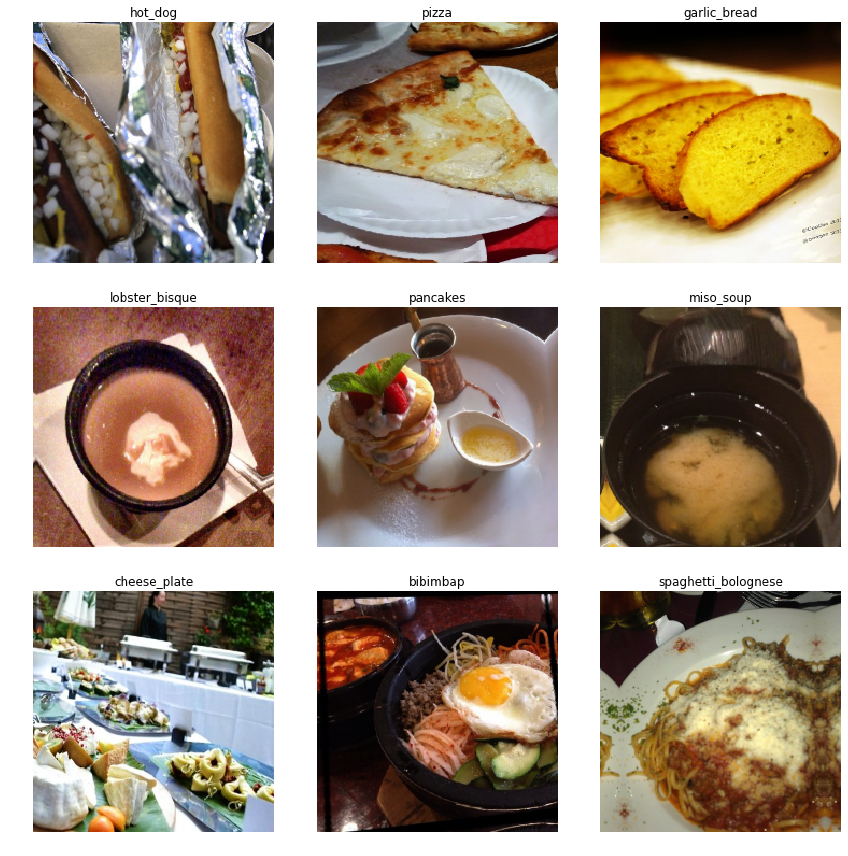

In [9]:
data.show_batch(3, figsize=(12,12))

In [11]:
# Create CNN
# First get function for top 5 accuracy
top_5 = partial(top_k_accuracy, k=5)
learner = cnn_learner(data, models.resnet50, metrics=[accuracy, top_5], callback_fns=ShowGraph)

In [17]:
# First step - Let's find the best learning rate for just the dense layers
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


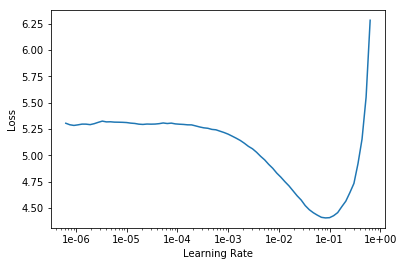

In [18]:
learner.recorder.plot()

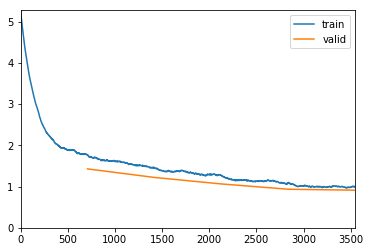

In [19]:
learner.fit_one_cycle(5, slice(0.01))

In [21]:
learner.save('stage-1') # Save snapshot of model

In [22]:
learner.unfreeze() # Allows the entire network to be trained, not just the fully connected layers
learner.lr_find() # Find the best learning rate one more time given that we can tune the whole network

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


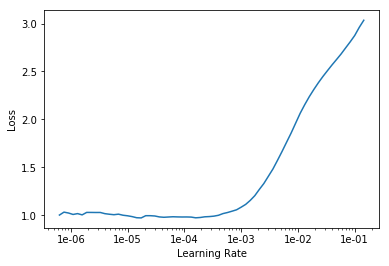

In [23]:
learner.recorder.plot()

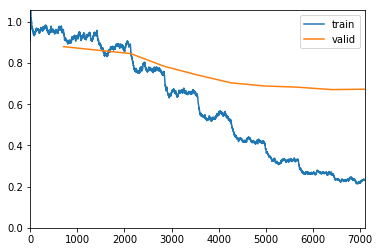

In [25]:
# 1e-5 is chosen for conv layers.
# 0.01 / 10 for dense layers from prev. LR
learner.fit_one_cycle(10, slice(1e-5, 0.001))

In [26]:
learner.save('stage-2')

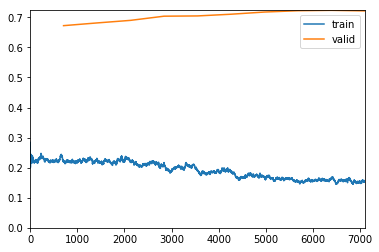

In [27]:
# Try one more time with slightly lower learning rates
learner.fit_one_cycle(10, slice(1e-6, 1e-4))

In [28]:
learner.save('stage-3')

In [20]:
learner.destroy()
bs = 32 # Try going double the size to increase accuracy
# Create a new databunch, create a new CNN learner object then reload the weights in
data = (src.transform(get_transforms(), size=448) # Size of images is 448 x 448
           .databunch(bs=bs)
           .normalize(imagenet_stats))
learner = cnn_learner(data, models.resnet50, metrics=[accuracy, top_5], callback_fns=ShowGraph)
learner.load('stage-3')

Learner(data=ImageDataBunch;

Train: LabelList (90900 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
foie_gras,foie_gras,foie_gras,foie_gras,foie_gras
Path: food-101/images;

Valid: LabelList (10100 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
spring_rolls,seaweed_salad,miso_soup,onion_rings,spaghetti_carbonara
Path: food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64

In [21]:
learner.unfreeze()

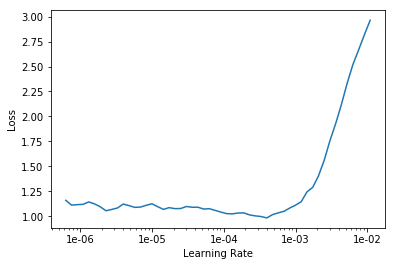

In [33]:
learner.lr_find()
learner.recorder.plot()

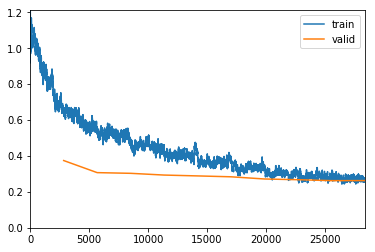

In [22]:
learner.fit_one_cycle(10, slice(1e-6, 1e-4)) # Looks like the same learning rates

In [24]:
learner.save('stage-big-1')

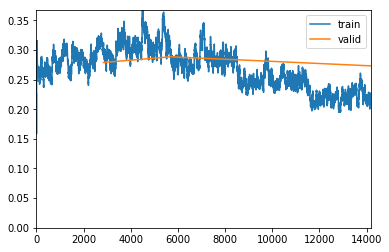

In [25]:
learner.fit_one_cycle(5, slice(1e-6, 1e-4)) # Let's try one more time

In [26]:
learner.load('stage-big-1')

Learner(data=ImageDataBunch;

Train: LabelList (90900 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
foie_gras,foie_gras,foie_gras,foie_gras,foie_gras
Path: food-101/images;

Valid: LabelList (10100 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
spring_rolls,seaweed_salad,miso_soup,onion_rings,spaghetti_carbonara
Path: food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64

In [27]:
learner.export('food-101.pkl')

In [29]:
# Create interpretable classification object
interp = ClassificationInterpretation.from_learner(learner)

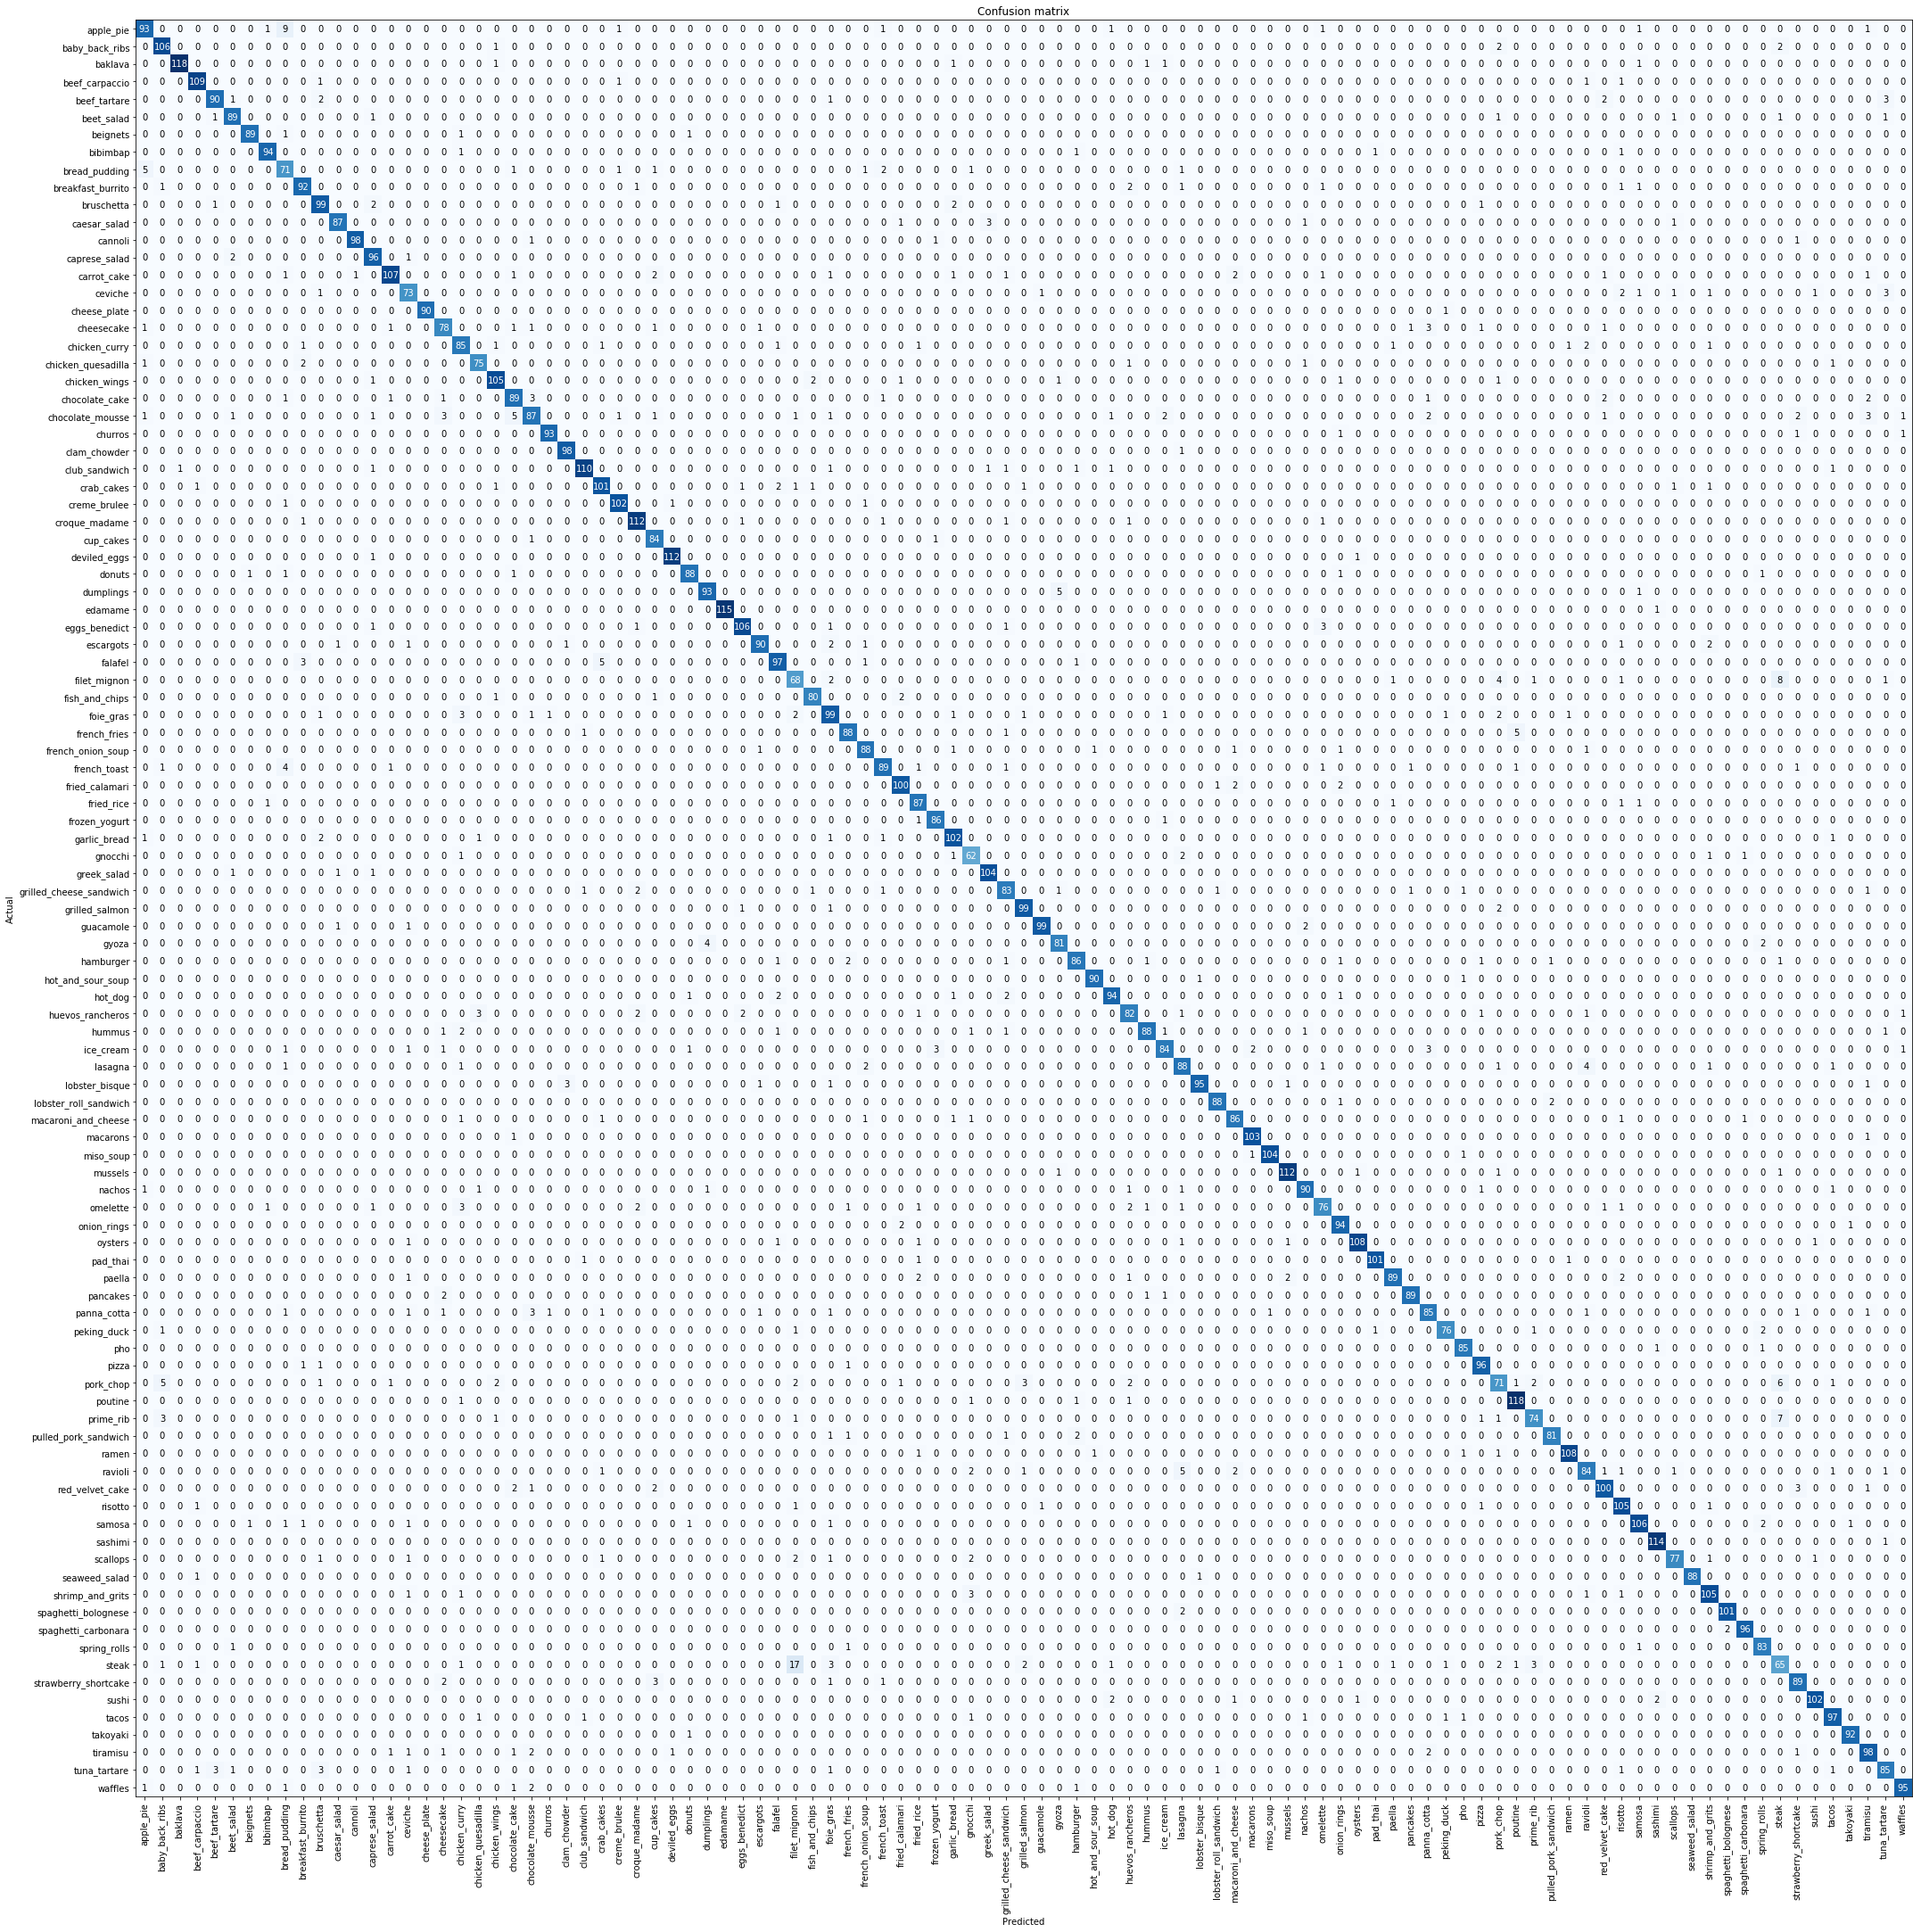

In [31]:
interp.plot_confusion_matrix(figsize=(30,30)) # Show confusion matrix

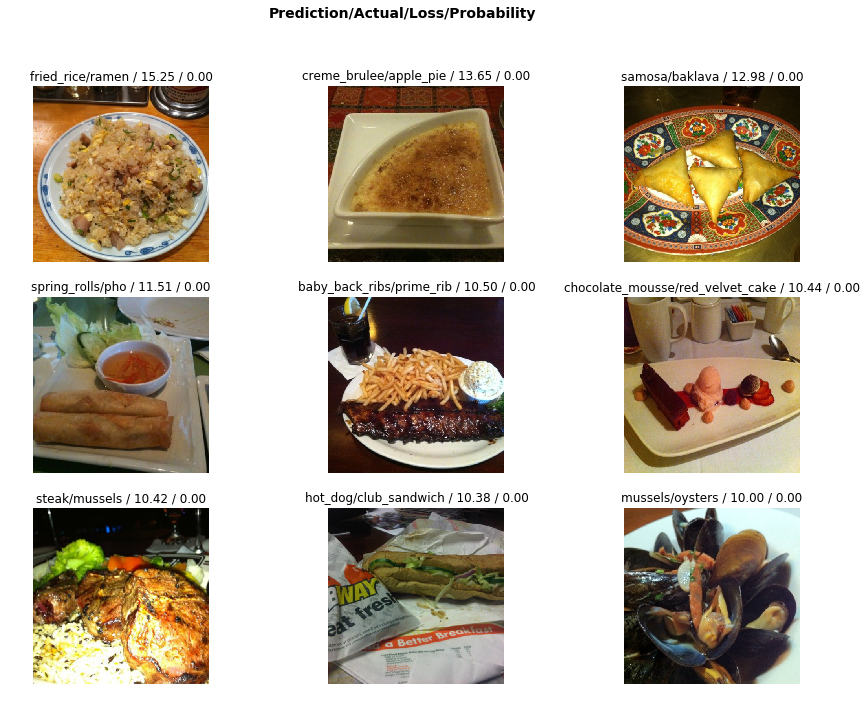

In [32]:
interp.plot_top_losses(9, figsize=(15, 11)) # Show the 9 highest misclassified images

In [33]:
interp.most_confused(min_val=5)

[('steak', 'filet_mignon', 17),
 ('apple_pie', 'bread_pudding', 9),
 ('filet_mignon', 'steak', 8),
 ('prime_rib', 'steak', 7),
 ('pork_chop', 'steak', 6),
 ('bread_pudding', 'apple_pie', 5),
 ('chocolate_mousse', 'chocolate_cake', 5),
 ('dumplings', 'gyoza', 5),
 ('falafel', 'crab_cakes', 5),
 ('french_fries', 'poutine', 5),
 ('pork_chop', 'baby_back_ribs', 5),
 ('ravioli', 'lasagna', 5)]